# SUPERVISED LEARNING
In supervised learning, each example is a pair consisting of an input object (typically a vector) and a desired output value (also called the supervisory signal). A supervised learning algorithm analyzes the training data and produces an inferred function, which can be used for mapping new examples.

In [31]:
# packages imports

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time

In [3]:
# Importing the dataset
dataset = pd.read_csv('Social_Network_Ads.csv')
print("datasets are describe a items are purchased by user depends upon age and estmated salary ")
print(dataset)
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

datasets are describe a items are purchased by user depends upon age and estmated salary 
      User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
5    15728773    Male   27            58000          0
6    15598044  Female   27            84000          0
7    15694829  Female   32           150000          1
8    15600575    Male   25            33000          0
9    15727311  Female   35            65000          0
10   15570769  Female   26            80000          0
11   15606274  Female   26            52000          0
12   15746139    Male   20            86000          0
13   15704987    Male   32            18000          0
14   15628972    Male   18            82000          0
15   15697686    Male   29    

In [4]:
# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


print("x train --")
print(X_train[0:10])
print("y train is")
print(y_train[0:10])
print("x train --")
print(X_test[0:10])
print("y train is")
print(y_test[0:10])

x train --
[[    44  39000]
 [    32 120000]
 [    38  50000]
 [    32 135000]
 [    52  21000]
 [    53 104000]
 [    39  42000]
 [    38  61000]
 [    36  50000]
 [    36  63000]]
y train is
[0 1 0 1 1 1 0 0 0 0]
x train --
[[    30  87000]
 [    38  50000]
 [    35  75000]
 [    30  79000]
 [    35  50000]
 [    27  20000]
 [    31  15000]
 [    36 144000]
 [    18  68000]
 [    47  43000]]
y train is
[0 0 0 0 0 0 0 1 0 0]


C:\Users\smsaurabhv\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [5]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train).astype(float)
X_test = sc.transform(X_test).astype(float)

C:\Users\smsaurabhv\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


 # TRADITIONAL MACHINE LEARNING ALGORITHIMS
 
 ### LOGISTICS REGRESSION
 Logistic regression is a statistical method for analyzing a dataset in which there are one or more independent variables that determine an outcome. The outcome is measured with a dichotomous variable (in which there are only two possible outcomes).
 <img src="logistics.png">

In [6]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred2=classifier.predict(X_train)
print(classifier.coef_)
print(classifier.intercept_)

[[2.06169269 1.10338288]]
[-0.92421803]


accuracy on test set
0.89
accuracy on train set
0.8233333333333334


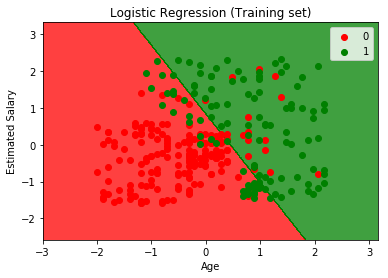

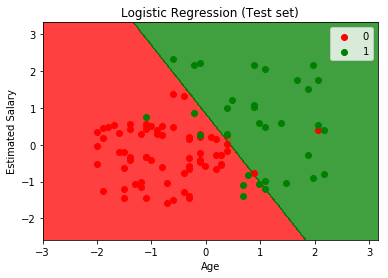

In [7]:
# accuracy from a linear logistics models
from sklearn.metrics import accuracy_score
print("accuracy on test set")
print(accuracy_score(y_test, y_pred, normalize=True, sample_weight=None))
print("accuracy on train set")
print(accuracy_score(y_train, y_pred2, normalize=True, sample_weight=None))
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

### DECISION TREE CLASSIFIER

A decision tree is a decision support tool that uses a tree-like graph or model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility. It is one way to display an algorithm that only contains conditional control statements.
<img src="decisiontree.png">

# SINGLE LAYER PERCEPTRON

# NEURAL NETWORK APPROCHES

In [8]:
# implemented by a single layer perceptron

<img src="perceptron.png">

In [9]:
# initiaizes two weights
def sigmoid(Z,shapef):
    return np.array((1/(1+np.exp(-Z))).reshape(shapef))
weights = np.zeros((2,1))
bias = 0

In [10]:
weights

array([[0.],
       [0.]])

In [11]:
bias

0

In [12]:
X_train.shape

(300, 2)

In [13]:
iteration =100001
learning_rate =0.1
m=X_train.shape[0]
for i in range(iteration):
    zinput  = np.dot(X_train,weights)+bias
    zoutput = sigmoid(zinput,m)
    #print(zoutput.shape)
    #print(y_train.shape)
    error = zoutput - y_train
    error = error.reshape(m,1)
    dw = (1/m)*np.dot(X_train.T,error)
    db = (1/m)*np.sum(error)
    weights =weights -learning_rate*dw
    bias =bias -learning_rate*db
    if i%20000==0:
        print(np.sum(error))
        print(weights)
        print(bias)
        

39.0
[[0.02881641]
 [0.01717602]]
-0.013000000000000001
3.3217872896784684e-13
[[2.26671113]
 [1.21344416]]
-1.0033502181629357
3.3217872896784684e-13
[[2.26671113]
 [1.21344416]]
-1.0033502181629357
3.3217872896784684e-13
[[2.26671113]
 [1.21344416]]
-1.0033502181629357
3.3217872896784684e-13
[[2.26671113]
 [1.21344416]]
-1.0033502181629357
3.3217872896784684e-13
[[2.26671113]
 [1.21344416]]
-1.0033502181629357


In [14]:
weights

array([[2.26671113],
       [1.21344416]])

In [15]:
bias

-1.0033502181629357

In [16]:
def classify(train,weights,bias,shapef):
    ypred=[[]]
    zinput  = np.dot(train,weights)+bias
    zoutput = sigmoid(zinput,shapef)
    for i in zoutput:
        if i >0.5:
            ypred[0].append(1)
        else:
            ypred[0].append(0)
    return np.array(ypred).reshape(shapef,1)
    

In [17]:
y_pred2=classify(X_train,weights,bias,X_train.shape[0])
y_pred=classify(X_test,weights,bias,X_test.shape[0])
print(y_pred.shape)

(100, 1)


In [18]:
print("accuracy on test set")
print(accuracy_score(y_test, y_pred, normalize=True, sample_weight=None))
print("accuracy on train set")
print(accuracy_score(y_train, y_pred2, normalize=True, sample_weight=None))

accuracy on test set
0.89
accuracy on train set
0.82


# MULTILAYER PERCEPTRON OR DEEP NEURAL NETWORK

In [19]:
# now use some deeper representation
from keras import layers
from keras.layers import Dense
from keras import Sequential

Using TensorFlow backend.


In [20]:
# input datassets shape
print("shape of train input")
print(X_train.shape)

shape of train input
(300, 2)


In [21]:
model=Sequential()
model.add(Dense(2,input_shape=(2,),activation='sigmoid'))
model.add(Dense(2,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss="binary_crossentropy",optimizer='adam',metrics=['accuracy'])

In [22]:
model.fit(X_train,y_train,epochs=30000,batch_size=X_train.shape[0])

Epoch 1/30000
300/300 [==============================] - 1s 2ms/step - loss: 0.7179 - acc: 0.6300
Epoch 2/30000
300/300 [==============================] - 0s 10us/step - loss: 0.7174 - acc: 0.6300
Epoch 3/30000
300/300 [==============================] - 0s 10us/step - loss: 0.7168 - acc: 0.6300
Epoch 4/30000
300/300 [==============================] - 0s 10us/step - loss: 0.7163 - acc: 0.6300
Epoch 5/30000
300/300 [==============================] - 0s 13us/step - loss: 0.7157 - acc: 0.6300
Epoch 6/30000
300/300 [==============================] - 0s 13us/step - loss: 0.7152 - acc: 0.6300
Epoch 7/30000
300/300 [==============================] - 0s 13us/step - loss: 0.7147 - acc: 0.6300
Epoch 8/30000
300/300 [==============================] - 0s 10us/step - loss: 0.7141 - acc: 0.6300
Epoch 9/30000
300/300 [==============================] - 0s 10us/step - loss: 0.7136 - acc: 0.6300
Epoch 10/30000
300/300 [==============================] - 0s 13us/step - loss: 0.7131 - acc: 0.6300
Epoch 11/3

300/300 [==============================] - 0s 20us/step - loss: 0.6814 - acc: 0.6300
Epoch 84/30000
300/300 [==============================] - 0s 20us/step - loss: 0.6811 - acc: 0.6300
Epoch 85/30000
300/300 [==============================] - 0s 10us/step - loss: 0.6807 - acc: 0.6300
Epoch 86/30000
300/300 [==============================] - 0s 10us/step - loss: 0.6804 - acc: 0.6300
Epoch 87/30000
300/300 [==============================] - 0s 10us/step - loss: 0.6801 - acc: 0.6300
Epoch 88/30000
300/300 [==============================] - 0s 13us/step - loss: 0.6798 - acc: 0.6300
Epoch 89/30000
300/300 [==============================] - 0s 10us/step - loss: 0.6794 - acc: 0.6300
Epoch 90/30000
300/300 [==============================] - 0s 7us/step - loss: 0.6791 - acc: 0.6300
Epoch 91/30000
300/300 [==============================] - 0s 10us/step - loss: 0.6788 - acc: 0.6300
Epoch 92/30000
300/300 [==============================] - 0s 10us/step - loss: 0.6785 - acc: 0.6300
Epoch 93/30000
3

Epoch 165/30000
300/300 [==============================] - 0s 13us/step - loss: 0.6608 - acc: 0.6300
Epoch 166/30000
300/300 [==============================] - 0s 10us/step - loss: 0.6606 - acc: 0.6300
Epoch 167/30000
300/300 [==============================] - 0s 14us/step - loss: 0.6604 - acc: 0.6300
Epoch 168/30000
300/300 [==============================] - 0s 13us/step - loss: 0.6602 - acc: 0.6300
Epoch 169/30000
300/300 [==============================] - 0s 23us/step - loss: 0.6601 - acc: 0.6300
Epoch 170/30000
300/300 [==============================] - 0s 13us/step - loss: 0.6599 - acc: 0.6300
Epoch 171/30000
300/300 [==============================] - 0s 11us/step - loss: 0.6597 - acc: 0.6300
Epoch 172/30000
300/300 [==============================] - 0s 17us/step - loss: 0.6595 - acc: 0.6300
Epoch 173/30000
300/300 [==============================] - 0s 13us/step - loss: 0.6594 - acc: 0.6300
Epoch 174/30000
300/300 [==============================] - 0s 13us/step - loss: 0.6592 - ac

Epoch 247/30000
300/300 [==============================] - 0s 10us/step - loss: 0.6497 - acc: 0.6300
Epoch 248/30000
300/300 [==============================] - 0s 17us/step - loss: 0.6496 - acc: 0.6300
Epoch 249/30000
300/300 [==============================] - 0s 10us/step - loss: 0.6495 - acc: 0.6300
Epoch 250/30000
300/300 [==============================] - 0s 10us/step - loss: 0.6494 - acc: 0.6300
Epoch 251/30000
300/300 [==============================] - 0s 12us/step - loss: 0.6493 - acc: 0.6300
Epoch 252/30000
300/300 [==============================] - 0s 17us/step - loss: 0.6492 - acc: 0.6300
Epoch 253/30000
300/300 [==============================] - 0s 17us/step - loss: 0.6491 - acc: 0.6300
Epoch 254/30000
300/300 [==============================] - 0s 20us/step - loss: 0.6490 - acc: 0.6300
Epoch 255/30000
300/300 [==============================] - 0s 14us/step - loss: 0.6489 - acc: 0.6300
Epoch 256/30000
300/300 [==============================] - 0s 10us/step - loss: 0.6488 - ac

Epoch 329/30000
300/300 [==============================] - 0s 14us/step - loss: 0.6426 - acc: 0.6300
Epoch 330/30000
300/300 [==============================] - 0s 22us/step - loss: 0.6425 - acc: 0.6300
Epoch 331/30000
300/300 [==============================] - 0s 10us/step - loss: 0.6424 - acc: 0.6300
Epoch 332/30000
300/300 [==============================] - 0s 8us/step - loss: 0.6423 - acc: 0.6300
Epoch 333/30000
300/300 [==============================] - 0s 7us/step - loss: 0.6422 - acc: 0.6300
Epoch 334/30000
300/300 [==============================] - 0s 10us/step - loss: 0.6422 - acc: 0.6300
Epoch 335/30000
300/300 [==============================] - 0s 13us/step - loss: 0.6421 - acc: 0.6300
Epoch 336/30000
300/300 [==============================] - 0s 11us/step - loss: 0.6420 - acc: 0.6300
Epoch 337/30000
300/300 [==============================] - 0s 13us/step - loss: 0.6419 - acc: 0.6300
Epoch 338/30000
300/300 [==============================] - 0s 13us/step - loss: 0.6419 - acc:

Epoch 411/30000
300/300 [==============================] - 0s 13us/step - loss: 0.6365 - acc: 0.6300
Epoch 412/30000
300/300 [==============================] - 0s 12us/step - loss: 0.6365 - acc: 0.6300
Epoch 413/30000
300/300 [==============================] - 0s 13us/step - loss: 0.6364 - acc: 0.6300
Epoch 414/30000
300/300 [==============================] - 0s 16us/step - loss: 0.6363 - acc: 0.6300
Epoch 415/30000
300/300 [==============================] - 0s 13us/step - loss: 0.6362 - acc: 0.6300
Epoch 416/30000
300/300 [==============================] - 0s 13us/step - loss: 0.6362 - acc: 0.6300
Epoch 417/30000
300/300 [==============================] - 0s 11us/step - loss: 0.6361 - acc: 0.6300
Epoch 418/30000
300/300 [==============================] - 0s 13us/step - loss: 0.6360 - acc: 0.6300
Epoch 419/30000
300/300 [==============================] - 0s 10us/step - loss: 0.6360 - acc: 0.6300
Epoch 420/30000
300/300 [==============================] - 0s 10us/step - loss: 0.6359 - ac

Epoch 493/30000
300/300 [==============================] - 0s 10us/step - loss: 0.6305 - acc: 0.6300
Epoch 494/30000
300/300 [==============================] - 0s 13us/step - loss: 0.6304 - acc: 0.6300
Epoch 495/30000
300/300 [==============================] - 0s 10us/step - loss: 0.6303 - acc: 0.6300
Epoch 496/30000
300/300 [==============================] - 0s 14us/step - loss: 0.6303 - acc: 0.6300
Epoch 497/30000
300/300 [==============================] - 0s 13us/step - loss: 0.6302 - acc: 0.6300
Epoch 498/30000
300/300 [==============================] - 0s 17us/step - loss: 0.6301 - acc: 0.6300
Epoch 499/30000
300/300 [==============================] - 0s 16us/step - loss: 0.6300 - acc: 0.6300
Epoch 500/30000
300/300 [==============================] - 0s 11us/step - loss: 0.6300 - acc: 0.6300
Epoch 501/30000
300/300 [==============================] - 0s 17us/step - loss: 0.6299 - acc: 0.6300
Epoch 502/30000
300/300 [==============================] - 0s 10us/step - loss: 0.6298 - ac

Epoch 575/30000
300/300 [==============================] - 0s 7us/step - loss: 0.6240 - acc: 0.6300
Epoch 576/30000
300/300 [==============================] - 0s 7us/step - loss: 0.6239 - acc: 0.6300
Epoch 577/30000
300/300 [==============================] - 0s 10us/step - loss: 0.6238 - acc: 0.6300
Epoch 578/30000
300/300 [==============================] - 0s 10us/step - loss: 0.6237 - acc: 0.6300
Epoch 579/30000
300/300 [==============================] - 0s 8us/step - loss: 0.6236 - acc: 0.6300
Epoch 580/30000
300/300 [==============================] - 0s 7us/step - loss: 0.6235 - acc: 0.6300
Epoch 581/30000
300/300 [==============================] - 0s 9us/step - loss: 0.6235 - acc: 0.6300
Epoch 582/30000
300/300 [==============================] - 0s 7us/step - loss: 0.6234 - acc: 0.6300
Epoch 583/30000
300/300 [==============================] - 0s 13us/step - loss: 0.6233 - acc: 0.6300
Epoch 584/30000
300/300 [==============================] - 0s 10us/step - loss: 0.6232 - acc: 0.6

Epoch 657/30000
300/300 [==============================] - 0s 17us/step - loss: 0.6166 - acc: 0.6300
Epoch 658/30000
300/300 [==============================] - 0s 13us/step - loss: 0.6166 - acc: 0.6300
Epoch 659/30000
300/300 [==============================] - 0s 14us/step - loss: 0.6165 - acc: 0.6300
Epoch 660/30000
300/300 [==============================] - 0s 16us/step - loss: 0.6164 - acc: 0.6300
Epoch 661/30000
300/300 [==============================] - 0s 10us/step - loss: 0.6163 - acc: 0.6300
Epoch 662/30000
300/300 [==============================] - 0s 7us/step - loss: 0.6162 - acc: 0.6300
Epoch 663/30000
300/300 [==============================] - 0s 11us/step - loss: 0.6161 - acc: 0.6300
Epoch 664/30000
300/300 [==============================] - 0s 10us/step - loss: 0.6160 - acc: 0.6300
Epoch 665/30000
300/300 [==============================] - 0s 10us/step - loss: 0.6159 - acc: 0.6300
Epoch 666/30000
300/300 [==============================] - 0s 10us/step - loss: 0.6158 - acc

Epoch 739/30000
300/300 [==============================] - 0s 12us/step - loss: 0.6083 - acc: 0.6300
Epoch 740/30000
300/300 [==============================] - 0s 17us/step - loss: 0.6082 - acc: 0.6300
Epoch 741/30000
300/300 [==============================] - 0s 13us/step - loss: 0.6081 - acc: 0.6300
Epoch 742/30000
300/300 [==============================] - 0s 9us/step - loss: 0.6079 - acc: 0.6300
Epoch 743/30000
300/300 [==============================] - 0s 10us/step - loss: 0.6078 - acc: 0.6300
Epoch 744/30000
300/300 [==============================] - 0s 11us/step - loss: 0.6077 - acc: 0.6300
Epoch 745/30000
300/300 [==============================] - 0s 10us/step - loss: 0.6076 - acc: 0.6300
Epoch 746/30000
300/300 [==============================] - 0s 10us/step - loss: 0.6075 - acc: 0.6300
Epoch 747/30000
300/300 [==============================] - 0s 7us/step - loss: 0.6074 - acc: 0.6300
Epoch 748/30000
300/300 [==============================] - 0s 10us/step - loss: 0.6073 - acc:

Epoch 821/30000
300/300 [==============================] - 0s 9us/step - loss: 0.5986 - acc: 0.6300
Epoch 822/30000
300/300 [==============================] - 0s 10us/step - loss: 0.5984 - acc: 0.6300
Epoch 823/30000
300/300 [==============================] - 0s 10us/step - loss: 0.5983 - acc: 0.6300
Epoch 824/30000
300/300 [==============================] - 0s 20us/step - loss: 0.5982 - acc: 0.6300
Epoch 825/30000
300/300 [==============================] - 0s 13us/step - loss: 0.5981 - acc: 0.6300
Epoch 826/30000
300/300 [==============================] - 0s 10us/step - loss: 0.5979 - acc: 0.6300
Epoch 827/30000
300/300 [==============================] - 0s 11us/step - loss: 0.5978 - acc: 0.6300
Epoch 828/30000
300/300 [==============================] - 0s 14us/step - loss: 0.5977 - acc: 0.6300
Epoch 829/30000
300/300 [==============================] - 0s 13us/step - loss: 0.5976 - acc: 0.6300
Epoch 830/30000
300/300 [==============================] - 0s 13us/step - loss: 0.5974 - acc

Epoch 903/30000
300/300 [==============================] - 0s 7us/step - loss: 0.5874 - acc: 0.6300
Epoch 904/30000
300/300 [==============================] - 0s 7us/step - loss: 0.5872 - acc: 0.6300
Epoch 905/30000
300/300 [==============================] - 0s 9us/step - loss: 0.5871 - acc: 0.6300
Epoch 906/30000
300/300 [==============================] - 0s 13us/step - loss: 0.5869 - acc: 0.6300
Epoch 907/30000
300/300 [==============================] - 0s 13us/step - loss: 0.5868 - acc: 0.6300
Epoch 908/30000
300/300 [==============================] - 0s 20us/step - loss: 0.5867 - acc: 0.6300
Epoch 909/30000
300/300 [==============================] - 0s 10us/step - loss: 0.5865 - acc: 0.6300
Epoch 910/30000
300/300 [==============================] - 0s 7us/step - loss: 0.5864 - acc: 0.6300
Epoch 911/30000
300/300 [==============================] - 0s 13us/step - loss: 0.5862 - acc: 0.6300
Epoch 912/30000
300/300 [==============================] - 0s 10us/step - loss: 0.5861 - acc: 0

Epoch 985/30000
300/300 [==============================] - 0s 7us/step - loss: 0.5747 - acc: 0.6300
Epoch 986/30000
300/300 [==============================] - 0s 9us/step - loss: 0.5745 - acc: 0.6300
Epoch 987/30000
300/300 [==============================] - 0s 8us/step - loss: 0.5743 - acc: 0.6300
Epoch 988/30000
300/300 [==============================] - 0s 10us/step - loss: 0.5742 - acc: 0.6300
Epoch 989/30000
300/300 [==============================] - 0s 10us/step - loss: 0.5740 - acc: 0.6300
Epoch 990/30000
300/300 [==============================] - 0s 17us/step - loss: 0.5738 - acc: 0.6300
Epoch 991/30000
300/300 [==============================] - 0s 11us/step - loss: 0.5737 - acc: 0.6300
Epoch 992/30000
300/300 [==============================] - 0s 14us/step - loss: 0.5735 - acc: 0.6300
Epoch 993/30000
300/300 [==============================] - 0s 10us/step - loss: 0.5733 - acc: 0.6300
Epoch 994/30000
300/300 [==============================] - 0s 12us/step - loss: 0.5732 - acc: 

Epoch 1066/30000
300/300 [==============================] - 0s 8us/step - loss: 0.5607 - acc: 0.6300
Epoch 1067/30000
300/300 [==============================] - 0s 10us/step - loss: 0.5605 - acc: 0.6300
Epoch 1068/30000
300/300 [==============================] - 0s 10us/step - loss: 0.5603 - acc: 0.6300
Epoch 1069/30000
300/300 [==============================] - 0s 13us/step - loss: 0.5602 - acc: 0.6300
Epoch 1070/30000
300/300 [==============================] - 0s 10us/step - loss: 0.5600 - acc: 0.6300
Epoch 1071/30000
300/300 [==============================] - 0s 13us/step - loss: 0.5598 - acc: 0.6300
Epoch 1072/30000
300/300 [==============================] - 0s 10us/step - loss: 0.5596 - acc: 0.6300
Epoch 1073/30000
300/300 [==============================] - 0s 10us/step - loss: 0.5594 - acc: 0.6300
Epoch 1074/30000
300/300 [==============================] - 0s 7us/step - loss: 0.5592 - acc: 0.6300
Epoch 1075/30000
300/300 [==============================] - 0s 9us/step - loss: 0.55

Epoch 1147/30000
300/300 [==============================] - 0s 7us/step - loss: 0.5456 - acc: 0.6300
Epoch 1148/30000
300/300 [==============================] - 0s 10us/step - loss: 0.5454 - acc: 0.6300
Epoch 1149/30000
300/300 [==============================] - 0s 10us/step - loss: 0.5452 - acc: 0.6300
Epoch 1150/30000
300/300 [==============================] - 0s 7us/step - loss: 0.5450 - acc: 0.6300
Epoch 1151/30000
300/300 [==============================] - 0s 10us/step - loss: 0.5448 - acc: 0.6300
Epoch 1152/30000
300/300 [==============================] - 0s 10us/step - loss: 0.5446 - acc: 0.6300
Epoch 1153/30000
300/300 [==============================] - 0s 10us/step - loss: 0.5445 - acc: 0.6300
Epoch 1154/30000
300/300 [==============================] - 0s 7us/step - loss: 0.5443 - acc: 0.6300
Epoch 1155/30000
300/300 [==============================] - 0s 13us/step - loss: 0.5441 - acc: 0.6300
Epoch 1156/30000
300/300 [==============================] - 0s 13us/step - loss: 0.54

Epoch 1228/30000
300/300 [==============================] - 0s 13us/step - loss: 0.5298 - acc: 0.6900
Epoch 1229/30000
300/300 [==============================] - 0s 13us/step - loss: 0.5296 - acc: 0.6900
Epoch 1230/30000
300/300 [==============================] - 0s 13us/step - loss: 0.5294 - acc: 0.6900
Epoch 1231/30000
300/300 [==============================] - 0s 10us/step - loss: 0.5292 - acc: 0.6933
Epoch 1232/30000
300/300 [==============================] - 0s 7us/step - loss: 0.5290 - acc: 0.6933
Epoch 1233/30000
300/300 [==============================] - 0s 7us/step - loss: 0.5288 - acc: 0.6900
Epoch 1234/30000
300/300 [==============================] - 0s 13us/step - loss: 0.5286 - acc: 0.6933
Epoch 1235/30000
300/300 [==============================] - 0s 10us/step - loss: 0.5284 - acc: 0.6933
Epoch 1236/30000
300/300 [==============================] - 0s 13us/step - loss: 0.5282 - acc: 0.6967
Epoch 1237/30000
300/300 [==============================] - 0s 20us/step - loss: 0.5

Epoch 1309/30000
300/300 [==============================] - 0s 10us/step - loss: 0.5137 - acc: 0.7567
Epoch 1310/30000
300/300 [==============================] - 0s 14us/step - loss: 0.5135 - acc: 0.7567
Epoch 1311/30000
300/300 [==============================] - 0s 17us/step - loss: 0.5133 - acc: 0.7567
Epoch 1312/30000
300/300 [==============================] - 0s 13us/step - loss: 0.5131 - acc: 0.7567
Epoch 1313/30000
300/300 [==============================] - 0s 10us/step - loss: 0.5129 - acc: 0.7567
Epoch 1314/30000
300/300 [==============================] - 0s 13us/step - loss: 0.5127 - acc: 0.7567
Epoch 1315/30000
300/300 [==============================] - 0s 13us/step - loss: 0.5125 - acc: 0.7567
Epoch 1316/30000
300/300 [==============================] - 0s 11us/step - loss: 0.5123 - acc: 0.7567
Epoch 1317/30000
300/300 [==============================] - 0s 12us/step - loss: 0.5121 - acc: 0.7600
Epoch 1318/30000
300/300 [==============================] - 0s 12us/step - loss: 0

Epoch 1390/30000
300/300 [==============================] - 0s 13us/step - loss: 0.4977 - acc: 0.7667
Epoch 1391/30000
300/300 [==============================] - 0s 17us/step - loss: 0.4975 - acc: 0.7667
Epoch 1392/30000
300/300 [==============================] - 0s 14us/step - loss: 0.4973 - acc: 0.7667
Epoch 1393/30000
300/300 [==============================] - 0s 10us/step - loss: 0.4971 - acc: 0.7667
Epoch 1394/30000
300/300 [==============================] - 0s 10us/step - loss: 0.4969 - acc: 0.7667
Epoch 1395/30000
300/300 [==============================] - 0s 7us/step - loss: 0.4967 - acc: 0.7667
Epoch 1396/30000
300/300 [==============================] - 0s 10us/step - loss: 0.4965 - acc: 0.7667
Epoch 1397/30000
300/300 [==============================] - 0s 13us/step - loss: 0.4963 - acc: 0.7667
Epoch 1398/30000
300/300 [==============================] - 0s 10us/step - loss: 0.4961 - acc: 0.7667
Epoch 1399/30000
300/300 [==============================] - 0s 9us/step - loss: 0.4

Epoch 1471/30000
300/300 [==============================] - 0s 6us/step - loss: 0.4822 - acc: 0.7700
Epoch 1472/30000
300/300 [==============================] - 0s 6us/step - loss: 0.4821 - acc: 0.7700
Epoch 1473/30000
300/300 [==============================] - 0s 8us/step - loss: 0.4819 - acc: 0.7700
Epoch 1474/30000
300/300 [==============================] - 0s 11us/step - loss: 0.4817 - acc: 0.7700
Epoch 1475/30000
300/300 [==============================] - 0s 10us/step - loss: 0.4815 - acc: 0.7700
Epoch 1476/30000
300/300 [==============================] - 0s 9us/step - loss: 0.4813 - acc: 0.7700
Epoch 1477/30000
300/300 [==============================] - 0s 10us/step - loss: 0.4811 - acc: 0.7700
Epoch 1478/30000
300/300 [==============================] - 0s 10us/step - loss: 0.4809 - acc: 0.7733
Epoch 1479/30000
300/300 [==============================] - 0s 10us/step - loss: 0.4808 - acc: 0.7733
Epoch 1480/30000
300/300 [==============================] - 0s 13us/step - loss: 0.480

Epoch 1552/30000
300/300 [==============================] - 0s 12us/step - loss: 0.4676 - acc: 0.7867
Epoch 1553/30000
300/300 [==============================] - 0s 13us/step - loss: 0.4675 - acc: 0.7867
Epoch 1554/30000
300/300 [==============================] - 0s 8us/step - loss: 0.4673 - acc: 0.7867
Epoch 1555/30000
300/300 [==============================] - 0s 10us/step - loss: 0.4671 - acc: 0.7867
Epoch 1556/30000
300/300 [==============================] - 0s 12us/step - loss: 0.4669 - acc: 0.7867
Epoch 1557/30000
300/300 [==============================] - 0s 12us/step - loss: 0.4668 - acc: 0.7867
Epoch 1558/30000
300/300 [==============================] - 0s 14us/step - loss: 0.4666 - acc: 0.7867
Epoch 1559/30000
300/300 [==============================] - 0s 7us/step - loss: 0.4664 - acc: 0.7867
Epoch 1560/30000
300/300 [==============================] - 0s 13us/step - loss: 0.4662 - acc: 0.7867
Epoch 1561/30000
300/300 [==============================] - 0s 13us/step - loss: 0.4

Epoch 1633/30000
300/300 [==============================] - 0s 10us/step - loss: 0.4540 - acc: 0.8000
Epoch 1634/30000
300/300 [==============================] - 0s 13us/step - loss: 0.4539 - acc: 0.8000
Epoch 1635/30000
300/300 [==============================] - 0s 10us/step - loss: 0.4537 - acc: 0.8000
Epoch 1636/30000
300/300 [==============================] - 0s 10us/step - loss: 0.4536 - acc: 0.8033
Epoch 1637/30000
300/300 [==============================] - 0s 9us/step - loss: 0.4534 - acc: 0.8033
Epoch 1638/30000
300/300 [==============================] - 0s 12us/step - loss: 0.4532 - acc: 0.8033
Epoch 1639/30000
300/300 [==============================] - 0s 10us/step - loss: 0.4531 - acc: 0.8033
Epoch 1640/30000
300/300 [==============================] - 0s 10us/step - loss: 0.4529 - acc: 0.8033
Epoch 1641/30000
300/300 [==============================] - 0s 10us/step - loss: 0.4528 - acc: 0.8033
Epoch 1642/30000
300/300 [==============================] - 0s 13us/step - loss: 0.

Epoch 1714/30000
300/300 [==============================] - 0s 10us/step - loss: 0.4416 - acc: 0.8200
Epoch 1715/30000
300/300 [==============================] - 0s 13us/step - loss: 0.4414 - acc: 0.8200
Epoch 1716/30000
300/300 [==============================] - 0s 14us/step - loss: 0.4413 - acc: 0.8200
Epoch 1717/30000
300/300 [==============================] - 0s 7us/step - loss: 0.4411 - acc: 0.8200
Epoch 1718/30000
300/300 [==============================] - 0s 13us/step - loss: 0.4410 - acc: 0.8200
Epoch 1719/30000
300/300 [==============================] - 0s 10us/step - loss: 0.4408 - acc: 0.8200
Epoch 1720/30000
300/300 [==============================] - 0s 13us/step - loss: 0.4407 - acc: 0.8200
Epoch 1721/30000
300/300 [==============================] - 0s 10us/step - loss: 0.4406 - acc: 0.8200
Epoch 1722/30000
300/300 [==============================] - 0s 13us/step - loss: 0.4404 - acc: 0.8200
Epoch 1723/30000
300/300 [==============================] - 0s 7us/step - loss: 0.4

Epoch 1795/30000
300/300 [==============================] - 0s 12us/step - loss: 0.4303 - acc: 0.8267
Epoch 1796/30000
300/300 [==============================] - 0s 11us/step - loss: 0.4302 - acc: 0.8267
Epoch 1797/30000
300/300 [==============================] - 0s 11us/step - loss: 0.4300 - acc: 0.8267
Epoch 1798/30000
300/300 [==============================] - 0s 10us/step - loss: 0.4299 - acc: 0.8267
Epoch 1799/30000
300/300 [==============================] - 0s 10us/step - loss: 0.4298 - acc: 0.8267
Epoch 1800/30000
300/300 [==============================] - 0s 9us/step - loss: 0.4296 - acc: 0.8267
Epoch 1801/30000
300/300 [==============================] - 0s 10us/step - loss: 0.4295 - acc: 0.8267
Epoch 1802/30000
300/300 [==============================] - 0s 7us/step - loss: 0.4294 - acc: 0.8267
Epoch 1803/30000
300/300 [==============================] - 0s 10us/step - loss: 0.4292 - acc: 0.8267
Epoch 1804/30000
300/300 [==============================] - 0s 7us/step - loss: 0.42

Epoch 1876/30000
300/300 [==============================] - 0s 10us/step - loss: 0.4202 - acc: 0.8300
Epoch 1877/30000
300/300 [==============================] - 0s 11us/step - loss: 0.4200 - acc: 0.8300
Epoch 1878/30000
300/300 [==============================] - 0s 10us/step - loss: 0.4199 - acc: 0.8300
Epoch 1879/30000
300/300 [==============================] - 0s 14us/step - loss: 0.4198 - acc: 0.8300
Epoch 1880/30000
300/300 [==============================] - 0s 10us/step - loss: 0.4197 - acc: 0.8300
Epoch 1881/30000
300/300 [==============================] - 0s 12us/step - loss: 0.4196 - acc: 0.8300
Epoch 1882/30000
300/300 [==============================] - 0s 10us/step - loss: 0.4195 - acc: 0.8300
Epoch 1883/30000
300/300 [==============================] - 0s 13us/step - loss: 0.4193 - acc: 0.8300
Epoch 1884/30000
300/300 [==============================] - 0s 10us/step - loss: 0.4192 - acc: 0.8267
Epoch 1885/30000
300/300 [==============================] - 0s 10us/step - loss: 0

Epoch 1957/30000
300/300 [==============================] - 0s 7us/step - loss: 0.4111 - acc: 0.8367
Epoch 1958/30000
300/300 [==============================] - 0s 9us/step - loss: 0.4110 - acc: 0.8367
Epoch 1959/30000
300/300 [==============================] - 0s 10us/step - loss: 0.4109 - acc: 0.8367
Epoch 1960/30000
300/300 [==============================] - 0s 10us/step - loss: 0.4108 - acc: 0.8367
Epoch 1961/30000
300/300 [==============================] - 0s 12us/step - loss: 0.4107 - acc: 0.8367
Epoch 1962/30000
300/300 [==============================] - 0s 7us/step - loss: 0.4106 - acc: 0.8367
Epoch 1963/30000
300/300 [==============================] - 0s 10us/step - loss: 0.4105 - acc: 0.8367
Epoch 1964/30000
300/300 [==============================] - 0s 13us/step - loss: 0.4104 - acc: 0.8367
Epoch 1965/30000
300/300 [==============================] - 0s 7us/step - loss: 0.4103 - acc: 0.8367
Epoch 1966/30000
300/300 [==============================] - 0s 7us/step - loss: 0.4102

Epoch 2038/30000
300/300 [==============================] - 0s 7us/step - loss: 0.4032 - acc: 0.8367
Epoch 2039/30000
300/300 [==============================] - 0s 7us/step - loss: 0.4031 - acc: 0.8367
Epoch 2040/30000
300/300 [==============================] - 0s 10us/step - loss: 0.4030 - acc: 0.8367
Epoch 2041/30000
300/300 [==============================] - 0s 11us/step - loss: 0.4029 - acc: 0.8367
Epoch 2042/30000
300/300 [==============================] - 0s 8us/step - loss: 0.4028 - acc: 0.8367
Epoch 2043/30000
300/300 [==============================] - 0s 10us/step - loss: 0.4027 - acc: 0.8367
Epoch 2044/30000
300/300 [==============================] - 0s 8us/step - loss: 0.4026 - acc: 0.8367
Epoch 2045/30000
300/300 [==============================] - 0s 11us/step - loss: 0.4025 - acc: 0.8367
Epoch 2046/30000
300/300 [==============================] - 0s 8us/step - loss: 0.4024 - acc: 0.8367
Epoch 2047/30000
300/300 [==============================] - 0s 9us/step - loss: 0.4023 

Epoch 2119/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3961 - acc: 0.8433
Epoch 2120/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3960 - acc: 0.8433
Epoch 2121/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3960 - acc: 0.8433
Epoch 2122/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3959 - acc: 0.8433
Epoch 2123/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3958 - acc: 0.8433
Epoch 2124/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3957 - acc: 0.8433
Epoch 2125/30000
300/300 [==============================] - 0s 9us/step - loss: 0.3956 - acc: 0.8433
Epoch 2126/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3956 - acc: 0.8433
Epoch 2127/30000
300/300 [==============================] - 0s 9us/step - loss: 0.3955 - acc: 0.8433
Epoch 2128/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3954 

Epoch 2200/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3900 - acc: 0.8300
Epoch 2201/30000
300/300 [==============================] - 0s 9us/step - loss: 0.3899 - acc: 0.8300
Epoch 2202/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3898 - acc: 0.8300
Epoch 2203/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3897 - acc: 0.8300
Epoch 2204/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3897 - acc: 0.8300
Epoch 2205/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3896 - acc: 0.8300
Epoch 2206/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3895 - acc: 0.8300
Epoch 2207/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3895 - acc: 0.8300
Epoch 2208/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3894 - acc: 0.8300
Epoch 2209/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3

Epoch 2281/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3846 - acc: 0.8167
Epoch 2282/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3845 - acc: 0.8167
Epoch 2283/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3844 - acc: 0.8167
Epoch 2284/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3844 - acc: 0.8167
Epoch 2285/30000
300/300 [==============================] - 0s 12us/step - loss: 0.3843 - acc: 0.8167
Epoch 2286/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3843 - acc: 0.8167
Epoch 2287/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3842 - acc: 0.8167
Epoch 2288/30000
300/300 [==============================] - 0s 6us/step - loss: 0.3841 - acc: 0.8167
Epoch 2289/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3841 - acc: 0.8200
Epoch 2290/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3

Epoch 2362/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3799 - acc: 0.8200
Epoch 2363/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3798 - acc: 0.8200
Epoch 2364/30000
300/300 [==============================] - 0s 11us/step - loss: 0.3798 - acc: 0.8200
Epoch 2365/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3797 - acc: 0.8200
Epoch 2366/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3796 - acc: 0.8200
Epoch 2367/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3796 - acc: 0.8200
Epoch 2368/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3795 - acc: 0.8200
Epoch 2369/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3795 - acc: 0.8200
Epoch 2370/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3794 - acc: 0.8200
Epoch 2371/30000
300/300 [==============================] - 0s 7us/step - loss: 0.

Epoch 2443/30000
300/300 [==============================] - 0s 9us/step - loss: 0.3758 - acc: 0.8233
Epoch 2444/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3757 - acc: 0.8233
Epoch 2445/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3757 - acc: 0.8233
Epoch 2446/30000
300/300 [==============================] - 0s 12us/step - loss: 0.3756 - acc: 0.8233
Epoch 2447/30000
300/300 [==============================] - 0s 8us/step - loss: 0.3756 - acc: 0.8233
Epoch 2448/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3755 - acc: 0.8267
Epoch 2449/30000
300/300 [==============================] - 0s 16us/step - loss: 0.3755 - acc: 0.8267
Epoch 2450/30000
300/300 [==============================] - 0s 17us/step - loss: 0.3754 - acc: 0.8267
Epoch 2451/30000
300/300 [==============================] - 0s 8us/step - loss: 0.3754 - acc: 0.8267
Epoch 2452/30000
300/300 [==============================] - 0s 13us/step - loss: 0.37

Epoch 2524/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3722 - acc: 0.8300
Epoch 2525/30000
300/300 [==============================] - 0s 8us/step - loss: 0.3722 - acc: 0.8300
Epoch 2526/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3721 - acc: 0.8300
Epoch 2527/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3721 - acc: 0.8300
Epoch 2528/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3720 - acc: 0.8300
Epoch 2529/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3720 - acc: 0.8300
Epoch 2530/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3720 - acc: 0.8300
Epoch 2531/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3719 - acc: 0.8300
Epoch 2532/30000
300/300 [==============================] - 0s 14us/step - loss: 0.3719 - acc: 0.8300
Epoch 2533/30000
300/300 [==============================] - 0s 13us/step - loss: 0.

Epoch 2605/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3691 - acc: 0.8300
Epoch 2606/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3691 - acc: 0.8300
Epoch 2607/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3691 - acc: 0.8300
Epoch 2608/30000
300/300 [==============================] - 0s 9us/step - loss: 0.3690 - acc: 0.8300
Epoch 2609/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3690 - acc: 0.8300
Epoch 2610/30000
300/300 [==============================] - 0s 9us/step - loss: 0.3690 - acc: 0.8300
Epoch 2611/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3689 - acc: 0.8300
Epoch 2612/30000
300/300 [==============================] - 0s 12us/step - loss: 0.3689 - acc: 0.8300
Epoch 2613/30000
300/300 [==============================] - 0s 14us/step - loss: 0.3688 - acc: 0.8300
Epoch 2614/30000
300/300 [==============================] - 0s 10us/step - loss: 0.36

Epoch 2686/30000
300/300 [==============================] - 0s 8us/step - loss: 0.3665 - acc: 0.8300
Epoch 2687/30000
300/300 [==============================] - 0s 8us/step - loss: 0.3664 - acc: 0.8300
Epoch 2688/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3664 - acc: 0.8300
Epoch 2689/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3664 - acc: 0.8300
Epoch 2690/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3663 - acc: 0.8300
Epoch 2691/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3663 - acc: 0.8300
Epoch 2692/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3663 - acc: 0.8300
Epoch 2693/30000
300/300 [==============================] - 0s 16us/step - loss: 0.3662 - acc: 0.8267
Epoch 2694/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3662 - acc: 0.8267
Epoch 2695/30000
300/300 [==============================] - 0s 9us/step - loss: 0.36

Epoch 2767/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3641 - acc: 0.8267
Epoch 2768/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3641 - acc: 0.8267
Epoch 2769/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3641 - acc: 0.8267
Epoch 2770/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3641 - acc: 0.8267
Epoch 2771/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3640 - acc: 0.8267
Epoch 2772/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3640 - acc: 0.8267
Epoch 2773/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3640 - acc: 0.8267
Epoch 2774/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3640 - acc: 0.8267
Epoch 2775/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3639 - acc: 0.8267
Epoch 2776/30000
300/300 [==============================] - 0s 10us/step - loss: 0.

Epoch 2848/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3621 - acc: 0.8300
Epoch 2849/30000
300/300 [==============================] - 0s 12us/step - loss: 0.3621 - acc: 0.8300
Epoch 2850/30000
300/300 [==============================] - 0s 8us/step - loss: 0.3621 - acc: 0.8300
Epoch 2851/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3621 - acc: 0.8300
Epoch 2852/30000
300/300 [==============================] - 0s 11us/step - loss: 0.3620 - acc: 0.8300
Epoch 2853/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3620 - acc: 0.8300
Epoch 2854/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3620 - acc: 0.8300
Epoch 2855/30000
300/300 [==============================] - 0s 17us/step - loss: 0.3620 - acc: 0.8300
Epoch 2856/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3619 - acc: 0.8300
Epoch 2857/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3

Epoch 2929/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3604 - acc: 0.8267
Epoch 2930/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3604 - acc: 0.8267
Epoch 2931/30000
300/300 [==============================] - 0s 9us/step - loss: 0.3603 - acc: 0.8267
Epoch 2932/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3603 - acc: 0.8267
Epoch 2933/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3603 - acc: 0.8267
Epoch 2934/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3603 - acc: 0.8267
Epoch 2935/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3603 - acc: 0.8267
Epoch 2936/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3602 - acc: 0.8267
Epoch 2937/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3602 - acc: 0.8267
Epoch 2938/30000
300/300 [==============================] - 0s 11us/step - loss: 0.3602

Epoch 3010/30000
300/300 [==============================] - 0s 14us/step - loss: 0.3589 - acc: 0.8300
Epoch 3011/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3588 - acc: 0.8300
Epoch 3012/30000
300/300 [==============================] - 0s 6us/step - loss: 0.3588 - acc: 0.8300
Epoch 3013/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3588 - acc: 0.8300
Epoch 3014/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3588 - acc: 0.8300
Epoch 3015/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3588 - acc: 0.8300
Epoch 3016/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3587 - acc: 0.8300
Epoch 3017/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3587 - acc: 0.8300
Epoch 3018/30000
300/300 [==============================] - 0s 6us/step - loss: 0.3587 - acc: 0.8300
Epoch 3019/30000
300/300 [==============================] - 0s 12us/step - loss: 0.358

Epoch 3091/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3575 - acc: 0.8267
Epoch 3092/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3575 - acc: 0.8267
Epoch 3093/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3575 - acc: 0.8267
Epoch 3094/30000
300/300 [==============================] - 0s 20us/step - loss: 0.3575 - acc: 0.8267
Epoch 3095/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3575 - acc: 0.8267
Epoch 3096/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3574 - acc: 0.8267
Epoch 3097/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3574 - acc: 0.8267
Epoch 3098/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3574 - acc: 0.8267
Epoch 3099/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3574 - acc: 0.8267
Epoch 3100/30000
300/300 [==============================] - 0s 14us/step - loss: 0.3

Epoch 3172/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3563 - acc: 0.8300
Epoch 3173/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3563 - acc: 0.8300
Epoch 3174/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3563 - acc: 0.8300
Epoch 3175/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3563 - acc: 0.8300
Epoch 3176/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3563 - acc: 0.8300
Epoch 3177/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3563 - acc: 0.8300
Epoch 3178/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3563 - acc: 0.8300
Epoch 3179/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3563 - acc: 0.8300
Epoch 3180/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3562 - acc: 0.8300
Epoch 3181/30000
300/300 [==============================] - 0s 8us/step - loss: 0.3562 

Epoch 3253/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3553 - acc: 0.8300
Epoch 3254/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3553 - acc: 0.8300
Epoch 3255/30000
300/300 [==============================] - 0s 17us/step - loss: 0.3553 - acc: 0.8300
Epoch 3256/30000
300/300 [==============================] - 0s 11us/step - loss: 0.3553 - acc: 0.8300
Epoch 3257/30000
300/300 [==============================] - 0s 19us/step - loss: 0.3553 - acc: 0.8300
Epoch 3258/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3553 - acc: 0.8300
Epoch 3259/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3552 - acc: 0.8300
Epoch 3260/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3552 - acc: 0.8300
Epoch 3261/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3552 - acc: 0.8300
Epoch 3262/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3

Epoch 3334/30000
300/300 [==============================] - 0s 9us/step - loss: 0.3544 - acc: 0.8300
Epoch 3335/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3544 - acc: 0.8300
Epoch 3336/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3544 - acc: 0.8300
Epoch 3337/30000
300/300 [==============================] - 0s 16us/step - loss: 0.3544 - acc: 0.8300
Epoch 3338/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3543 - acc: 0.8300
Epoch 3339/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3543 - acc: 0.8300
Epoch 3340/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3543 - acc: 0.8300
Epoch 3341/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3543 - acc: 0.8300
Epoch 3342/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3543 - acc: 0.8300
Epoch 3343/30000
300/300 [==============================] - 0s 10us/step - loss: 0.35

Epoch 3415/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3536 - acc: 0.8300
Epoch 3416/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3536 - acc: 0.8300
Epoch 3417/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3535 - acc: 0.8300
Epoch 3418/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3535 - acc: 0.8300
Epoch 3419/30000
300/300 [==============================] - 0s 11us/step - loss: 0.3535 - acc: 0.8300
Epoch 3420/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3535 - acc: 0.8300
Epoch 3421/30000
300/300 [==============================] - 0s 14us/step - loss: 0.3535 - acc: 0.8300
Epoch 3422/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3535 - acc: 0.8300
Epoch 3423/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3535 - acc: 0.8300
Epoch 3424/30000
300/300 [==============================] - 0s 9us/step - loss: 0.35

Epoch 3496/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3528 - acc: 0.8300
Epoch 3497/30000
300/300 [==============================] - 0s 9us/step - loss: 0.3528 - acc: 0.8300
Epoch 3498/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3528 - acc: 0.8300
Epoch 3499/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3528 - acc: 0.8300
Epoch 3500/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3528 - acc: 0.8300
Epoch 3501/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3528 - acc: 0.8300
Epoch 3502/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3528 - acc: 0.8300
Epoch 3503/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3528 - acc: 0.8300
Epoch 3504/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3527 - acc: 0.8300
Epoch 3505/30000
300/300 [==============================] - 0s 7us/step - loss: 0.35

Epoch 3577/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3521 - acc: 0.8300
Epoch 3578/30000
300/300 [==============================] - 0s 12us/step - loss: 0.3521 - acc: 0.8300
Epoch 3579/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3521 - acc: 0.8300
Epoch 3580/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3521 - acc: 0.8300
Epoch 3581/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3521 - acc: 0.8300
Epoch 3582/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3521 - acc: 0.8300
Epoch 3583/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3521 - acc: 0.8300
Epoch 3584/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3521 - acc: 0.8300
Epoch 3585/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3521 - acc: 0.8300
Epoch 3586/30000
300/300 [==============================] - 0s 13us/step - loss: 0

Epoch 3658/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3515 - acc: 0.8300
Epoch 3659/30000
300/300 [==============================] - 0s 12us/step - loss: 0.3515 - acc: 0.8300
Epoch 3660/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3515 - acc: 0.8300
Epoch 3661/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3515 - acc: 0.8300
Epoch 3662/30000
300/300 [==============================] - 0s 9us/step - loss: 0.3515 - acc: 0.8300
Epoch 3663/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3514 - acc: 0.8300
Epoch 3664/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3514 - acc: 0.8300
Epoch 3665/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3514 - acc: 0.8300
Epoch 3666/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3514 - acc: 0.8300
Epoch 3667/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3

Epoch 3739/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3509 - acc: 0.8300
Epoch 3740/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3509 - acc: 0.8300
Epoch 3741/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3509 - acc: 0.8300
Epoch 3742/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3509 - acc: 0.8300
Epoch 3743/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3509 - acc: 0.8300
Epoch 3744/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3508 - acc: 0.8300
Epoch 3745/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3508 - acc: 0.8300
Epoch 3746/30000
300/300 [==============================] - 0s 11us/step - loss: 0.3508 - acc: 0.8300
Epoch 3747/30000
300/300 [==============================] - 0s 12us/step - loss: 0.3508 - acc: 0.8300
Epoch 3748/30000
300/300 [==============================] - 0s 11us/step - loss: 0.3

Epoch 3820/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3503 - acc: 0.8300
Epoch 3821/30000
300/300 [==============================] - 0s 20us/step - loss: 0.3503 - acc: 0.8300
Epoch 3822/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3503 - acc: 0.8300
Epoch 3823/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3503 - acc: 0.8300
Epoch 3824/30000
300/300 [==============================] - 0s 8us/step - loss: 0.3503 - acc: 0.8300
Epoch 3825/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3503 - acc: 0.8300
Epoch 3826/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3503 - acc: 0.8300
Epoch 3827/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3503 - acc: 0.8300
Epoch 3828/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3502 - acc: 0.8300
Epoch 3829/30000
300/300 [==============================] - 0s 9us/step - loss: 0.350

Epoch 3901/30000
300/300 [==============================] - 0s 16us/step - loss: 0.3497 - acc: 0.8300
Epoch 3902/30000
300/300 [==============================] - 0s 14us/step - loss: 0.3497 - acc: 0.8300
Epoch 3903/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3497 - acc: 0.8300
Epoch 3904/30000
300/300 [==============================] - 0s 9us/step - loss: 0.3497 - acc: 0.8300
Epoch 3905/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3497 - acc: 0.8300
Epoch 3906/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3497 - acc: 0.8300
Epoch 3907/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3497 - acc: 0.8300
Epoch 3908/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3497 - acc: 0.8300
Epoch 3909/30000
300/300 [==============================] - 0s 12us/step - loss: 0.3497 - acc: 0.8300
Epoch 3910/30000
300/300 [==============================] - 0s 10us/step - loss: 0.34

Epoch 3982/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3492 - acc: 0.8300
Epoch 3983/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3492 - acc: 0.8300
Epoch 3984/30000
300/300 [==============================] - 0s 15us/step - loss: 0.3492 - acc: 0.8300
Epoch 3985/30000
300/300 [==============================] - 0s 14us/step - loss: 0.3492 - acc: 0.8300
Epoch 3986/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3492 - acc: 0.8300
Epoch 3987/30000
300/300 [==============================] - 0s 8us/step - loss: 0.3492 - acc: 0.8300
Epoch 3988/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3492 - acc: 0.8300
Epoch 3989/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3492 - acc: 0.8300
Epoch 3990/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3492 - acc: 0.8300
Epoch 3991/30000
300/300 [==============================] - 0s 13us/step - loss: 0.

Epoch 4063/30000
300/300 [==============================] - 0s 11us/step - loss: 0.3487 - acc: 0.8300
Epoch 4064/30000
300/300 [==============================] - 0s 8us/step - loss: 0.3487 - acc: 0.8300
Epoch 4065/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3487 - acc: 0.8300
Epoch 4066/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3487 - acc: 0.8300
Epoch 4067/30000
300/300 [==============================] - 0s 9us/step - loss: 0.3487 - acc: 0.8300
Epoch 4068/30000
300/300 [==============================] - 0s 15us/step - loss: 0.3487 - acc: 0.8300
Epoch 4069/30000
300/300 [==============================] - 0s 17us/step - loss: 0.3487 - acc: 0.8300
Epoch 4070/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3487 - acc: 0.8300
Epoch 4071/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3486 - acc: 0.8300
Epoch 4072/30000
300/300 [==============================] - 0s 13us/step - loss: 0.34

Epoch 4144/30000
300/300 [==============================] - 0s 9us/step - loss: 0.3482 - acc: 0.8300
Epoch 4145/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3482 - acc: 0.8300
Epoch 4146/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3482 - acc: 0.8300
Epoch 4147/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3482 - acc: 0.8300
Epoch 4148/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3482 - acc: 0.8300
Epoch 4149/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3482 - acc: 0.8300
Epoch 4150/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3482 - acc: 0.8300
Epoch 4151/30000
300/300 [==============================] - 0s 16us/step - loss: 0.3482 - acc: 0.8300
Epoch 4152/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3482 - acc: 0.8300
Epoch 4153/30000
300/300 [==============================] - 0s 10us/step - loss: 0.

Epoch 4225/30000
300/300 [==============================] - 0s 9us/step - loss: 0.3477 - acc: 0.8300
Epoch 4226/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3477 - acc: 0.8300
Epoch 4227/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3477 - acc: 0.8300
Epoch 4228/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3477 - acc: 0.8300
Epoch 4229/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3477 - acc: 0.8300
Epoch 4230/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3477 - acc: 0.8300
Epoch 4231/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3477 - acc: 0.8300
Epoch 4232/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3477 - acc: 0.8300
Epoch 4233/30000
300/300 [==============================] - 0s 8us/step - loss: 0.3477 - acc: 0.8300
Epoch 4234/30000
300/300 [==============================] - 0s 10us/step - loss: 0.347

Epoch 4306/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3473 - acc: 0.8300
Epoch 4307/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3473 - acc: 0.8300
Epoch 4308/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3473 - acc: 0.8300
Epoch 4309/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3473 - acc: 0.8300
Epoch 4310/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3473 - acc: 0.8300
Epoch 4311/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3473 - acc: 0.8300
Epoch 4312/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3473 - acc: 0.8300
Epoch 4313/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3473 - acc: 0.8300
Epoch 4314/30000
300/300 [==============================] - 0s 8us/step - loss: 0.3473 - acc: 0.8300
Epoch 4315/30000
300/300 [==============================] - 0s 10us/step - loss: 0.347

Epoch 4387/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3469 - acc: 0.8300
Epoch 4388/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3469 - acc: 0.8300
Epoch 4389/30000
300/300 [==============================] - 0s 6us/step - loss: 0.3469 - acc: 0.8300
Epoch 4390/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3469 - acc: 0.8300
Epoch 4391/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3468 - acc: 0.8300
Epoch 4392/30000
300/300 [==============================] - 0s 6us/step - loss: 0.3468 - acc: 0.8300
Epoch 4393/30000
300/300 [==============================] - 0s 9us/step - loss: 0.3468 - acc: 0.8300
Epoch 4394/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3468 - acc: 0.8300
Epoch 4395/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3468 - acc: 0.8300
Epoch 4396/30000
300/300 [==============================] - 0s 10us/step - loss: 0.34

Epoch 4468/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3465 - acc: 0.8300
Epoch 4469/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3465 - acc: 0.8300
Epoch 4470/30000
300/300 [==============================] - 0s 12us/step - loss: 0.3465 - acc: 0.8300
Epoch 4471/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3464 - acc: 0.8300
Epoch 4472/30000
300/300 [==============================] - 0s 9us/step - loss: 0.3464 - acc: 0.8300
Epoch 4473/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3464 - acc: 0.8300
Epoch 4474/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3464 - acc: 0.8300
Epoch 4475/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3464 - acc: 0.8300
Epoch 4476/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3464 - acc: 0.8300
Epoch 4477/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3

Epoch 4549/30000
300/300 [==============================] - 0s 11us/step - loss: 0.3461 - acc: 0.8300
Epoch 4550/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3461 - acc: 0.8300
Epoch 4551/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3461 - acc: 0.8300
Epoch 4552/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3461 - acc: 0.8300
Epoch 4553/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3461 - acc: 0.8300
Epoch 4554/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3460 - acc: 0.8300
Epoch 4555/30000
300/300 [==============================] - 0s 12us/step - loss: 0.3460 - acc: 0.8300
Epoch 4556/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3460 - acc: 0.8300
Epoch 4557/30000
300/300 [==============================] - 0s 6us/step - loss: 0.3460 - acc: 0.8300
Epoch 4558/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3

Epoch 4630/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3457 - acc: 0.8300
Epoch 4631/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3457 - acc: 0.8300
Epoch 4632/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3457 - acc: 0.8300
Epoch 4633/30000
300/300 [==============================] - 0s 6us/step - loss: 0.3457 - acc: 0.8300
Epoch 4634/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3457 - acc: 0.8300
Epoch 4635/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3457 - acc: 0.8300
Epoch 4636/30000
300/300 [==============================] - 0s 8us/step - loss: 0.3457 - acc: 0.8300
Epoch 4637/30000
300/300 [==============================] - 0s 6us/step - loss: 0.3457 - acc: 0.8300
Epoch 4638/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3457 - acc: 0.8300
Epoch 4639/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3457

Epoch 4711/30000
300/300 [==============================] - 0s 9us/step - loss: 0.3453 - acc: 0.8300
Epoch 4712/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3453 - acc: 0.8300
Epoch 4713/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3453 - acc: 0.8300
Epoch 4714/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3453 - acc: 0.8300
Epoch 4715/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3453 - acc: 0.8300
Epoch 4716/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3453 - acc: 0.8300
Epoch 4717/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3453 - acc: 0.8300
Epoch 4718/30000
300/300 [==============================] - 0s 8us/step - loss: 0.3453 - acc: 0.8300
Epoch 4719/30000
300/300 [==============================] - 0s 9us/step - loss: 0.3453 - acc: 0.8300
Epoch 4720/30000
300/300 [==============================] - 0s 9us/step - loss: 0.3453

Epoch 4792/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3450 - acc: 0.8300
Epoch 4793/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3450 - acc: 0.8300
Epoch 4794/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3450 - acc: 0.8300
Epoch 4795/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3450 - acc: 0.8300
Epoch 4796/30000
300/300 [==============================] - 0s 8us/step - loss: 0.3450 - acc: 0.8300
Epoch 4797/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3450 - acc: 0.8300
Epoch 4798/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3450 - acc: 0.8300
Epoch 4799/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3450 - acc: 0.8300
Epoch 4800/30000
300/300 [==============================] - 0s 9us/step - loss: 0.3450 - acc: 0.8300
Epoch 4801/30000
300/300 [==============================] - 0s 6us/step - loss: 0.3449 - 

Epoch 4873/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3446 - acc: 0.8300
Epoch 4874/30000
300/300 [==============================] - 0s 8us/step - loss: 0.3446 - acc: 0.8300
Epoch 4875/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3446 - acc: 0.8300
Epoch 4876/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3446 - acc: 0.8300
Epoch 4877/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3446 - acc: 0.8300
Epoch 4878/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3446 - acc: 0.8300
Epoch 4879/30000
300/300 [==============================] - 0s 15us/step - loss: 0.3446 - acc: 0.8300
Epoch 4880/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3446 - acc: 0.8300
Epoch 4881/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3446 - acc: 0.8300
Epoch 4882/30000
300/300 [==============================] - 0s 9us/step - loss: 0.3446

Epoch 4954/30000
300/300 [==============================] - 0s 12us/step - loss: 0.3443 - acc: 0.8267
Epoch 4955/30000
300/300 [==============================] - 0s 15us/step - loss: 0.3443 - acc: 0.8267
Epoch 4956/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3443 - acc: 0.8267
Epoch 4957/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3443 - acc: 0.8267
Epoch 4958/30000
300/300 [==============================] - 0s 8us/step - loss: 0.3443 - acc: 0.8267
Epoch 4959/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3443 - acc: 0.8267
Epoch 4960/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3443 - acc: 0.8267
Epoch 4961/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3443 - acc: 0.8267
Epoch 4962/30000
300/300 [==============================] - 0s 16us/step - loss: 0.3443 - acc: 0.8267
Epoch 4963/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3

Epoch 5035/30000
300/300 [==============================] - 0s 14us/step - loss: 0.3440 - acc: 0.8267
Epoch 5036/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3440 - acc: 0.8267
Epoch 5037/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3440 - acc: 0.8267
Epoch 5038/30000
300/300 [==============================] - 0s 5us/step - loss: 0.3440 - acc: 0.8267
Epoch 5039/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3440 - acc: 0.8267
Epoch 5040/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3440 - acc: 0.8267
Epoch 5041/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3440 - acc: 0.8267
Epoch 5042/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3440 - acc: 0.8267
Epoch 5043/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3440 - acc: 0.8267
Epoch 5044/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3

Epoch 5116/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3437 - acc: 0.8267
Epoch 5117/30000
300/300 [==============================] - 0s 12us/step - loss: 0.3437 - acc: 0.8267
Epoch 5118/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3437 - acc: 0.8267
Epoch 5119/30000
300/300 [==============================] - 0s 8us/step - loss: 0.3437 - acc: 0.8267
Epoch 5120/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3437 - acc: 0.8267
Epoch 5121/30000
300/300 [==============================] - 0s 8us/step - loss: 0.3437 - acc: 0.8267
Epoch 5122/30000
300/300 [==============================] - 0s 12us/step - loss: 0.3437 - acc: 0.8267
Epoch 5123/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3437 - acc: 0.8267
Epoch 5124/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3437 - acc: 0.8267
Epoch 5125/30000
300/300 [==============================] - 0s 9us/step - loss: 0.34

Epoch 5197/30000
300/300 [==============================] - 0s 14us/step - loss: 0.3434 - acc: 0.8300
Epoch 5198/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3434 - acc: 0.8300
Epoch 5199/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3434 - acc: 0.8300
Epoch 5200/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3434 - acc: 0.8300
Epoch 5201/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3434 - acc: 0.8300
Epoch 5202/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3434 - acc: 0.8300
Epoch 5203/30000
300/300 [==============================] - 0s 11us/step - loss: 0.3434 - acc: 0.8300
Epoch 5204/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3434 - acc: 0.8300
Epoch 5205/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3433 - acc: 0.8300
Epoch 5206/30000
300/300 [==============================] - 0s 10us/step - loss: 0.

Epoch 5278/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3431 - acc: 0.8300
Epoch 5279/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3431 - acc: 0.8300
Epoch 5280/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3431 - acc: 0.8300
Epoch 5281/30000
300/300 [==============================] - 0s 9us/step - loss: 0.3431 - acc: 0.8300
Epoch 5282/30000
300/300 [==============================] - 0s 16us/step - loss: 0.3431 - acc: 0.8300
Epoch 5283/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3431 - acc: 0.8300
Epoch 5284/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3431 - acc: 0.8300
Epoch 5285/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3431 - acc: 0.8300
Epoch 5286/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3430 - acc: 0.8300
Epoch 5287/30000
300/300 [==============================] - 0s 7us/step - loss: 0.343

Epoch 5359/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3428 - acc: 0.8300
Epoch 5360/30000
300/300 [==============================] - 0s 9us/step - loss: 0.3428 - acc: 0.8300
Epoch 5361/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3428 - acc: 0.8300
Epoch 5362/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3428 - acc: 0.8300
Epoch 5363/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3428 - acc: 0.8300
Epoch 5364/30000
300/300 [==============================] - 0s 11us/step - loss: 0.3428 - acc: 0.8300
Epoch 5365/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3428 - acc: 0.8300
Epoch 5366/30000
300/300 [==============================] - 0s 17us/step - loss: 0.3428 - acc: 0.8300
Epoch 5367/30000
300/300 [==============================] - 0s 9us/step - loss: 0.3428 - acc: 0.8300
Epoch 5368/30000
300/300 [==============================] - 0s 10us/step - loss: 0.34

Epoch 5440/30000
300/300 [==============================] - 0s 5us/step - loss: 0.3425 - acc: 0.8300
Epoch 5441/30000
300/300 [==============================] - 0s 11us/step - loss: 0.3425 - acc: 0.8300
Epoch 5442/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3425 - acc: 0.8300
Epoch 5443/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3425 - acc: 0.8300
Epoch 5444/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3425 - acc: 0.8300
Epoch 5445/30000
300/300 [==============================] - 0s 9us/step - loss: 0.3425 - acc: 0.8300
Epoch 5446/30000
300/300 [==============================] - 0s 12us/step - loss: 0.3425 - acc: 0.8300
Epoch 5447/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3425 - acc: 0.8300
Epoch 5448/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3425 - acc: 0.8300
Epoch 5449/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3425

Epoch 5521/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3422 - acc: 0.8300
Epoch 5522/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3422 - acc: 0.8300
Epoch 5523/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3422 - acc: 0.8300
Epoch 5524/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3422 - acc: 0.8300
Epoch 5525/30000
300/300 [==============================] - 0s 17us/step - loss: 0.3422 - acc: 0.8300
Epoch 5526/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3422 - acc: 0.8300
Epoch 5527/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3422 - acc: 0.8300
Epoch 5528/30000
300/300 [==============================] - 0s 8us/step - loss: 0.3422 - acc: 0.8300
Epoch 5529/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3422 - acc: 0.8300
Epoch 5530/30000
300/300 [==============================] - 0s 10us/step - loss: 0.34

Epoch 5602/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3419 - acc: 0.8300
Epoch 5603/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3419 - acc: 0.8300
Epoch 5604/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3419 - acc: 0.8300
Epoch 5605/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3419 - acc: 0.8300
Epoch 5606/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3419 - acc: 0.8300
Epoch 5607/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3419 - acc: 0.8300
Epoch 5608/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3419 - acc: 0.8300
Epoch 5609/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3419 - acc: 0.8300
Epoch 5610/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3419 - acc: 0.8300
Epoch 5611/30000
300/300 [==============================] - 0s 8us/step - loss: 0.3419 

Epoch 5683/30000
300/300 [==============================] - 0s 11us/step - loss: 0.3417 - acc: 0.8300
Epoch 5684/30000
300/300 [==============================] - 0s 9us/step - loss: 0.3417 - acc: 0.8300
Epoch 5685/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3416 - acc: 0.8300
Epoch 5686/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3416 - acc: 0.8300
Epoch 5687/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3416 - acc: 0.8300
Epoch 5688/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3416 - acc: 0.8300
Epoch 5689/30000
300/300 [==============================] - 0s 11us/step - loss: 0.3416 - acc: 0.8300
Epoch 5690/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3416 - acc: 0.8300
Epoch 5691/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3416 - acc: 0.8300
Epoch 5692/30000
300/300 [==============================] - 0s 10us/step - loss: 0.

Epoch 5764/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3414 - acc: 0.8300
Epoch 5765/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3414 - acc: 0.8300
Epoch 5766/30000
300/300 [==============================] - 0s 6us/step - loss: 0.3414 - acc: 0.8300
Epoch 5767/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3414 - acc: 0.8300
Epoch 5768/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3414 - acc: 0.8300
Epoch 5769/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3414 - acc: 0.8300
Epoch 5770/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3414 - acc: 0.8300
Epoch 5771/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3414 - acc: 0.8300
Epoch 5772/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3414 - acc: 0.8300
Epoch 5773/30000
300/300 [==============================] - 0s 12us/step - loss: 0.34

Epoch 5845/30000
300/300 [==============================] - 0s 9us/step - loss: 0.3411 - acc: 0.8300
Epoch 5846/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3411 - acc: 0.8300
Epoch 5847/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3411 - acc: 0.8300
Epoch 5848/30000
300/300 [==============================] - 0s 33us/step - loss: 0.3411 - acc: 0.8300
Epoch 5849/30000
300/300 [==============================] - 0s 17us/step - loss: 0.3411 - acc: 0.8300
Epoch 5850/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3411 - acc: 0.8300
Epoch 5851/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3411 - acc: 0.8300
Epoch 5852/30000
300/300 [==============================] - 0s 5us/step - loss: 0.3411 - acc: 0.8300
Epoch 5853/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3411 - acc: 0.8300
Epoch 5854/30000
300/300 [==============================] - 0s 10us/step - loss: 0.34

Epoch 5926/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3409 - acc: 0.8300
Epoch 5927/30000
300/300 [==============================] - 0s 12us/step - loss: 0.3409 - acc: 0.8300
Epoch 5928/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3409 - acc: 0.8300
Epoch 5929/30000
300/300 [==============================] - 0s 6us/step - loss: 0.3409 - acc: 0.8300
Epoch 5930/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3408 - acc: 0.8300
Epoch 5931/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3408 - acc: 0.8300
Epoch 5932/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3408 - acc: 0.8300
Epoch 5933/30000
300/300 [==============================] - 0s 8us/step - loss: 0.3408 - acc: 0.8300
Epoch 5934/30000
300/300 [==============================] - 0s 14us/step - loss: 0.3408 - acc: 0.8300
Epoch 5935/30000
300/300 [==============================] - 0s 10us/step - loss: 0.340

Epoch 6007/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3406 - acc: 0.8300
Epoch 6008/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3406 - acc: 0.8300
Epoch 6009/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3406 - acc: 0.8300
Epoch 6010/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3406 - acc: 0.8300
Epoch 6011/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3406 - acc: 0.8300
Epoch 6012/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3406 - acc: 0.8300
Epoch 6013/30000
300/300 [==============================] - 0s 8us/step - loss: 0.3406 - acc: 0.8300
Epoch 6014/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3406 - acc: 0.8300
Epoch 6015/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3406 - acc: 0.8300
Epoch 6016/30000
300/300 [==============================] - 0s 10us/step - loss: 0.34

Epoch 6088/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3404 - acc: 0.8300
Epoch 6089/30000
300/300 [==============================] - 0s 11us/step - loss: 0.3404 - acc: 0.8300
Epoch 6090/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3404 - acc: 0.8300
Epoch 6091/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3403 - acc: 0.8300
Epoch 6092/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3403 - acc: 0.8300
Epoch 6093/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3403 - acc: 0.8300
Epoch 6094/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3403 - acc: 0.8300
Epoch 6095/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3403 - acc: 0.8300
Epoch 6096/30000
300/300 [==============================] - 0s 14us/step - loss: 0.3403 - acc: 0.8300
Epoch 6097/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3

Epoch 6169/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3401 - acc: 0.8300
Epoch 6170/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3401 - acc: 0.8300
Epoch 6171/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3401 - acc: 0.8300
Epoch 6172/30000
300/300 [==============================] - 0s 9us/step - loss: 0.3401 - acc: 0.8300
Epoch 6173/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3401 - acc: 0.8300
Epoch 6174/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3401 - acc: 0.8300
Epoch 6175/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3401 - acc: 0.8300
Epoch 6176/30000
300/300 [==============================] - 0s 6us/step - loss: 0.3401 - acc: 0.8300
Epoch 6177/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3401 - acc: 0.8300
Epoch 6178/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3401 -

Epoch 6250/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3399 - acc: 0.8300
Epoch 6251/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3399 - acc: 0.8300
Epoch 6252/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3399 - acc: 0.8300
Epoch 6253/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3399 - acc: 0.8300
Epoch 6254/30000
300/300 [==============================] - 0s 12us/step - loss: 0.3399 - acc: 0.8300
Epoch 6255/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3399 - acc: 0.8300
Epoch 6256/30000
300/300 [==============================] - 0s 5us/step - loss: 0.3399 - acc: 0.8300
Epoch 6257/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3399 - acc: 0.8300
Epoch 6258/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3399 - acc: 0.8300
Epoch 6259/30000
300/300 [==============================] - 0s 10us/step - loss: 0.339

Epoch 6331/30000
300/300 [==============================] - 0s 9us/step - loss: 0.3396 - acc: 0.8300
Epoch 6332/30000
300/300 [==============================] - 0s 12us/step - loss: 0.3396 - acc: 0.8300
Epoch 6333/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3396 - acc: 0.8300
Epoch 6334/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3396 - acc: 0.8300
Epoch 6335/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3396 - acc: 0.8300
Epoch 6336/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3396 - acc: 0.8300
Epoch 6337/30000
300/300 [==============================] - 0s 12us/step - loss: 0.3396 - acc: 0.8300
Epoch 6338/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3396 - acc: 0.8300
Epoch 6339/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3396 - acc: 0.8300
Epoch 6340/30000
300/300 [==============================] - 0s 8us/step - loss: 0.3

Epoch 6412/30000
300/300 [==============================] - 0s 14us/step - loss: 0.3394 - acc: 0.8300
Epoch 6413/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3394 - acc: 0.8300
Epoch 6414/30000
300/300 [==============================] - 0s 11us/step - loss: 0.3394 - acc: 0.8300
Epoch 6415/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3394 - acc: 0.8300
Epoch 6416/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3394 - acc: 0.8300
Epoch 6417/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3394 - acc: 0.8300
Epoch 6418/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3394 - acc: 0.8300
Epoch 6419/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3394 - acc: 0.8300
Epoch 6420/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3394 - acc: 0.8300
Epoch 6421/30000
300/300 [==============================] - 0s 8us/step - loss: 0.3

Epoch 6493/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3392 - acc: 0.8300
Epoch 6494/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3392 - acc: 0.8300
Epoch 6495/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3392 - acc: 0.8300
Epoch 6496/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3392 - acc: 0.8300
Epoch 6497/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3392 - acc: 0.8300
Epoch 6498/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3392 - acc: 0.8300
Epoch 6499/30000
300/300 [==============================] - 0s 9us/step - loss: 0.3392 - acc: 0.8300
Epoch 6500/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3392 - acc: 0.8300
Epoch 6501/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3392 - acc: 0.8300
Epoch 6502/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3

Epoch 6574/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3390 - acc: 0.8300
Epoch 6575/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3390 - acc: 0.8300
Epoch 6576/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3390 - acc: 0.8300
Epoch 6577/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3390 - acc: 0.8300
Epoch 6578/30000
300/300 [==============================] - 0s 14us/step - loss: 0.3390 - acc: 0.8300
Epoch 6579/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3390 - acc: 0.8300
Epoch 6580/30000
300/300 [==============================] - 0s 16us/step - loss: 0.3390 - acc: 0.8300
Epoch 6581/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3390 - acc: 0.8300
Epoch 6582/30000
300/300 [==============================] - 0s 16us/step - loss: 0.3390 - acc: 0.8300
Epoch 6583/30000
300/300 [==============================] - 0s 8us/step - loss: 0.3

Epoch 6655/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3388 - acc: 0.8300
Epoch 6656/30000
300/300 [==============================] - 0s 11us/step - loss: 0.3388 - acc: 0.8300
Epoch 6657/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3388 - acc: 0.8300
Epoch 6658/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3388 - acc: 0.8300
Epoch 6659/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3388 - acc: 0.8300
Epoch 6660/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3388 - acc: 0.8300
Epoch 6661/30000
300/300 [==============================] - 0s 12us/step - loss: 0.3388 - acc: 0.8300
Epoch 6662/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3388 - acc: 0.8300
Epoch 6663/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3388 - acc: 0.8300
Epoch 6664/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3

Epoch 6736/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3386 - acc: 0.8300
Epoch 6737/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3386 - acc: 0.8300
Epoch 6738/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3386 - acc: 0.8300
Epoch 6739/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3386 - acc: 0.8300
Epoch 6740/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3386 - acc: 0.8300
Epoch 6741/30000
300/300 [==============================] - 0s 6us/step - loss: 0.3386 - acc: 0.8300
Epoch 6742/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3386 - acc: 0.8300
Epoch 6743/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3386 - acc: 0.8300
Epoch 6744/30000
300/300 [==============================] - 0s 11us/step - loss: 0.3386 - acc: 0.8300
Epoch 6745/30000
300/300 [==============================] - 0s 10us/step - loss: 0.338

Epoch 6817/30000
300/300 [==============================] - 0s 3us/step - loss: 0.3384 - acc: 0.8300
Epoch 6818/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3384 - acc: 0.8300
Epoch 6819/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3384 - acc: 0.8300
Epoch 6820/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3384 - acc: 0.8300
Epoch 6821/30000
300/300 [==============================] - 0s 11us/step - loss: 0.3384 - acc: 0.8300
Epoch 6822/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3384 - acc: 0.8300
Epoch 6823/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3384 - acc: 0.8300
Epoch 6824/30000
300/300 [==============================] - 0s 9us/step - loss: 0.3384 - acc: 0.8300
Epoch 6825/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3384 - acc: 0.8300
Epoch 6826/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3384 

Epoch 6898/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3382 - acc: 0.8300
Epoch 6899/30000
300/300 [==============================] - 0s 9us/step - loss: 0.3382 - acc: 0.8300
Epoch 6900/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3382 - acc: 0.8300
Epoch 6901/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3382 - acc: 0.8300
Epoch 6902/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3382 - acc: 0.8300
Epoch 6903/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3382 - acc: 0.8300
Epoch 6904/30000
300/300 [==============================] - 0s 11us/step - loss: 0.3382 - acc: 0.8300
Epoch 6905/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3382 - acc: 0.8300
Epoch 6906/30000
300/300 [==============================] - 0s 16us/step - loss: 0.3382 - acc: 0.8300
Epoch 6907/30000
300/300 [==============================] - 0s 13us/step - loss: 0.

Epoch 6979/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3380 - acc: 0.8300
Epoch 6980/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3380 - acc: 0.8300
Epoch 6981/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3380 - acc: 0.8300
Epoch 6982/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3380 - acc: 0.8300
Epoch 6983/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3380 - acc: 0.8300
Epoch 6984/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3380 - acc: 0.8300
Epoch 6985/30000
300/300 [==============================] - 0s 17us/step - loss: 0.3380 - acc: 0.8300
Epoch 6986/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3380 - acc: 0.8300
Epoch 6987/30000
300/300 [==============================] - 0s 9us/step - loss: 0.3380 - acc: 0.8300
Epoch 6988/30000
300/300 [==============================] - 0s 14us/step - loss: 0.338

Epoch 7060/30000
300/300 [==============================] - 0s 16us/step - loss: 0.3379 - acc: 0.8300
Epoch 7061/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3379 - acc: 0.8300
Epoch 7062/30000
300/300 [==============================] - 0s 9us/step - loss: 0.3379 - acc: 0.8300
Epoch 7063/30000
300/300 [==============================] - 0s 11us/step - loss: 0.3379 - acc: 0.8300
Epoch 7064/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3379 - acc: 0.8300
Epoch 7065/30000
300/300 [==============================] - 0s 11us/step - loss: 0.3379 - acc: 0.8300
Epoch 7066/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3379 - acc: 0.8300
Epoch 7067/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3379 - acc: 0.8300
Epoch 7068/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3379 - acc: 0.8300
Epoch 7069/30000
300/300 [==============================] - 0s 9us/step - loss: 0.3

Epoch 7141/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3377 - acc: 0.8300
Epoch 7142/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3377 - acc: 0.8300
Epoch 7143/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3377 - acc: 0.8300
Epoch 7144/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3377 - acc: 0.8300
Epoch 7145/30000
300/300 [==============================] - 0s 9us/step - loss: 0.3377 - acc: 0.8300
Epoch 7146/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3377 - acc: 0.8300
Epoch 7147/30000
300/300 [==============================] - 0s 6us/step - loss: 0.3377 - acc: 0.8300
Epoch 7148/30000
300/300 [==============================] - 0s 11us/step - loss: 0.3377 - acc: 0.8300
Epoch 7149/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3377 - acc: 0.8300
Epoch 7150/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3377

Epoch 7222/30000
300/300 [==============================] - 0s 15us/step - loss: 0.3376 - acc: 0.8300
Epoch 7223/30000
300/300 [==============================] - 0s 20us/step - loss: 0.3376 - acc: 0.8300
Epoch 7224/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3376 - acc: 0.8300
Epoch 7225/30000
300/300 [==============================] - 0s 17us/step - loss: 0.3376 - acc: 0.8300
Epoch 7226/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3375 - acc: 0.8300
Epoch 7227/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3375 - acc: 0.8300
Epoch 7228/30000
300/300 [==============================] - 0s 11us/step - loss: 0.3375 - acc: 0.8300
Epoch 7229/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3375 - acc: 0.8300
Epoch 7230/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3375 - acc: 0.8300
Epoch 7231/30000
300/300 [==============================] - 0s 10us/step - loss: 0

Epoch 7303/30000
300/300 [==============================] - 0s 14us/step - loss: 0.3374 - acc: 0.8300
Epoch 7304/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3374 - acc: 0.8300
Epoch 7305/30000
300/300 [==============================] - 0s 9us/step - loss: 0.3374 - acc: 0.8300
Epoch 7306/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3374 - acc: 0.8300
Epoch 7307/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3374 - acc: 0.8300
Epoch 7308/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3374 - acc: 0.8300
Epoch 7309/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3374 - acc: 0.8300
Epoch 7310/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3374 - acc: 0.8300
Epoch 7311/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3374 - acc: 0.8300
Epoch 7312/30000
300/300 [==============================] - 0s 6us/step - loss: 0.33

Epoch 7384/30000
300/300 [==============================] - 0s 9us/step - loss: 0.3373 - acc: 0.8300
Epoch 7385/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3373 - acc: 0.8300
Epoch 7386/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3373 - acc: 0.8300
Epoch 7387/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3373 - acc: 0.8300
Epoch 7388/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3373 - acc: 0.8300
Epoch 7389/30000
300/300 [==============================] - 0s 6us/step - loss: 0.3373 - acc: 0.8300
Epoch 7390/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3373 - acc: 0.8300
Epoch 7391/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3373 - acc: 0.8300
Epoch 7392/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3373 - acc: 0.8300
Epoch 7393/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3373 

Epoch 7465/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3371 - acc: 0.8300
Epoch 7466/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3371 - acc: 0.8300
Epoch 7467/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3371 - acc: 0.8300
Epoch 7468/30000
300/300 [==============================] - 0s 15us/step - loss: 0.3371 - acc: 0.8300
Epoch 7469/30000
300/300 [==============================] - 0s 20us/step - loss: 0.3371 - acc: 0.8300
Epoch 7470/30000
300/300 [==============================] - 0s 8us/step - loss: 0.3371 - acc: 0.8300
Epoch 7471/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3371 - acc: 0.8300
Epoch 7472/30000
300/300 [==============================] - 0s 11us/step - loss: 0.3371 - acc: 0.8300
Epoch 7473/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3371 - acc: 0.8300
Epoch 7474/30000
300/300 [==============================] - 0s 14us/step - loss: 0.3

Epoch 7546/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3370 - acc: 0.8300
Epoch 7547/30000
300/300 [==============================] - 0s 20us/step - loss: 0.3370 - acc: 0.8300
Epoch 7548/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3370 - acc: 0.8300
Epoch 7549/30000
300/300 [==============================] - 0s 14us/step - loss: 0.3370 - acc: 0.8300
Epoch 7550/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3370 - acc: 0.8300
Epoch 7551/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3370 - acc: 0.8300
Epoch 7552/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3370 - acc: 0.8300
Epoch 7553/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3370 - acc: 0.8300
Epoch 7554/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3370 - acc: 0.8300
Epoch 7555/30000
300/300 [==============================] - 0s 10us/step - loss: 0.

Epoch 7627/30000
300/300 [==============================] - 0s 14us/step - loss: 0.3369 - acc: 0.8333
Epoch 7628/30000
300/300 [==============================] - 0s 17us/step - loss: 0.3369 - acc: 0.8333
Epoch 7629/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3369 - acc: 0.8333
Epoch 7630/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3369 - acc: 0.8333
Epoch 7631/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3369 - acc: 0.8333
Epoch 7632/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3369 - acc: 0.8333
Epoch 7633/30000
300/300 [==============================] - 0s 17us/step - loss: 0.3369 - acc: 0.8333
Epoch 7634/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3369 - acc: 0.8333
Epoch 7635/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3369 - acc: 0.8333
Epoch 7636/30000
300/300 [==============================] - 0s 10us/step - loss: 0

Epoch 7708/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3368 - acc: 0.8333
Epoch 7709/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3368 - acc: 0.8333
Epoch 7710/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3368 - acc: 0.8333
Epoch 7711/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3368 - acc: 0.8333
Epoch 7712/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3368 - acc: 0.8333
Epoch 7713/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3368 - acc: 0.8333
Epoch 7714/30000
300/300 [==============================] - 0s 8us/step - loss: 0.3368 - acc: 0.8333
Epoch 7715/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3368 - acc: 0.8333
Epoch 7716/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3368 - acc: 0.8333
Epoch 7717/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3

Epoch 7789/30000
300/300 [==============================] - 0s 9us/step - loss: 0.3367 - acc: 0.8333
Epoch 7790/30000
300/300 [==============================] - 0s 6us/step - loss: 0.3366 - acc: 0.8333
Epoch 7791/30000
300/300 [==============================] - 0s 6us/step - loss: 0.3366 - acc: 0.8333
Epoch 7792/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3366 - acc: 0.8333
Epoch 7793/30000
300/300 [==============================] - 0s 9us/step - loss: 0.3366 - acc: 0.8333
Epoch 7794/30000
300/300 [==============================] - 0s 14us/step - loss: 0.3366 - acc: 0.8333
Epoch 7795/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3366 - acc: 0.8333
Epoch 7796/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3366 - acc: 0.8333
Epoch 7797/30000
300/300 [==============================] - 0s 8us/step - loss: 0.3366 - acc: 0.8333
Epoch 7798/30000
300/300 [==============================] - 0s 14us/step - loss: 0.3366 

Epoch 7870/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3365 - acc: 0.8333
Epoch 7871/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3365 - acc: 0.8333
Epoch 7872/30000
300/300 [==============================] - 0s 14us/step - loss: 0.3365 - acc: 0.8333
Epoch 7873/30000
300/300 [==============================] - 0s 11us/step - loss: 0.3365 - acc: 0.8333
Epoch 7874/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3365 - acc: 0.8333
Epoch 7875/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3365 - acc: 0.8333
Epoch 7876/30000
300/300 [==============================] - 0s 12us/step - loss: 0.3365 - acc: 0.8333
Epoch 7877/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3365 - acc: 0.8333
Epoch 7878/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3365 - acc: 0.8333
Epoch 7879/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3

Epoch 7951/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3364 - acc: 0.8333
Epoch 7952/30000
300/300 [==============================] - 0s 8us/step - loss: 0.3364 - acc: 0.8333
Epoch 7953/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3364 - acc: 0.8333
Epoch 7954/30000
300/300 [==============================] - 0s 6us/step - loss: 0.3364 - acc: 0.8333
Epoch 7955/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3364 - acc: 0.8333
Epoch 7956/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3364 - acc: 0.8333
Epoch 7957/30000
300/300 [==============================] - 0s 8us/step - loss: 0.3364 - acc: 0.8333
Epoch 7958/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3364 - acc: 0.8333
Epoch 7959/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3364 - acc: 0.8333
Epoch 7960/30000
300/300 [==============================] - 0s 13us/step - loss: 0.336

Epoch 8032/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3363 - acc: 0.8333
Epoch 8033/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3363 - acc: 0.8333
Epoch 8034/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3363 - acc: 0.8333
Epoch 8035/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3363 - acc: 0.8333
Epoch 8036/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3363 - acc: 0.8333
Epoch 8037/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3363 - acc: 0.8333
Epoch 8038/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3363 - acc: 0.8333
Epoch 8039/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3363 - acc: 0.8333
Epoch 8040/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3363 - acc: 0.8333
Epoch 8041/30000
300/300 [==============================] - 0s 7us/step - loss: 0.336

Epoch 8113/30000
300/300 [==============================] - 0s 14us/step - loss: 0.3362 - acc: 0.8333
Epoch 8114/30000
300/300 [==============================] - 0s 11us/step - loss: 0.3362 - acc: 0.8333
Epoch 8115/30000
300/300 [==============================] - 0s 17us/step - loss: 0.3362 - acc: 0.8333
Epoch 8116/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3362 - acc: 0.8333
Epoch 8117/30000
300/300 [==============================] - 0s 8us/step - loss: 0.3362 - acc: 0.8333
Epoch 8118/30000
300/300 [==============================] - 0s 6us/step - loss: 0.3362 - acc: 0.8333
Epoch 8119/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3362 - acc: 0.8333
Epoch 8120/30000
300/300 [==============================] - 0s 17us/step - loss: 0.3362 - acc: 0.8333
Epoch 8121/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3362 - acc: 0.8333
Epoch 8122/30000
300/300 [==============================] - 0s 6us/step - loss: 0.336

Epoch 8194/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3362 - acc: 0.8333
Epoch 8195/30000
300/300 [==============================] - 0s 4us/step - loss: 0.3362 - acc: 0.8333
Epoch 8196/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3362 - acc: 0.8333
Epoch 8197/30000
300/300 [==============================] - 0s 11us/step - loss: 0.3362 - acc: 0.8333
Epoch 8198/30000
300/300 [==============================] - 0s 9us/step - loss: 0.3362 - acc: 0.8333
Epoch 8199/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3362 - acc: 0.8333
Epoch 8200/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3362 - acc: 0.8333
Epoch 8201/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3362 - acc: 0.8333
Epoch 8202/30000
300/300 [==============================] - 0s 9us/step - loss: 0.3361 - acc: 0.8333
Epoch 8203/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3361

Epoch 8275/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3361 - acc: 0.8300
Epoch 8276/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3361 - acc: 0.8300
Epoch 8277/30000
300/300 [==============================] - 0s 11us/step - loss: 0.3361 - acc: 0.8300
Epoch 8278/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3361 - acc: 0.8300
Epoch 8279/30000
300/300 [==============================] - 0s 8us/step - loss: 0.3361 - acc: 0.8300
Epoch 8280/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3361 - acc: 0.8300
Epoch 8281/30000
300/300 [==============================] - 0s 11us/step - loss: 0.3361 - acc: 0.8300
Epoch 8282/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3361 - acc: 0.8300
Epoch 8283/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3361 - acc: 0.8300
Epoch 8284/30000
300/300 [==============================] - 0s 13us/step - loss: 0.

Epoch 8356/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3360 - acc: 0.8300
Epoch 8357/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3360 - acc: 0.8300
Epoch 8358/30000
300/300 [==============================] - 0s 12us/step - loss: 0.3360 - acc: 0.8300
Epoch 8359/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3360 - acc: 0.8300
Epoch 8360/30000
300/300 [==============================] - 0s 9us/step - loss: 0.3360 - acc: 0.8300
Epoch 8361/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3360 - acc: 0.8300
Epoch 8362/30000
300/300 [==============================] - 0s 14us/step - loss: 0.3360 - acc: 0.8300
Epoch 8363/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3360 - acc: 0.8300
Epoch 8364/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3360 - acc: 0.8300
Epoch 8365/30000
300/300 [==============================] - 0s 6us/step - loss: 0.336

Epoch 8437/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3359 - acc: 0.8300
Epoch 8438/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3359 - acc: 0.8300
Epoch 8439/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3359 - acc: 0.8300
Epoch 8440/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3359 - acc: 0.8300
Epoch 8441/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3359 - acc: 0.8300
Epoch 8442/30000
300/300 [==============================] - 0s 16us/step - loss: 0.3359 - acc: 0.8300
Epoch 8443/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3359 - acc: 0.8300
Epoch 8444/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3359 - acc: 0.8300
Epoch 8445/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3359 - acc: 0.8300
Epoch 8446/30000
300/300 [==============================] - 0s 7us/step - loss: 0.

Epoch 8518/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3358 - acc: 0.8300
Epoch 8519/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3358 - acc: 0.8300
Epoch 8520/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3358 - acc: 0.8300
Epoch 8521/30000
300/300 [==============================] - 0s 11us/step - loss: 0.3358 - acc: 0.8300
Epoch 8522/30000
300/300 [==============================] - 0s 15us/step - loss: 0.3358 - acc: 0.8300
Epoch 8523/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3358 - acc: 0.8300
Epoch 8524/30000
300/300 [==============================] - 0s 9us/step - loss: 0.3358 - acc: 0.8300
Epoch 8525/30000
300/300 [==============================] - 0s 17us/step - loss: 0.3358 - acc: 0.8300
Epoch 8526/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3358 - acc: 0.8300
Epoch 8527/30000
300/300 [==============================] - 0s 13us/step - loss: 0.

Epoch 8599/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3358 - acc: 0.8300
Epoch 8600/30000
300/300 [==============================] - 0s 8us/step - loss: 0.3358 - acc: 0.8300
Epoch 8601/30000
300/300 [==============================] - 0s 17us/step - loss: 0.3358 - acc: 0.8300
Epoch 8602/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3358 - acc: 0.8300
Epoch 8603/30000
300/300 [==============================] - 0s 8us/step - loss: 0.3358 - acc: 0.8300
Epoch 8604/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3358 - acc: 0.8300
Epoch 8605/30000
300/300 [==============================] - 0s 14us/step - loss: 0.3358 - acc: 0.8300
Epoch 8606/30000
300/300 [==============================] - 0s 3us/step - loss: 0.3358 - acc: 0.8300
Epoch 8607/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3358 - acc: 0.8300
Epoch 8608/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3358

Epoch 8680/30000
300/300 [==============================] - 0s 8us/step - loss: 0.3357 - acc: 0.8300
Epoch 8681/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3357 - acc: 0.8300
Epoch 8682/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3357 - acc: 0.8300
Epoch 8683/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3357 - acc: 0.8300
Epoch 8684/30000
300/300 [==============================] - 0s 8us/step - loss: 0.3357 - acc: 0.8300
Epoch 8685/30000
300/300 [==============================] - 0s 18us/step - loss: 0.3357 - acc: 0.8300
Epoch 8686/30000
300/300 [==============================] - 0s 6us/step - loss: 0.3357 - acc: 0.8300
Epoch 8687/30000
300/300 [==============================] - 0s 8us/step - loss: 0.3357 - acc: 0.8300
Epoch 8688/30000
300/300 [==============================] - 0s 9us/step - loss: 0.3357 - acc: 0.8300
Epoch 8689/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3357 -

Epoch 8761/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3356 - acc: 0.8267
Epoch 8762/30000
300/300 [==============================] - 0s 11us/step - loss: 0.3356 - acc: 0.8267
Epoch 8763/30000
300/300 [==============================] - 0s 8us/step - loss: 0.3356 - acc: 0.8267
Epoch 8764/30000
300/300 [==============================] - 0s 3us/step - loss: 0.3356 - acc: 0.8267
Epoch 8765/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3356 - acc: 0.8267
Epoch 8766/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3356 - acc: 0.8267
Epoch 8767/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3356 - acc: 0.8267
Epoch 8768/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3356 - acc: 0.8267
Epoch 8769/30000
300/300 [==============================] - 0s 6us/step - loss: 0.3356 - acc: 0.8267
Epoch 8770/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3356

300/300 [==============================] - 0s 7us/step - loss: 0.3354 - acc: 0.8267
Epoch 8988/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3354 - acc: 0.8267
Epoch 8989/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3354 - acc: 0.8267
Epoch 8990/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3354 - acc: 0.8267
Epoch 8991/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3354 - acc: 0.8267
Epoch 8992/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3354 - acc: 0.8267
Epoch 8993/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3354 - acc: 0.8267
Epoch 8994/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3354 - acc: 0.8267
Epoch 8995/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3354 - acc: 0.8267
Epoch 8996/30000
300/300 [==============================] - 0s 5us/step - loss: 0.3354 - acc: 0.8267
Ep

Epoch 9068/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3354 - acc: 0.8267
Epoch 9069/30000
300/300 [==============================] - 0s 9us/step - loss: 0.3354 - acc: 0.8267
Epoch 9070/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3354 - acc: 0.8267
Epoch 9071/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3354 - acc: 0.8267
Epoch 9072/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3354 - acc: 0.8267
Epoch 9073/30000
300/300 [==============================] - 0s 4us/step - loss: 0.3354 - acc: 0.8267
Epoch 9074/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3354 - acc: 0.8267
Epoch 9075/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3354 - acc: 0.8267
Epoch 9076/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3354 - acc: 0.8267
Epoch 9077/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3354

Epoch 9149/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3353 - acc: 0.8267
Epoch 9150/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3353 - acc: 0.8267
Epoch 9151/30000
300/300 [==============================] - 0s 6us/step - loss: 0.3353 - acc: 0.8267
Epoch 9152/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3353 - acc: 0.8267
Epoch 9153/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3353 - acc: 0.8267
Epoch 9154/30000
300/300 [==============================] - 0s 9us/step - loss: 0.3353 - acc: 0.8267
Epoch 9155/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3353 - acc: 0.8267
Epoch 9156/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3353 - acc: 0.8267
Epoch 9157/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3353 - acc: 0.8267
Epoch 9158/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3353

Epoch 9230/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3353 - acc: 0.8267
Epoch 9231/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3353 - acc: 0.8267
Epoch 9232/30000
300/300 [==============================] - 0s 6us/step - loss: 0.3353 - acc: 0.8267
Epoch 9233/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3353 - acc: 0.8267
Epoch 9234/30000
300/300 [==============================] - 0s 6us/step - loss: 0.3353 - acc: 0.8267
Epoch 9235/30000
300/300 [==============================] - 0s 6us/step - loss: 0.3353 - acc: 0.8267
Epoch 9236/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3353 - acc: 0.8267
Epoch 9237/30000
300/300 [==============================] - 0s 6us/step - loss: 0.3353 - acc: 0.8267
Epoch 9238/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3353 - acc: 0.8267
Epoch 9239/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3353 - ac

Epoch 9311/30000
300/300 [==============================] - 0s 16us/step - loss: 0.3352 - acc: 0.8267
Epoch 9312/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3352 - acc: 0.8267
Epoch 9313/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3352 - acc: 0.8267
Epoch 9314/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3352 - acc: 0.8267
Epoch 9315/30000
300/300 [==============================] - 0s 23us/step - loss: 0.3352 - acc: 0.8267
Epoch 9316/30000
300/300 [==============================] - 0s 11us/step - loss: 0.3352 - acc: 0.8267
Epoch 9317/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3352 - acc: 0.8267
Epoch 9318/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3352 - acc: 0.8267
Epoch 9319/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3352 - acc: 0.8267
Epoch 9320/30000
300/300 [==============================] - 0s 10us/step - loss: 0

Epoch 9392/30000
300/300 [==============================] - 0s 20us/step - loss: 0.3352 - acc: 0.8267
Epoch 9393/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3352 - acc: 0.8267
Epoch 9394/30000
300/300 [==============================] - 0s 14us/step - loss: 0.3352 - acc: 0.8267
Epoch 9395/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3352 - acc: 0.8267
Epoch 9396/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3352 - acc: 0.8267
Epoch 9397/30000
300/300 [==============================] - 0s 17us/step - loss: 0.3352 - acc: 0.8267
Epoch 9398/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3352 - acc: 0.8267
Epoch 9399/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3352 - acc: 0.8267
Epoch 9400/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3352 - acc: 0.8267
Epoch 9401/30000
300/300 [==============================] - 0s 9us/step - loss: 0.

Epoch 9473/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3351 - acc: 0.8267
Epoch 9474/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3351 - acc: 0.8267
Epoch 9475/30000
300/300 [==============================] - 0s 11us/step - loss: 0.3351 - acc: 0.8267
Epoch 9476/30000
300/300 [==============================] - 0s 12us/step - loss: 0.3351 - acc: 0.8267
Epoch 9477/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3351 - acc: 0.8267
Epoch 9478/30000
300/300 [==============================] - 0s 9us/step - loss: 0.3351 - acc: 0.8267
Epoch 9479/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3351 - acc: 0.8267
Epoch 9480/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3351 - acc: 0.8267
Epoch 9481/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3351 - acc: 0.8267
Epoch 9482/30000
300/300 [==============================] - 0s 10us/step - loss: 0.33

Epoch 9554/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3351 - acc: 0.8267
Epoch 9555/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3351 - acc: 0.8267
Epoch 9556/30000
300/300 [==============================] - 0s 8us/step - loss: 0.3351 - acc: 0.8267
Epoch 9557/30000
300/300 [==============================] - 0s 11us/step - loss: 0.3351 - acc: 0.8267
Epoch 9558/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3351 - acc: 0.8267
Epoch 9559/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3351 - acc: 0.8267
Epoch 9560/30000
300/300 [==============================] - 0s 11us/step - loss: 0.3351 - acc: 0.8267
Epoch 9561/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3351 - acc: 0.8267
Epoch 9562/30000
300/300 [==============================] - 0s 6us/step - loss: 0.3351 - acc: 0.8267
Epoch 9563/30000
300/300 [==============================] - 0s 10us/step - loss: 0.33

Epoch 9635/30000
300/300 [==============================] - 0s 20us/step - loss: 0.3350 - acc: 0.8267
Epoch 9636/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3350 - acc: 0.8267
Epoch 9637/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3350 - acc: 0.8267
Epoch 9638/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3350 - acc: 0.8267
Epoch 9639/30000
300/300 [==============================] - 0s 14us/step - loss: 0.3350 - acc: 0.8267
Epoch 9640/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3350 - acc: 0.8267
Epoch 9641/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3350 - acc: 0.8267
Epoch 9642/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3350 - acc: 0.8267
Epoch 9643/30000
300/300 [==============================] - 0s 11us/step - loss: 0.3350 - acc: 0.8267
Epoch 9644/30000
300/300 [==============================] - 0s 16us/step - loss: 0.

Epoch 9716/30000
300/300 [==============================] - 0s 11us/step - loss: 0.3350 - acc: 0.8267
Epoch 9717/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3350 - acc: 0.8267
Epoch 9718/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3350 - acc: 0.8267
Epoch 9719/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3350 - acc: 0.8267
Epoch 9720/30000
300/300 [==============================] - 0s 9us/step - loss: 0.3350 - acc: 0.8267
Epoch 9721/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3350 - acc: 0.8267
Epoch 9722/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3350 - acc: 0.8267
Epoch 9723/30000
300/300 [==============================] - 0s 12us/step - loss: 0.3350 - acc: 0.8267
Epoch 9724/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3350 - acc: 0.8267
Epoch 9725/30000
300/300 [==============================] - 0s 8us/step - loss: 0.335

Epoch 9797/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3349 - acc: 0.8267
Epoch 9798/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3349 - acc: 0.8267
Epoch 9799/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3349 - acc: 0.8267
Epoch 9800/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3349 - acc: 0.8267
Epoch 9801/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3349 - acc: 0.8267
Epoch 9802/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3349 - acc: 0.8267
Epoch 9803/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3349 - acc: 0.8267
Epoch 9804/30000
300/300 [==============================] - 0s 17us/step - loss: 0.3349 - acc: 0.8267
Epoch 9805/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3349 - acc: 0.8267
Epoch 9806/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3

Epoch 9878/30000
300/300 [==============================] - 0s 8us/step - loss: 0.3349 - acc: 0.8267
Epoch 9879/30000
300/300 [==============================] - 0s 9us/step - loss: 0.3349 - acc: 0.8267
Epoch 9880/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3349 - acc: 0.8267
Epoch 9881/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3349 - acc: 0.8267
Epoch 9882/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3349 - acc: 0.8267
Epoch 9883/30000
300/300 [==============================] - 0s 8us/step - loss: 0.3349 - acc: 0.8267
Epoch 9884/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3349 - acc: 0.8267
Epoch 9885/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3349 - acc: 0.8267
Epoch 9886/30000
300/300 [==============================] - 0s 15us/step - loss: 0.3349 - acc: 0.8267
Epoch 9887/30000
300/300 [==============================] - 0s 10us/step - loss: 0.33

Epoch 9959/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3348 - acc: 0.8267
Epoch 9960/30000
300/300 [==============================] - 0s 17us/step - loss: 0.3348 - acc: 0.8267
Epoch 9961/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3348 - acc: 0.8267
Epoch 9962/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3348 - acc: 0.8267
Epoch 9963/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3348 - acc: 0.8267
Epoch 9964/30000
300/300 [==============================] - 0s 16us/step - loss: 0.3348 - acc: 0.8267
Epoch 9965/30000
300/300 [==============================] - 0s 37us/step - loss: 0.3348 - acc: 0.8267
Epoch 9966/30000
300/300 [==============================] - 0s 23us/step - loss: 0.3348 - acc: 0.8267
Epoch 9967/30000
300/300 [==============================] - 0s 24us/step - loss: 0.3348 - acc: 0.8267
Epoch 9968/30000
300/300 [==============================] - 0s 13us/step - loss: 0

300/300 [==============================] - 0s 10us/step - loss: 0.3348 - acc: 0.8267
Epoch 10040/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3348 - acc: 0.8267
Epoch 10041/30000
300/300 [==============================] - 0s 14us/step - loss: 0.3348 - acc: 0.8267
Epoch 10042/30000
300/300 [==============================] - 0s 16us/step - loss: 0.3348 - acc: 0.8267
Epoch 10043/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3348 - acc: 0.8267
Epoch 10044/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3348 - acc: 0.8267
Epoch 10045/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3348 - acc: 0.8267
Epoch 10046/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3348 - acc: 0.8267
Epoch 10047/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3348 - acc: 0.8267
Epoch 10048/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3348 - 

300/300 [==============================] - 0s 13us/step - loss: 0.3347 - acc: 0.8267
Epoch 10173/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3347 - acc: 0.8267
Epoch 10174/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3347 - acc: 0.8267
Epoch 10175/30000
300/300 [==============================] - 0s 20us/step - loss: 0.3347 - acc: 0.8267
Epoch 10176/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3347 - acc: 0.8267
Epoch 10177/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3347 - acc: 0.8267
Epoch 10178/30000
300/300 [==============================] - 0s 17us/step - loss: 0.3347 - acc: 0.8267
Epoch 10179/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3347 - acc: 0.8267
Epoch 10180/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3347 - acc: 0.8267
Epoch 10181/30000
300/300 [==============================] - 0s 11us/step - loss: 0.3347 - a

300/300 [==============================] - 0s 10us/step - loss: 0.3347 - acc: 0.8267
Epoch 10253/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3347 - acc: 0.8267
Epoch 10254/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3347 - acc: 0.8267
Epoch 10255/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3347 - acc: 0.8267
Epoch 10256/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3347 - acc: 0.8267
Epoch 10257/30000
300/300 [==============================] - 0s 9us/step - loss: 0.3347 - acc: 0.8267
Epoch 10258/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3347 - acc: 0.8267
Epoch 10259/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3347 - acc: 0.8267
Epoch 10260/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3347 - acc: 0.8267
Epoch 10261/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3347 - acc: 0.

Epoch 10333/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3347 - acc: 0.8267
Epoch 10334/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3347 - acc: 0.8267
Epoch 10335/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3347 - acc: 0.8267
Epoch 10336/30000
300/300 [==============================] - 0s 9us/step - loss: 0.3347 - acc: 0.8267
Epoch 10337/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3347 - acc: 0.8267
Epoch 10338/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3347 - acc: 0.8267
Epoch 10339/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3347 - acc: 0.8267
Epoch 10340/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3347 - acc: 0.8267
Epoch 10341/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3347 - acc: 0.8267
Epoch 10342/30000
300/300 [==============================] - 0s 7us/step - 

Epoch 10413/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3346 - acc: 0.8267
Epoch 10414/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3346 - acc: 0.8267
Epoch 10415/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3346 - acc: 0.8267
Epoch 10416/30000
300/300 [==============================] - 0s 17us/step - loss: 0.3346 - acc: 0.8267
Epoch 10417/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3346 - acc: 0.8267
Epoch 10418/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3346 - acc: 0.8267
Epoch 10419/30000
300/300 [==============================] - 0s 20us/step - loss: 0.3346 - acc: 0.8267
Epoch 10420/30000
300/300 [==============================] - 0s 17us/step - loss: 0.3346 - acc: 0.8267
Epoch 10421/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3346 - acc: 0.8267
Epoch 10422/30000
300/300 [==============================] - 0s 11us/step

Epoch 10493/30000
300/300 [==============================] - 0s 16us/step - loss: 0.3346 - acc: 0.8267
Epoch 10494/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3346 - acc: 0.8267
Epoch 10495/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3346 - acc: 0.8267
Epoch 10496/30000
300/300 [==============================] - 0s 6us/step - loss: 0.3346 - acc: 0.8267
Epoch 10497/30000
300/300 [==============================] - 0s 17us/step - loss: 0.3346 - acc: 0.8267
Epoch 10498/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3346 - acc: 0.8267
Epoch 10499/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3346 - acc: 0.8267
Epoch 10500/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3346 - acc: 0.8267
Epoch 10501/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3346 - acc: 0.8267
Epoch 10502/30000
300/300 [==============================] - 0s 13us/step 

Epoch 10573/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3346 - acc: 0.8267
Epoch 10574/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3346 - acc: 0.8267
Epoch 10575/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3346 - acc: 0.8267
Epoch 10576/30000
300/300 [==============================] - 0s 12us/step - loss: 0.3346 - acc: 0.8267
Epoch 10577/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3346 - acc: 0.8267
Epoch 10578/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3346 - acc: 0.8267
Epoch 10579/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3346 - acc: 0.8267
Epoch 10580/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3346 - acc: 0.8267
Epoch 10581/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3346 - acc: 0.8267
Epoch 10582/30000
300/300 [==============================] - 0s 10us/step - 

Epoch 10653/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3345 - acc: 0.8267
Epoch 10654/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3345 - acc: 0.8267
Epoch 10655/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3345 - acc: 0.8267
Epoch 10656/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3345 - acc: 0.8267
Epoch 10657/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3345 - acc: 0.8267
Epoch 10658/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3345 - acc: 0.8267
Epoch 10659/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3345 - acc: 0.8267
Epoch 10660/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3345 - acc: 0.8267
Epoch 10661/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3345 - acc: 0.8267
Epoch 10662/30000
300/300 [==============================] - 0s 10us/step - lo

Epoch 10963/30000
300/300 [==============================] - 0s 9us/step - loss: 0.3344 - acc: 0.8267
Epoch 10964/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3344 - acc: 0.8267
Epoch 10965/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3344 - acc: 0.8267
Epoch 10966/30000
300/300 [==============================] - 0s 8us/step - loss: 0.3344 - acc: 0.8267
Epoch 10967/30000
300/300 [==============================] - 0s 8us/step - loss: 0.3344 - acc: 0.8267
Epoch 10968/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3344 - acc: 0.8267
Epoch 10969/30000
300/300 [==============================] - 0s 11us/step - loss: 0.3344 - acc: 0.8267
Epoch 10970/30000
300/300 [==============================] - 0s 17us/step - loss: 0.3344 - acc: 0.8267
Epoch 10971/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3344 - acc: 0.8267
Epoch 10972/30000
300/300 [==============================] - 0s 7us/step - lo

Epoch 11043/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3344 - acc: 0.8267
Epoch 11044/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3344 - acc: 0.8267
Epoch 11045/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3344 - acc: 0.8267
Epoch 11046/30000
300/300 [==============================] - 0s 17us/step - loss: 0.3344 - acc: 0.8267
Epoch 11047/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3344 - acc: 0.8267
Epoch 11048/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3344 - acc: 0.8267
Epoch 11049/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3344 - acc: 0.8267
Epoch 11050/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3344 - acc: 0.8267
Epoch 11051/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3344 - acc: 0.8267
Epoch 11052/30000
300/300 [==============================] - 0s 14us/step -

Epoch 11123/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3344 - acc: 0.8267
Epoch 11124/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3344 - acc: 0.8267
Epoch 11125/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3344 - acc: 0.8267
Epoch 11126/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3343 - acc: 0.8267
Epoch 11127/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3343 - acc: 0.8267
Epoch 11128/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3343 - acc: 0.8267
Epoch 11129/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3343 - acc: 0.8267
Epoch 11130/30000
300/300 [==============================] - 0s 6us/step - loss: 0.3343 - acc: 0.8267
Epoch 11131/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3343 - acc: 0.8267
Epoch 11132/30000
300/300 [==============================] - 0s 7us/step - lo

Epoch 11203/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3343 - acc: 0.8267
Epoch 11204/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3343 - acc: 0.8267
Epoch 11205/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3343 - acc: 0.8267
Epoch 11206/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3343 - acc: 0.8267
Epoch 11207/30000
300/300 [==============================] - 0s 9us/step - loss: 0.3343 - acc: 0.8267
Epoch 11208/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3343 - acc: 0.8267
Epoch 11209/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3343 - acc: 0.8267
Epoch 11210/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3343 - acc: 0.8267
Epoch 11211/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3343 - acc: 0.8267
Epoch 11212/30000
300/300 [==============================] - 0s 7us/step - 

Epoch 11283/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3343 - acc: 0.8267
Epoch 11284/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3343 - acc: 0.8267
Epoch 11285/30000
300/300 [==============================] - 0s 16us/step - loss: 0.3343 - acc: 0.8267
Epoch 11286/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3343 - acc: 0.8267
Epoch 11287/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3343 - acc: 0.8267
Epoch 11288/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3343 - acc: 0.8267
Epoch 11289/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3343 - acc: 0.8267
Epoch 11290/30000
300/300 [==============================] - 0s 11us/step - loss: 0.3343 - acc: 0.8267
Epoch 11291/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3343 - acc: 0.8267
Epoch 11292/30000
300/300 [==============================] - 0s 23us/step

Epoch 11363/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3343 - acc: 0.8267
Epoch 11364/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3343 - acc: 0.8267
Epoch 11365/30000
300/300 [==============================] - 0s 17us/step - loss: 0.3343 - acc: 0.8267
Epoch 11366/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3343 - acc: 0.8267
Epoch 11367/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3343 - acc: 0.8267
Epoch 11368/30000
300/300 [==============================] - 0s 17us/step - loss: 0.3343 - acc: 0.8267
Epoch 11369/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3343 - acc: 0.8267
Epoch 11370/30000
300/300 [==============================] - 0s 8us/step - loss: 0.3343 - acc: 0.8267
Epoch 11371/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3343 - acc: 0.8267
Epoch 11372/30000
300/300 [==============================] - 0s 13us/step -

Epoch 11443/30000
300/300 [==============================] - 0s 17us/step - loss: 0.3342 - acc: 0.8267
Epoch 11444/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3342 - acc: 0.8267
Epoch 11445/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3342 - acc: 0.8267
Epoch 11446/30000
300/300 [==============================] - 0s 16us/step - loss: 0.3342 - acc: 0.8267
Epoch 11447/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3342 - acc: 0.8267
Epoch 11448/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3342 - acc: 0.8267
Epoch 11449/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3342 - acc: 0.8267
Epoch 11450/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3342 - acc: 0.8267
Epoch 11451/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3342 - acc: 0.8267
Epoch 11452/30000
300/300 [==============================] - 0s 10us/step -

Epoch 11777/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3341 - acc: 0.8267
Epoch 11778/30000
300/300 [==============================] - 0s 17us/step - loss: 0.3341 - acc: 0.8267
Epoch 11779/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3341 - acc: 0.8267
Epoch 11780/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3341 - acc: 0.8267
Epoch 11781/30000
300/300 [==============================] - 0s 11us/step - loss: 0.3341 - acc: 0.8267
Epoch 11782/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3341 - acc: 0.8267
Epoch 11783/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3341 - acc: 0.8267
Epoch 11784/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3341 - acc: 0.8267
Epoch 11785/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3341 - acc: 0.8267
Epoch 11786/30000
300/300 [==============================] - 0s 11us/step -

Epoch 11857/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3341 - acc: 0.8267
Epoch 11858/30000
300/300 [==============================] - 0s 6us/step - loss: 0.3341 - acc: 0.8267
Epoch 11859/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3341 - acc: 0.8267
Epoch 11860/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3341 - acc: 0.8267
Epoch 11861/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3341 - acc: 0.8267
Epoch 11862/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3341 - acc: 0.8267
Epoch 11863/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3341 - acc: 0.8267
Epoch 11864/30000
300/300 [==============================] - 0s 9us/step - loss: 0.3341 - acc: 0.8267
Epoch 11865/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3341 - acc: 0.8267
Epoch 11866/30000
300/300 [==============================] - 0s 10us/step - l

Epoch 11937/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3341 - acc: 0.8267
Epoch 11938/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3341 - acc: 0.8267
Epoch 11939/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3341 - acc: 0.8267
Epoch 11940/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3341 - acc: 0.8267
Epoch 11941/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3341 - acc: 0.8267
Epoch 11942/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3341 - acc: 0.8267
Epoch 11943/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3341 - acc: 0.8267
Epoch 11944/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3341 - acc: 0.8267
Epoch 11945/30000
300/300 [==============================] - 0s 3us/step - loss: 0.3341 - acc: 0.8267
Epoch 11946/30000
300/300 [==============================] - 0s 13us/step - l

Epoch 12017/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3341 - acc: 0.8267
Epoch 12018/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3341 - acc: 0.8267
Epoch 12019/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3341 - acc: 0.8267
Epoch 12020/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3341 - acc: 0.8267
Epoch 12021/30000
300/300 [==============================] - 0s 9us/step - loss: 0.3341 - acc: 0.8267
Epoch 12022/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3341 - acc: 0.8267
Epoch 12023/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3341 - acc: 0.8267
Epoch 12024/30000
300/300 [==============================] - 0s 17us/step - loss: 0.3341 - acc: 0.8267
Epoch 12025/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3341 - acc: 0.8267
Epoch 12026/30000
300/300 [==============================] - 0s 14us/step - 

Epoch 12097/30000
300/300 [==============================] - 0s 20us/step - loss: 0.3340 - acc: 0.8267
Epoch 12098/30000
300/300 [==============================] - 0s 20us/step - loss: 0.3340 - acc: 0.8267
Epoch 12099/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3340 - acc: 0.8267
Epoch 12100/30000
300/300 [==============================] - 0s 12us/step - loss: 0.3340 - acc: 0.8267
Epoch 12101/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3340 - acc: 0.8267
Epoch 12102/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3340 - acc: 0.8267
Epoch 12103/30000
300/300 [==============================] - 0s 20us/step - loss: 0.3340 - acc: 0.8267
Epoch 12104/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3340 - acc: 0.8267
Epoch 12105/30000
300/300 [==============================] - 0s 19us/step - loss: 0.3340 - acc: 0.8267
Epoch 12106/30000
300/300 [==============================] - 0s 16us/step

Epoch 12177/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3340 - acc: 0.8267
Epoch 12178/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3340 - acc: 0.8267
Epoch 12179/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3340 - acc: 0.8267
Epoch 12180/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3340 - acc: 0.8267
Epoch 12181/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3340 - acc: 0.8267
Epoch 12182/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3340 - acc: 0.8267
Epoch 12183/30000
300/300 [==============================] - 0s 9us/step - loss: 0.3340 - acc: 0.8267
Epoch 12184/30000
300/300 [==============================] - 0s 9us/step - loss: 0.3340 - acc: 0.8267
Epoch 12185/30000
300/300 [==============================] - 0s 17us/step - loss: 0.3340 - acc: 0.8267
Epoch 12186/30000
300/300 [==============================] - 0s 17us/step - lo

Epoch 12257/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3340 - acc: 0.8267
Epoch 12258/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3340 - acc: 0.8267
Epoch 12259/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3340 - acc: 0.8267
Epoch 12260/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3340 - acc: 0.8267
Epoch 12261/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3340 - acc: 0.8267
Epoch 12262/30000
300/300 [==============================] - 0s 6us/step - loss: 0.3340 - acc: 0.8267
Epoch 12263/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3340 - acc: 0.8267
Epoch 12264/30000
300/300 [==============================] - 0s 11us/step - loss: 0.3340 - acc: 0.8267
Epoch 12265/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3340 - acc: 0.8267
Epoch 12266/30000
300/300 [==============================] - 0s 7us/step - l

Epoch 12577/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3339 - acc: 0.8300
Epoch 12578/30000
300/300 [==============================] - 0s 17us/step - loss: 0.3339 - acc: 0.8300
Epoch 12579/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3339 - acc: 0.8300
Epoch 12580/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3339 - acc: 0.8300
Epoch 12581/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3339 - acc: 0.8300
Epoch 12582/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3339 - acc: 0.8300
Epoch 12583/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3339 - acc: 0.8300
Epoch 12584/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3339 - acc: 0.8300
Epoch 12585/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3339 - acc: 0.8300
Epoch 12586/30000
300/300 [==============================] - 0s 7us/step - 

Epoch 12657/30000
300/300 [==============================] - 0s 14us/step - loss: 0.3339 - acc: 0.8300
Epoch 12658/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3339 - acc: 0.8300
Epoch 12659/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3339 - acc: 0.8300
Epoch 12660/30000
300/300 [==============================] - 0s 17us/step - loss: 0.3339 - acc: 0.8300
Epoch 12661/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3339 - acc: 0.8300
Epoch 12662/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3339 - acc: 0.8300
Epoch 12663/30000
300/300 [==============================] - 0s 17us/step - loss: 0.3339 - acc: 0.8300
Epoch 12664/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3339 - acc: 0.8300
Epoch 12665/30000
300/300 [==============================] - 0s 9us/step - loss: 0.3339 - acc: 0.8300
Epoch 12666/30000
300/300 [==============================] - 0s 20us/step -

Epoch 12737/30000
300/300 [==============================] - 0s 9us/step - loss: 0.3338 - acc: 0.8300
Epoch 12738/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3338 - acc: 0.8300
Epoch 12739/30000
300/300 [==============================] - 0s 15us/step - loss: 0.3338 - acc: 0.8300
Epoch 12740/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3338 - acc: 0.8300
Epoch 12741/30000
300/300 [==============================] - 0s 8us/step - loss: 0.3338 - acc: 0.8300
Epoch 12742/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3338 - acc: 0.8300
Epoch 12743/30000
300/300 [==============================] - 0s 17us/step - loss: 0.3338 - acc: 0.8300
Epoch 12744/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3338 - acc: 0.8300
Epoch 12745/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3338 - acc: 0.8300
Epoch 12746/30000
300/300 [==============================] - 0s 10us/step - los

300/300 [==============================] - 0s 10us/step - loss: 0.3337 - acc: 0.8333
Epoch 13358/30000
300/300 [==============================] - 0s 16us/step - loss: 0.3337 - acc: 0.8333
Epoch 13359/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3337 - acc: 0.8333
Epoch 13360/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3337 - acc: 0.8333
Epoch 13361/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3337 - acc: 0.8333
Epoch 13362/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3337 - acc: 0.8333
Epoch 13363/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3337 - acc: 0.8333
Epoch 13364/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3337 - acc: 0.8333
Epoch 13365/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3337 - acc: 0.8333
Epoch 13366/30000
300/300 [==============================] - 0s 27us/step - loss: 0.3337 - a

Epoch 13437/30000
300/300 [==============================] - 0s 17us/step - loss: 0.3337 - acc: 0.8333
Epoch 13438/30000
300/300 [==============================] - 0s 12us/step - loss: 0.3337 - acc: 0.8333
Epoch 13439/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3337 - acc: 0.8333
Epoch 13440/30000
300/300 [==============================] - 0s 18us/step - loss: 0.3337 - acc: 0.8333
Epoch 13441/30000
300/300 [==============================] - 0s 12us/step - loss: 0.3337 - acc: 0.8333
Epoch 13442/30000
300/300 [==============================] - 0s 17us/step - loss: 0.3337 - acc: 0.8333
Epoch 13443/30000
300/300 [==============================] - 0s 8us/step - loss: 0.3337 - acc: 0.8333
Epoch 13444/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3337 - acc: 0.8333
Epoch 13445/30000
300/300 [==============================] - 0s 17us/step - loss: 0.3337 - acc: 0.8333
Epoch 13446/30000
300/300 [==============================] - 0s 10us/step 

Epoch 13517/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3336 - acc: 0.8333
Epoch 13518/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3336 - acc: 0.8333
Epoch 13519/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3336 - acc: 0.8333
Epoch 13520/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3336 - acc: 0.8333
Epoch 13521/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3336 - acc: 0.8333
Epoch 13522/30000
300/300 [==============================] - 0s 17us/step - loss: 0.3336 - acc: 0.8333
Epoch 13523/30000
300/300 [==============================] - 0s 9us/step - loss: 0.3336 - acc: 0.8333
Epoch 13524/30000
300/300 [==============================] - 0s 9us/step - loss: 0.3336 - acc: 0.8333
Epoch 13525/30000
300/300 [==============================] - 0s 20us/step - loss: 0.3336 - acc: 0.8333
Epoch 13526/30000
300/300 [==============================] - 0s 10us/step -

Epoch 13597/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3336 - acc: 0.8333
Epoch 13598/30000
300/300 [==============================] - 0s 9us/step - loss: 0.3336 - acc: 0.8333
Epoch 13599/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3336 - acc: 0.8333
Epoch 13600/30000
300/300 [==============================] - 0s 16us/step - loss: 0.3336 - acc: 0.8333
Epoch 13601/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3336 - acc: 0.8333
Epoch 13602/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3336 - acc: 0.8333
Epoch 13603/30000
300/300 [==============================] - 0s 23us/step - loss: 0.3336 - acc: 0.8333
Epoch 13604/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3336 - acc: 0.8333
Epoch 13605/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3336 - acc: 0.8333
Epoch 13606/30000
300/300 [==============================] - 0s 17us/step - 

Epoch 13677/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3336 - acc: 0.8333
Epoch 13678/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3336 - acc: 0.8333
Epoch 13679/30000
300/300 [==============================] - 0s 18us/step - loss: 0.3336 - acc: 0.8333
Epoch 13680/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3336 - acc: 0.8333
Epoch 13681/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3336 - acc: 0.8333
Epoch 13682/30000
300/300 [==============================] - 0s 17us/step - loss: 0.3336 - acc: 0.8333
Epoch 13683/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3336 - acc: 0.8333
Epoch 13684/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3336 - acc: 0.8333
Epoch 13685/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3336 - acc: 0.8333
Epoch 13686/30000
300/300 [==============================] - 0s 13us/step -

Epoch 13757/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3336 - acc: 0.8333
Epoch 13758/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3336 - acc: 0.8333
Epoch 13759/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3336 - acc: 0.8333
Epoch 13760/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3336 - acc: 0.8333
Epoch 13761/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3336 - acc: 0.8333
Epoch 13762/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3336 - acc: 0.8333
Epoch 13763/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3336 - acc: 0.8333
Epoch 13764/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3336 - acc: 0.8333
Epoch 13765/30000
300/300 [==============================] - 0s 14us/step - loss: 0.3336 - acc: 0.8333
Epoch 13766/30000
300/300 [==============================] - 0s 7us/step - lo

Epoch 13837/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3336 - acc: 0.8300
Epoch 13838/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3336 - acc: 0.8300
Epoch 13839/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3336 - acc: 0.8300
Epoch 13840/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3336 - acc: 0.8300
Epoch 13841/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3336 - acc: 0.8300
Epoch 13842/30000
300/300 [==============================] - 0s 9us/step - loss: 0.3336 - acc: 0.8300
Epoch 13843/30000
300/300 [==============================] - 0s 8us/step - loss: 0.3336 - acc: 0.8300
Epoch 13844/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3336 - acc: 0.8300
Epoch 13845/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3336 - acc: 0.8300
Epoch 13846/30000
300/300 [==============================] - 0s 12us/step - los

Epoch 14171/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3335 - acc: 0.8300
Epoch 14172/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3335 - acc: 0.8300
Epoch 14173/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3335 - acc: 0.8300
Epoch 14174/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3335 - acc: 0.8300
Epoch 14175/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3335 - acc: 0.8300
Epoch 14176/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3335 - acc: 0.8300
Epoch 14177/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3335 - acc: 0.8300
Epoch 14178/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3335 - acc: 0.8300
Epoch 14179/30000
300/300 [==============================] - 0s 8us/step - loss: 0.3335 - acc: 0.8300
Epoch 14180/30000
300/300 [==============================] - 0s 8us/step - l

Epoch 14251/30000
300/300 [==============================] - 0s 9us/step - loss: 0.3335 - acc: 0.8300
Epoch 14252/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3335 - acc: 0.8300
Epoch 14253/30000
300/300 [==============================] - 0s 9us/step - loss: 0.3335 - acc: 0.8300
Epoch 14254/30000
300/300 [==============================] - 0s 19us/step - loss: 0.3335 - acc: 0.8300
Epoch 14255/30000
300/300 [==============================] - 0s 15us/step - loss: 0.3335 - acc: 0.8300
Epoch 14256/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3335 - acc: 0.8300
Epoch 14257/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3335 - acc: 0.8300
Epoch 14258/30000
300/300 [==============================] - 0s 9us/step - loss: 0.3335 - acc: 0.8300
Epoch 14259/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3335 - acc: 0.8300
Epoch 14260/30000
300/300 [==============================] - 0s 10us/step - l

Epoch 14331/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3334 - acc: 0.8300
Epoch 14332/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3334 - acc: 0.8300
Epoch 14333/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3334 - acc: 0.8300
Epoch 14334/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3334 - acc: 0.8300
Epoch 14335/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3334 - acc: 0.8300
Epoch 14336/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3334 - acc: 0.8300
Epoch 14337/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3334 - acc: 0.8300
Epoch 14338/30000
300/300 [==============================] - 0s 8us/step - loss: 0.3334 - acc: 0.8300
Epoch 14339/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3334 - acc: 0.8300
Epoch 14340/30000
300/300 [==============================] - 0s 10us/step - l

Epoch 14411/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3334 - acc: 0.8300
Epoch 14412/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3334 - acc: 0.8300
Epoch 14413/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3334 - acc: 0.8300
Epoch 14414/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3334 - acc: 0.8300
Epoch 14415/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3334 - acc: 0.8300
Epoch 14416/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3334 - acc: 0.8300
Epoch 14417/30000
300/300 [==============================] - 0s 12us/step - loss: 0.3334 - acc: 0.8300
Epoch 14418/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3334 - acc: 0.8300
Epoch 14419/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3334 - acc: 0.8300
Epoch 14420/30000
300/300 [==============================] - 0s 7us/step - l

Epoch 14491/30000
300/300 [==============================] - 0s 6us/step - loss: 0.3334 - acc: 0.8300
Epoch 14492/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3334 - acc: 0.8300
Epoch 14493/30000
300/300 [==============================] - 0s 17us/step - loss: 0.3334 - acc: 0.8300
Epoch 14494/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3334 - acc: 0.8300
Epoch 14495/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3334 - acc: 0.8300
Epoch 14496/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3334 - acc: 0.8300
Epoch 14497/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3334 - acc: 0.8300
Epoch 14498/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3334 - acc: 0.8300
Epoch 14499/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3334 - acc: 0.8300
Epoch 14500/30000
300/300 [==============================] - 0s 7us/step - 

Epoch 14571/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3334 - acc: 0.8300
Epoch 14572/30000
300/300 [==============================] - 0s 8us/step - loss: 0.3334 - acc: 0.8300
Epoch 14573/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3334 - acc: 0.8300
Epoch 14574/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3334 - acc: 0.8300
Epoch 14575/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3334 - acc: 0.8300
Epoch 14576/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3334 - acc: 0.8300
Epoch 14577/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3334 - acc: 0.8300
Epoch 14578/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3334 - acc: 0.8300
Epoch 14579/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3334 - acc: 0.8300
Epoch 14580/30000
300/300 [==============================] - 0s 10us/step -

Epoch 14651/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3333 - acc: 0.8300
Epoch 14652/30000
300/300 [==============================] - 0s 17us/step - loss: 0.3333 - acc: 0.8300
Epoch 14653/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3333 - acc: 0.8300
Epoch 14654/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3333 - acc: 0.8300
Epoch 14655/30000
300/300 [==============================] - 0s 9us/step - loss: 0.3333 - acc: 0.8300
Epoch 14656/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3333 - acc: 0.8300
Epoch 14657/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3333 - acc: 0.8300
Epoch 14658/30000
300/300 [==============================] - 0s 6us/step - loss: 0.3333 - acc: 0.8300
Epoch 14659/30000
300/300 [==============================] - 0s 6us/step - loss: 0.3333 - acc: 0.8300
Epoch 14660/30000
300/300 [==============================] - 0s 9us/step - l

Epoch 14731/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3333 - acc: 0.8300
Epoch 14732/30000
300/300 [==============================] - 0s 11us/step - loss: 0.3333 - acc: 0.8300
Epoch 14733/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3333 - acc: 0.8300
Epoch 14734/30000
300/300 [==============================] - 0s 11us/step - loss: 0.3333 - acc: 0.8300
Epoch 14735/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3333 - acc: 0.8300
Epoch 14736/30000
300/300 [==============================] - 0s 11us/step - loss: 0.3333 - acc: 0.8300
Epoch 14737/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3333 - acc: 0.8300
Epoch 14738/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3333 - acc: 0.8300
Epoch 14739/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3333 - acc: 0.8300
Epoch 14740/30000
300/300 [==============================] - 0s 10us/step

Epoch 14811/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3333 - acc: 0.8300
Epoch 14812/30000
300/300 [==============================] - 0s 8us/step - loss: 0.3333 - acc: 0.8300
Epoch 14813/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3333 - acc: 0.8300
Epoch 14814/30000
300/300 [==============================] - 0s 17us/step - loss: 0.3333 - acc: 0.8300
Epoch 14815/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3333 - acc: 0.8300
Epoch 14816/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3333 - acc: 0.8300
Epoch 14817/30000
300/300 [==============================] - 0s 9us/step - loss: 0.3333 - acc: 0.8300
Epoch 14818/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3333 - acc: 0.8300
Epoch 14819/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3333 - acc: 0.8300
Epoch 14820/30000
300/300 [==============================] - 0s 10us/step - lo

Epoch 14891/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3333 - acc: 0.8300
Epoch 14892/30000
300/300 [==============================] - 0s 9us/step - loss: 0.3333 - acc: 0.8300
Epoch 14893/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3333 - acc: 0.8300
Epoch 14894/30000
300/300 [==============================] - 0s 16us/step - loss: 0.3333 - acc: 0.8300
Epoch 14895/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3333 - acc: 0.8300
Epoch 14896/30000
300/300 [==============================] - 0s 11us/step - loss: 0.3333 - acc: 0.8300
Epoch 14897/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3333 - acc: 0.8300
Epoch 14898/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3333 - acc: 0.8300
Epoch 14899/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3333 - acc: 0.8300
Epoch 14900/30000
300/300 [==============================] - 0s 10us/step - l

Epoch 14971/30000
300/300 [==============================] - 0s 9us/step - loss: 0.3332 - acc: 0.8300
Epoch 14972/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3332 - acc: 0.8300
Epoch 14973/30000
300/300 [==============================] - 0s 8us/step - loss: 0.3332 - acc: 0.8300
Epoch 14974/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3332 - acc: 0.8300
Epoch 14975/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3332 - acc: 0.8300
Epoch 14976/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3332 - acc: 0.8300
Epoch 14977/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3332 - acc: 0.8300
Epoch 14978/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3332 - acc: 0.8300
Epoch 14979/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3332 - acc: 0.8300
Epoch 14980/30000
300/300 [==============================] - 0s 17us/step - l

Epoch 15051/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3332 - acc: 0.8300
Epoch 15052/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3332 - acc: 0.8300
Epoch 15053/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3332 - acc: 0.8300
Epoch 15054/30000
300/300 [==============================] - 0s 6us/step - loss: 0.3332 - acc: 0.8300
Epoch 15055/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3332 - acc: 0.8300
Epoch 15056/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3332 - acc: 0.8300
Epoch 15057/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3332 - acc: 0.8300
Epoch 15058/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3332 - acc: 0.8300
Epoch 15059/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3332 - acc: 0.8300
Epoch 15060/30000
300/300 [==============================] - 0s 8us/step -

Epoch 15131/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3332 - acc: 0.8300
Epoch 15132/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3332 - acc: 0.8300
Epoch 15133/30000
300/300 [==============================] - 0s 11us/step - loss: 0.3332 - acc: 0.8300
Epoch 15134/30000
300/300 [==============================] - 0s 11us/step - loss: 0.3332 - acc: 0.8300
Epoch 15135/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3332 - acc: 0.8300
Epoch 15136/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3332 - acc: 0.8300
Epoch 15137/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3332 - acc: 0.8300
Epoch 15138/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3332 - acc: 0.8300
Epoch 15139/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3332 - acc: 0.8300
Epoch 15140/30000
300/300 [==============================] - 0s 10us/step - lo

Epoch 15211/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3332 - acc: 0.8300
Epoch 15212/30000
300/300 [==============================] - 0s 17us/step - loss: 0.3332 - acc: 0.8300
Epoch 15213/30000
300/300 [==============================] - 0s 17us/step - loss: 0.3332 - acc: 0.8300
Epoch 15214/30000
300/300 [==============================] - 0s 20us/step - loss: 0.3332 - acc: 0.8300
Epoch 15215/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3332 - acc: 0.8300
Epoch 15216/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3332 - acc: 0.8300
Epoch 15217/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3332 - acc: 0.8300
Epoch 15218/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3332 - acc: 0.8300
Epoch 15219/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3332 - acc: 0.8300
Epoch 15220/30000
300/300 [==============================] - 0s 10us/step 

Epoch 15320/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3331 - acc: 0.8300
Epoch 15321/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3331 - acc: 0.8300
Epoch 15322/30000
300/300 [==============================] - 0s 11us/step - loss: 0.3331 - acc: 0.8300
Epoch 15323/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3331 - acc: 0.8300
Epoch 15324/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3331 - acc: 0.8300
Epoch 15325/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3331 - acc: 0.8300
Epoch 15326/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3331 - acc: 0.8300
Epoch 15327/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3331 - acc: 0.8300
Epoch 15328/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3331 - acc: 0.8300
Epoch 15329/30000
300/300 [==============================] - 0s 11us/step -

Epoch 15400/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3331 - acc: 0.8300
Epoch 15401/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3331 - acc: 0.8300
Epoch 15402/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3331 - acc: 0.8300
Epoch 15403/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3331 - acc: 0.8300
Epoch 15404/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3331 - acc: 0.8300
Epoch 15405/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3331 - acc: 0.8300
Epoch 15406/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3331 - acc: 0.8300
Epoch 15407/30000
300/300 [==============================] - 0s 14us/step - loss: 0.3331 - acc: 0.8300
Epoch 15408/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3331 - acc: 0.8300
Epoch 15409/30000
300/300 [==============================] - 0s 6us/step - l

Epoch 15480/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3331 - acc: 0.8300
Epoch 15481/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3331 - acc: 0.8300
Epoch 15482/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3331 - acc: 0.8300
Epoch 15483/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3331 - acc: 0.8300
Epoch 15484/30000
300/300 [==============================] - 0s 8us/step - loss: 0.3331 - acc: 0.8300
Epoch 15485/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3331 - acc: 0.8300
Epoch 15486/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3331 - acc: 0.8300
Epoch 15487/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3331 - acc: 0.8300
Epoch 15488/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3331 - acc: 0.8300
Epoch 15489/30000
300/300 [==============================] - 0s 16us/step - 

Epoch 15560/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3330 - acc: 0.8300
Epoch 15561/30000
300/300 [==============================] - 0s 12us/step - loss: 0.3330 - acc: 0.8300
Epoch 15562/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3330 - acc: 0.8300
Epoch 15563/30000
300/300 [==============================] - 0s 6us/step - loss: 0.3330 - acc: 0.8300
Epoch 15564/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3330 - acc: 0.8300
Epoch 15565/30000
300/300 [==============================] - 0s 6us/step - loss: 0.3330 - acc: 0.8300
Epoch 15566/30000
300/300 [==============================] - 0s 6us/step - loss: 0.3330 - acc: 0.8300
Epoch 15567/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3330 - acc: 0.8300
Epoch 15568/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3330 - acc: 0.8300
Epoch 15569/30000
300/300 [==============================] - 0s 10us/step - l

Epoch 15640/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3330 - acc: 0.8300
Epoch 15641/30000
300/300 [==============================] - 0s 9us/step - loss: 0.3330 - acc: 0.8300
Epoch 15642/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3330 - acc: 0.8300
Epoch 15643/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3330 - acc: 0.8300
Epoch 15644/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3330 - acc: 0.8300
Epoch 15645/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3330 - acc: 0.8300
Epoch 15646/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3330 - acc: 0.8300
Epoch 15647/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3330 - acc: 0.8300
Epoch 15648/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3330 - acc: 0.8300
Epoch 15649/30000
300/300 [==============================] - 0s 10us/step - 

Epoch 15720/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3329 - acc: 0.8300
Epoch 15721/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3329 - acc: 0.8300
Epoch 15722/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3329 - acc: 0.8300
Epoch 15723/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3329 - acc: 0.8300
Epoch 15724/30000
300/300 [==============================] - 0s 6us/step - loss: 0.3329 - acc: 0.8300
Epoch 15725/30000
300/300 [==============================] - 0s 8us/step - loss: 0.3329 - acc: 0.8300
Epoch 15726/30000
300/300 [==============================] - 0s 9us/step - loss: 0.3329 - acc: 0.8300
Epoch 15727/30000
300/300 [==============================] - 0s 9us/step - loss: 0.3329 - acc: 0.8300
Epoch 15728/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3329 - acc: 0.8300
Epoch 15729/30000
300/300 [==============================] - 0s 10us/step - lo

Epoch 15800/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3329 - acc: 0.8300
Epoch 15801/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3329 - acc: 0.8300
Epoch 15802/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3329 - acc: 0.8300
Epoch 15803/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3329 - acc: 0.8300
Epoch 15804/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3329 - acc: 0.8300
Epoch 15805/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3329 - acc: 0.8300
Epoch 15806/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3329 - acc: 0.8300
Epoch 15807/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3329 - acc: 0.8300
Epoch 15808/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3329 - acc: 0.8300
Epoch 15809/30000
300/300 [==============================] - 0s 10us/step

Epoch 16078/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3327 - acc: 0.8300
Epoch 16079/30000
300/300 [==============================] - 0s 11us/step - loss: 0.3327 - acc: 0.8300
Epoch 16080/30000
300/300 [==============================] - 0s 17us/step - loss: 0.3327 - acc: 0.8300
Epoch 16081/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3327 - acc: 0.8300
Epoch 16082/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3327 - acc: 0.8300
Epoch 16083/30000
300/300 [==============================] - 0s 11us/step - loss: 0.3327 - acc: 0.8300
Epoch 16084/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3327 - acc: 0.8300
Epoch 16085/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3327 - acc: 0.8300
Epoch 16086/30000
300/300 [==============================] - 0s 11us/step - loss: 0.3327 - acc: 0.8300
Epoch 16087/30000
300/300 [==============================] - 0s 13us/step 

Epoch 16158/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3327 - acc: 0.8300
Epoch 16159/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3327 - acc: 0.8300
Epoch 16160/30000
300/300 [==============================] - 0s 11us/step - loss: 0.3327 - acc: 0.8300
Epoch 16161/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3327 - acc: 0.8300
Epoch 16162/30000
300/300 [==============================] - 0s 17us/step - loss: 0.3327 - acc: 0.8300
Epoch 16163/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3327 - acc: 0.8300
Epoch 16164/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3327 - acc: 0.8300
Epoch 16165/30000
300/300 [==============================] - 0s 6us/step - loss: 0.3327 - acc: 0.8300
Epoch 16166/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3327 - acc: 0.8300
Epoch 16167/30000
300/300 [==============================] - 0s 7us/step - 

Epoch 16238/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3326 - acc: 0.8300
Epoch 16239/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3326 - acc: 0.8300
Epoch 16240/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3326 - acc: 0.8300
Epoch 16241/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3326 - acc: 0.8300
Epoch 16242/30000
300/300 [==============================] - 0s 6us/step - loss: 0.3326 - acc: 0.8300
Epoch 16243/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3326 - acc: 0.8300
Epoch 16244/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3326 - acc: 0.8300
Epoch 16245/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3326 - acc: 0.8300
Epoch 16246/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3326 - acc: 0.8300
Epoch 16247/30000
300/300 [==============================] - 0s 10us/step -

Epoch 16318/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3325 - acc: 0.8300
Epoch 16319/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3325 - acc: 0.8300
Epoch 16320/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3325 - acc: 0.8300
Epoch 16321/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3325 - acc: 0.8300
Epoch 16322/30000
300/300 [==============================] - 0s 11us/step - loss: 0.3325 - acc: 0.8300
Epoch 16323/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3325 - acc: 0.8300
Epoch 16324/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3325 - acc: 0.8300
Epoch 16325/30000
300/300 [==============================] - 0s 3us/step - loss: 0.3325 - acc: 0.8300
Epoch 16326/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3325 - acc: 0.8300
Epoch 16327/30000
300/300 [==============================] - 0s 7us/step - lo

Epoch 16398/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3325 - acc: 0.8300
Epoch 16399/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3325 - acc: 0.8300
Epoch 16400/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3324 - acc: 0.8300
Epoch 16401/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3324 - acc: 0.8300
Epoch 16402/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3324 - acc: 0.8300
Epoch 16403/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3324 - acc: 0.8300
Epoch 16404/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3324 - acc: 0.8300
Epoch 16405/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3324 - acc: 0.8300
Epoch 16406/30000
300/300 [==============================] - 0s 11us/step - loss: 0.3324 - acc: 0.8300
Epoch 16407/30000
300/300 [==============================] - 0s 11us/step - l

Epoch 16478/30000
300/300 [==============================] - 0s 9us/step - loss: 0.3324 - acc: 0.8300
Epoch 16479/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3324 - acc: 0.8300
Epoch 16480/30000
300/300 [==============================] - 0s 21us/step - loss: 0.3324 - acc: 0.8300
Epoch 16481/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3324 - acc: 0.8300
Epoch 16482/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3324 - acc: 0.8300
Epoch 16483/30000
300/300 [==============================] - 0s 9us/step - loss: 0.3324 - acc: 0.8300
Epoch 16484/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3324 - acc: 0.8300
Epoch 16485/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3324 - acc: 0.8300
Epoch 16486/30000
300/300 [==============================] - 0s 9us/step - loss: 0.3324 - acc: 0.8300
Epoch 16487/30000
300/300 [==============================] - 0s 7us/step - loss:

Epoch 16558/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3323 - acc: 0.8300
Epoch 16559/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3323 - acc: 0.8300
Epoch 16560/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3323 - acc: 0.8300
Epoch 16561/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3323 - acc: 0.8300
Epoch 16562/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3323 - acc: 0.8300
Epoch 16563/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3323 - acc: 0.8300
Epoch 16564/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3323 - acc: 0.8300
Epoch 16565/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3323 - acc: 0.8300
Epoch 16566/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3323 - acc: 0.8300
Epoch 16567/30000
300/300 [==============================] - 0s 7us/step - lo

Epoch 16867/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3319 - acc: 0.8267
Epoch 16868/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3319 - acc: 0.8267
Epoch 16869/30000
300/300 [==============================] - 0s 14us/step - loss: 0.3319 - acc: 0.8267
Epoch 16870/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3319 - acc: 0.8267
Epoch 16871/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3319 - acc: 0.8267
Epoch 16872/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3319 - acc: 0.8267
Epoch 16873/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3319 - acc: 0.8267
Epoch 16874/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3319 - acc: 0.8267
Epoch 16875/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3319 - acc: 0.8267
Epoch 16876/30000
300/300 [==============================] - 0s 10us/step - l

Epoch 16947/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3318 - acc: 0.8267
Epoch 16948/30000
300/300 [==============================] - 0s 8us/step - loss: 0.3318 - acc: 0.8267
Epoch 16949/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3318 - acc: 0.8267
Epoch 16950/30000
300/300 [==============================] - 0s 17us/step - loss: 0.3318 - acc: 0.8267
Epoch 16951/30000
300/300 [==============================] - 0s 8us/step - loss: 0.3318 - acc: 0.8267
Epoch 16952/30000
300/300 [==============================] - 0s 11us/step - loss: 0.3318 - acc: 0.8267
Epoch 16953/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3318 - acc: 0.8267
Epoch 16954/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3318 - acc: 0.8267
Epoch 16955/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3318 - acc: 0.8267
Epoch 16956/30000
300/300 [==============================] - 0s 7us/step - 

Epoch 17027/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3318 - acc: 0.8267
Epoch 17028/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3318 - acc: 0.8267
Epoch 17029/30000
300/300 [==============================] - 0s 16us/step - loss: 0.3318 - acc: 0.8267
Epoch 17030/30000
300/300 [==============================] - 0s 11us/step - loss: 0.3318 - acc: 0.8267
Epoch 17031/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3318 - acc: 0.8267
Epoch 17032/30000
300/300 [==============================] - 0s 6us/step - loss: 0.3318 - acc: 0.8267
Epoch 17033/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3318 - acc: 0.8267
Epoch 17034/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3318 - acc: 0.8267
Epoch 17035/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3318 - acc: 0.8267
Epoch 17036/30000
300/300 [==============================] - 0s 5us/step - l

Epoch 17107/30000
300/300 [==============================] - 0s 6us/step - loss: 0.3317 - acc: 0.8233
Epoch 17108/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3317 - acc: 0.8233
Epoch 17109/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3317 - acc: 0.8233
Epoch 17110/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3317 - acc: 0.8233
Epoch 17111/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3317 - acc: 0.8233
Epoch 17112/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3317 - acc: 0.8233
Epoch 17113/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3317 - acc: 0.8233
Epoch 17114/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3317 - acc: 0.8233
Epoch 17115/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3317 - acc: 0.8233
Epoch 17116/30000
300/300 [==============================] - 0s 8us/step - 

Epoch 17187/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3316 - acc: 0.8200
Epoch 17188/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3316 - acc: 0.8200
Epoch 17189/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3316 - acc: 0.8200
Epoch 17190/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3316 - acc: 0.8200
Epoch 17191/30000
300/300 [==============================] - 0s 9us/step - loss: 0.3316 - acc: 0.8200
Epoch 17192/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3316 - acc: 0.8200
Epoch 17193/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3316 - acc: 0.8200
Epoch 17194/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3316 - acc: 0.8200
Epoch 17195/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3316 - acc: 0.8200
Epoch 17196/30000
300/300 [==============================] - 0s 13us/step - 

Epoch 17267/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3316 - acc: 0.8200
Epoch 17268/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3316 - acc: 0.8200
Epoch 17269/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3316 - acc: 0.8200
Epoch 17270/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3316 - acc: 0.8200
Epoch 17271/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3316 - acc: 0.8200
Epoch 17272/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3316 - acc: 0.8200
Epoch 17273/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3316 - acc: 0.8200
Epoch 17274/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3316 - acc: 0.8200
Epoch 17275/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3316 - acc: 0.8200
Epoch 17276/30000
300/300 [==============================] - 0s 11us/step

Epoch 17347/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3315 - acc: 0.8233
Epoch 17348/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3315 - acc: 0.8233
Epoch 17349/30000
300/300 [==============================] - 0s 8us/step - loss: 0.3315 - acc: 0.8233
Epoch 17350/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3315 - acc: 0.8233
Epoch 17351/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3315 - acc: 0.8233
Epoch 17352/30000
300/300 [==============================] - 0s 6us/step - loss: 0.3315 - acc: 0.8233
Epoch 17353/30000
300/300 [==============================] - 0s 12us/step - loss: 0.3315 - acc: 0.8233
Epoch 17354/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3315 - acc: 0.8233
Epoch 17355/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3315 - acc: 0.8233
Epoch 17356/30000
300/300 [==============================] - 0s 9us/step - loss

Epoch 17642/30000
300/300 [==============================] - 0s 6us/step - loss: 0.3306 - acc: 0.8367
Epoch 17643/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3306 - acc: 0.8367
Epoch 17644/30000
300/300 [==============================] - 0s 8us/step - loss: 0.3306 - acc: 0.8367
Epoch 17645/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3306 - acc: 0.8367
Epoch 17646/30000
300/300 [==============================] - 0s 9us/step - loss: 0.3306 - acc: 0.8367
Epoch 17647/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3306 - acc: 0.8367
Epoch 17648/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3306 - acc: 0.8367
Epoch 17649/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3306 - acc: 0.8367
Epoch 17650/30000
300/300 [==============================] - 0s 8us/step - loss: 0.3306 - acc: 0.8367
Epoch 17651/30000
300/300 [==============================] - 0s 7us/step - los

Epoch 17722/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3301 - acc: 0.8400
Epoch 17723/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3301 - acc: 0.8400
Epoch 17724/30000
300/300 [==============================] - 0s 14us/step - loss: 0.3301 - acc: 0.8400
Epoch 17725/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3301 - acc: 0.8400
Epoch 17726/30000
300/300 [==============================] - 0s 9us/step - loss: 0.3301 - acc: 0.8400
Epoch 17727/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3301 - acc: 0.8400
Epoch 17728/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3301 - acc: 0.8400
Epoch 17729/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3301 - acc: 0.8400
Epoch 17730/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3301 - acc: 0.8400
Epoch 17731/30000
300/300 [==============================] - 0s 20us/step 

Epoch 17802/30000
300/300 [==============================] - 0s 11us/step - loss: 0.3296 - acc: 0.8533
Epoch 17803/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3296 - acc: 0.8533
Epoch 17804/30000
300/300 [==============================] - 0s 17us/step - loss: 0.3296 - acc: 0.8533
Epoch 17805/30000
300/300 [==============================] - 0s 14us/step - loss: 0.3296 - acc: 0.8533
Epoch 17806/30000
300/300 [==============================] - 0s 15us/step - loss: 0.3296 - acc: 0.8533
Epoch 17807/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3296 - acc: 0.8533
Epoch 17808/30000
300/300 [==============================] - 0s 17us/step - loss: 0.3296 - acc: 0.8533
Epoch 17809/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3296 - acc: 0.8533
Epoch 17810/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3296 - acc: 0.8533
Epoch 17811/30000
300/300 [==============================] - 0s 7us/step 

Epoch 18397/30000
300/300 [==============================] - 0s 11us/step - loss: 0.3262 - acc: 0.8533
Epoch 18398/30000
300/300 [==============================] - 0s 12us/step - loss: 0.3262 - acc: 0.8533
Epoch 18399/30000
300/300 [==============================] - 0s 12us/step - loss: 0.3262 - acc: 0.8533
Epoch 18400/30000
300/300 [==============================] - 0s 17us/step - loss: 0.3262 - acc: 0.8533
Epoch 18401/30000
300/300 [==============================] - 0s 8us/step - loss: 0.3262 - acc: 0.8533
Epoch 18402/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3262 - acc: 0.8533
Epoch 18403/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3262 - acc: 0.8533
Epoch 18404/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3262 - acc: 0.8533
Epoch 18405/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3262 - acc: 0.8533
Epoch 18406/30000
300/300 [==============================] - 0s 7us/step - 

Epoch 18477/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3258 - acc: 0.8533
Epoch 18478/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3258 - acc: 0.8533
Epoch 18479/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3258 - acc: 0.8533
Epoch 18480/30000
300/300 [==============================] - 0s 11us/step - loss: 0.3258 - acc: 0.8533
Epoch 18481/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3258 - acc: 0.8533
Epoch 18482/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3258 - acc: 0.8533
Epoch 18483/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3258 - acc: 0.8533
Epoch 18484/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3258 - acc: 0.8533
Epoch 18485/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3258 - acc: 0.8533
Epoch 18486/30000
300/300 [==============================] - 0s 10us/step -

Epoch 18557/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3254 - acc: 0.8533
Epoch 18558/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3254 - acc: 0.8533
Epoch 18559/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3254 - acc: 0.8533
Epoch 18560/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3254 - acc: 0.8533
Epoch 18561/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3254 - acc: 0.8533
Epoch 18562/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3254 - acc: 0.8533
Epoch 18563/30000
300/300 [==============================] - 0s 9us/step - loss: 0.3254 - acc: 0.8533
Epoch 18564/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3254 - acc: 0.8533
Epoch 18565/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3254 - acc: 0.8533
Epoch 18566/30000
300/300 [==============================] - 0s 13us/step -

Epoch 18637/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3251 - acc: 0.8533
Epoch 18638/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3251 - acc: 0.8533
Epoch 18639/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3251 - acc: 0.8533
Epoch 18640/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3251 - acc: 0.8533
Epoch 18641/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3251 - acc: 0.8533
Epoch 18642/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3251 - acc: 0.8533
Epoch 18643/30000
300/300 [==============================] - 0s 8us/step - loss: 0.3250 - acc: 0.8533
Epoch 18644/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3250 - acc: 0.8533
Epoch 18645/30000
300/300 [==============================] - 0s 9us/step - loss: 0.3250 - acc: 0.8533
Epoch 18646/30000
300/300 [==============================] - 0s 11us/step - 

Epoch 18717/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3247 - acc: 0.8533
Epoch 18718/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3247 - acc: 0.8533
Epoch 18719/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3247 - acc: 0.8533
Epoch 18720/30000
300/300 [==============================] - 0s 14us/step - loss: 0.3247 - acc: 0.8533
Epoch 18721/30000
300/300 [==============================] - 0s 6us/step - loss: 0.3247 - acc: 0.8533
Epoch 18722/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3247 - acc: 0.8533
Epoch 18723/30000
300/300 [==============================] - 0s 17us/step - loss: 0.3247 - acc: 0.8533
Epoch 18724/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3247 - acc: 0.8533
Epoch 18725/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3247 - acc: 0.8533
Epoch 18726/30000
300/300 [==============================] - 0s 10us/step -

Epoch 18797/30000
300/300 [==============================] - 0s 9us/step - loss: 0.3244 - acc: 0.8533
Epoch 18798/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3244 - acc: 0.8533
Epoch 18799/30000
300/300 [==============================] - 0s 12us/step - loss: 0.3244 - acc: 0.8533
Epoch 18800/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3244 - acc: 0.8533
Epoch 18801/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3244 - acc: 0.8533
Epoch 18802/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3244 - acc: 0.8533
Epoch 18803/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3244 - acc: 0.8533
Epoch 18804/30000
300/300 [==============================] - 0s 14us/step - loss: 0.3244 - acc: 0.8533
Epoch 18805/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3244 - acc: 0.8533
Epoch 18806/30000
300/300 [==============================] - 0s 13us/step -

Epoch 18877/30000
300/300 [==============================] - 0s 8us/step - loss: 0.3241 - acc: 0.8533
Epoch 18878/30000
300/300 [==============================] - 0s 6us/step - loss: 0.3241 - acc: 0.8533
Epoch 18879/30000
300/300 [==============================] - 0s 9us/step - loss: 0.3241 - acc: 0.8533
Epoch 18880/30000
300/300 [==============================] - 0s 12us/step - loss: 0.3241 - acc: 0.8533
Epoch 18881/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3241 - acc: 0.8533
Epoch 18882/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3241 - acc: 0.8533
Epoch 18883/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3241 - acc: 0.8533
Epoch 18884/30000
300/300 [==============================] - 0s 17us/step - loss: 0.3241 - acc: 0.8533
Epoch 18885/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3241 - acc: 0.8533
Epoch 18886/30000
300/300 [==============================] - 0s 10us/step - 

Epoch 18957/30000
300/300 [==============================] - 0s 17us/step - loss: 0.3238 - acc: 0.8567
Epoch 18958/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3238 - acc: 0.8567
Epoch 18959/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3238 - acc: 0.8567
Epoch 18960/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3238 - acc: 0.8567
Epoch 18961/30000
300/300 [==============================] - 0s 20us/step - loss: 0.3238 - acc: 0.8567
Epoch 18962/30000
300/300 [==============================] - 0s 6us/step - loss: 0.3238 - acc: 0.8567
Epoch 18963/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3238 - acc: 0.8567
Epoch 18964/30000
300/300 [==============================] - 0s 17us/step - loss: 0.3238 - acc: 0.8567
Epoch 18965/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3238 - acc: 0.8567
Epoch 18966/30000
300/300 [==============================] - 0s 10us/step -

Epoch 19037/30000
300/300 [==============================] - 0s 12us/step - loss: 0.3236 - acc: 0.8567
Epoch 19038/30000
300/300 [==============================] - 0s 9us/step - loss: 0.3236 - acc: 0.8567
Epoch 19039/30000
300/300 [==============================] - 0s 5us/step - loss: 0.3236 - acc: 0.8567
Epoch 19040/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3236 - acc: 0.8567
Epoch 19041/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3236 - acc: 0.8567
Epoch 19042/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3236 - acc: 0.8567
Epoch 19043/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3235 - acc: 0.8567
Epoch 19044/30000
300/300 [==============================] - 0s 8us/step - loss: 0.3235 - acc: 0.8567
Epoch 19045/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3235 - acc: 0.8567
Epoch 19046/30000
300/300 [==============================] - 0s 14us/step - l

Epoch 19117/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3233 - acc: 0.8533
Epoch 19118/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3233 - acc: 0.8533
Epoch 19119/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3233 - acc: 0.8533
Epoch 19120/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3233 - acc: 0.8533
Epoch 19121/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3233 - acc: 0.8533
Epoch 19122/30000
300/300 [==============================] - 0s 8us/step - loss: 0.3233 - acc: 0.8533
Epoch 19123/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3233 - acc: 0.8533
Epoch 19124/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3233 - acc: 0.8533
Epoch 19125/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3233 - acc: 0.8533
Epoch 19126/30000
300/300 [==============================] - 0s 13us/step - l

Epoch 19197/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3230 - acc: 0.8500
Epoch 19198/30000
300/300 [==============================] - 0s 15us/step - loss: 0.3230 - acc: 0.8500
Epoch 19199/30000
300/300 [==============================] - 0s 11us/step - loss: 0.3230 - acc: 0.8500
Epoch 19200/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3230 - acc: 0.8500
Epoch 19201/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3230 - acc: 0.8500
Epoch 19202/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3230 - acc: 0.8500
Epoch 19203/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3230 - acc: 0.8500
Epoch 19204/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3230 - acc: 0.8500
Epoch 19205/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3230 - acc: 0.8500
Epoch 19206/30000
300/300 [==============================] - 0s 10us/step 

Epoch 19277/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3228 - acc: 0.8500
Epoch 19278/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3228 - acc: 0.8500
Epoch 19279/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3228 - acc: 0.8500
Epoch 19280/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3227 - acc: 0.8500
Epoch 19281/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3227 - acc: 0.8500
Epoch 19282/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3227 - acc: 0.8500
Epoch 19283/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3227 - acc: 0.8500
Epoch 19284/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3227 - acc: 0.8500
Epoch 19285/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3227 - acc: 0.8500
Epoch 19286/30000
300/300 [==============================] - 0s 7us/step - l

Epoch 19357/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3225 - acc: 0.8500
Epoch 19358/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3225 - acc: 0.8500
Epoch 19359/30000
300/300 [==============================] - 0s 14us/step - loss: 0.3225 - acc: 0.8500
Epoch 19360/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3225 - acc: 0.8500
Epoch 19361/30000
300/300 [==============================] - 0s 6us/step - loss: 0.3225 - acc: 0.8500
Epoch 19362/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3225 - acc: 0.8500
Epoch 19363/30000
300/300 [==============================] - 0s 5us/step - loss: 0.3225 - acc: 0.8500
Epoch 19364/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3225 - acc: 0.8500
Epoch 19365/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3225 - acc: 0.8500
Epoch 19366/30000
300/300 [==============================] - 0s 11us/step - l

Epoch 19437/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3222 - acc: 0.8467
Epoch 19438/30000
300/300 [==============================] - 0s 9us/step - loss: 0.3222 - acc: 0.8467
Epoch 19439/30000
300/300 [==============================] - 0s 14us/step - loss: 0.3222 - acc: 0.8467
Epoch 19440/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3222 - acc: 0.8467
Epoch 19441/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3222 - acc: 0.8467
Epoch 19442/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3222 - acc: 0.8467
Epoch 19443/30000
300/300 [==============================] - 0s 5us/step - loss: 0.3222 - acc: 0.8467
Epoch 19444/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3222 - acc: 0.8467
Epoch 19445/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3222 - acc: 0.8467
Epoch 19446/30000
300/300 [==============================] - 0s 11us/step - l

Epoch 19683/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3213 - acc: 0.8500
Epoch 19684/30000
300/300 [==============================] - 0s 9us/step - loss: 0.3213 - acc: 0.8500
Epoch 19685/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3213 - acc: 0.8500
Epoch 19686/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3213 - acc: 0.8500
Epoch 19687/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3213 - acc: 0.8500
Epoch 19688/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3213 - acc: 0.8500
Epoch 19689/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3213 - acc: 0.8500
Epoch 19690/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3213 - acc: 0.8500
Epoch 19691/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3213 - acc: 0.8500
Epoch 19692/30000
300/300 [==============================] - 0s 10us/step -

Epoch 19763/30000
300/300 [==============================] - 0s 14us/step - loss: 0.3210 - acc: 0.8500
Epoch 19764/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3210 - acc: 0.8500
Epoch 19765/30000
300/300 [==============================] - 0s 15us/step - loss: 0.3210 - acc: 0.8500
Epoch 19766/30000
300/300 [==============================] - 0s 9us/step - loss: 0.3210 - acc: 0.8500
Epoch 19767/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3210 - acc: 0.8500
Epoch 19768/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3210 - acc: 0.8500
Epoch 19769/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3210 - acc: 0.8500
Epoch 19770/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3210 - acc: 0.8500
Epoch 19771/30000
300/300 [==============================] - 0s 8us/step - loss: 0.3210 - acc: 0.8500
Epoch 19772/30000
300/300 [==============================] - 0s 11us/step - 

Epoch 19843/30000
300/300 [==============================] - 0s 9us/step - loss: 0.3207 - acc: 0.8500
Epoch 19844/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3207 - acc: 0.8500
Epoch 19845/30000
300/300 [==============================] - 0s 11us/step - loss: 0.3207 - acc: 0.8500
Epoch 19846/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3206 - acc: 0.8500
Epoch 19847/30000
300/300 [==============================] - 0s 14us/step - loss: 0.3206 - acc: 0.8500
Epoch 19848/30000
300/300 [==============================] - 0s 12us/step - loss: 0.3206 - acc: 0.8500
Epoch 19849/30000
300/300 [==============================] - 0s 6us/step - loss: 0.3206 - acc: 0.8500
Epoch 19850/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3206 - acc: 0.8500
Epoch 19851/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3206 - acc: 0.8500
Epoch 19852/30000
300/300 [==============================] - 0s 7us/step - l

Epoch 19923/30000
300/300 [==============================] - 0s 16us/step - loss: 0.3203 - acc: 0.8500
Epoch 19924/30000
300/300 [==============================] - 0s 9us/step - loss: 0.3203 - acc: 0.8500
Epoch 19925/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3203 - acc: 0.8500
Epoch 19926/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3203 - acc: 0.8500
Epoch 19927/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3203 - acc: 0.8500
Epoch 19928/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3203 - acc: 0.8500
Epoch 19929/30000
300/300 [==============================] - 0s 8us/step - loss: 0.3203 - acc: 0.8500
Epoch 19930/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3203 - acc: 0.8500
Epoch 19931/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3203 - acc: 0.8500
Epoch 19932/30000
300/300 [==============================] - 0s 7us/step - lo

Epoch 20003/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3199 - acc: 0.8533
Epoch 20004/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3199 - acc: 0.8533
Epoch 20005/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3199 - acc: 0.8533
Epoch 20006/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3199 - acc: 0.8533
Epoch 20007/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3199 - acc: 0.8533
Epoch 20008/30000
300/300 [==============================] - 0s 15us/step - loss: 0.3199 - acc: 0.8533
Epoch 20009/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3199 - acc: 0.8533
Epoch 20010/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3199 - acc: 0.8533
Epoch 20011/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3199 - acc: 0.8533
Epoch 20012/30000
300/300 [==============================] - 0s 8us/step - l

Epoch 20083/30000
300/300 [==============================] - 0s 17us/step - loss: 0.3195 - acc: 0.8533
Epoch 20084/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3195 - acc: 0.8533
Epoch 20085/30000
300/300 [==============================] - 0s 9us/step - loss: 0.3195 - acc: 0.8533
Epoch 20086/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3195 - acc: 0.8533
Epoch 20087/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3195 - acc: 0.8533
Epoch 20088/30000
300/300 [==============================] - 0s 6us/step - loss: 0.3195 - acc: 0.8533
Epoch 20089/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3195 - acc: 0.8533
Epoch 20090/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3195 - acc: 0.8533
Epoch 20091/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3195 - acc: 0.8533
Epoch 20092/30000
300/300 [==============================] - 0s 10us/step - 

Epoch 20163/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3191 - acc: 0.8533
Epoch 20164/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3190 - acc: 0.8533
Epoch 20165/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3190 - acc: 0.8533
Epoch 20166/30000
300/300 [==============================] - 0s 9us/step - loss: 0.3190 - acc: 0.8533
Epoch 20167/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3190 - acc: 0.8533
Epoch 20168/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3190 - acc: 0.8533
Epoch 20169/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3190 - acc: 0.8533
Epoch 20170/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3190 - acc: 0.8533
Epoch 20171/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3190 - acc: 0.8533
Epoch 20172/30000
300/300 [==============================] - 0s 10us/step - l

Epoch 20428/30000
300/300 [==============================] - 0s 12us/step - loss: 0.3169 - acc: 0.8600
Epoch 20429/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3169 - acc: 0.8600
Epoch 20430/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3169 - acc: 0.8600
Epoch 20431/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3169 - acc: 0.8600
Epoch 20432/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3169 - acc: 0.8600
Epoch 20433/30000
300/300 [==============================] - 0s 8us/step - loss: 0.3169 - acc: 0.8600
Epoch 20434/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3168 - acc: 0.8600
Epoch 20435/30000
300/300 [==============================] - 0s 14us/step - loss: 0.3168 - acc: 0.8600
Epoch 20436/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3168 - acc: 0.8600
Epoch 20437/30000
300/300 [==============================] - 0s 13us/step -

Epoch 20508/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3156 - acc: 0.8500
Epoch 20509/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3156 - acc: 0.8500
Epoch 20510/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3155 - acc: 0.8500
Epoch 20511/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3155 - acc: 0.8500
Epoch 20512/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3155 - acc: 0.8500
Epoch 20513/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3155 - acc: 0.8500
Epoch 20514/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3154 - acc: 0.8500
Epoch 20515/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3154 - acc: 0.8500
Epoch 20516/30000
300/300 [==============================] - 0s 9us/step - loss: 0.3154 - acc: 0.8500
Epoch 20517/30000
300/300 [==============================] - 0s 10us/step - loss

Epoch 20588/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3129 - acc: 0.8467
Epoch 20589/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3128 - acc: 0.8467
Epoch 20590/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3128 - acc: 0.8467
Epoch 20591/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3128 - acc: 0.8467
Epoch 20592/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3127 - acc: 0.8467
Epoch 20593/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3127 - acc: 0.8467
Epoch 20594/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3126 - acc: 0.8467
Epoch 20595/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3126 - acc: 0.8467
Epoch 20596/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3125 - acc: 0.8467
Epoch 20597/30000
300/300 [==============================] - 0s 10us/step - l

Epoch 20668/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3095 - acc: 0.8500
Epoch 20669/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3094 - acc: 0.8500
Epoch 20670/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3094 - acc: 0.8500
Epoch 20671/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3093 - acc: 0.8500
Epoch 20672/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3093 - acc: 0.8500
Epoch 20673/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3093 - acc: 0.8500
Epoch 20674/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3092 - acc: 0.8500
Epoch 20675/30000
300/300 [==============================] - 0s 17us/step - loss: 0.3092 - acc: 0.8500
Epoch 20676/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3091 - acc: 0.8500
Epoch 20677/30000
300/300 [==============================] - 0s 10us/step -

Epoch 20748/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3067 - acc: 0.8567
Epoch 20749/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3067 - acc: 0.8567
Epoch 20750/30000
300/300 [==============================] - 0s 14us/step - loss: 0.3067 - acc: 0.8567
Epoch 20751/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3066 - acc: 0.8567
Epoch 20752/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3066 - acc: 0.8567
Epoch 20753/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3066 - acc: 0.8567
Epoch 20754/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3066 - acc: 0.8567
Epoch 20755/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3065 - acc: 0.8567
Epoch 20756/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3065 - acc: 0.8567
Epoch 20757/30000
300/300 [==============================] - 0s 12us/step -

Epoch 20828/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3044 - acc: 0.8533
Epoch 20829/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3044 - acc: 0.8533
Epoch 20830/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3044 - acc: 0.8533
Epoch 20831/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3043 - acc: 0.8533
Epoch 20832/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3043 - acc: 0.8533
Epoch 20833/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3043 - acc: 0.8533
Epoch 20834/30000
300/300 [==============================] - 0s 9us/step - loss: 0.3043 - acc: 0.8533
Epoch 20835/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3042 - acc: 0.8533
Epoch 20836/30000
300/300 [==============================] - 0s 16us/step - loss: 0.3042 - acc: 0.8533
Epoch 20837/30000
300/300 [==============================] - 0s 8us/step - l

Epoch 20908/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3023 - acc: 0.8433
Epoch 20909/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3023 - acc: 0.8433
Epoch 20910/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3022 - acc: 0.8433
Epoch 20911/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3022 - acc: 0.8433
Epoch 20912/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3022 - acc: 0.8433
Epoch 20913/30000
300/300 [==============================] - 0s 6us/step - loss: 0.3022 - acc: 0.8433
Epoch 20914/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3021 - acc: 0.8433
Epoch 20915/30000
300/300 [==============================] - 0s 11us/step - loss: 0.3021 - acc: 0.8433
Epoch 20916/30000
300/300 [==============================] - 0s 6us/step - loss: 0.3021 - acc: 0.8433
Epoch 20917/30000
300/300 [==============================] - 0s 13us/step -

Epoch 21209/30000
300/300 [==============================] - 0s 11us/step - loss: 0.2894 - acc: 0.8700
Epoch 21210/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2893 - acc: 0.8700
Epoch 21211/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2893 - acc: 0.8700
Epoch 21212/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2892 - acc: 0.8700
Epoch 21213/30000
300/300 [==============================] - 0s 11us/step - loss: 0.2891 - acc: 0.8700
Epoch 21214/30000
300/300 [==============================] - 0s 12us/step - loss: 0.2891 - acc: 0.8700
Epoch 21215/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2890 - acc: 0.8700
Epoch 21216/30000
300/300 [==============================] - 0s 11us/step - loss: 0.2889 - acc: 0.8700
Epoch 21217/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2889 - acc: 0.8700
Epoch 21218/30000
300/300 [==============================] - 0s 9us/step 

Epoch 21289/30000
300/300 [==============================] - 0s 9us/step - loss: 0.2851 - acc: 0.8733
Epoch 21290/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2851 - acc: 0.8733
Epoch 21291/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2850 - acc: 0.8733
Epoch 21292/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2850 - acc: 0.8733
Epoch 21293/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2849 - acc: 0.8733
Epoch 21294/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2849 - acc: 0.8733
Epoch 21295/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2849 - acc: 0.8733
Epoch 21296/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2848 - acc: 0.8733
Epoch 21297/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2848 - acc: 0.8733
Epoch 21298/30000
300/300 [==============================] - 0s 13us/step 

Epoch 21369/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2824 - acc: 0.8733
Epoch 21370/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2824 - acc: 0.8733
Epoch 21371/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2824 - acc: 0.8733
Epoch 21372/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2824 - acc: 0.8733
Epoch 21373/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2823 - acc: 0.8733
Epoch 21374/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2823 - acc: 0.8733
Epoch 21375/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2823 - acc: 0.8733
Epoch 21376/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2823 - acc: 0.8733
Epoch 21377/30000
300/300 [==============================] - 0s 12us/step - loss: 0.2822 - acc: 0.8733
Epoch 21378/30000
300/300 [==============================] - 0s 13us/step -

Epoch 21449/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2808 - acc: 0.8733
Epoch 21450/30000
300/300 [==============================] - 0s 17us/step - loss: 0.2808 - acc: 0.8733
Epoch 21451/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2808 - acc: 0.8733
Epoch 21452/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2808 - acc: 0.8733
Epoch 21453/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2807 - acc: 0.8733
Epoch 21454/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2807 - acc: 0.8733
Epoch 21455/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2807 - acc: 0.8733
Epoch 21456/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2807 - acc: 0.8733
Epoch 21457/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2807 - acc: 0.8733
Epoch 21458/30000
300/300 [==============================] - 0s 13us/step -

Epoch 21529/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2797 - acc: 0.8733
Epoch 21530/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2797 - acc: 0.8733
Epoch 21531/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2797 - acc: 0.8733
Epoch 21532/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2797 - acc: 0.8733
Epoch 21533/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2797 - acc: 0.8733
Epoch 21534/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2797 - acc: 0.8733
Epoch 21535/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2796 - acc: 0.8733
Epoch 21536/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2796 - acc: 0.8733
Epoch 21537/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2796 - acc: 0.8733
Epoch 21538/30000
300/300 [==============================] - 0s 14us/step - 

Epoch 21609/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2789 - acc: 0.8733
Epoch 21610/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2789 - acc: 0.8733
Epoch 21611/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2789 - acc: 0.8733
Epoch 21612/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2789 - acc: 0.8733
Epoch 21613/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2788 - acc: 0.8733
Epoch 21614/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2788 - acc: 0.8733
Epoch 21615/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2788 - acc: 0.8733
Epoch 21616/30000
300/300 [==============================] - 0s 11us/step - loss: 0.2788 - acc: 0.8733
Epoch 21617/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2788 - acc: 0.8733
Epoch 21618/30000
300/300 [==============================] - 0s 10us/step

Epoch 21689/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2782 - acc: 0.8733
Epoch 21690/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2782 - acc: 0.8733
Epoch 21691/30000
300/300 [==============================] - 0s 6us/step - loss: 0.2782 - acc: 0.8733
Epoch 21692/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2782 - acc: 0.8733
Epoch 21693/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2782 - acc: 0.8733
Epoch 21694/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2782 - acc: 0.8733
Epoch 21695/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2782 - acc: 0.8733
Epoch 21696/30000
300/300 [==============================] - 0s 8us/step - loss: 0.2782 - acc: 0.8733
Epoch 21697/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2781 - acc: 0.8733
Epoch 21698/30000
300/300 [==============================] - 0s 16us/step - lo

Epoch 21972/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2765 - acc: 0.8733
Epoch 21973/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2765 - acc: 0.8733
Epoch 21974/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2765 - acc: 0.8733
Epoch 21975/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2765 - acc: 0.8733
Epoch 21976/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2765 - acc: 0.8733
Epoch 21977/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2765 - acc: 0.8733
Epoch 21978/30000
300/300 [==============================] - 0s 6us/step - loss: 0.2765 - acc: 0.8733
Epoch 21979/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2765 - acc: 0.8733
Epoch 21980/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2765 - acc: 0.8733
Epoch 21981/30000
300/300 [==============================] - 0s 7us/step - 

Epoch 22052/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2762 - acc: 0.8733
Epoch 22053/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2762 - acc: 0.8733
Epoch 22054/30000
300/300 [==============================] - 0s 17us/step - loss: 0.2762 - acc: 0.8733
Epoch 22055/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2762 - acc: 0.8733
Epoch 22056/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2762 - acc: 0.8733
Epoch 22057/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2762 - acc: 0.8733
Epoch 22058/30000
300/300 [==============================] - 0s 12us/step - loss: 0.2762 - acc: 0.8733
Epoch 22059/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2761 - acc: 0.8733
Epoch 22060/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2761 - acc: 0.8733
Epoch 22061/30000
300/300 [==============================] - 0s 8us/step -

Epoch 22132/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2758 - acc: 0.8733
Epoch 22133/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2758 - acc: 0.8733
Epoch 22134/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2758 - acc: 0.8733
Epoch 22135/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2758 - acc: 0.8733
Epoch 22136/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2758 - acc: 0.8733
Epoch 22137/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2758 - acc: 0.8733
Epoch 22138/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2758 - acc: 0.8733
Epoch 22139/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2758 - acc: 0.8733
Epoch 22140/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2758 - acc: 0.8733
Epoch 22141/30000
300/300 [==============================] - 0s 7us/step - 

Epoch 22704/30000
300/300 [==============================] - 0s 8us/step - loss: 0.2719 - acc: 0.8733
Epoch 22705/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2719 - acc: 0.8733
Epoch 22706/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2719 - acc: 0.8733
Epoch 22707/30000
300/300 [==============================] - 0s 12us/step - loss: 0.2718 - acc: 0.8733
Epoch 22708/30000
300/300 [==============================] - 0s 9us/step - loss: 0.2718 - acc: 0.8733
Epoch 22709/30000
300/300 [==============================] - 0s 9us/step - loss: 0.2718 - acc: 0.8733
Epoch 22710/30000
300/300 [==============================] - 0s 11us/step - loss: 0.2718 - acc: 0.8733
Epoch 22711/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2718 - acc: 0.8733
Epoch 22712/30000
300/300 [==============================] - 0s 9us/step - loss: 0.2718 - acc: 0.8733
Epoch 22713/30000
300/300 [==============================] - 0s 13us/step - los

Epoch 22784/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2715 - acc: 0.8733
Epoch 22785/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2715 - acc: 0.8733
Epoch 22786/30000
300/300 [==============================] - 0s 11us/step - loss: 0.2715 - acc: 0.8733
Epoch 22787/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2715 - acc: 0.8733
Epoch 22788/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2715 - acc: 0.8733
Epoch 22789/30000
300/300 [==============================] - 0s 6us/step - loss: 0.2715 - acc: 0.8733
Epoch 22790/30000
300/300 [==============================] - 0s 11us/step - loss: 0.2715 - acc: 0.8733
Epoch 22791/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2715 - acc: 0.8733
Epoch 22792/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2715 - acc: 0.8733
Epoch 22793/30000
300/300 [==============================] - 0s 7us/step - lo

Epoch 22864/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2712 - acc: 0.8733
Epoch 22865/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2712 - acc: 0.8733
Epoch 22866/30000
300/300 [==============================] - 0s 14us/step - loss: 0.2712 - acc: 0.8733
Epoch 22867/30000
300/300 [==============================] - 0s 11us/step - loss: 0.2712 - acc: 0.8733
Epoch 22868/30000
300/300 [==============================] - 0s 20us/step - loss: 0.2712 - acc: 0.8733
Epoch 22869/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2712 - acc: 0.8733
Epoch 22870/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2712 - acc: 0.8733
Epoch 22871/30000
300/300 [==============================] - 0s 11us/step - loss: 0.2712 - acc: 0.8733
Epoch 22872/30000
300/300 [==============================] - 0s 9us/step - loss: 0.2712 - acc: 0.8733
Epoch 22873/30000
300/300 [==============================] - 0s 13us/step - 

Epoch 22944/30000
300/300 [==============================] - 0s 8us/step - loss: 0.2709 - acc: 0.8733
Epoch 22945/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2709 - acc: 0.8733
Epoch 22946/30000
300/300 [==============================] - 0s 8us/step - loss: 0.2709 - acc: 0.8733
Epoch 22947/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2709 - acc: 0.8733
Epoch 22948/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2709 - acc: 0.8733
Epoch 22949/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2709 - acc: 0.8733
Epoch 22950/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2709 - acc: 0.8733
Epoch 22951/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2709 - acc: 0.8733
Epoch 22952/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2709 - acc: 0.8733
Epoch 22953/30000
300/300 [==============================] - 0s 10us/step - lo

Epoch 23024/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2706 - acc: 0.8733
Epoch 23025/30000
300/300 [==============================] - 0s 17us/step - loss: 0.2706 - acc: 0.8733
Epoch 23026/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2706 - acc: 0.8733
Epoch 23027/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2706 - acc: 0.8733
Epoch 23028/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2706 - acc: 0.8733
Epoch 23029/30000
300/300 [==============================] - 0s 17us/step - loss: 0.2706 - acc: 0.8733
Epoch 23030/30000
300/300 [==============================] - 0s 8us/step - loss: 0.2706 - acc: 0.8733
Epoch 23031/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2706 - acc: 0.8733
Epoch 23032/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2706 - acc: 0.8733
Epoch 23033/30000
300/300 [==============================] - 0s 13us/step -

Epoch 23104/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2703 - acc: 0.8700
Epoch 23105/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2703 - acc: 0.8700
Epoch 23106/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2703 - acc: 0.8700
Epoch 23107/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2703 - acc: 0.8700
Epoch 23108/30000
300/300 [==============================] - 0s 6us/step - loss: 0.2703 - acc: 0.8700
Epoch 23109/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2703 - acc: 0.8700
Epoch 23110/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2703 - acc: 0.8700
Epoch 23111/30000
300/300 [==============================] - 0s 6us/step - loss: 0.2703 - acc: 0.8700
Epoch 23112/30000
300/300 [==============================] - 0s 12us/step - loss: 0.2703 - acc: 0.8700
Epoch 23113/30000
300/300 [==============================] - 0s 6us/step - lo

Epoch 23184/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2700 - acc: 0.8667
Epoch 23185/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2700 - acc: 0.8667
Epoch 23186/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2700 - acc: 0.8667
Epoch 23187/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2700 - acc: 0.8667
Epoch 23188/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2700 - acc: 0.8667
Epoch 23189/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2700 - acc: 0.8667
Epoch 23190/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2700 - acc: 0.8667
Epoch 23191/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2700 - acc: 0.8667
Epoch 23192/30000
300/300 [==============================] - 0s 11us/step - loss: 0.2700 - acc: 0.8667
Epoch 23193/30000
300/300 [==============================] - 0s 12us/step 

Epoch 23506/30000
300/300 [==============================] - 0s 11us/step - loss: 0.2688 - acc: 0.8633
Epoch 23507/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2688 - acc: 0.8633
Epoch 23508/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2688 - acc: 0.8633
Epoch 23509/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2688 - acc: 0.8633
Epoch 23510/30000
300/300 [==============================] - 0s 17us/step - loss: 0.2688 - acc: 0.8633
Epoch 23511/30000
300/300 [==============================] - 0s 8us/step - loss: 0.2688 - acc: 0.8633
Epoch 23512/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2688 - acc: 0.8633
Epoch 23513/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2688 - acc: 0.8633
Epoch 23514/30000
300/300 [==============================] - 0s 8us/step - loss: 0.2688 - acc: 0.8633
Epoch 23515/30000
300/300 [==============================] - 0s 10us/step -

Epoch 23586/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2685 - acc: 0.8633
Epoch 23587/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2685 - acc: 0.8633
Epoch 23588/30000
300/300 [==============================] - 0s 12us/step - loss: 0.2685 - acc: 0.8633
Epoch 23589/30000
300/300 [==============================] - 0s 8us/step - loss: 0.2685 - acc: 0.8633
Epoch 23590/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2685 - acc: 0.8633
Epoch 23591/30000
300/300 [==============================] - 0s 11us/step - loss: 0.2685 - acc: 0.8633
Epoch 23592/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2685 - acc: 0.8633
Epoch 23593/30000
300/300 [==============================] - 0s 12us/step - loss: 0.2685 - acc: 0.8633
Epoch 23594/30000
300/300 [==============================] - 0s 9us/step - loss: 0.2685 - acc: 0.8633
Epoch 23595/30000
300/300 [==============================] - 0s 10us/step -

Epoch 23666/30000
300/300 [==============================] - 0s 9us/step - loss: 0.2683 - acc: 0.8633
Epoch 23667/30000
300/300 [==============================] - 0s 11us/step - loss: 0.2683 - acc: 0.8633
Epoch 23668/30000
300/300 [==============================] - 0s 8us/step - loss: 0.2683 - acc: 0.8633
Epoch 23669/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2683 - acc: 0.8633
Epoch 23670/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2683 - acc: 0.8633
Epoch 23671/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2683 - acc: 0.8633
Epoch 23672/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2682 - acc: 0.8633
Epoch 23673/30000
300/300 [==============================] - 0s 9us/step - loss: 0.2682 - acc: 0.8633
Epoch 23674/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2682 - acc: 0.8633
Epoch 23675/30000
300/300 [==============================] - 0s 10us/step - l

Epoch 23746/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2680 - acc: 0.8633
Epoch 23747/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2680 - acc: 0.8633
Epoch 23748/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2680 - acc: 0.8633
Epoch 23749/30000
300/300 [==============================] - 0s 6us/step - loss: 0.2680 - acc: 0.8633
Epoch 23750/30000
300/300 [==============================] - 0s 17us/step - loss: 0.2680 - acc: 0.8633
Epoch 23751/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2680 - acc: 0.8633
Epoch 23752/30000
300/300 [==============================] - 0s 17us/step - loss: 0.2680 - acc: 0.8633
Epoch 23753/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2680 - acc: 0.8633
Epoch 23754/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2680 - acc: 0.8633
Epoch 23755/30000
300/300 [==============================] - 0s 7us/step -

Epoch 23826/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2678 - acc: 0.8633
Epoch 23827/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2677 - acc: 0.8633
Epoch 23828/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2677 - acc: 0.8633
Epoch 23829/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2677 - acc: 0.8633
Epoch 23830/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2677 - acc: 0.8633
Epoch 23831/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2677 - acc: 0.8633
Epoch 23832/30000
300/300 [==============================] - 0s 9us/step - loss: 0.2677 - acc: 0.8633
Epoch 23833/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2677 - acc: 0.8633
Epoch 23834/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2677 - acc: 0.8633
Epoch 23835/30000
300/300 [==============================] - 0s 13us/step -

Epoch 23906/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2675 - acc: 0.8633
Epoch 23907/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2675 - acc: 0.8633
Epoch 23908/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2675 - acc: 0.8633
Epoch 23909/30000
300/300 [==============================] - 0s 11us/step - loss: 0.2675 - acc: 0.8633
Epoch 23910/30000
300/300 [==============================] - 0s 9us/step - loss: 0.2675 - acc: 0.8633
Epoch 23911/30000
300/300 [==============================] - 0s 14us/step - loss: 0.2675 - acc: 0.8633
Epoch 23912/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2675 - acc: 0.8633
Epoch 23913/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2675 - acc: 0.8633
Epoch 23914/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2675 - acc: 0.8633
Epoch 23915/30000
300/300 [==============================] - 0s 10us/step 

Epoch 23986/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2672 - acc: 0.8633
Epoch 23987/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2672 - acc: 0.8633
Epoch 23988/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2672 - acc: 0.8633
Epoch 23989/30000
300/300 [==============================] - 0s 5us/step - loss: 0.2672 - acc: 0.8633
Epoch 23990/30000
300/300 [==============================] - 0s 8us/step - loss: 0.2672 - acc: 0.8633
Epoch 23991/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2672 - acc: 0.8633
Epoch 23992/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2672 - acc: 0.8633
Epoch 23993/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2672 - acc: 0.8633
Epoch 23994/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2672 - acc: 0.8633
Epoch 23995/30000
300/300 [==============================] - 0s 9us/step - l

Epoch 24066/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2670 - acc: 0.8667
Epoch 24067/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2670 - acc: 0.8667
Epoch 24068/30000
300/300 [==============================] - 0s 11us/step - loss: 0.2670 - acc: 0.8667
Epoch 24069/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2670 - acc: 0.8667
Epoch 24070/30000
300/300 [==============================] - 0s 12us/step - loss: 0.2670 - acc: 0.8667
Epoch 24071/30000
300/300 [==============================] - 0s 16us/step - loss: 0.2670 - acc: 0.8667
Epoch 24072/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2670 - acc: 0.8667
Epoch 24073/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2670 - acc: 0.8667
Epoch 24074/30000
300/300 [==============================] - 0s 17us/step - loss: 0.2670 - acc: 0.8667
Epoch 24075/30000
300/300 [==============================] - 0s 10us/step 

Epoch 24146/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2667 - acc: 0.8667
Epoch 24147/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2667 - acc: 0.8667
Epoch 24148/30000
300/300 [==============================] - 0s 8us/step - loss: 0.2667 - acc: 0.8667
Epoch 24149/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2667 - acc: 0.8667
Epoch 24150/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2667 - acc: 0.8667
Epoch 24151/30000
300/300 [==============================] - 0s 14us/step - loss: 0.2667 - acc: 0.8667
Epoch 24152/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2667 - acc: 0.8667
Epoch 24153/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2667 - acc: 0.8667
Epoch 24154/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2667 - acc: 0.8667
Epoch 24155/30000
300/300 [==============================] - 0s 13us/step -

Epoch 24226/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2664 - acc: 0.8667
Epoch 24227/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2664 - acc: 0.8667
Epoch 24228/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2664 - acc: 0.8667
Epoch 24229/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2664 - acc: 0.8667
Epoch 24230/30000
300/300 [==============================] - 0s 11us/step - loss: 0.2664 - acc: 0.8667
Epoch 24231/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2664 - acc: 0.8667
Epoch 24232/30000
300/300 [==============================] - 0s 14us/step - loss: 0.2664 - acc: 0.8667
Epoch 24233/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2664 - acc: 0.8667
Epoch 24234/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2664 - acc: 0.8667
Epoch 24235/30000
300/300 [==============================] - 0s 10us/step -

Epoch 24306/30000
300/300 [==============================] - 0s 17us/step - loss: 0.2662 - acc: 0.8667
Epoch 24307/30000
300/300 [==============================] - 0s 9us/step - loss: 0.2661 - acc: 0.8667
Epoch 24308/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2661 - acc: 0.8667
Epoch 24309/30000
300/300 [==============================] - 0s 8us/step - loss: 0.2661 - acc: 0.8667
Epoch 24310/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2661 - acc: 0.8667
Epoch 24311/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2661 - acc: 0.8667
Epoch 24312/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2661 - acc: 0.8667
Epoch 24313/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2661 - acc: 0.8667
Epoch 24314/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2661 - acc: 0.8667
Epoch 24315/30000
300/300 [==============================] - 0s 7us/step - lo

Epoch 24386/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2659 - acc: 0.8667
Epoch 24387/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2659 - acc: 0.8667
Epoch 24388/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2659 - acc: 0.8667
Epoch 24389/30000
300/300 [==============================] - 0s 14us/step - loss: 0.2659 - acc: 0.8667
Epoch 24390/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2658 - acc: 0.8667
Epoch 24391/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2658 - acc: 0.8667
Epoch 24392/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2658 - acc: 0.8667
Epoch 24393/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2658 - acc: 0.8667
Epoch 24394/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2658 - acc: 0.8667
Epoch 24395/30000
300/300 [==============================] - 0s 14us/step - 

Epoch 24466/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2656 - acc: 0.8667
Epoch 24467/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2656 - acc: 0.8667
Epoch 24468/30000
300/300 [==============================] - 0s 17us/step - loss: 0.2656 - acc: 0.8667
Epoch 24469/30000
300/300 [==============================] - 0s 8us/step - loss: 0.2656 - acc: 0.8667
Epoch 24470/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2655 - acc: 0.8667
Epoch 24471/30000
300/300 [==============================] - 0s 6us/step - loss: 0.2655 - acc: 0.8667
Epoch 24472/30000
300/300 [==============================] - 0s 11us/step - loss: 0.2655 - acc: 0.8667
Epoch 24473/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2655 - acc: 0.8700
Epoch 24474/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2655 - acc: 0.8700
Epoch 24475/30000
300/300 [==============================] - 0s 11us/step - 

Epoch 24546/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2653 - acc: 0.8767
Epoch 24547/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2653 - acc: 0.8767
Epoch 24548/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2653 - acc: 0.8767
Epoch 24549/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2652 - acc: 0.8767
Epoch 24550/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2652 - acc: 0.8767
Epoch 24551/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2652 - acc: 0.8767
Epoch 24552/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2652 - acc: 0.8767
Epoch 24553/30000
300/300 [==============================] - 0s 11us/step - loss: 0.2652 - acc: 0.8767
Epoch 24554/30000
300/300 [==============================] - 0s 11us/step - loss: 0.2652 - acc: 0.8767
Epoch 24555/30000
300/300 [==============================] - 0s 8us/step -

Epoch 24677/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2647 - acc: 0.8767
Epoch 24678/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2647 - acc: 0.8767
Epoch 24679/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2647 - acc: 0.8767
Epoch 24680/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2647 - acc: 0.8767
Epoch 24681/30000
300/300 [==============================] - 0s 12us/step - loss: 0.2647 - acc: 0.8767
Epoch 24682/30000
300/300 [==============================] - 0s 11us/step - loss: 0.2647 - acc: 0.8767
Epoch 24683/30000
300/300 [==============================] - 0s 8us/step - loss: 0.2647 - acc: 0.8767
Epoch 24684/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2647 - acc: 0.8767
Epoch 24685/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2647 - acc: 0.8767
Epoch 24686/30000
300/300 [==============================] - 0s 10us/step 

Epoch 24757/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2644 - acc: 0.8767
Epoch 24758/30000
300/300 [==============================] - 0s 8us/step - loss: 0.2644 - acc: 0.8767
Epoch 24759/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2644 - acc: 0.8767
Epoch 24760/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2644 - acc: 0.8767
Epoch 24761/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2644 - acc: 0.8767
Epoch 24762/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2644 - acc: 0.8767
Epoch 24763/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2644 - acc: 0.8767
Epoch 24764/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2644 - acc: 0.8767
Epoch 24765/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2644 - acc: 0.8767
Epoch 24766/30000
300/300 [==============================] - 0s 6us/step - los

Epoch 24837/30000
300/300 [==============================] - 0s 11us/step - loss: 0.2641 - acc: 0.8733
Epoch 24838/30000
300/300 [==============================] - 0s 20us/step - loss: 0.2641 - acc: 0.8733
Epoch 24839/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2641 - acc: 0.8733
Epoch 24840/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2641 - acc: 0.8733
Epoch 24841/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2641 - acc: 0.8733
Epoch 24842/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2641 - acc: 0.8733
Epoch 24843/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2641 - acc: 0.8733
Epoch 24844/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2641 - acc: 0.8733
Epoch 24845/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2641 - acc: 0.8733
Epoch 24846/30000
300/300 [==============================] - 0s 10us/step 

Epoch 24917/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2638 - acc: 0.8733
Epoch 24918/30000
300/300 [==============================] - 0s 14us/step - loss: 0.2638 - acc: 0.8733
Epoch 24919/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2638 - acc: 0.8733
Epoch 24920/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2638 - acc: 0.8733
Epoch 24921/30000
300/300 [==============================] - 0s 12us/step - loss: 0.2638 - acc: 0.8733
Epoch 24922/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2638 - acc: 0.8733
Epoch 24923/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2638 - acc: 0.8733
Epoch 24924/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2638 - acc: 0.8733
Epoch 24925/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2638 - acc: 0.8733
Epoch 24926/30000
300/300 [==============================] - 0s 14us/step

Epoch 24997/30000
300/300 [==============================] - 0s 12us/step - loss: 0.2635 - acc: 0.8733
Epoch 24998/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2635 - acc: 0.8733
Epoch 24999/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2635 - acc: 0.8733
Epoch 25000/30000
300/300 [==============================] - 0s 14us/step - loss: 0.2635 - acc: 0.8733
Epoch 25001/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2634 - acc: 0.8733
Epoch 25002/30000
300/300 [==============================] - 0s 6us/step - loss: 0.2634 - acc: 0.8733
Epoch 25003/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2634 - acc: 0.8733
Epoch 25004/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2634 - acc: 0.8733
Epoch 25005/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2634 - acc: 0.8733
Epoch 25006/30000
300/300 [==============================] - 0s 10us/step - los

Epoch 25077/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2631 - acc: 0.8733
Epoch 25078/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2631 - acc: 0.8733
Epoch 25079/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2631 - acc: 0.8733
Epoch 25080/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2631 - acc: 0.8733
Epoch 25081/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2631 - acc: 0.8733
Epoch 25082/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2631 - acc: 0.8733
Epoch 25083/30000
300/300 [==============================] - 0s 5us/step - loss: 0.2631 - acc: 0.8733
Epoch 25084/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2631 - acc: 0.8733
Epoch 25085/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2631 - acc: 0.8733
Epoch 25086/30000
300/300 [==============================] - 0s 10us/step -

Epoch 25157/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2628 - acc: 0.8733
Epoch 25158/30000
300/300 [==============================] - 0s 11us/step - loss: 0.2628 - acc: 0.8733
Epoch 25159/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2628 - acc: 0.8733
Epoch 25160/30000
300/300 [==============================] - 0s 14us/step - loss: 0.2628 - acc: 0.8733
Epoch 25161/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2628 - acc: 0.8733
Epoch 25162/30000
300/300 [==============================] - 0s 11us/step - loss: 0.2628 - acc: 0.8733
Epoch 25163/30000
300/300 [==============================] - 0s 11us/step - loss: 0.2628 - acc: 0.8733
Epoch 25164/30000
300/300 [==============================] - 0s 14us/step - loss: 0.2628 - acc: 0.8733
Epoch 25165/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2628 - acc: 0.8733
Epoch 25166/30000
300/300 [==============================] - 0s 19us/step

Epoch 25452/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2617 - acc: 0.8733
Epoch 25453/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2617 - acc: 0.8733
Epoch 25454/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2617 - acc: 0.8733
Epoch 25455/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2617 - acc: 0.8733
Epoch 25456/30000
300/300 [==============================] - 0s 12us/step - loss: 0.2617 - acc: 0.8733
Epoch 25457/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2617 - acc: 0.8733
Epoch 25458/30000
300/300 [==============================] - 0s 11us/step - loss: 0.2617 - acc: 0.8733
Epoch 25459/30000
300/300 [==============================] - 0s 14us/step - loss: 0.2617 - acc: 0.8733
Epoch 25460/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2617 - acc: 0.8733
Epoch 25461/30000
300/300 [==============================] - 0s 10us/step 

Epoch 25532/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2615 - acc: 0.8733
Epoch 25533/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2615 - acc: 0.8733
Epoch 25534/30000
300/300 [==============================] - 0s 17us/step - loss: 0.2615 - acc: 0.8767
Epoch 25535/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2615 - acc: 0.8767
Epoch 25536/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2614 - acc: 0.8767
Epoch 25537/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2614 - acc: 0.8767
Epoch 25538/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2614 - acc: 0.8767
Epoch 25539/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2614 - acc: 0.8767
Epoch 25540/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2614 - acc: 0.8767
Epoch 25541/30000
300/300 [==============================] - 0s 10us/step - l

Epoch 25612/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2612 - acc: 0.8767
Epoch 25613/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2612 - acc: 0.8767
Epoch 25614/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2612 - acc: 0.8767
Epoch 25615/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2612 - acc: 0.8767
Epoch 25616/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2612 - acc: 0.8767
Epoch 25617/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2612 - acc: 0.8767
Epoch 25618/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2612 - acc: 0.8767
Epoch 25619/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2612 - acc: 0.8767
Epoch 25620/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2612 - acc: 0.8767
Epoch 25621/30000
300/300 [==============================] - 0s 13us/step - l

Epoch 25692/30000
300/300 [==============================] - 0s 9us/step - loss: 0.2610 - acc: 0.8800
Epoch 25693/30000
300/300 [==============================] - 0s 15us/step - loss: 0.2610 - acc: 0.8800
Epoch 25694/30000
300/300 [==============================] - 0s 12us/step - loss: 0.2609 - acc: 0.8800
Epoch 25695/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2609 - acc: 0.8800
Epoch 25696/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2609 - acc: 0.8800
Epoch 25697/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2609 - acc: 0.8800
Epoch 25698/30000
300/300 [==============================] - 0s 11us/step - loss: 0.2609 - acc: 0.8767
Epoch 25699/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2609 - acc: 0.8767
Epoch 25700/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2609 - acc: 0.8767
Epoch 25701/30000
300/300 [==============================] - 0s 7us/step - 

Epoch 25772/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2607 - acc: 0.8767
Epoch 25773/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2607 - acc: 0.8767
Epoch 25774/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2607 - acc: 0.8767
Epoch 25775/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2607 - acc: 0.8767
Epoch 25776/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2607 - acc: 0.8767
Epoch 25777/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2607 - acc: 0.8767
Epoch 25778/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2607 - acc: 0.8767
Epoch 25779/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2607 - acc: 0.8767
Epoch 25780/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2607 - acc: 0.8767
Epoch 25781/30000
300/300 [==============================] - 0s 13us/step - 

Epoch 25852/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2605 - acc: 0.8767
Epoch 25853/30000
300/300 [==============================] - 0s 17us/step - loss: 0.2605 - acc: 0.8767
Epoch 25854/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2605 - acc: 0.8767
Epoch 25855/30000
300/300 [==============================] - 0s 9us/step - loss: 0.2605 - acc: 0.8767
Epoch 25856/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2605 - acc: 0.8767
Epoch 25857/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2605 - acc: 0.8767
Epoch 25858/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2605 - acc: 0.8767
Epoch 25859/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2605 - acc: 0.8767
Epoch 25860/30000
300/300 [==============================] - 0s 17us/step - loss: 0.2605 - acc: 0.8767
Epoch 25861/30000
300/300 [==============================] - 0s 7us/step - 

Epoch 25932/30000
300/300 [==============================] - 0s 70us/step - loss: 0.2603 - acc: 0.8800
Epoch 25933/30000
300/300 [==============================] - 0s 41us/step - loss: 0.2603 - acc: 0.8800
Epoch 25934/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2603 - acc: 0.8800
Epoch 25935/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2603 - acc: 0.8800
Epoch 25936/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2603 - acc: 0.8800
Epoch 25937/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2603 - acc: 0.8800
Epoch 25938/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2603 - acc: 0.8800
Epoch 25939/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2603 - acc: 0.8800
Epoch 25940/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2603 - acc: 0.8800
Epoch 25941/30000
300/300 [==============================] - 0s 10us/step -

Epoch 26242/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2596 - acc: 0.8933
Epoch 26243/30000
300/300 [==============================] - 0s 17us/step - loss: 0.2596 - acc: 0.8933
Epoch 26244/30000
300/300 [==============================] - 0s 8us/step - loss: 0.2596 - acc: 0.8933
Epoch 26245/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2596 - acc: 0.8933
Epoch 26246/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2596 - acc: 0.8933
Epoch 26247/30000
300/300 [==============================] - 0s 11us/step - loss: 0.2596 - acc: 0.8933
Epoch 26248/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2596 - acc: 0.8933
Epoch 26249/30000
300/300 [==============================] - 0s 8us/step - loss: 0.2596 - acc: 0.8933
Epoch 26250/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2596 - acc: 0.8933
Epoch 26251/30000
300/300 [==============================] - 0s 10us/step - l

Epoch 26322/30000
300/300 [==============================] - 0s 11us/step - loss: 0.2594 - acc: 0.8933
Epoch 26323/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2594 - acc: 0.8933
Epoch 26324/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2594 - acc: 0.8933
Epoch 26325/30000
300/300 [==============================] - 0s 18us/step - loss: 0.2594 - acc: 0.8933
Epoch 26326/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2594 - acc: 0.8933
Epoch 26327/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2594 - acc: 0.8933
Epoch 26328/30000
300/300 [==============================] - 0s 8us/step - loss: 0.2594 - acc: 0.8933
Epoch 26329/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2594 - acc: 0.8933
Epoch 26330/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2594 - acc: 0.8933
Epoch 26331/30000
300/300 [==============================] - 0s 14us/step 

Epoch 26402/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2593 - acc: 0.8933
Epoch 26403/30000
300/300 [==============================] - 0s 6us/step - loss: 0.2593 - acc: 0.8933
Epoch 26404/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2593 - acc: 0.8933
Epoch 26405/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2593 - acc: 0.8933
Epoch 26406/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2593 - acc: 0.8933
Epoch 26407/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2593 - acc: 0.8933
Epoch 26408/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2593 - acc: 0.8933
Epoch 26409/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2593 - acc: 0.8933
Epoch 26410/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2593 - acc: 0.8933
Epoch 26411/30000
300/300 [==============================] - 0s 7us/step - l

Epoch 26972/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2583 - acc: 0.8933
Epoch 26973/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2583 - acc: 0.8933
Epoch 26974/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2583 - acc: 0.8933
Epoch 26975/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2583 - acc: 0.8933
Epoch 26976/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2583 - acc: 0.8933
Epoch 26977/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2583 - acc: 0.8933
Epoch 26978/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2583 - acc: 0.8933
Epoch 26979/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2583 - acc: 0.8933
Epoch 26980/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2583 - acc: 0.8933
Epoch 26981/30000
300/300 [==============================] - 0s 13us/step

Epoch 27052/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2580 - acc: 0.8933
Epoch 27053/30000
300/300 [==============================] - 0s 11us/step - loss: 0.2580 - acc: 0.8933
Epoch 27054/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2580 - acc: 0.8933
Epoch 27055/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2580 - acc: 0.8933
Epoch 27056/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2580 - acc: 0.8933
Epoch 27057/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2580 - acc: 0.8933
Epoch 27058/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2580 - acc: 0.8933
Epoch 27059/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2580 - acc: 0.8933
Epoch 27060/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2580 - acc: 0.8933
Epoch 27061/30000
300/300 [==============================] - 0s 7us/step -

Epoch 27132/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2574 - acc: 0.8933
Epoch 27133/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2574 - acc: 0.8933
Epoch 27134/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2574 - acc: 0.8933
Epoch 27135/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2574 - acc: 0.8933
Epoch 27136/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2574 - acc: 0.8933
Epoch 27137/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2574 - acc: 0.8933
Epoch 27138/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2574 - acc: 0.8933
Epoch 27139/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2574 - acc: 0.8933
Epoch 27140/30000
300/300 [==============================] - 0s 16us/step - loss: 0.2574 - acc: 0.8933
Epoch 27141/30000
300/300 [==============================] - 0s 7us/step - 

Epoch 27212/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2562 - acc: 0.8967
Epoch 27213/30000
300/300 [==============================] - 0s 8us/step - loss: 0.2562 - acc: 0.8967
Epoch 27214/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2561 - acc: 0.8967
Epoch 27215/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2561 - acc: 0.8967
Epoch 27216/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2561 - acc: 0.8967
Epoch 27217/30000
300/300 [==============================] - 0s 6us/step - loss: 0.2561 - acc: 0.8967
Epoch 27218/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2560 - acc: 0.8967
Epoch 27219/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2560 - acc: 0.8967
Epoch 27220/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2560 - acc: 0.8967
Epoch 27221/30000
300/300 [==============================] - 0s 13us/step -

Epoch 27292/30000
300/300 [==============================] - 0s 11us/step - loss: 0.2542 - acc: 0.8967
Epoch 27293/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2542 - acc: 0.8967
Epoch 27294/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2542 - acc: 0.8967
Epoch 27295/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2541 - acc: 0.8967
Epoch 27296/30000
300/300 [==============================] - 0s 8us/step - loss: 0.2541 - acc: 0.8967
Epoch 27297/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2541 - acc: 0.8967
Epoch 27298/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2541 - acc: 0.8967
Epoch 27299/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2540 - acc: 0.8967
Epoch 27300/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2540 - acc: 0.8967
Epoch 27301/30000
300/300 [==============================] - 0s 17us/step -

Epoch 27372/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2523 - acc: 0.8933
Epoch 27373/30000
300/300 [==============================] - 0s 11us/step - loss: 0.2523 - acc: 0.8933
Epoch 27374/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2522 - acc: 0.8933
Epoch 27375/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2522 - acc: 0.8933
Epoch 27376/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2522 - acc: 0.8933
Epoch 27377/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2522 - acc: 0.8933
Epoch 27378/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2522 - acc: 0.8933
Epoch 27379/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2521 - acc: 0.8933
Epoch 27380/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2521 - acc: 0.8933
Epoch 27381/30000
300/300 [==============================] - 0s 13us/step

Epoch 27452/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2507 - acc: 0.8933
Epoch 27453/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2507 - acc: 0.8933
Epoch 27454/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2506 - acc: 0.8933
Epoch 27455/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2506 - acc: 0.8933
Epoch 27456/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2506 - acc: 0.8933
Epoch 27457/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2506 - acc: 0.8933
Epoch 27458/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2506 - acc: 0.8933
Epoch 27459/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2506 - acc: 0.8933
Epoch 27460/30000
300/300 [==============================] - 0s 9us/step - loss: 0.2505 - acc: 0.8933
Epoch 27461/30000
300/300 [==============================] - 0s 12us/step -

Epoch 27760/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2461 - acc: 0.9000
Epoch 27761/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2461 - acc: 0.9000
Epoch 27762/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2460 - acc: 0.9000
Epoch 27763/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2460 - acc: 0.9000
Epoch 27764/30000
300/300 [==============================] - 0s 9us/step - loss: 0.2460 - acc: 0.9000
Epoch 27765/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2460 - acc: 0.9000
Epoch 27766/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2460 - acc: 0.9000
Epoch 27767/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2460 - acc: 0.9000
Epoch 27768/30000
300/300 [==============================] - 0s 32us/step - loss: 0.2460 - acc: 0.9000
Epoch 27769/30000
300/300 [==============================] - 0s 26us/step -

Epoch 27840/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2450 - acc: 0.9033
Epoch 27841/30000
300/300 [==============================] - 0s 9us/step - loss: 0.2450 - acc: 0.9033
Epoch 27842/30000
300/300 [==============================] - 0s 8us/step - loss: 0.2450 - acc: 0.9033
Epoch 27843/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2450 - acc: 0.9033
Epoch 27844/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2449 - acc: 0.9033
Epoch 27845/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2449 - acc: 0.9033
Epoch 27846/30000
300/300 [==============================] - 0s 11us/step - loss: 0.2449 - acc: 0.9033
Epoch 27847/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2449 - acc: 0.9033
Epoch 27848/30000
300/300 [==============================] - 0s 22us/step - loss: 0.2449 - acc: 0.9033
Epoch 27849/30000
300/300 [==============================] - 0s 9us/step - lo

Epoch 27920/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2439 - acc: 0.9067
Epoch 27921/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2439 - acc: 0.9067
Epoch 27922/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2439 - acc: 0.9067
Epoch 27923/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2438 - acc: 0.9067
Epoch 27924/30000
300/300 [==============================] - 0s 12us/step - loss: 0.2438 - acc: 0.9067
Epoch 27925/30000
300/300 [==============================] - 0s 17us/step - loss: 0.2438 - acc: 0.9067
Epoch 27926/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2438 - acc: 0.9067
Epoch 27927/30000
300/300 [==============================] - 0s 19us/step - loss: 0.2438 - acc: 0.9067
Epoch 27928/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2438 - acc: 0.9067
Epoch 27929/30000
300/300 [==============================] - 0s 13us/step

Epoch 28000/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2428 - acc: 0.9067
Epoch 28001/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2427 - acc: 0.9067
Epoch 28002/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2427 - acc: 0.9067
Epoch 28003/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2427 - acc: 0.9067
Epoch 28004/30000
300/300 [==============================] - 0s 15us/step - loss: 0.2427 - acc: 0.9067
Epoch 28005/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2427 - acc: 0.9067
Epoch 28006/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2427 - acc: 0.9067
Epoch 28007/30000
300/300 [==============================] - 0s 20us/step - loss: 0.2427 - acc: 0.9067
Epoch 28008/30000
300/300 [==============================] - 0s 12us/step - loss: 0.2426 - acc: 0.9067
Epoch 28009/30000
300/300 [==============================] - 0s 13us/step

Epoch 28080/30000
300/300 [==============================] - 0s 15us/step - loss: 0.2416 - acc: 0.9067
Epoch 28081/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2416 - acc: 0.9067
Epoch 28082/30000
300/300 [==============================] - 0s 15us/step - loss: 0.2416 - acc: 0.9067
Epoch 28083/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2416 - acc: 0.9067
Epoch 28084/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2416 - acc: 0.9067
Epoch 28085/30000
300/300 [==============================] - 0s 16us/step - loss: 0.2416 - acc: 0.9067
Epoch 28086/30000
300/300 [==============================] - 0s 12us/step - loss: 0.2415 - acc: 0.9067
Epoch 28087/30000
300/300 [==============================] - 0s 9us/step - loss: 0.2415 - acc: 0.9067
Epoch 28088/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2415 - acc: 0.9067
Epoch 28089/30000
300/300 [==============================] - 0s 13us/step 

Epoch 28160/30000
300/300 [==============================] - 0s 17us/step - loss: 0.2405 - acc: 0.9067
Epoch 28161/30000
300/300 [==============================] - 0s 11us/step - loss: 0.2405 - acc: 0.9067
Epoch 28162/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2405 - acc: 0.9067
Epoch 28163/30000
300/300 [==============================] - 0s 17us/step - loss: 0.2405 - acc: 0.9067
Epoch 28164/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2404 - acc: 0.9067
Epoch 28165/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2404 - acc: 0.9067
Epoch 28166/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2404 - acc: 0.9067
Epoch 28167/30000
300/300 [==============================] - 0s 9us/step - loss: 0.2404 - acc: 0.9067
Epoch 28168/30000
300/300 [==============================] - 0s 9us/step - loss: 0.2404 - acc: 0.9067
Epoch 28169/30000
300/300 [==============================] - 0s 13us/step -

Epoch 28240/30000
300/300 [==============================] - 0s 6us/step - loss: 0.2394 - acc: 0.9067
Epoch 28241/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2394 - acc: 0.9067
Epoch 28242/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2394 - acc: 0.9067
Epoch 28243/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2394 - acc: 0.9067
Epoch 28244/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2394 - acc: 0.9067
Epoch 28245/30000
300/300 [==============================] - 0s 23us/step - loss: 0.2394 - acc: 0.9067
Epoch 28246/30000
300/300 [==============================] - 0s 9us/step - loss: 0.2393 - acc: 0.9067
Epoch 28247/30000
300/300 [==============================] - 0s 17us/step - loss: 0.2393 - acc: 0.9067
Epoch 28248/30000
300/300 [==============================] - 0s 12us/step - loss: 0.2393 - acc: 0.9067
Epoch 28249/30000
300/300 [==============================] - 0s 7us/step - 

Epoch 28320/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2384 - acc: 0.9067
Epoch 28321/30000
300/300 [==============================] - 0s 14us/step - loss: 0.2384 - acc: 0.9067
Epoch 28322/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2384 - acc: 0.9067
Epoch 28323/30000
300/300 [==============================] - 0s 17us/step - loss: 0.2384 - acc: 0.9067
Epoch 28324/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2384 - acc: 0.9067
Epoch 28325/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2383 - acc: 0.9067
Epoch 28326/30000
300/300 [==============================] - 0s 11us/step - loss: 0.2383 - acc: 0.9067
Epoch 28327/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2383 - acc: 0.9067
Epoch 28328/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2383 - acc: 0.9067
Epoch 28329/30000
300/300 [==============================] - 0s 13us/step

Epoch 28400/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2375 - acc: 0.9100
Epoch 28401/30000
300/300 [==============================] - 0s 8us/step - loss: 0.2375 - acc: 0.9100
Epoch 28402/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2374 - acc: 0.9100
Epoch 28403/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2374 - acc: 0.9100
Epoch 28404/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2374 - acc: 0.9100
Epoch 28405/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2374 - acc: 0.9100
Epoch 28406/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2374 - acc: 0.9100
Epoch 28407/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2374 - acc: 0.9100
Epoch 28408/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2374 - acc: 0.9100
Epoch 28409/30000
300/300 [==============================] - 0s 8us/step - lo

Epoch 28480/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2366 - acc: 0.9100
Epoch 28481/30000
300/300 [==============================] - 0s 8us/step - loss: 0.2366 - acc: 0.9100
Epoch 28482/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2366 - acc: 0.9100
Epoch 28483/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2366 - acc: 0.9100
Epoch 28484/30000
300/300 [==============================] - 0s 3us/step - loss: 0.2366 - acc: 0.9100
Epoch 28485/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2366 - acc: 0.9100
Epoch 28486/30000
300/300 [==============================] - 0s 8us/step - loss: 0.2366 - acc: 0.9100
Epoch 28487/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2366 - acc: 0.9100
Epoch 28488/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2365 - acc: 0.9100
Epoch 28489/30000
300/300 [==============================] - 0s 10us/step - los

Epoch 28560/30000
300/300 [==============================] - 0s 12us/step - loss: 0.2359 - acc: 0.9100
Epoch 28561/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2359 - acc: 0.9100
Epoch 28562/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2359 - acc: 0.9100
Epoch 28563/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2358 - acc: 0.9100
Epoch 28564/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2358 - acc: 0.9100
Epoch 28565/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2358 - acc: 0.9100
Epoch 28566/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2358 - acc: 0.9100
Epoch 28567/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2358 - acc: 0.9100
Epoch 28568/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2358 - acc: 0.9100
Epoch 28569/30000
300/300 [==============================] - 0s 10us/step - 

Epoch 28640/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2352 - acc: 0.9100
Epoch 28641/30000
300/300 [==============================] - 0s 11us/step - loss: 0.2352 - acc: 0.9100
Epoch 28642/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2352 - acc: 0.9100
Epoch 28643/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2352 - acc: 0.9100
Epoch 28644/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2352 - acc: 0.9100
Epoch 28645/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2352 - acc: 0.9100
Epoch 28646/30000
300/300 [==============================] - 0s 11us/step - loss: 0.2352 - acc: 0.9100
Epoch 28647/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2352 - acc: 0.9100
Epoch 28648/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2352 - acc: 0.9100
Epoch 28649/30000
300/300 [==============================] - 0s 7us/step - 

Epoch 28720/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2347 - acc: 0.9100
Epoch 28721/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2347 - acc: 0.9100
Epoch 28722/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2347 - acc: 0.9100
Epoch 28723/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2347 - acc: 0.9100
Epoch 28724/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2347 - acc: 0.9100
Epoch 28725/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2346 - acc: 0.9100
Epoch 28726/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2346 - acc: 0.9100
Epoch 28727/30000
300/300 [==============================] - 0s 8us/step - loss: 0.2346 - acc: 0.9100
Epoch 28728/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2346 - acc: 0.9100
Epoch 28729/30000
300/300 [==============================] - 0s 7us/step - lo

Epoch 28800/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2342 - acc: 0.9100
Epoch 28801/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2342 - acc: 0.9100
Epoch 28802/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2342 - acc: 0.9100
Epoch 28803/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2342 - acc: 0.9100
Epoch 28804/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2342 - acc: 0.9100
Epoch 28805/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2342 - acc: 0.9100
Epoch 28806/30000
300/300 [==============================] - 0s 20us/step - loss: 0.2342 - acc: 0.9100
Epoch 28807/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2342 - acc: 0.9100
Epoch 28808/30000
300/300 [==============================] - 0s 14us/step - loss: 0.2342 - acc: 0.9100
Epoch 28809/30000
300/300 [==============================] - 0s 13us/step

Epoch 28945/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2336 - acc: 0.9100
Epoch 28946/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2336 - acc: 0.9100
Epoch 28947/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2336 - acc: 0.9100
Epoch 28948/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2336 - acc: 0.9100
Epoch 28949/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2336 - acc: 0.9100
Epoch 28950/30000
300/300 [==============================] - 0s 20us/step - loss: 0.2335 - acc: 0.9100
Epoch 28951/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2335 - acc: 0.9100
Epoch 28952/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2335 - acc: 0.9100
Epoch 28953/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2335 - acc: 0.9100
Epoch 28954/30000
300/300 [==============================] - 0s 7us/step 

Epoch 29025/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2333 - acc: 0.9100
Epoch 29026/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2333 - acc: 0.9100
Epoch 29027/30000
300/300 [==============================] - 0s 14us/step - loss: 0.2333 - acc: 0.9100
Epoch 29028/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2333 - acc: 0.9100
Epoch 29029/30000
300/300 [==============================] - 0s 9us/step - loss: 0.2333 - acc: 0.9100
Epoch 29030/30000
300/300 [==============================] - 0s 9us/step - loss: 0.2333 - acc: 0.9100
Epoch 29031/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2333 - acc: 0.9100
Epoch 29032/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2333 - acc: 0.9100
Epoch 29033/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2333 - acc: 0.9100
Epoch 29034/30000
300/300 [==============================] - 0s 17us/step -

Epoch 29105/30000
300/300 [==============================] - 0s 9us/step - loss: 0.2331 - acc: 0.9100
Epoch 29106/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2330 - acc: 0.9100
Epoch 29107/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2330 - acc: 0.9100
Epoch 29108/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2330 - acc: 0.9100
Epoch 29109/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2330 - acc: 0.9100
Epoch 29110/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2330 - acc: 0.9100
Epoch 29111/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2330 - acc: 0.9100
Epoch 29112/30000
300/300 [==============================] - 0s 11us/step - loss: 0.2330 - acc: 0.9100
Epoch 29113/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2330 - acc: 0.9100
Epoch 29114/30000
300/300 [==============================] - 0s 9us/step - lo

Epoch 29185/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2328 - acc: 0.9133
Epoch 29186/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2328 - acc: 0.9133
Epoch 29187/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2328 - acc: 0.9133
Epoch 29188/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2328 - acc: 0.9133
Epoch 29189/30000
300/300 [==============================] - 0s 9us/step - loss: 0.2328 - acc: 0.9133
Epoch 29190/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2328 - acc: 0.9133
Epoch 29191/30000
300/300 [==============================] - 0s 6us/step - loss: 0.2328 - acc: 0.9133
Epoch 29192/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2328 - acc: 0.9133
Epoch 29193/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2328 - acc: 0.9133
Epoch 29194/30000
300/300 [==============================] - 0s 10us/step - l

Epoch 29265/30000
300/300 [==============================] - 0s 17us/step - loss: 0.2327 - acc: 0.9133
Epoch 29266/30000
300/300 [==============================] - 0s 8us/step - loss: 0.2327 - acc: 0.9133
Epoch 29267/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2327 - acc: 0.9133
Epoch 29268/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2327 - acc: 0.9133
Epoch 29269/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2327 - acc: 0.9133
Epoch 29270/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2327 - acc: 0.9133
Epoch 29271/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2327 - acc: 0.9133
Epoch 29272/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2327 - acc: 0.9133
Epoch 29273/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2326 - acc: 0.9133
Epoch 29274/30000
300/300 [==============================] - 0s 10us/step - l

Epoch 29345/30000
300/300 [==============================] - 0s 8us/step - loss: 0.2325 - acc: 0.9133
Epoch 29346/30000
300/300 [==============================] - 0s 8us/step - loss: 0.2325 - acc: 0.9133
Epoch 29347/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2325 - acc: 0.9133
Epoch 29348/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2325 - acc: 0.9133
Epoch 29349/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2325 - acc: 0.9133
Epoch 29350/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2325 - acc: 0.9133
Epoch 29351/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2325 - acc: 0.9133
Epoch 29352/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2325 - acc: 0.9133
Epoch 29353/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2325 - acc: 0.9133
Epoch 29354/30000
300/300 [==============================] - 0s 10us/step - 

Epoch 29425/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2324 - acc: 0.9133
Epoch 29426/30000
300/300 [==============================] - 0s 11us/step - loss: 0.2324 - acc: 0.9133
Epoch 29427/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2324 - acc: 0.9133
Epoch 29428/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2324 - acc: 0.9133
Epoch 29429/30000
300/300 [==============================] - 0s 17us/step - loss: 0.2324 - acc: 0.9133
Epoch 29430/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2323 - acc: 0.9133
Epoch 29431/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2323 - acc: 0.9133
Epoch 29432/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2323 - acc: 0.9133
Epoch 29433/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2323 - acc: 0.9133
Epoch 29434/30000
300/300 [==============================] - 0s 10us/step -

Epoch 29731/30000
300/300 [==============================] - 0s 8us/step - loss: 0.2319 - acc: 0.9133
Epoch 29732/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2319 - acc: 0.9133
Epoch 29733/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2319 - acc: 0.9133
Epoch 29734/30000
300/300 [==============================] - 0s 6us/step - loss: 0.2319 - acc: 0.9133
Epoch 29735/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2319 - acc: 0.9133
Epoch 29736/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2319 - acc: 0.9133
Epoch 29737/30000
300/300 [==============================] - 0s 8us/step - loss: 0.2319 - acc: 0.9133
Epoch 29738/30000
300/300 [==============================] - 0s 11us/step - loss: 0.2319 - acc: 0.9133
Epoch 29739/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2319 - acc: 0.9133
Epoch 29740/30000
300/300 [==============================] - 0s 7us/step - los

Epoch 29811/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2318 - acc: 0.9133
Epoch 29812/30000
300/300 [==============================] - 0s 17us/step - loss: 0.2318 - acc: 0.9133
Epoch 29813/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2318 - acc: 0.9133
Epoch 29814/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2318 - acc: 0.9133
Epoch 29815/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2318 - acc: 0.9133
Epoch 29816/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2318 - acc: 0.9133
Epoch 29817/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2318 - acc: 0.9133
Epoch 29818/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2318 - acc: 0.9133
Epoch 29819/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2318 - acc: 0.9133
Epoch 29820/30000
300/300 [==============================] - 0s 10us/step 

Epoch 29891/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2317 - acc: 0.9133
Epoch 29892/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2317 - acc: 0.9133
Epoch 29893/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2317 - acc: 0.9133
Epoch 29894/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2317 - acc: 0.9133
Epoch 29895/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2317 - acc: 0.9133
Epoch 29896/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2317 - acc: 0.9133
Epoch 29897/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2317 - acc: 0.9133
Epoch 29898/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2317 - acc: 0.9133
Epoch 29899/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2317 - acc: 0.9133
Epoch 29900/30000
300/300 [==============================] - 0s 8us/step -

Epoch 29971/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2316 - acc: 0.9133
Epoch 29972/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2316 - acc: 0.9133
Epoch 29973/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2316 - acc: 0.9133
Epoch 29974/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2316 - acc: 0.9133
Epoch 29975/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2316 - acc: 0.9133
Epoch 29976/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2316 - acc: 0.9133
Epoch 29977/30000
300/300 [==============================] - 0s 11us/step - loss: 0.2316 - acc: 0.9133
Epoch 29978/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2316 - acc: 0.9133
Epoch 29979/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2316 - acc: 0.9133
Epoch 29980/30000
300/300 [==============================] - 0s 12us/step -

In [23]:
def classify(train,shapef):
    get =model.predict(train)
    ypred=[[]]
    for i in get:
        if i[0]>0.5:
            ypred[0].append(1)
        else:
            ypred[0].append(0)
    return np.array(ypred).reshape(shapef,1)
y_pred =classify(X_test,X_test.shape[0])
y_pred2=classify(X_train,X_train.shape[0])
print("accuracy on test set")
print(accuracy_score(y_test, y_pred, normalize=True, sample_weight=None))
print("accuracy on train set")
print(accuracy_score(y_train, y_pred2, normalize=True, sample_weight=None))

accuracy on test set
0.93
accuracy on train set
0.9133333333333333


# MORE DEEPER NEURAL NETWORK ADDING ONE MORE LAYER

In [24]:
# more deeper one more layer

In [25]:
model=Sequential()
model.add(Dense(2,input_shape=(2,),activation='sigmoid'))
model.add(Dense(2,activation='sigmoid'))
model.add(Dense(2,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss="binary_crossentropy",optimizer='adam',metrics=['accuracy'])

In [26]:
model.fit(X_train,y_train,epochs=30000,batch_size=X_train.shape[0])

Epoch 1/30000
300/300 [==============================] - 1s 3ms/step - loss: 0.8507 - acc: 0.3700
Epoch 2/30000
300/300 [==============================] - 0s 10us/step - loss: 0.8499 - acc: 0.3700
Epoch 3/30000
300/300 [==============================] - 0s 10us/step - loss: 0.8490 - acc: 0.3700
Epoch 4/30000
300/300 [==============================] - 0s 10us/step - loss: 0.8482 - acc: 0.3700
Epoch 5/30000
300/300 [==============================] - 0s 17us/step - loss: 0.8474 - acc: 0.3700
Epoch 6/30000
300/300 [==============================] - 0s 10us/step - loss: 0.8466 - acc: 0.3700
Epoch 7/30000
300/300 [==============================] - 0s 17us/step - loss: 0.8457 - acc: 0.3700
Epoch 8/30000
300/300 [==============================] - 0s 13us/step - loss: 0.8449 - acc: 0.3700
Epoch 9/30000
300/300 [==============================] - 0s 10us/step - loss: 0.8441 - acc: 0.3700
Epoch 10/30000
300/300 [==============================] - 0s 6us/step - loss: 0.8433 - acc: 0.3700
Epoch 11/30

300/300 [==============================] - 0s 9us/step - loss: 0.7910 - acc: 0.3700
Epoch 84/30000
300/300 [==============================] - 0s 17us/step - loss: 0.7904 - acc: 0.3700
Epoch 85/30000
300/300 [==============================] - 0s 13us/step - loss: 0.7898 - acc: 0.3700
Epoch 86/30000
300/300 [==============================] - 0s 10us/step - loss: 0.7892 - acc: 0.3700
Epoch 87/30000
300/300 [==============================] - 0s 13us/step - loss: 0.7886 - acc: 0.3700
Epoch 88/30000
300/300 [==============================] - 0s 11us/step - loss: 0.7880 - acc: 0.3700
Epoch 89/30000
300/300 [==============================] - 0s 10us/step - loss: 0.7874 - acc: 0.3700
Epoch 90/30000
300/300 [==============================] - 0s 10us/step - loss: 0.7868 - acc: 0.3700
Epoch 91/30000
300/300 [==============================] - 0s 17us/step - loss: 0.7863 - acc: 0.3700
Epoch 92/30000
300/300 [==============================] - 0s 7us/step - loss: 0.7857 - acc: 0.3700
Epoch 93/30000
30

Epoch 165/30000
300/300 [==============================] - 0s 10us/step - loss: 0.7492 - acc: 0.3700
Epoch 166/30000
300/300 [==============================] - 0s 12us/step - loss: 0.7488 - acc: 0.3700
Epoch 167/30000
300/300 [==============================] - 0s 10us/step - loss: 0.7484 - acc: 0.3700
Epoch 168/30000
300/300 [==============================] - 0s 7us/step - loss: 0.7479 - acc: 0.3700
Epoch 169/30000
300/300 [==============================] - 0s 10us/step - loss: 0.7475 - acc: 0.3700
Epoch 170/30000
300/300 [==============================] - 0s 10us/step - loss: 0.7471 - acc: 0.3700
Epoch 171/30000
300/300 [==============================] - 0s 13us/step - loss: 0.7467 - acc: 0.3700
Epoch 172/30000
300/300 [==============================] - 0s 10us/step - loss: 0.7463 - acc: 0.3700
Epoch 173/30000
300/300 [==============================] - 0s 11us/step - loss: 0.7459 - acc: 0.3700
Epoch 174/30000
300/300 [==============================] - 0s 10us/step - loss: 0.7455 - acc

Epoch 247/30000
300/300 [==============================] - 0s 10us/step - loss: 0.7203 - acc: 0.3700
Epoch 248/30000
300/300 [==============================] - 0s 10us/step - loss: 0.7201 - acc: 0.3700
Epoch 249/30000
300/300 [==============================] - 0s 13us/step - loss: 0.7198 - acc: 0.3700
Epoch 250/30000
300/300 [==============================] - 0s 17us/step - loss: 0.7195 - acc: 0.3700
Epoch 251/30000
300/300 [==============================] - 0s 11us/step - loss: 0.7192 - acc: 0.3700
Epoch 252/30000
300/300 [==============================] - 0s 12us/step - loss: 0.7189 - acc: 0.3700
Epoch 253/30000
300/300 [==============================] - 0s 10us/step - loss: 0.7186 - acc: 0.3700
Epoch 254/30000
300/300 [==============================] - 0s 10us/step - loss: 0.7183 - acc: 0.3700
Epoch 255/30000
300/300 [==============================] - 0s 12us/step - loss: 0.7181 - acc: 0.3700
Epoch 256/30000
300/300 [==============================] - 0s 14us/step - loss: 0.7178 - ac

Epoch 329/30000
300/300 [==============================] - 0s 13us/step - loss: 0.7005 - acc: 0.3700
Epoch 330/30000
300/300 [==============================] - 0s 13us/step - loss: 0.7003 - acc: 0.3700
Epoch 331/30000
300/300 [==============================] - 0s 13us/step - loss: 0.7001 - acc: 0.3700
Epoch 332/30000
300/300 [==============================] - 0s 10us/step - loss: 0.6999 - acc: 0.3700
Epoch 333/30000
300/300 [==============================] - 0s 10us/step - loss: 0.6997 - acc: 0.3700
Epoch 334/30000
300/300 [==============================] - 0s 10us/step - loss: 0.6995 - acc: 0.3700
Epoch 335/30000
300/300 [==============================] - 0s 7us/step - loss: 0.6993 - acc: 0.3700
Epoch 336/30000
300/300 [==============================] - 0s 10us/step - loss: 0.6991 - acc: 0.3700
Epoch 337/30000
300/300 [==============================] - 0s 14us/step - loss: 0.6989 - acc: 0.3700
Epoch 338/30000
300/300 [==============================] - 0s 10us/step - loss: 0.6987 - acc

Epoch 411/30000
300/300 [==============================] - 0s 10us/step - loss: 0.6867 - acc: 0.6300
Epoch 412/30000
300/300 [==============================] - 0s 10us/step - loss: 0.6866 - acc: 0.6300
Epoch 413/30000
300/300 [==============================] - 0s 13us/step - loss: 0.6864 - acc: 0.6300
Epoch 414/30000
300/300 [==============================] - 0s 10us/step - loss: 0.6863 - acc: 0.6300
Epoch 415/30000
300/300 [==============================] - 0s 9us/step - loss: 0.6862 - acc: 0.6300
Epoch 416/30000
300/300 [==============================] - 0s 13us/step - loss: 0.6860 - acc: 0.6300
Epoch 417/30000
300/300 [==============================] - 0s 10us/step - loss: 0.6859 - acc: 0.6300
Epoch 418/30000
300/300 [==============================] - 0s 11us/step - loss: 0.6858 - acc: 0.6300
Epoch 419/30000
300/300 [==============================] - 0s 10us/step - loss: 0.6856 - acc: 0.6300
Epoch 420/30000
300/300 [==============================] - 0s 10us/step - loss: 0.6855 - acc

Epoch 493/30000
300/300 [==============================] - 0s 10us/step - loss: 0.6771 - acc: 0.6300
Epoch 494/30000
300/300 [==============================] - 0s 10us/step - loss: 0.6770 - acc: 0.6300
Epoch 495/30000
300/300 [==============================] - 0s 17us/step - loss: 0.6769 - acc: 0.6300
Epoch 496/30000
300/300 [==============================] - 0s 10us/step - loss: 0.6768 - acc: 0.6300
Epoch 497/30000
300/300 [==============================] - 0s 10us/step - loss: 0.6767 - acc: 0.6300
Epoch 498/30000
300/300 [==============================] - 0s 13us/step - loss: 0.6766 - acc: 0.6300
Epoch 499/30000
300/300 [==============================] - 0s 10us/step - loss: 0.6765 - acc: 0.6300
Epoch 500/30000
300/300 [==============================] - 0s 13us/step - loss: 0.6764 - acc: 0.6300
Epoch 501/30000
300/300 [==============================] - 0s 13us/step - loss: 0.6763 - acc: 0.6300
Epoch 502/30000
300/300 [==============================] - 0s 17us/step - loss: 0.6762 - ac

Epoch 575/30000
300/300 [==============================] - 0s 13us/step - loss: 0.6703 - acc: 0.6300
Epoch 576/30000
300/300 [==============================] - 0s 13us/step - loss: 0.6702 - acc: 0.6300
Epoch 577/30000
300/300 [==============================] - 0s 10us/step - loss: 0.6702 - acc: 0.6300
Epoch 578/30000
300/300 [==============================] - 0s 10us/step - loss: 0.6701 - acc: 0.6300
Epoch 579/30000
300/300 [==============================] - 0s 14us/step - loss: 0.6700 - acc: 0.6300
Epoch 580/30000
300/300 [==============================] - 0s 13us/step - loss: 0.6700 - acc: 0.6300
Epoch 581/30000
300/300 [==============================] - 0s 10us/step - loss: 0.6699 - acc: 0.6300
Epoch 582/30000
300/300 [==============================] - 0s 19us/step - loss: 0.6698 - acc: 0.6300
Epoch 583/30000
300/300 [==============================] - 0s 10us/step - loss: 0.6698 - acc: 0.6300
Epoch 584/30000
300/300 [==============================] - 0s 10us/step - loss: 0.6697 - ac

Epoch 657/30000
300/300 [==============================] - 0s 13us/step - loss: 0.6654 - acc: 0.6300
Epoch 658/30000
300/300 [==============================] - 0s 17us/step - loss: 0.6654 - acc: 0.6300
Epoch 659/30000
300/300 [==============================] - 0s 13us/step - loss: 0.6653 - acc: 0.6300
Epoch 660/30000
300/300 [==============================] - 0s 13us/step - loss: 0.6653 - acc: 0.6300
Epoch 661/30000
300/300 [==============================] - 0s 10us/step - loss: 0.6652 - acc: 0.6300
Epoch 662/30000
300/300 [==============================] - 0s 10us/step - loss: 0.6652 - acc: 0.6300
Epoch 663/30000
300/300 [==============================] - 0s 7us/step - loss: 0.6651 - acc: 0.6300
Epoch 664/30000
300/300 [==============================] - 0s 10us/step - loss: 0.6651 - acc: 0.6300
Epoch 665/30000
300/300 [==============================] - 0s 10us/step - loss: 0.6650 - acc: 0.6300
Epoch 666/30000
300/300 [==============================] - 0s 13us/step - loss: 0.6650 - acc

Epoch 739/30000
300/300 [==============================] - 0s 13us/step - loss: 0.6619 - acc: 0.6300
Epoch 740/30000
300/300 [==============================] - 0s 13us/step - loss: 0.6619 - acc: 0.6300
Epoch 741/30000
300/300 [==============================] - 0s 13us/step - loss: 0.6618 - acc: 0.6300
Epoch 742/30000
300/300 [==============================] - 0s 10us/step - loss: 0.6618 - acc: 0.6300
Epoch 743/30000
300/300 [==============================] - 0s 15us/step - loss: 0.6618 - acc: 0.6300
Epoch 744/30000
300/300 [==============================] - 0s 10us/step - loss: 0.6617 - acc: 0.6300
Epoch 745/30000
300/300 [==============================] - 0s 10us/step - loss: 0.6617 - acc: 0.6300
Epoch 746/30000
300/300 [==============================] - 0s 13us/step - loss: 0.6617 - acc: 0.6300
Epoch 747/30000
300/300 [==============================] - 0s 10us/step - loss: 0.6616 - acc: 0.6300
Epoch 748/30000
300/300 [==============================] - 0s 7us/step - loss: 0.6616 - acc

Epoch 821/30000
300/300 [==============================] - 0s 19us/step - loss: 0.6593 - acc: 0.6300
Epoch 822/30000
300/300 [==============================] - 0s 10us/step - loss: 0.6592 - acc: 0.6300
Epoch 823/30000
300/300 [==============================] - 0s 10us/step - loss: 0.6592 - acc: 0.6300
Epoch 824/30000
300/300 [==============================] - 0s 10us/step - loss: 0.6592 - acc: 0.6300
Epoch 825/30000
300/300 [==============================] - 0s 13us/step - loss: 0.6592 - acc: 0.6300
Epoch 826/30000
300/300 [==============================] - 0s 10us/step - loss: 0.6591 - acc: 0.6300
Epoch 827/30000
300/300 [==============================] - 0s 10us/step - loss: 0.6591 - acc: 0.6300
Epoch 828/30000
300/300 [==============================] - 0s 17us/step - loss: 0.6591 - acc: 0.6300
Epoch 829/30000
300/300 [==============================] - 0s 10us/step - loss: 0.6591 - acc: 0.6300
Epoch 830/30000
300/300 [==============================] - 0s 7us/step - loss: 0.6590 - acc

300/300 [==============================] - 0s 13us/step - loss: 0.6573 - acc: 0.6300
Epoch 903/30000
300/300 [==============================] - 0s 13us/step - loss: 0.6572 - acc: 0.6300
Epoch 904/30000
300/300 [==============================] - 0s 10us/step - loss: 0.6572 - acc: 0.6300
Epoch 905/30000
300/300 [==============================] - 0s 7us/step - loss: 0.6572 - acc: 0.6300
Epoch 906/30000
300/300 [==============================] - 0s 10us/step - loss: 0.6572 - acc: 0.6300
Epoch 907/30000
300/300 [==============================] - 0s 10us/step - loss: 0.6571 - acc: 0.6300
Epoch 908/30000
300/300 [==============================] - 0s 10us/step - loss: 0.6571 - acc: 0.6300
Epoch 909/30000
300/300 [==============================] - 0s 10us/step - loss: 0.6571 - acc: 0.6300
Epoch 910/30000
300/300 [==============================] - 0s 19us/step - loss: 0.6571 - acc: 0.6300
Epoch 911/30000
300/300 [==============================] - 0s 11us/step - loss: 0.6571 - acc: 0.6300
Epoch 9

Epoch 984/30000
300/300 [==============================] - 0s 11us/step - loss: 0.6556 - acc: 0.6300
Epoch 985/30000
300/300 [==============================] - 0s 10us/step - loss: 0.6556 - acc: 0.6300
Epoch 986/30000
300/300 [==============================] - 0s 13us/step - loss: 0.6555 - acc: 0.6300
Epoch 987/30000
300/300 [==============================] - 0s 13us/step - loss: 0.6555 - acc: 0.6300
Epoch 988/30000
300/300 [==============================] - 0s 10us/step - loss: 0.6555 - acc: 0.6300
Epoch 989/30000
300/300 [==============================] - 0s 13us/step - loss: 0.6555 - acc: 0.6300
Epoch 990/30000
300/300 [==============================] - 0s 13us/step - loss: 0.6555 - acc: 0.6300
Epoch 991/30000
300/300 [==============================] - 0s 10us/step - loss: 0.6554 - acc: 0.6300
Epoch 992/30000
300/300 [==============================] - 0s 10us/step - loss: 0.6554 - acc: 0.6300
Epoch 993/30000
300/300 [==============================] - 0s 10us/step - loss: 0.6554 - ac

Epoch 1469/30000
300/300 [==============================] - 0s 15us/step - loss: 0.6440 - acc: 0.6300
Epoch 1470/30000
300/300 [==============================] - 0s 15us/step - loss: 0.6440 - acc: 0.6300
Epoch 1471/30000
300/300 [==============================] - 0s 17us/step - loss: 0.6440 - acc: 0.6300
Epoch 1472/30000
300/300 [==============================] - 0s 10us/step - loss: 0.6439 - acc: 0.6300
Epoch 1473/30000
300/300 [==============================] - 0s 13us/step - loss: 0.6439 - acc: 0.6300
Epoch 1474/30000
300/300 [==============================] - 0s 13us/step - loss: 0.6438 - acc: 0.6300
Epoch 1475/30000
300/300 [==============================] - 0s 17us/step - loss: 0.6438 - acc: 0.6300
Epoch 1476/30000
300/300 [==============================] - 0s 13us/step - loss: 0.6438 - acc: 0.6300
Epoch 1477/30000
300/300 [==============================] - 0s 16us/step - loss: 0.6437 - acc: 0.6300
Epoch 1478/30000
300/300 [==============================] - 0s 13us/step - loss: 0

Epoch 1550/30000
300/300 [==============================] - 0s 16us/step - loss: 0.6404 - acc: 0.6300
Epoch 1551/30000
300/300 [==============================] - 0s 7us/step - loss: 0.6403 - acc: 0.6300
Epoch 1552/30000
300/300 [==============================] - 0s 20us/step - loss: 0.6403 - acc: 0.6300
Epoch 1553/30000
300/300 [==============================] - 0s 10us/step - loss: 0.6402 - acc: 0.6300
Epoch 1554/30000
300/300 [==============================] - 0s 10us/step - loss: 0.6402 - acc: 0.6300
Epoch 1555/30000
300/300 [==============================] - 0s 17us/step - loss: 0.6401 - acc: 0.6300
Epoch 1556/30000
300/300 [==============================] - 0s 10us/step - loss: 0.6401 - acc: 0.6300
Epoch 1557/30000
300/300 [==============================] - 0s 13us/step - loss: 0.6400 - acc: 0.6300
Epoch 1558/30000
300/300 [==============================] - 0s 13us/step - loss: 0.6400 - acc: 0.6300
Epoch 1559/30000
300/300 [==============================] - 0s 7us/step - loss: 0.6

Epoch 1631/30000
300/300 [==============================] - 0s 11us/step - loss: 0.6358 - acc: 0.6300
Epoch 1632/30000
300/300 [==============================] - 0s 10us/step - loss: 0.6357 - acc: 0.6300
Epoch 1633/30000
300/300 [==============================] - 0s 10us/step - loss: 0.6356 - acc: 0.6300
Epoch 1634/30000
300/300 [==============================] - 0s 11us/step - loss: 0.6356 - acc: 0.6300
Epoch 1635/30000
300/300 [==============================] - 0s 10us/step - loss: 0.6355 - acc: 0.6300
Epoch 1636/30000
300/300 [==============================] - 0s 10us/step - loss: 0.6354 - acc: 0.6300
Epoch 1637/30000
300/300 [==============================] - 0s 10us/step - loss: 0.6354 - acc: 0.6300
Epoch 1638/30000
300/300 [==============================] - 0s 7us/step - loss: 0.6353 - acc: 0.6300
Epoch 1639/30000
300/300 [==============================] - 0s 7us/step - loss: 0.6352 - acc: 0.6300
Epoch 1640/30000
300/300 [==============================] - 0s 8us/step - loss: 0.63

Epoch 1712/30000
300/300 [==============================] - 0s 10us/step - loss: 0.6299 - acc: 0.6300
Epoch 1713/30000
300/300 [==============================] - 0s 10us/step - loss: 0.6298 - acc: 0.6300
Epoch 1714/30000
300/300 [==============================] - 0s 10us/step - loss: 0.6297 - acc: 0.6300
Epoch 1715/30000
300/300 [==============================] - 0s 13us/step - loss: 0.6296 - acc: 0.6300
Epoch 1716/30000
300/300 [==============================] - 0s 10us/step - loss: 0.6295 - acc: 0.6300
Epoch 1717/30000
300/300 [==============================] - 0s 14us/step - loss: 0.6294 - acc: 0.6300
Epoch 1718/30000
300/300 [==============================] - 0s 10us/step - loss: 0.6294 - acc: 0.6300
Epoch 1719/30000
300/300 [==============================] - 0s 12us/step - loss: 0.6293 - acc: 0.6300
Epoch 1720/30000
300/300 [==============================] - 0s 13us/step - loss: 0.6292 - acc: 0.6300
Epoch 1721/30000
300/300 [==============================] - 0s 8us/step - loss: 0.

Epoch 1793/30000
300/300 [==============================] - 0s 10us/step - loss: 0.6224 - acc: 0.6300
Epoch 1794/30000
300/300 [==============================] - 0s 7us/step - loss: 0.6223 - acc: 0.6300
Epoch 1795/30000
300/300 [==============================] - 0s 10us/step - loss: 0.6221 - acc: 0.6300
Epoch 1796/30000
300/300 [==============================] - 0s 13us/step - loss: 0.6220 - acc: 0.6300
Epoch 1797/30000
300/300 [==============================] - 0s 11us/step - loss: 0.6219 - acc: 0.6300
Epoch 1798/30000
300/300 [==============================] - 0s 13us/step - loss: 0.6218 - acc: 0.6300
Epoch 1799/30000
300/300 [==============================] - 0s 10us/step - loss: 0.6217 - acc: 0.6300
Epoch 1800/30000
300/300 [==============================] - 0s 10us/step - loss: 0.6216 - acc: 0.6300
Epoch 1801/30000
300/300 [==============================] - 0s 13us/step - loss: 0.6215 - acc: 0.6300
Epoch 1802/30000
300/300 [==============================] - 0s 10us/step - loss: 0.

Epoch 1874/30000
300/300 [==============================] - 0s 10us/step - loss: 0.6130 - acc: 0.6300
Epoch 1875/30000
300/300 [==============================] - 0s 13us/step - loss: 0.6129 - acc: 0.6300
Epoch 1876/30000
300/300 [==============================] - 0s 8us/step - loss: 0.6127 - acc: 0.6300
Epoch 1877/30000
300/300 [==============================] - 0s 13us/step - loss: 0.6126 - acc: 0.6300
Epoch 1878/30000
300/300 [==============================] - 0s 10us/step - loss: 0.6125 - acc: 0.6300
Epoch 1879/30000
300/300 [==============================] - 0s 13us/step - loss: 0.6124 - acc: 0.6300
Epoch 1880/30000
300/300 [==============================] - 0s 10us/step - loss: 0.6122 - acc: 0.6300
Epoch 1881/30000
300/300 [==============================] - 0s 10us/step - loss: 0.6121 - acc: 0.6300
Epoch 1882/30000
300/300 [==============================] - 0s 5us/step - loss: 0.6120 - acc: 0.6300
Epoch 1883/30000
300/300 [==============================] - 0s 10us/step - loss: 0.6

Epoch 1955/30000
300/300 [==============================] - 0s 7us/step - loss: 0.6016 - acc: 0.6300
Epoch 1956/30000
300/300 [==============================] - 0s 7us/step - loss: 0.6015 - acc: 0.6300
Epoch 1957/30000
300/300 [==============================] - 0s 17us/step - loss: 0.6013 - acc: 0.6300
Epoch 1958/30000
300/300 [==============================] - 0s 13us/step - loss: 0.6012 - acc: 0.6300
Epoch 1959/30000
300/300 [==============================] - 0s 17us/step - loss: 0.6010 - acc: 0.6300
Epoch 1960/30000
300/300 [==============================] - 0s 20us/step - loss: 0.5599 - acc: 0.8000
Epoch 2187/30000
300/300 [==============================] - 0s 17us/step - loss: 0.5597 - acc: 0.8000
Epoch 2188/30000
300/300 [==============================] - 0s 14us/step - loss: 0.5595 - acc: 0.8000
Epoch 2189/30000
300/300 [==============================] - 0s 13us/step - loss: 0.5593 - acc: 0.8000
Epoch 2190/30000
300/300 [==============================] - 0s 10us/step - loss: 0.5

Epoch 2262/30000
300/300 [==============================] - 0s 10us/step - loss: 0.5447 - acc: 0.8267
Epoch 2263/30000
300/300 [==============================] - 0s 9us/step - loss: 0.5445 - acc: 0.8267
Epoch 2264/30000
300/300 [==============================] - 0s 10us/step - loss: 0.5443 - acc: 0.8267
Epoch 2265/30000
300/300 [==============================] - 0s 11us/step - loss: 0.5441 - acc: 0.8267
Epoch 2266/30000
300/300 [==============================] - 0s 13us/step - loss: 0.5439 - acc: 0.8267
Epoch 2267/30000
300/300 [==============================] - 0s 10us/step - loss: 0.5437 - acc: 0.8267
Epoch 2268/30000
300/300 [==============================] - 0s 12us/step - loss: 0.5435 - acc: 0.8267
Epoch 2269/30000
300/300 [==============================] - 0s 14us/step - loss: 0.5433 - acc: 0.8267
Epoch 2270/30000
300/300 [==============================] - 0s 17us/step - loss: 0.5431 - acc: 0.8267
Epoch 2271/30000
300/300 [==============================] - 0s 14us/step - loss: 0.

Epoch 2343/30000
300/300 [==============================] - 0s 13us/step - loss: 0.5285 - acc: 0.8267
Epoch 2344/30000
300/300 [==============================] - 0s 13us/step - loss: 0.5283 - acc: 0.8267
Epoch 2345/30000
300/300 [==============================] - 0s 10us/step - loss: 0.5281 - acc: 0.8267
Epoch 2346/30000
300/300 [==============================] - 0s 17us/step - loss: 0.5279 - acc: 0.8267
Epoch 2347/30000
300/300 [==============================] - 0s 10us/step - loss: 0.5277 - acc: 0.8267
Epoch 2348/30000
300/300 [==============================] - 0s 10us/step - loss: 0.5275 - acc: 0.8267
Epoch 2349/30000
300/300 [==============================] - 0s 10us/step - loss: 0.5273 - acc: 0.8300
Epoch 2350/30000
300/300 [==============================] - 0s 13us/step - loss: 0.5271 - acc: 0.8300
Epoch 2351/30000
300/300 [==============================] - 0s 10us/step - loss: 0.5269 - acc: 0.8300
Epoch 2352/30000
300/300 [==============================] - 0s 10us/step - loss: 0

Epoch 2424/30000
300/300 [==============================] - 0s 13us/step - loss: 0.5129 - acc: 0.8367
Epoch 2425/30000
300/300 [==============================] - 0s 10us/step - loss: 0.5127 - acc: 0.8367
Epoch 2426/30000
300/300 [==============================] - 0s 10us/step - loss: 0.5125 - acc: 0.8367
Epoch 2427/30000
300/300 [==============================] - 0s 13us/step - loss: 0.5124 - acc: 0.8367
Epoch 2428/30000
300/300 [==============================] - 0s 13us/step - loss: 0.5122 - acc: 0.8367
Epoch 2429/30000
300/300 [==============================] - 0s 16us/step - loss: 0.5120 - acc: 0.8367
Epoch 2430/30000
300/300 [==============================] - 0s 13us/step - loss: 0.5118 - acc: 0.8367
Epoch 2431/30000
300/300 [==============================] - 0s 10us/step - loss: 0.5116 - acc: 0.8367
Epoch 2432/30000
300/300 [==============================] - 0s 13us/step - loss: 0.5114 - acc: 0.8367
Epoch 2433/30000
300/300 [==============================] - 0s 13us/step - loss: 0

Epoch 2505/30000
300/300 [==============================] - 0s 10us/step - loss: 0.4983 - acc: 0.8433
Epoch 2506/30000
300/300 [==============================] - 0s 17us/step - loss: 0.4981 - acc: 0.8433
Epoch 2507/30000
300/300 [==============================] - 0s 11us/step - loss: 0.4979 - acc: 0.8433
Epoch 2508/30000
300/300 [==============================] - 0s 10us/step - loss: 0.4977 - acc: 0.8300
Epoch 2509/30000
300/300 [==============================] - 0s 12us/step - loss: 0.4976 - acc: 0.8300
Epoch 2510/30000
300/300 [==============================] - 0s 13us/step - loss: 0.4974 - acc: 0.8300
Epoch 2511/30000
300/300 [==============================] - 0s 10us/step - loss: 0.4972 - acc: 0.8300
Epoch 2512/30000
300/300 [==============================] - 0s 10us/step - loss: 0.4970 - acc: 0.8300
Epoch 2513/30000
300/300 [==============================] - 0s 10us/step - loss: 0.4969 - acc: 0.8300
Epoch 2514/30000
300/300 [==============================] - 0s 13us/step - loss: 0

Epoch 2586/30000
300/300 [==============================] - 0s 14us/step - loss: 0.4847 - acc: 0.8233
Epoch 2587/30000
300/300 [==============================] - 0s 13us/step - loss: 0.4846 - acc: 0.8233
Epoch 2588/30000
300/300 [==============================] - 0s 10us/step - loss: 0.4844 - acc: 0.8233
Epoch 2589/30000
300/300 [==============================] - 0s 17us/step - loss: 0.4843 - acc: 0.8233
Epoch 2590/30000
300/300 [==============================] - 0s 13us/step - loss: 0.4841 - acc: 0.8233
Epoch 2591/30000
300/300 [==============================] - 0s 13us/step - loss: 0.4839 - acc: 0.8233
Epoch 2592/30000
300/300 [==============================] - 0s 10us/step - loss: 0.4838 - acc: 0.8233
Epoch 2593/30000
300/300 [==============================] - 0s 11us/step - loss: 0.4836 - acc: 0.8233
Epoch 2594/30000
300/300 [==============================] - 0s 14us/step - loss: 0.4835 - acc: 0.8233
Epoch 2595/30000
300/300 [==============================] - 0s 10us/step - loss: 0

Epoch 2667/30000
300/300 [==============================] - 0s 10us/step - loss: 0.4724 - acc: 0.8267
Epoch 2668/30000
300/300 [==============================] - 0s 13us/step - loss: 0.4723 - acc: 0.8267
Epoch 2669/30000
300/300 [==============================] - 0s 17us/step - loss: 0.4721 - acc: 0.8267
Epoch 2670/30000
300/300 [==============================] - 0s 11us/step - loss: 0.4720 - acc: 0.8267
Epoch 2671/30000
300/300 [==============================] - 0s 30us/step - loss: 0.4718 - acc: 0.8267
Epoch 2672/30000
300/300 [==============================] - 0s 10us/step - loss: 0.4717 - acc: 0.8267
Epoch 2673/30000
300/300 [==============================] - 0s 17us/step - loss: 0.4715 - acc: 0.8267
Epoch 2674/30000
300/300 [==============================] - 0s 13us/step - loss: 0.4714 - acc: 0.8267
Epoch 2675/30000
300/300 [==============================] - 0s 10us/step - loss: 0.4713 - acc: 0.8267
Epoch 2676/30000
300/300 [==============================] - 0s 17us/step - loss: 0

Epoch 2748/30000
300/300 [==============================] - 0s 10us/step - loss: 0.4612 - acc: 0.8233
Epoch 2749/30000
300/300 [==============================] - 0s 8us/step - loss: 0.4610 - acc: 0.8233
Epoch 2750/30000
300/300 [==============================] - 0s 16us/step - loss: 0.4609 - acc: 0.8233
Epoch 2751/30000
300/300 [==============================] - 0s 12us/step - loss: 0.4608 - acc: 0.8233
Epoch 2752/30000
300/300 [==============================] - 0s 10us/step - loss: 0.4607 - acc: 0.8233
Epoch 2753/30000
300/300 [==============================] - 0s 13us/step - loss: 0.4605 - acc: 0.8233
Epoch 2754/30000
300/300 [==============================] - 0s 11us/step - loss: 0.4604 - acc: 0.8233
Epoch 2755/30000
300/300 [==============================] - 0s 11us/step - loss: 0.4603 - acc: 0.8233
Epoch 2756/30000
300/300 [==============================] - 0s 10us/step - loss: 0.4601 - acc: 0.8233
Epoch 2757/30000
300/300 [==============================] - 0s 10us/step - loss: 0.

Epoch 2829/30000
300/300 [==============================] - 0s 13us/step - loss: 0.4507 - acc: 0.8233
Epoch 2830/30000
300/300 [==============================] - 0s 10us/step - loss: 0.4506 - acc: 0.8233
Epoch 2831/30000
300/300 [==============================] - 0s 10us/step - loss: 0.4505 - acc: 0.8233
Epoch 2832/30000
300/300 [==============================] - 0s 10us/step - loss: 0.4504 - acc: 0.8233
Epoch 2833/30000
300/300 [==============================] - 0s 13us/step - loss: 0.4502 - acc: 0.8233
Epoch 2834/30000
300/300 [==============================] - 0s 10us/step - loss: 0.4501 - acc: 0.8233
Epoch 2835/30000
300/300 [==============================] - 0s 10us/step - loss: 0.4500 - acc: 0.8233
Epoch 2836/30000
300/300 [==============================] - 0s 10us/step - loss: 0.4499 - acc: 0.8233
Epoch 2837/30000
300/300 [==============================] - 0s 13us/step - loss: 0.4497 - acc: 0.8233
Epoch 2838/30000
300/300 [==============================] - 0s 11us/step - loss: 0

Epoch 2910/30000
300/300 [==============================] - 0s 10us/step - loss: 0.4403 - acc: 0.8267
Epoch 2911/30000
300/300 [==============================] - 0s 10us/step - loss: 0.4402 - acc: 0.8267
Epoch 2912/30000
300/300 [==============================] - 0s 13us/step - loss: 0.4400 - acc: 0.8267
Epoch 2913/30000
300/300 [==============================] - 0s 8us/step - loss: 0.4399 - acc: 0.8267
Epoch 2914/30000
300/300 [==============================] - 0s 8us/step - loss: 0.4398 - acc: 0.8267
Epoch 2915/30000
300/300 [==============================] - 0s 13us/step - loss: 0.4396 - acc: 0.8267
Epoch 2916/30000
300/300 [==============================] - 0s 10us/step - loss: 0.4395 - acc: 0.8267
Epoch 2917/30000
300/300 [==============================] - 0s 10us/step - loss: 0.4394 - acc: 0.8267
Epoch 2918/30000
300/300 [==============================] - 0s 13us/step - loss: 0.4392 - acc: 0.8267
Epoch 2919/30000
300/300 [==============================] - 0s 10us/step - loss: 0.4

Epoch 2991/30000
300/300 [==============================] - 0s 10us/step - loss: 0.4284 - acc: 0.8300
Epoch 2992/30000
300/300 [==============================] - 0s 13us/step - loss: 0.4283 - acc: 0.8300
Epoch 2993/30000
300/300 [==============================] - 0s 13us/step - loss: 0.4281 - acc: 0.8300
Epoch 2994/30000
300/300 [==============================] - 0s 11us/step - loss: 0.4279 - acc: 0.8300
Epoch 2995/30000
300/300 [==============================] - 0s 10us/step - loss: 0.4278 - acc: 0.8333
Epoch 2996/30000
300/300 [==============================] - 0s 10us/step - loss: 0.4276 - acc: 0.8333
Epoch 2997/30000
300/300 [==============================] - 0s 10us/step - loss: 0.4275 - acc: 0.8333
Epoch 2998/30000
300/300 [==============================] - 0s 13us/step - loss: 0.4273 - acc: 0.8333
Epoch 2999/30000
300/300 [==============================] - 0s 7us/step - loss: 0.4271 - acc: 0.8333
Epoch 3000/30000
300/300 [==============================] - 0s 9us/step - loss: 0.4

Epoch 3072/30000
300/300 [==============================] - 0s 7us/step - loss: 0.4141 - acc: 0.8633
Epoch 3073/30000
300/300 [==============================] - 0s 10us/step - loss: 0.4139 - acc: 0.8667
Epoch 3074/30000
300/300 [==============================] - 0s 8us/step - loss: 0.4137 - acc: 0.8667
Epoch 3075/30000
300/300 [==============================] - 0s 10us/step - loss: 0.4135 - acc: 0.8667
Epoch 3076/30000
300/300 [==============================] - 0s 12us/step - loss: 0.4133 - acc: 0.8667
Epoch 3077/30000
300/300 [==============================] - 0s 13us/step - loss: 0.4131 - acc: 0.8667
Epoch 3078/30000
300/300 [==============================] - 0s 10us/step - loss: 0.4129 - acc: 0.8667
Epoch 3079/30000
300/300 [==============================] - 0s 12us/step - loss: 0.4127 - acc: 0.8667
Epoch 3080/30000
300/300 [==============================] - 0s 17us/step - loss: 0.4125 - acc: 0.8667
Epoch 3081/30000
300/300 [==============================] - 0s 10us/step - loss: 0.4

Epoch 3153/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3981 - acc: 0.8733
Epoch 3154/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3979 - acc: 0.8733
Epoch 3155/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3977 - acc: 0.8733
Epoch 3156/30000
300/300 [==============================] - 0s 17us/step - loss: 0.3975 - acc: 0.8733
Epoch 3157/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3973 - acc: 0.8733
Epoch 3158/30000
300/300 [==============================] - 0s 15us/step - loss: 0.3971 - acc: 0.8733
Epoch 3159/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3969 - acc: 0.8733
Epoch 3160/30000
300/300 [==============================] - 0s 9us/step - loss: 0.3967 - acc: 0.8733
Epoch 3161/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3965 - acc: 0.8733
Epoch 3162/30000
300/300 [==============================] - 0s 17us/step - loss: 0.3

Epoch 3234/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3825 - acc: 0.8833
Epoch 3235/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3823 - acc: 0.8833
Epoch 3236/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3821 - acc: 0.8833
Epoch 3237/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3820 - acc: 0.8833
Epoch 3238/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3818 - acc: 0.8833
Epoch 3239/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3816 - acc: 0.8833
Epoch 3240/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3814 - acc: 0.8833
Epoch 3241/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3812 - acc: 0.8833
Epoch 3242/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3810 - acc: 0.8833
Epoch 3243/30000
300/300 [==============================] - 0s 14us/step - loss: 0

Epoch 3393/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3564 - acc: 0.8933
Epoch 3394/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3563 - acc: 0.8933
Epoch 3395/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3562 - acc: 0.8933
Epoch 3396/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3560 - acc: 0.8933
Epoch 3397/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3559 - acc: 0.8933
Epoch 3398/30000
300/300 [==============================] - 0s 11us/step - loss: 0.3557 - acc: 0.8933
Epoch 3399/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3556 - acc: 0.8933
Epoch 3400/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3554 - acc: 0.8933
Epoch 3401/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3553 - acc: 0.8933
Epoch 3402/30000
300/300 [==============================] - 0s 13us/step - loss: 0

Epoch 3474/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3456 - acc: 0.8967
Epoch 3475/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3454 - acc: 0.8967
Epoch 3476/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3453 - acc: 0.8967
Epoch 3477/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3452 - acc: 0.8967
Epoch 3478/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3450 - acc: 0.8967
Epoch 3479/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3449 - acc: 0.8967
Epoch 3480/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3448 - acc: 0.8967
Epoch 3481/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3447 - acc: 0.8967
Epoch 3482/30000
300/300 [==============================] - 0s 9us/step - loss: 0.3445 - acc: 0.8967
Epoch 3483/30000
300/300 [==============================] - 0s 3us/step - loss: 0.3444

Epoch 3555/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3359 - acc: 0.8967
Epoch 3556/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3358 - acc: 0.8967
Epoch 3557/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3357 - acc: 0.8967
Epoch 3558/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3356 - acc: 0.8967
Epoch 3559/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3355 - acc: 0.8967
Epoch 3560/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3354 - acc: 0.8967
Epoch 3561/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3353 - acc: 0.8967
Epoch 3562/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3352 - acc: 0.8967
Epoch 3563/30000
300/300 [==============================] - 0s 8us/step - loss: 0.3350 - acc: 0.8967
Epoch 3564/30000
300/300 [==============================] - 0s 10us/step - loss: 0.334

Epoch 3636/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3274 - acc: 0.9000
Epoch 3637/30000
300/300 [==============================] - 0s 11us/step - loss: 0.3273 - acc: 0.9000
Epoch 3638/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3272 - acc: 0.9000
Epoch 3639/30000
300/300 [==============================] - 0s 8us/step - loss: 0.3271 - acc: 0.9000
Epoch 3640/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3270 - acc: 0.9000
Epoch 3641/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3269 - acc: 0.9000
Epoch 3642/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3268 - acc: 0.9000
Epoch 3643/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3267 - acc: 0.9000
Epoch 3644/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3266 - acc: 0.9000
Epoch 3645/30000
300/300 [==============================] - 0s 6us/step - loss: 0.3265

Epoch 3717/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3199 - acc: 0.9000
Epoch 3718/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3198 - acc: 0.9000
Epoch 3719/30000
300/300 [==============================] - 0s 12us/step - loss: 0.3197 - acc: 0.9000
Epoch 3720/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3196 - acc: 0.9000
Epoch 3721/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3195 - acc: 0.9000
Epoch 3722/30000
300/300 [==============================] - 0s 14us/step - loss: 0.3194 - acc: 0.9000
Epoch 3723/30000
300/300 [==============================] - 0s 24us/step - loss: 0.3194 - acc: 0.9000
Epoch 3724/30000
300/300 [==============================] - 0s 17us/step - loss: 0.3193 - acc: 0.9000
Epoch 3725/30000
300/300 [==============================] - 0s 14us/step - loss: 0.3192 - acc: 0.9000
Epoch 3726/30000
300/300 [==============================] - 0s 7us/step - loss: 0.31

Epoch 3798/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3132 - acc: 0.9067
Epoch 3799/30000
300/300 [==============================] - 0s 11us/step - loss: 0.3131 - acc: 0.9067
Epoch 3800/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3131 - acc: 0.9067
Epoch 3801/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3130 - acc: 0.9067
Epoch 3802/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3129 - acc: 0.9067
Epoch 3803/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3128 - acc: 0.9067
Epoch 3804/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3128 - acc: 0.9067
Epoch 3805/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3127 - acc: 0.9067
Epoch 3806/30000
300/300 [==============================] - 0s 13us/step - loss: 0.3126 - acc: 0.9067
Epoch 3807/30000
300/300 [==============================] - 0s 7us/step - loss: 0.

Epoch 3879/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3073 - acc: 0.9100
Epoch 3880/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3073 - acc: 0.9100
Epoch 3881/30000
300/300 [==============================] - 0s 10us/step - loss: 0.3072 - acc: 0.9100
Epoch 3882/30000
300/300 [==============================] - 0s 7us/step - loss: 0.3071 - acc: 0.9100
Epoch 4096/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2944 - acc: 0.9133
Epoch 4097/30000
300/300 [==============================] - 0s 11us/step - loss: 0.2944 - acc: 0.9133
Epoch 4098/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2943 - acc: 0.9133
Epoch 4099/30000
300/300 [==============================] - 0s 11us/step - loss: 0.2943 - acc: 0.9133
Epoch 4100/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2942 - acc: 0.9133
Epoch 4101/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2

Epoch 4173/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2905 - acc: 0.9133
Epoch 4174/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2905 - acc: 0.9133
Epoch 4175/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2904 - acc: 0.9133
Epoch 4176/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2904 - acc: 0.9133
Epoch 4177/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2903 - acc: 0.9133
Epoch 4178/30000
300/300 [==============================] - 0s 11us/step - loss: 0.2903 - acc: 0.9133
Epoch 4179/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2902 - acc: 0.9133
Epoch 4180/30000
300/300 [==============================] - 0s 11us/step - loss: 0.2902 - acc: 0.9133
Epoch 4181/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2901 - acc: 0.9133
Epoch 4182/30000
300/300 [==============================] - 0s 10us/step - loss: 0.

Epoch 4254/30000
300/300 [==============================] - 0s 12us/step - loss: 0.2865 - acc: 0.9133
Epoch 4255/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2864 - acc: 0.9133
Epoch 4256/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2864 - acc: 0.9133
Epoch 4257/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2863 - acc: 0.9133
Epoch 4258/30000
300/300 [==============================] - 0s 17us/step - loss: 0.2863 - acc: 0.9133
Epoch 4259/30000
300/300 [==============================] - 0s 11us/step - loss: 0.2862 - acc: 0.9133
Epoch 4260/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2862 - acc: 0.9133
Epoch 4261/30000
300/300 [==============================] - 0s 9us/step - loss: 0.2861 - acc: 0.9133
Epoch 4262/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2861 - acc: 0.9133
Epoch 4263/30000
300/300 [==============================] - 0s 8us/step - loss: 0.2

Epoch 4335/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2824 - acc: 0.9067
Epoch 4336/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2823 - acc: 0.9067
Epoch 4337/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2823 - acc: 0.9067
Epoch 4338/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2822 - acc: 0.9067
Epoch 4339/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2822 - acc: 0.9067
Epoch 4340/30000
300/300 [==============================] - 0s 14us/step - loss: 0.2821 - acc: 0.9067
Epoch 4341/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2821 - acc: 0.9067
Epoch 4342/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2820 - acc: 0.9067
Epoch 4343/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2820 - acc: 0.9067
Epoch 4344/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2

Epoch 4416/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2781 - acc: 0.9067
Epoch 4417/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2781 - acc: 0.9067
Epoch 4418/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2780 - acc: 0.9067
Epoch 4419/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2780 - acc: 0.9067
Epoch 4420/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2779 - acc: 0.9067
Epoch 4421/30000
300/300 [==============================] - 0s 16us/step - loss: 0.2779 - acc: 0.9067
Epoch 4422/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2778 - acc: 0.9067
Epoch 4423/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2778 - acc: 0.9067
Epoch 4424/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2777 - acc: 0.9067
Epoch 4425/30000
300/300 [==============================] - 0s 14us/step - loss: 0.

Epoch 4497/30000
300/300 [==============================] - 0s 12us/step - loss: 0.2740 - acc: 0.9100
Epoch 4498/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2740 - acc: 0.9100
Epoch 4499/30000
300/300 [==============================] - 0s 11us/step - loss: 0.2740 - acc: 0.9100
Epoch 4500/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2739 - acc: 0.9100
Epoch 4501/30000
300/300 [==============================] - 0s 11us/step - loss: 0.2739 - acc: 0.9100
Epoch 4502/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2738 - acc: 0.9100
Epoch 4503/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2738 - acc: 0.9100
Epoch 4504/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2737 - acc: 0.9100
Epoch 4505/30000
300/300 [==============================] - 0s 17us/step - loss: 0.2737 - acc: 0.9100
Epoch 4506/30000
300/300 [==============================] - 0s 10us/step - loss: 0

Epoch 4578/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2704 - acc: 0.9167
Epoch 4579/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2704 - acc: 0.9167
Epoch 4580/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2704 - acc: 0.9167
Epoch 4581/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2703 - acc: 0.9167
Epoch 4582/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2703 - acc: 0.9167
Epoch 4583/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2702 - acc: 0.9167
Epoch 4584/30000
300/300 [==============================] - 0s 8us/step - loss: 0.2702 - acc: 0.9167
Epoch 4585/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2702 - acc: 0.9167
Epoch 4586/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2701 - acc: 0.9167
Epoch 4587/30000
300/300 [==============================] - 0s 13us/step - loss: 0.27

Epoch 4885/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2608 - acc: 0.9167
Epoch 4886/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2607 - acc: 0.9167
Epoch 4887/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2607 - acc: 0.9167
Epoch 4888/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2607 - acc: 0.9167
Epoch 4889/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2607 - acc: 0.9167
Epoch 4890/30000
300/300 [==============================] - 0s 14us/step - loss: 0.2606 - acc: 0.9167
Epoch 4891/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2606 - acc: 0.9167
Epoch 4892/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2606 - acc: 0.9167
Epoch 4893/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2606 - acc: 0.9167
Epoch 4894/30000
300/300 [==============================] - 0s 10us/step - loss: 0

Epoch 4966/30000
300/300 [==============================] - 0s 9us/step - loss: 0.2589 - acc: 0.9133
Epoch 4967/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2589 - acc: 0.9133
Epoch 4968/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2589 - acc: 0.9133
Epoch 4969/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2588 - acc: 0.9133
Epoch 4970/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2588 - acc: 0.9133
Epoch 4971/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2588 - acc: 0.9133
Epoch 4972/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2588 - acc: 0.9133
Epoch 4973/30000
300/300 [==============================] - 0s 11us/step - loss: 0.2587 - acc: 0.9133
Epoch 4974/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2587 - acc: 0.9133
Epoch 4975/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2

Epoch 5047/30000
300/300 [==============================] - 0s 11us/step - loss: 0.2573 - acc: 0.9133
Epoch 5048/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2572 - acc: 0.9133
Epoch 5049/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2572 - acc: 0.9133
Epoch 5050/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2572 - acc: 0.9133
Epoch 5051/30000
300/300 [==============================] - 0s 11us/step - loss: 0.2572 - acc: 0.9133
Epoch 5052/30000
300/300 [==============================] - 0s 12us/step - loss: 0.2572 - acc: 0.9133
Epoch 5053/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2571 - acc: 0.9133
Epoch 5054/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2571 - acc: 0.9133
Epoch 5055/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2571 - acc: 0.9133
Epoch 5056/30000
300/300 [==============================] - 0s 12us/step - loss: 0

Epoch 5128/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2558 - acc: 0.9133
Epoch 5129/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2558 - acc: 0.9133
Epoch 5130/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2557 - acc: 0.9133
Epoch 5131/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2557 - acc: 0.9133
Epoch 5132/30000
300/300 [==============================] - 0s 16us/step - loss: 0.2557 - acc: 0.9133
Epoch 5133/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2557 - acc: 0.9133
Epoch 5134/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2557 - acc: 0.9133
Epoch 5135/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2557 - acc: 0.9133
Epoch 5136/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2556 - acc: 0.9133
Epoch 5137/30000
300/300 [==============================] - 0s 10us/step - loss: 0.

Epoch 5209/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2545 - acc: 0.9133
Epoch 5210/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2545 - acc: 0.9167
Epoch 5211/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2544 - acc: 0.9167
Epoch 5212/30000
300/300 [==============================] - 0s 8us/step - loss: 0.2544 - acc: 0.9167
Epoch 5213/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2544 - acc: 0.9167
Epoch 5214/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2544 - acc: 0.9167
Epoch 5215/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2544 - acc: 0.9167
Epoch 5216/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2544 - acc: 0.9167
Epoch 5217/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2544 - acc: 0.9167
Epoch 5218/30000
300/300 [==============================] - 0s 10us/step - loss: 0.

Epoch 5290/30000
300/300 [==============================] - 0s 20us/step - loss: 0.2533 - acc: 0.9167
Epoch 5291/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2533 - acc: 0.9167
Epoch 5292/30000
300/300 [==============================] - 0s 14us/step - loss: 0.2533 - acc: 0.9167
Epoch 5293/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2533 - acc: 0.9167
Epoch 5294/30000
300/300 [==============================] - 0s 14us/step - loss: 0.2533 - acc: 0.9167
Epoch 5295/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2532 - acc: 0.9167
Epoch 5296/30000
300/300 [==============================] - 0s 17us/step - loss: 0.2532 - acc: 0.9167
Epoch 5297/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2532 - acc: 0.9167
Epoch 5298/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2532 - acc: 0.9167
Epoch 5299/30000
300/300 [==============================] - 0s 10us/step - loss: 0

Epoch 5371/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2523 - acc: 0.9167
Epoch 5372/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2523 - acc: 0.9167
Epoch 5373/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2523 - acc: 0.9167
Epoch 5374/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2522 - acc: 0.9167
Epoch 5375/30000
300/300 [==============================] - 0s 16us/step - loss: 0.2522 - acc: 0.9167
Epoch 5376/30000
300/300 [==============================] - 0s 11us/step - loss: 0.2522 - acc: 0.9167
Epoch 5377/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2522 - acc: 0.9167
Epoch 5378/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2522 - acc: 0.9167
Epoch 5379/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2522 - acc: 0.9167
Epoch 5380/30000
300/300 [==============================] - 0s 13us/step - loss: 0

Epoch 5670/30000
300/300 [==============================] - 0s 18us/step - loss: 0.2494 - acc: 0.9200
Epoch 5671/30000
300/300 [==============================] - 0s 16us/step - loss: 0.2494 - acc: 0.9200
Epoch 5672/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2493 - acc: 0.9200
Epoch 5673/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2493 - acc: 0.9200
Epoch 5674/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2493 - acc: 0.9200
Epoch 5675/30000
300/300 [==============================] - 0s 20us/step - loss: 0.2493 - acc: 0.9200
Epoch 5676/30000
300/300 [==============================] - 0s 9us/step - loss: 0.2493 - acc: 0.9200
Epoch 5677/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2493 - acc: 0.9200
Epoch 5678/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2493 - acc: 0.9200
Epoch 5679/30000
300/300 [==============================] - 0s 20us/step - loss: 0.

Epoch 5751/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2488 - acc: 0.9200
Epoch 5752/30000
300/300 [==============================] - 0s 17us/step - loss: 0.2488 - acc: 0.9200
Epoch 5753/30000
300/300 [==============================] - 0s 6us/step - loss: 0.2488 - acc: 0.9200
Epoch 5754/30000
300/300 [==============================] - 0s 11us/step - loss: 0.2488 - acc: 0.9200
Epoch 5755/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2487 - acc: 0.9200
Epoch 5756/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2487 - acc: 0.9200
Epoch 5757/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2487 - acc: 0.9200
Epoch 5758/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2487 - acc: 0.9200
Epoch 5759/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2487 - acc: 0.9200
Epoch 5760/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2

Epoch 5832/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2483 - acc: 0.9200
Epoch 5833/30000
300/300 [==============================] - 0s 14us/step - loss: 0.2482 - acc: 0.9200
Epoch 5834/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2482 - acc: 0.9200
Epoch 5835/30000
300/300 [==============================] - 0s 11us/step - loss: 0.2482 - acc: 0.9200
Epoch 5836/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2482 - acc: 0.9200
Epoch 5837/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2482 - acc: 0.9200
Epoch 5838/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2482 - acc: 0.9200
Epoch 5839/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2482 - acc: 0.9200
Epoch 5840/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2482 - acc: 0.9200
Epoch 5841/30000
300/300 [==============================] - 0s 13us/step - loss: 0

Epoch 6416/30000
300/300 [==============================] - 0s 17us/step - loss: 0.2459 - acc: 0.9167
Epoch 6417/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2459 - acc: 0.9167
Epoch 6418/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2459 - acc: 0.9167
Epoch 6419/30000
300/300 [==============================] - 0s 6us/step - loss: 0.2459 - acc: 0.9167
Epoch 6420/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2459 - acc: 0.9167
Epoch 6421/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2459 - acc: 0.9167
Epoch 6422/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2459 - acc: 0.9167
Epoch 6423/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2459 - acc: 0.9167
Epoch 6424/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2459 - acc: 0.9167
Epoch 6425/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2

Epoch 6497/30000
300/300 [==============================] - 0s 9us/step - loss: 0.2457 - acc: 0.9167
Epoch 6498/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2457 - acc: 0.9167
Epoch 6499/30000
300/300 [==============================] - 0s 9us/step - loss: 0.2457 - acc: 0.9167
Epoch 6500/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2457 - acc: 0.9167
Epoch 6501/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2457 - acc: 0.9167
Epoch 6502/30000
300/300 [==============================] - 0s 17us/step - loss: 0.2457 - acc: 0.9167
Epoch 6503/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2457 - acc: 0.9167
Epoch 6504/30000
300/300 [==============================] - 0s 20us/step - loss: 0.2457 - acc: 0.9167
Epoch 6505/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2457 - acc: 0.9167
Epoch 6506/30000
300/300 [==============================] - 0s 17us/step - loss: 0.24

Epoch 6578/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2455 - acc: 0.9167
Epoch 6579/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2455 - acc: 0.9167
Epoch 6580/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2455 - acc: 0.9167
Epoch 6581/30000
300/300 [==============================] - 0s 12us/step - loss: 0.2455 - acc: 0.9167
Epoch 6582/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2455 - acc: 0.9167
Epoch 6583/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2455 - acc: 0.9167
Epoch 6584/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2455 - acc: 0.9167
Epoch 6585/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2455 - acc: 0.9167
Epoch 6586/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2455 - acc: 0.9167
Epoch 6587/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2

Epoch 6659/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2453 - acc: 0.9167
Epoch 6660/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2453 - acc: 0.9167
Epoch 6661/30000
300/300 [==============================] - 0s 11us/step - loss: 0.2453 - acc: 0.9167
Epoch 6662/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2453 - acc: 0.9167
Epoch 6663/30000
300/300 [==============================] - 0s 8us/step - loss: 0.2453 - acc: 0.9167
Epoch 6664/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2453 - acc: 0.9167
Epoch 6665/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2453 - acc: 0.9167
Epoch 6666/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2453 - acc: 0.9167
Epoch 6667/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2453 - acc: 0.9167
Epoch 6668/30000
300/300 [==============================] - 0s 7us/step - loss: 0.24

Epoch 6740/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2452 - acc: 0.9167
Epoch 6741/30000
300/300 [==============================] - 0s 11us/step - loss: 0.2452 - acc: 0.9167
Epoch 6742/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2451 - acc: 0.9167
Epoch 6743/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2451 - acc: 0.9167
Epoch 6744/30000
300/300 [==============================] - 0s 17us/step - loss: 0.2451 - acc: 0.9167
Epoch 6745/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2451 - acc: 0.9167
Epoch 6746/30000
300/300 [==============================] - 0s 9us/step - loss: 0.2451 - acc: 0.9167
Epoch 6747/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2451 - acc: 0.9167
Epoch 6748/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2451 - acc: 0.9167
Epoch 6749/30000
300/300 [==============================] - 0s 10us/step - loss: 0.24

Epoch 6821/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2450 - acc: 0.9167
Epoch 6822/30000
300/300 [==============================] - 0s 17us/step - loss: 0.2450 - acc: 0.9167
Epoch 6823/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2450 - acc: 0.9167
Epoch 6824/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2450 - acc: 0.9167
Epoch 6825/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2450 - acc: 0.9167
Epoch 6826/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2450 - acc: 0.9167
Epoch 6827/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2450 - acc: 0.9167
Epoch 6828/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2450 - acc: 0.9167
Epoch 6829/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2450 - acc: 0.9167
Epoch 6830/30000
300/300 [==============================] - 0s 17us/step - loss: 0.

Epoch 6902/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2449 - acc: 0.9167
Epoch 6903/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2449 - acc: 0.9167
Epoch 6904/30000
300/300 [==============================] - 0s 17us/step - loss: 0.2449 - acc: 0.9167
Epoch 6905/30000
300/300 [==============================] - 0s 17us/step - loss: 0.2449 - acc: 0.9167
Epoch 6906/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2449 - acc: 0.9167
Epoch 6907/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2449 - acc: 0.9167
Epoch 6908/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2448 - acc: 0.9167
Epoch 6909/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2448 - acc: 0.9167
Epoch 6910/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2448 - acc: 0.9167
Epoch 6911/30000
300/300 [==============================] - 0s 10us/step - loss: 0

Epoch 6983/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2447 - acc: 0.9167
Epoch 6984/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2447 - acc: 0.9167
Epoch 6985/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2447 - acc: 0.9167
Epoch 6986/30000
300/300 [==============================] - 0s 9us/step - loss: 0.2447 - acc: 0.9167
Epoch 6987/30000
300/300 [==============================] - 0s 9us/step - loss: 0.2447 - acc: 0.9167
Epoch 6988/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2447 - acc: 0.9167
Epoch 6989/30000
300/300 [==============================] - 0s 6us/step - loss: 0.2447 - acc: 0.9167
Epoch 6990/30000
300/300 [==============================] - 0s 11us/step - loss: 0.2447 - acc: 0.9167
Epoch 6991/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2447 - acc: 0.9167
Epoch 6992/30000
300/300 [==============================] - 0s 13us/step - loss: 0.24

Epoch 7064/30000
300/300 [==============================] - 0s 6us/step - loss: 0.2446 - acc: 0.9167
Epoch 7065/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2446 - acc: 0.9167
Epoch 7066/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2446 - acc: 0.9167
Epoch 7067/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2446 - acc: 0.9167
Epoch 7068/30000
300/300 [==============================] - 0s 11us/step - loss: 0.2446 - acc: 0.9167
Epoch 7069/30000
300/300 [==============================] - 0s 12us/step - loss: 0.2446 - acc: 0.9167
Epoch 7070/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2446 - acc: 0.9167
Epoch 7071/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2446 - acc: 0.9167
Epoch 7072/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2446 - acc: 0.9167
Epoch 7073/30000
300/300 [==============================] - 0s 12us/step - loss: 0.2

Epoch 7145/30000
300/300 [==============================] - 0s 11us/step - loss: 0.2445 - acc: 0.9167
Epoch 7146/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2445 - acc: 0.9167
Epoch 7147/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2445 - acc: 0.9167
Epoch 7148/30000
300/300 [==============================] - 0s 11us/step - loss: 0.2445 - acc: 0.9167
Epoch 7149/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2445 - acc: 0.9167
Epoch 7150/30000
300/300 [==============================] - 0s 17us/step - loss: 0.2445 - acc: 0.9167
Epoch 7151/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2445 - acc: 0.9167
Epoch 7152/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2445 - acc: 0.9167
Epoch 7153/30000
300/300 [==============================] - 0s 11us/step - loss: 0.2445 - acc: 0.9167
Epoch 7154/30000
300/300 [==============================] - 0s 10us/step - loss: 0

Epoch 7226/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2444 - acc: 0.9167
Epoch 7227/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2444 - acc: 0.9167
Epoch 7228/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2444 - acc: 0.9167
Epoch 7229/30000
300/300 [==============================] - 0s 8us/step - loss: 0.2444 - acc: 0.9167
Epoch 7230/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2443 - acc: 0.9167
Epoch 7231/30000
300/300 [==============================] - 0s 9us/step - loss: 0.2443 - acc: 0.9167
Epoch 7232/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2443 - acc: 0.9167
Epoch 7233/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2443 - acc: 0.9167
Epoch 7234/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2443 - acc: 0.9167
Epoch 7235/30000
300/300 [==============================] - 0s 10us/step - loss: 0.24

Epoch 7307/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2442 - acc: 0.9167
Epoch 7308/30000
300/300 [==============================] - 0s 8us/step - loss: 0.2442 - acc: 0.9167
Epoch 7309/30000
300/300 [==============================] - 0s 8us/step - loss: 0.2442 - acc: 0.9167
Epoch 7310/30000
300/300 [==============================] - 0s 9us/step - loss: 0.2442 - acc: 0.9167
Epoch 7311/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2442 - acc: 0.9167
Epoch 7312/30000
300/300 [==============================] - 0s 11us/step - loss: 0.2442 - acc: 0.9167
Epoch 7313/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2442 - acc: 0.9167
Epoch 7314/30000
300/300 [==============================] - 0s 12us/step - loss: 0.2442 - acc: 0.9167
Epoch 7315/30000
300/300 [==============================] - 0s 9us/step - loss: 0.2442 - acc: 0.9167
Epoch 7316/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2442

Epoch 7388/30000
300/300 [==============================] - 0s 12us/step - loss: 0.2441 - acc: 0.9167
Epoch 7389/30000
300/300 [==============================] - 0s 6us/step - loss: 0.2441 - acc: 0.9167
Epoch 7390/30000
300/300 [==============================] - 0s 9us/step - loss: 0.2441 - acc: 0.9167
Epoch 7391/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2441 - acc: 0.9167
Epoch 7392/30000
300/300 [==============================] - 0s 11us/step - loss: 0.2441 - acc: 0.9167
Epoch 7393/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2441 - acc: 0.9167
Epoch 7394/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2441 - acc: 0.9167
Epoch 7395/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2441 - acc: 0.9167
Epoch 7396/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2441 - acc: 0.9167
Epoch 7397/30000
300/300 [==============================] - 0s 7us/step - loss: 0.244

Epoch 7469/30000
300/300 [==============================] - 0s 9us/step - loss: 0.2440 - acc: 0.9167
Epoch 7470/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2440 - acc: 0.9167
Epoch 7471/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2440 - acc: 0.9167
Epoch 7472/30000
300/300 [==============================] - 0s 8us/step - loss: 0.2440 - acc: 0.9167
Epoch 7473/30000
300/300 [==============================] - 0s 9us/step - loss: 0.2440 - acc: 0.9167
Epoch 7474/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2440 - acc: 0.9167
Epoch 7475/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2440 - acc: 0.9167
Epoch 7476/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2440 - acc: 0.9167
Epoch 7477/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2440 - acc: 0.9167
Epoch 7478/30000
300/300 [==============================] - 0s 10us/step - loss: 0.24

Epoch 7579/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2439 - acc: 0.9167
Epoch 7580/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2439 - acc: 0.9167
Epoch 7581/30000
300/300 [==============================] - 0s 14us/step - loss: 0.2439 - acc: 0.9167
Epoch 7582/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2439 - acc: 0.9167
Epoch 7583/30000
300/300 [==============================] - 0s 18us/step - loss: 0.2439 - acc: 0.9167
Epoch 7584/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2439 - acc: 0.9167
Epoch 7585/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2439 - acc: 0.9167
Epoch 7586/30000
300/300 [==============================] - 0s 17us/step - loss: 0.2439 - acc: 0.9167
Epoch 7587/30000
300/300 [==============================] - 0s 11us/step - loss: 0.2439 - acc: 0.9167
Epoch 7588/30000
300/300 [==============================] - 0s 13us/step - loss: 0

Epoch 7660/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2438 - acc: 0.9167
Epoch 7661/30000
300/300 [==============================] - 0s 11us/step - loss: 0.2438 - acc: 0.9167
Epoch 7662/30000
300/300 [==============================] - 0s 9us/step - loss: 0.2438 - acc: 0.9167
Epoch 7663/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2438 - acc: 0.9167
Epoch 7664/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2438 - acc: 0.9167
Epoch 7665/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2438 - acc: 0.9167
Epoch 7666/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2438 - acc: 0.9167
Epoch 7667/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2438 - acc: 0.9167
Epoch 7668/30000
300/300 [==============================] - 0s 8us/step - loss: 0.2438 - acc: 0.9167
Epoch 7669/30000
300/300 [==============================] - 0s 10us/step - loss: 0.24

Epoch 7741/30000
300/300 [==============================] - 0s 15us/step - loss: 0.2437 - acc: 0.9167
Epoch 7742/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2437 - acc: 0.9167
Epoch 7743/30000
300/300 [==============================] - 0s 17us/step - loss: 0.2437 - acc: 0.9167
Epoch 7744/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2437 - acc: 0.9167
Epoch 7745/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2437 - acc: 0.9167
Epoch 7746/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2437 - acc: 0.9167
Epoch 7747/30000
300/300 [==============================] - 0s 8us/step - loss: 0.2437 - acc: 0.9167
Epoch 7748/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2437 - acc: 0.9167
Epoch 7749/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2437 - acc: 0.9167
Epoch 7750/30000
300/300 [==============================] - 0s 13us/step - loss: 0.24

Epoch 7822/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2436 - acc: 0.9167
Epoch 7823/30000
300/300 [==============================] - 0s 11us/step - loss: 0.2436 - acc: 0.9167
Epoch 7824/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2436 - acc: 0.9167
Epoch 7825/30000
300/300 [==============================] - 0s 16us/step - loss: 0.2436 - acc: 0.9167
Epoch 7826/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2436 - acc: 0.9167
Epoch 7827/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2436 - acc: 0.9167
Epoch 7828/30000
300/300 [==============================] - 0s 12us/step - loss: 0.2436 - acc: 0.9167
Epoch 7829/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2436 - acc: 0.9167
Epoch 7830/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2436 - acc: 0.9167
Epoch 7831/30000
300/300 [==============================] - 0s 7us/step - loss: 0.

Epoch 7903/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2435 - acc: 0.9167
Epoch 7904/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2435 - acc: 0.9167
Epoch 7905/30000
300/300 [==============================] - 0s 17us/step - loss: 0.2435 - acc: 0.9167
Epoch 7906/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2435 - acc: 0.9167
Epoch 7907/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2435 - acc: 0.9167
Epoch 7908/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2435 - acc: 0.9167
Epoch 7909/30000
300/300 [==============================] - 0s 8us/step - loss: 0.2435 - acc: 0.9167
Epoch 7910/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2435 - acc: 0.9167
Epoch 7911/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2435 - acc: 0.9167
Epoch 7912/30000
300/300 [==============================] - 0s 13us/step - loss: 0.

Epoch 7984/30000
300/300 [==============================] - 0s 11us/step - loss: 0.2434 - acc: 0.9167
Epoch 7985/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2434 - acc: 0.9167
Epoch 7986/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2434 - acc: 0.9167
Epoch 7987/30000
300/300 [==============================] - 0s 9us/step - loss: 0.2434 - acc: 0.9167
Epoch 7988/30000
300/300 [==============================] - 0s 15us/step - loss: 0.2434 - acc: 0.9167
Epoch 7989/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2434 - acc: 0.9167
Epoch 7990/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2434 - acc: 0.9167
Epoch 7991/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2434 - acc: 0.9167
Epoch 7992/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2434 - acc: 0.9167
Epoch 7993/30000
300/300 [==============================] - 0s 13us/step - loss: 0.

Epoch 8276/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2430 - acc: 0.9167
Epoch 8277/30000
300/300 [==============================] - 0s 11us/step - loss: 0.2430 - acc: 0.9167
Epoch 8278/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2430 - acc: 0.9167
Epoch 8279/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2430 - acc: 0.9167
Epoch 8280/30000
300/300 [==============================] - 0s 17us/step - loss: 0.2430 - acc: 0.9167
Epoch 8281/30000
300/300 [==============================] - 0s 11us/step - loss: 0.2430 - acc: 0.9167
Epoch 8282/30000
300/300 [==============================] - 0s 16us/step - loss: 0.2430 - acc: 0.9167
Epoch 8283/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2430 - acc: 0.9167
Epoch 8284/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2430 - acc: 0.9167
Epoch 8285/30000
300/300 [==============================] - 0s 10us/step - loss: 0

Epoch 8357/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2430 - acc: 0.9167
Epoch 8358/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2430 - acc: 0.9167
Epoch 8359/30000
300/300 [==============================] - 0s 9us/step - loss: 0.2430 - acc: 0.9167
Epoch 8360/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2430 - acc: 0.9167
Epoch 8361/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2430 - acc: 0.9167
Epoch 8362/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2430 - acc: 0.9167
Epoch 8363/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2430 - acc: 0.9167
Epoch 8364/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2430 - acc: 0.9167
Epoch 8365/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2430 - acc: 0.9167
Epoch 8366/30000
300/300 [==============================] - 0s 10us/step - loss: 0.242

Epoch 8438/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2429 - acc: 0.9167
Epoch 8439/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2429 - acc: 0.9167
Epoch 8440/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2429 - acc: 0.9167
Epoch 8441/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2429 - acc: 0.9167
Epoch 8442/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2429 - acc: 0.9167
Epoch 8443/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2429 - acc: 0.9167
Epoch 8444/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2429 - acc: 0.9167
Epoch 8445/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2429 - acc: 0.9167
Epoch 8446/30000
300/300 [==============================] - 0s 11us/step - loss: 0.2429 - acc: 0.9167
Epoch 8447/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2

Epoch 8519/30000
300/300 [==============================] - 0s 17us/step - loss: 0.2428 - acc: 0.9167
Epoch 8520/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2428 - acc: 0.9167
Epoch 8521/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2428 - acc: 0.9167
Epoch 8522/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2428 - acc: 0.9167
Epoch 8523/30000
300/300 [==============================] - 0s 14us/step - loss: 0.2428 - acc: 0.9167
Epoch 8524/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2428 - acc: 0.9167
Epoch 8525/30000
300/300 [==============================] - 0s 14us/step - loss: 0.2428 - acc: 0.9167
Epoch 8526/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2428 - acc: 0.9167
Epoch 8527/30000
300/300 [==============================] - 0s 11us/step - loss: 0.2428 - acc: 0.9167
Epoch 8528/30000
300/300 [==============================] - 0s 13us/step - loss: 0.

Epoch 8600/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2427 - acc: 0.9167
Epoch 8601/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2427 - acc: 0.9167
Epoch 8602/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2427 - acc: 0.9167
Epoch 8603/30000
300/300 [==============================] - 0s 6us/step - loss: 0.2427 - acc: 0.9167
Epoch 8604/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2427 - acc: 0.9167
Epoch 8605/30000
300/300 [==============================] - 0s 17us/step - loss: 0.2427 - acc: 0.9167
Epoch 8606/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2427 - acc: 0.9167
Epoch 8607/30000
300/300 [==============================] - 0s 6us/step - loss: 0.2427 - acc: 0.9167
Epoch 8608/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2427 - acc: 0.9167
Epoch 8609/30000
300/300 [==============================] - 0s 13us/step - loss: 0.242

Epoch 8681/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2426 - acc: 0.9167
Epoch 8682/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2426 - acc: 0.9167
Epoch 8683/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2426 - acc: 0.9167
Epoch 8684/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2426 - acc: 0.9167
Epoch 8685/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2426 - acc: 0.9167
Epoch 8686/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2426 - acc: 0.9167
Epoch 8687/30000
300/300 [==============================] - 0s 17us/step - loss: 0.2426 - acc: 0.9167
Epoch 8688/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2426 - acc: 0.9167
Epoch 8689/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2426 - acc: 0.9167
Epoch 8690/30000
300/300 [==============================] - 0s 10us/step - loss: 0.

Epoch 8762/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2426 - acc: 0.9167
Epoch 8763/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2426 - acc: 0.9167
Epoch 8764/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2426 - acc: 0.9167
Epoch 8765/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2426 - acc: 0.9167
Epoch 8766/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2426 - acc: 0.9167
Epoch 8767/30000
300/300 [==============================] - 0s 9us/step - loss: 0.2426 - acc: 0.9167
Epoch 8768/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2426 - acc: 0.9167
Epoch 8769/30000
300/300 [==============================] - 0s 11us/step - loss: 0.2426 - acc: 0.9167
Epoch 8770/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2426 - acc: 0.9167
Epoch 8771/30000
300/300 [==============================] - 0s 10us/step - loss: 0.24

Epoch 9051/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2423 - acc: 0.9167
Epoch 9052/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2423 - acc: 0.9167
Epoch 9053/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2423 - acc: 0.9167
Epoch 9054/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2423 - acc: 0.9167
Epoch 9055/30000
300/300 [==============================] - 0s 14us/step - loss: 0.2423 - acc: 0.9167
Epoch 9056/30000
300/300 [==============================] - 0s 9us/step - loss: 0.2423 - acc: 0.9167
Epoch 9057/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2423 - acc: 0.9167
Epoch 9058/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2423 - acc: 0.9167
Epoch 9059/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2423 - acc: 0.9167
Epoch 9060/30000
300/300 [==============================] - 0s 7us/step - loss: 0.24

Epoch 9132/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2423 - acc: 0.9167
Epoch 9133/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2423 - acc: 0.9167
Epoch 9134/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2423 - acc: 0.9167
Epoch 9135/30000
300/300 [==============================] - 0s 12us/step - loss: 0.2423 - acc: 0.9167
Epoch 9136/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2423 - acc: 0.9167
Epoch 9137/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2423 - acc: 0.9167
Epoch 9138/30000
300/300 [==============================] - 0s 9us/step - loss: 0.2423 - acc: 0.9167
Epoch 9139/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2423 - acc: 0.9167
Epoch 9140/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2423 - acc: 0.9167
Epoch 9141/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2

Epoch 9213/30000
300/300 [==============================] - 0s 12us/step - loss: 0.2422 - acc: 0.9167
Epoch 9214/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2422 - acc: 0.9167
Epoch 9215/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2422 - acc: 0.9167
Epoch 9216/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2422 - acc: 0.9167
Epoch 9217/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2422 - acc: 0.9167
Epoch 9218/30000
300/300 [==============================] - 0s 20us/step - loss: 0.2422 - acc: 0.9167
Epoch 9219/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2422 - acc: 0.9167
Epoch 9220/30000
300/300 [==============================] - 0s 8us/step - loss: 0.2422 - acc: 0.9167
Epoch 9221/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2422 - acc: 0.9167
Epoch 9222/30000
300/300 [==============================] - 0s 10us/step - loss: 0.24

Epoch 9294/30000
300/300 [==============================] - 0s 8us/step - loss: 0.2421 - acc: 0.9167
Epoch 9295/30000
300/300 [==============================] - 0s 17us/step - loss: 0.2421 - acc: 0.9167
Epoch 9296/30000
300/300 [==============================] - 0s 9us/step - loss: 0.2421 - acc: 0.9167
Epoch 9297/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2421 - acc: 0.9167
Epoch 9298/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2421 - acc: 0.9167
Epoch 9299/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2421 - acc: 0.9167
Epoch 9300/30000
300/300 [==============================] - 0s 9us/step - loss: 0.2421 - acc: 0.9167
Epoch 9301/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2421 - acc: 0.9167
Epoch 9302/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2421 - acc: 0.9167
Epoch 9303/30000
300/300 [==============================] - 0s 18us/step - loss: 0.2421 

Epoch 9375/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2421 - acc: 0.9167
Epoch 9376/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2421 - acc: 0.9167
Epoch 9377/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2421 - acc: 0.9167
Epoch 9378/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2421 - acc: 0.9167
Epoch 9379/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2421 - acc: 0.9167
Epoch 9380/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2421 - acc: 0.9167
Epoch 9381/30000
300/300 [==============================] - 0s 9us/step - loss: 0.2421 - acc: 0.9167
Epoch 9382/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2421 - acc: 0.9167
Epoch 9383/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2421 - acc: 0.9167
Epoch 9384/30000
300/300 [==============================] - 0s 13us/step - loss: 0.24

Epoch 9456/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2420 - acc: 0.9167
Epoch 9457/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2420 - acc: 0.9167
Epoch 9458/30000
300/300 [==============================] - 0s 11us/step - loss: 0.2420 - acc: 0.9167
Epoch 9459/30000
300/300 [==============================] - 0s 14us/step - loss: 0.2420 - acc: 0.9167
Epoch 9460/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2420 - acc: 0.9167
Epoch 9461/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2420 - acc: 0.9167
Epoch 9462/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2420 - acc: 0.9167
Epoch 9463/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2420 - acc: 0.9167
Epoch 9464/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2420 - acc: 0.9167
Epoch 9465/30000
300/300 [==============================] - 0s 13us/step - loss: 0

Epoch 9537/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2419 - acc: 0.9167
Epoch 9538/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2419 - acc: 0.9167
Epoch 9539/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2419 - acc: 0.9167
Epoch 9540/30000
300/300 [==============================] - 0s 14us/step - loss: 0.2419 - acc: 0.9167
Epoch 9541/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2419 - acc: 0.9167
Epoch 9542/30000
300/300 [==============================] - 0s 8us/step - loss: 0.2419 - acc: 0.9167
Epoch 9543/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2419 - acc: 0.9167
Epoch 9544/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2419 - acc: 0.9167
Epoch 9545/30000
300/300 [==============================] - 0s 12us/step - loss: 0.2419 - acc: 0.9167
Epoch 9546/30000
300/300 [==============================] - 0s 10us/step - loss: 0.24

Epoch 9820/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2417 - acc: 0.9167
Epoch 9821/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2417 - acc: 0.9167
Epoch 9822/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2417 - acc: 0.9167
Epoch 9823/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2417 - acc: 0.9167
Epoch 9824/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2417 - acc: 0.9167
Epoch 9825/30000
300/300 [==============================] - 0s 9us/step - loss: 0.2417 - acc: 0.9167
Epoch 9826/30000
300/300 [==============================] - 0s 9us/step - loss: 0.2417 - acc: 0.9167
Epoch 9827/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2417 - acc: 0.9167
Epoch 9828/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2417 - acc: 0.9167
Epoch 9829/30000
300/300 [==============================] - 0s 7us/step - loss: 0.24

Epoch 9901/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2416 - acc: 0.9167
Epoch 9902/30000
300/300 [==============================] - 0s 11us/step - loss: 0.2416 - acc: 0.9167
Epoch 9903/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2416 - acc: 0.9167
Epoch 9904/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2416 - acc: 0.9167
Epoch 9905/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2416 - acc: 0.9167
Epoch 9906/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2416 - acc: 0.9167
Epoch 9907/30000
300/300 [==============================] - 0s 8us/step - loss: 0.2416 - acc: 0.9167
Epoch 9908/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2416 - acc: 0.9167
Epoch 9909/30000
300/300 [==============================] - 0s 11us/step - loss: 0.2416 - acc: 0.9167
Epoch 9910/30000
300/300 [==============================] - 0s 8us/step - loss: 0.241

Epoch 9982/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2416 - acc: 0.9167
Epoch 9983/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2416 - acc: 0.9167
Epoch 9984/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2416 - acc: 0.9167
Epoch 9985/30000
300/300 [==============================] - 0s 6us/step - loss: 0.2416 - acc: 0.9167
Epoch 9986/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2416 - acc: 0.9167
Epoch 9987/30000
300/300 [==============================] - 0s 14us/step - loss: 0.2416 - acc: 0.9167
Epoch 9988/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2416 - acc: 0.9167
Epoch 9989/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2416 - acc: 0.9167
Epoch 9990/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2416 - acc: 0.9167
Epoch 9991/30000
300/300 [==============================] - 0s 14us/step - loss: 0.241

Epoch 10565/30000
300/300 [==============================] - 0s 116us/step - loss: 0.2407 - acc: 0.9167
Epoch 10566/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2407 - acc: 0.9167
Epoch 10567/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2407 - acc: 0.9167
Epoch 10568/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2407 - acc: 0.9167
Epoch 10569/30000
300/300 [==============================] - 0s 17us/step - loss: 0.2407 - acc: 0.9167
Epoch 10570/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2407 - acc: 0.9167
Epoch 10571/30000
300/300 [==============================] - 0s 19us/step - loss: 0.2407 - acc: 0.9167
Epoch 10572/30000
300/300 [==============================] - 0s 16us/step - loss: 0.2407 - acc: 0.9167
Epoch 10573/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2407 - acc: 0.9167
Epoch 10574/30000
300/300 [==============================] - 0s 17us/ste

Epoch 10645/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2406 - acc: 0.9167
Epoch 10646/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2406 - acc: 0.9167
Epoch 10647/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2406 - acc: 0.9167
Epoch 10648/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2406 - acc: 0.9167
Epoch 10649/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2406 - acc: 0.9167
Epoch 10650/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2406 - acc: 0.9167
Epoch 10651/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2406 - acc: 0.9167
Epoch 10652/30000
300/300 [==============================] - 0s 17us/step - loss: 0.2405 - acc: 0.9167
Epoch 10653/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2405 - acc: 0.9167
Epoch 10654/30000
300/300 [==============================] - 0s 13us/step 

Epoch 10725/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2404 - acc: 0.9167
Epoch 10726/30000
300/300 [==============================] - 0s 9us/step - loss: 0.2404 - acc: 0.9167
Epoch 10727/30000
300/300 [==============================] - 0s 17us/step - loss: 0.2404 - acc: 0.9167
Epoch 10728/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2404 - acc: 0.9167
Epoch 10729/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2404 - acc: 0.9167
Epoch 10730/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2404 - acc: 0.9167
Epoch 10731/30000
300/300 [==============================] - 0s 9us/step - loss: 0.2404 - acc: 0.9167
Epoch 10732/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2404 - acc: 0.9167
Epoch 10733/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2404 - acc: 0.9167
Epoch 10734/30000
300/300 [==============================] - 0s 17us/step - l

Epoch 10805/30000
300/300 [==============================] - 0s 17us/step - loss: 0.2402 - acc: 0.9167
Epoch 10806/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2402 - acc: 0.9167
Epoch 10807/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2402 - acc: 0.9167
Epoch 10808/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2402 - acc: 0.9167
Epoch 10809/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2402 - acc: 0.9167
Epoch 10810/30000
300/300 [==============================] - 0s 8us/step - loss: 0.2402 - acc: 0.9167
Epoch 10811/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2402 - acc: 0.9167
Epoch 10812/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2402 - acc: 0.9167
Epoch 10813/30000
300/300 [==============================] - 0s 9us/step - loss: 0.2402 - acc: 0.9167
Epoch 10814/30000
300/300 [==============================] - 0s 6us/step - l

Epoch 10885/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2400 - acc: 0.9167
Epoch 10886/30000
300/300 [==============================] - 0s 8us/step - loss: 0.2400 - acc: 0.9167
Epoch 10887/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2400 - acc: 0.9167
Epoch 10888/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2400 - acc: 0.9167
Epoch 10889/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2400 - acc: 0.9167
Epoch 10890/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2400 - acc: 0.9167
Epoch 10891/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2399 - acc: 0.9167
Epoch 10892/30000
300/300 [==============================] - 0s 16us/step - loss: 0.2399 - acc: 0.9167
Epoch 10893/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2399 - acc: 0.9167
Epoch 10894/30000
300/300 [==============================] - 0s 10us/step - l

Epoch 10965/30000
300/300 [==============================] - 0s 14us/step - loss: 0.2397 - acc: 0.9167
Epoch 10966/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2397 - acc: 0.9167
Epoch 10967/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2397 - acc: 0.9167
Epoch 10968/30000
300/300 [==============================] - 0s 12us/step - loss: 0.2397 - acc: 0.9167
Epoch 10969/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2397 - acc: 0.9167
Epoch 10970/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2397 - acc: 0.9167
Epoch 10971/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2397 - acc: 0.9167
Epoch 10972/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2397 - acc: 0.9167
Epoch 10973/30000
300/300 [==============================] - 0s 6us/step - loss: 0.2397 - acc: 0.9167
Epoch 10974/30000
300/300 [==============================] - 0s 20us/step 

Epoch 11045/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2395 - acc: 0.9167
Epoch 11046/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2395 - acc: 0.9167
Epoch 11047/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2395 - acc: 0.9167
Epoch 11048/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2395 - acc: 0.9167
Epoch 11049/30000
300/300 [==============================] - 0s 17us/step - loss: 0.2395 - acc: 0.9167
Epoch 11050/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2395 - acc: 0.9167
Epoch 11051/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2395 - acc: 0.9167
Epoch 11052/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2395 - acc: 0.9167
Epoch 11053/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2395 - acc: 0.9167
Epoch 11054/30000
300/300 [==============================] - 0s 10us/step -

Epoch 11347/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2385 - acc: 0.9167
Epoch 11348/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2385 - acc: 0.9167
Epoch 11349/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2385 - acc: 0.9167
Epoch 11350/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2385 - acc: 0.9167
Epoch 11351/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2385 - acc: 0.9167
Epoch 11352/30000
300/300 [==============================] - 0s 17us/step - loss: 0.2385 - acc: 0.9167
Epoch 11353/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2385 - acc: 0.9167
Epoch 11354/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2385 - acc: 0.9167
Epoch 11355/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2385 - acc: 0.9167
Epoch 11356/30000
300/300 [==============================] - 0s 16us/step - l

Epoch 11427/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2382 - acc: 0.9167
Epoch 11428/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2382 - acc: 0.9167
Epoch 11429/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2382 - acc: 0.9167
Epoch 11430/30000
300/300 [==============================] - 0s 19us/step - loss: 0.2382 - acc: 0.9167
Epoch 11431/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2382 - acc: 0.9167
Epoch 11432/30000
300/300 [==============================] - 0s 12us/step - loss: 0.2382 - acc: 0.9167
Epoch 11433/30000
300/300 [==============================] - 0s 14us/step - loss: 0.2382 - acc: 0.9167
Epoch 11434/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2382 - acc: 0.9167
Epoch 11435/30000
300/300 [==============================] - 0s 17us/step - loss: 0.2382 - acc: 0.9167
Epoch 11436/30000
300/300 [==============================] - 0s 14us/step

Epoch 11507/30000
300/300 [==============================] - 0s 14us/step - loss: 0.2379 - acc: 0.9167
Epoch 11508/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2379 - acc: 0.9167
Epoch 11509/30000
300/300 [==============================] - 0s 8us/step - loss: 0.2379 - acc: 0.9167
Epoch 11510/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2379 - acc: 0.9167
Epoch 11511/30000
300/300 [==============================] - 0s 11us/step - loss: 0.2379 - acc: 0.9167
Epoch 11512/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2379 - acc: 0.9167
Epoch 11513/30000
300/300 [==============================] - 0s 16us/step - loss: 0.2379 - acc: 0.9167
Epoch 11514/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2379 - acc: 0.9167
Epoch 11515/30000
300/300 [==============================] - 0s 8us/step - loss: 0.2379 - acc: 0.9167
Epoch 11516/30000
300/300 [==============================] - 0s 10us/step -

Epoch 11587/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2376 - acc: 0.9133
Epoch 11588/30000
300/300 [==============================] - 0s 121us/step - loss: 0.2376 - acc: 0.9133
Epoch 11589/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2376 - acc: 0.9133
Epoch 11590/30000
300/300 [==============================] - 0s 9us/step - loss: 0.2376 - acc: 0.9133
Epoch 11591/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2376 - acc: 0.9133
Epoch 11592/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2376 - acc: 0.9133
Epoch 11593/30000
300/300 [==============================] - 0s 17us/step - loss: 0.2376 - acc: 0.9133
Epoch 11594/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2376 - acc: 0.9133
Epoch 11595/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2376 - acc: 0.9133
Epoch 11596/30000
300/300 [==============================] - 0s 13us/step

Epoch 11667/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2373 - acc: 0.9133
Epoch 11668/30000
300/300 [==============================] - 0s 17us/step - loss: 0.2373 - acc: 0.9133
Epoch 11669/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2373 - acc: 0.9133
Epoch 11670/30000
300/300 [==============================] - 0s 16us/step - loss: 0.2373 - acc: 0.9133
Epoch 11671/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2373 - acc: 0.9133
Epoch 11672/30000
300/300 [==============================] - 0s 17us/step - loss: 0.2373 - acc: 0.9133
Epoch 11673/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2373 - acc: 0.9133
Epoch 11674/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2373 - acc: 0.9133
Epoch 11675/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2373 - acc: 0.9133
Epoch 11676/30000
300/300 [==============================] - 0s 13us/step 

Epoch 11747/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2370 - acc: 0.9133
Epoch 11748/30000
300/300 [==============================] - 0s 17us/step - loss: 0.2370 - acc: 0.9133
Epoch 11749/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2370 - acc: 0.9133
Epoch 11750/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2370 - acc: 0.9133
Epoch 11751/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2370 - acc: 0.9133
Epoch 11752/30000
300/300 [==============================] - 0s 9us/step - loss: 0.2370 - acc: 0.9133
Epoch 11753/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2370 - acc: 0.9133
Epoch 11754/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2370 - acc: 0.9133
Epoch 11755/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2369 - acc: 0.9133
Epoch 11756/30000
300/300 [==============================] - 0s 10us/step -

Epoch 11827/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2367 - acc: 0.9133
Epoch 11828/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2367 - acc: 0.9133
Epoch 11829/30000
300/300 [==============================] - 0s 12us/step - loss: 0.2367 - acc: 0.9133
Epoch 11830/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2367 - acc: 0.9133
Epoch 11831/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2367 - acc: 0.9133
Epoch 11832/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2367 - acc: 0.9133
Epoch 11833/30000
300/300 [==============================] - 0s 12us/step - loss: 0.2367 - acc: 0.9133
Epoch 11834/30000
300/300 [==============================] - 0s 8us/step - loss: 0.2366 - acc: 0.9133
Epoch 11835/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2366 - acc: 0.9133
Epoch 11836/30000
300/300 [==============================] - 0s 10us/step 

Epoch 11907/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2364 - acc: 0.9133
Epoch 11908/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2364 - acc: 0.9133
Epoch 11909/30000
300/300 [==============================] - 0s 17us/step - loss: 0.2364 - acc: 0.9133
Epoch 11910/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2364 - acc: 0.9133
Epoch 11911/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2364 - acc: 0.9133
Epoch 11912/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2364 - acc: 0.9133
Epoch 11913/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2364 - acc: 0.9133
Epoch 11914/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2364 - acc: 0.9133
Epoch 11915/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2363 - acc: 0.9133
Epoch 11916/30000
300/300 [==============================] - 0s 13us/step -

Epoch 11987/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2361 - acc: 0.9100
Epoch 11988/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2361 - acc: 0.9100
Epoch 11989/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2361 - acc: 0.9100
Epoch 11990/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2361 - acc: 0.9100
Epoch 11991/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2361 - acc: 0.9100
Epoch 11992/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2361 - acc: 0.9100
Epoch 11993/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2361 - acc: 0.9100
Epoch 11994/30000
300/300 [==============================] - 0s 12us/step - loss: 0.2361 - acc: 0.9100
Epoch 11995/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2361 - acc: 0.9100
Epoch 11996/30000
300/300 [==============================] - 0s 10us/step 

Epoch 12067/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2358 - acc: 0.9100
Epoch 12068/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2358 - acc: 0.9100
Epoch 12069/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2358 - acc: 0.9100
Epoch 12070/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2358 - acc: 0.9100
Epoch 12071/30000
300/300 [==============================] - 0s 12us/step - loss: 0.2358 - acc: 0.9100
Epoch 12072/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2358 - acc: 0.9100
Epoch 12073/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2358 - acc: 0.9100
Epoch 12074/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2358 - acc: 0.9100
Epoch 12075/30000
300/300 [==============================] - 0s 21us/step - loss: 0.2358 - acc: 0.9100
Epoch 12076/30000
300/300 [==============================] - 0s 9us/step 

Epoch 12147/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2355 - acc: 0.9100
Epoch 12148/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2355 - acc: 0.9100
Epoch 12149/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2355 - acc: 0.9100
Epoch 12150/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2355 - acc: 0.9100
Epoch 12151/30000
300/300 [==============================] - 0s 6us/step - loss: 0.2355 - acc: 0.9100
Epoch 12152/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2355 - acc: 0.9100
Epoch 12153/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2355 - acc: 0.9100
Epoch 12154/30000
300/300 [==============================] - 0s 9us/step - loss: 0.2355 - acc: 0.9100
Epoch 12155/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2355 - acc: 0.9100
Epoch 12156/30000
300/300 [==============================] - 0s 9us/step - lo

Epoch 12227/30000
300/300 [==============================] - 0s 8us/step - loss: 0.2352 - acc: 0.9100
Epoch 12228/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2352 - acc: 0.9100
Epoch 12229/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2352 - acc: 0.9100
Epoch 12230/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2352 - acc: 0.9100
Epoch 12231/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2352 - acc: 0.9100
Epoch 12232/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2352 - acc: 0.9100
Epoch 12233/30000
300/300 [==============================] - 0s 11us/step - loss: 0.2352 - acc: 0.9100
Epoch 12234/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2352 - acc: 0.9100
Epoch 12235/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2352 - acc: 0.9100
Epoch 12236/30000
300/300 [==============================] - 0s 11us/step - 

Epoch 12307/30000
300/300 [==============================] - 0s 8us/step - loss: 0.2350 - acc: 0.9100
Epoch 12308/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2350 - acc: 0.9100
Epoch 12309/30000
300/300 [==============================] - 0s 17us/step - loss: 0.2350 - acc: 0.9100
Epoch 12310/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2350 - acc: 0.9100
Epoch 12311/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2350 - acc: 0.9100
Epoch 12312/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2349 - acc: 0.9100
Epoch 12313/30000
300/300 [==============================] - 0s 9us/step - loss: 0.2349 - acc: 0.9100
Epoch 12314/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2349 - acc: 0.9100
Epoch 12315/30000
300/300 [==============================] - 0s 12us/step - loss: 0.2349 - acc: 0.9100
Epoch 12316/30000
300/300 [==============================] - 0s 10us/step -

Epoch 12387/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2347 - acc: 0.9100
Epoch 12388/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2347 - acc: 0.9100
Epoch 12389/30000
300/300 [==============================] - 0s 11us/step - loss: 0.2347 - acc: 0.9100
Epoch 12390/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2347 - acc: 0.9100
Epoch 12391/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2347 - acc: 0.9100
Epoch 12392/30000
300/300 [==============================] - 0s 17us/step - loss: 0.2347 - acc: 0.9100
Epoch 12393/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2347 - acc: 0.9100
Epoch 12394/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2347 - acc: 0.9100
Epoch 12395/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2347 - acc: 0.9100
Epoch 12396/30000
300/300 [==============================] - 0s 6us/step -

Epoch 12470/30000
300/300 [==============================] - 0s 12us/step - loss: 0.2344 - acc: 0.9100
Epoch 12471/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2344 - acc: 0.9100
Epoch 12472/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2344 - acc: 0.9100
Epoch 12473/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2344 - acc: 0.9100
Epoch 12474/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2344 - acc: 0.9100
Epoch 12475/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2344 - acc: 0.9100
Epoch 12476/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2344 - acc: 0.9100
Epoch 12477/30000
300/300 [==============================] - 0s 12us/step - loss: 0.2344 - acc: 0.9100
Epoch 12478/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2344 - acc: 0.9100
Epoch 12479/30000
300/300 [==============================] - 0s 20us/step

Epoch 12550/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2342 - acc: 0.9100
Epoch 12551/30000
300/300 [==============================] - 0s 17us/step - loss: 0.2342 - acc: 0.9100
Epoch 12552/30000
300/300 [==============================] - 0s 17us/step - loss: 0.2341 - acc: 0.9100
Epoch 12553/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2341 - acc: 0.9100
Epoch 12554/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2341 - acc: 0.9100
Epoch 12555/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2341 - acc: 0.9100
Epoch 12556/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2341 - acc: 0.9100
Epoch 12557/30000
300/300 [==============================] - 0s 17us/step - loss: 0.2341 - acc: 0.9100
Epoch 12558/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2341 - acc: 0.9100
Epoch 12559/30000
300/300 [==============================] - 0s 8us/step 

Epoch 12630/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2339 - acc: 0.9100
Epoch 12631/30000
300/300 [==============================] - 0s 12us/step - loss: 0.2339 - acc: 0.9100
Epoch 12632/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2339 - acc: 0.9100
Epoch 12633/30000
300/300 [==============================] - 0s 8us/step - loss: 0.2339 - acc: 0.9100
Epoch 12634/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2339 - acc: 0.9100
Epoch 12635/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2339 - acc: 0.9100
Epoch 12636/30000
300/300 [==============================] - 0s 9us/step - loss: 0.2339 - acc: 0.9100
Epoch 12637/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2339 - acc: 0.9100
Epoch 12638/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2339 - acc: 0.9100
Epoch 12639/30000
300/300 [==============================] - 0s 9us/step - l

Epoch 12710/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2336 - acc: 0.9100
Epoch 12711/30000
300/300 [==============================] - 0s 16us/step - loss: 0.2336 - acc: 0.9100
Epoch 12712/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2336 - acc: 0.9100
Epoch 12713/30000
300/300 [==============================] - 0s 12us/step - loss: 0.2336 - acc: 0.9100
Epoch 12714/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2336 - acc: 0.9100
Epoch 12715/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2336 - acc: 0.9100
Epoch 12716/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2336 - acc: 0.9100
Epoch 12717/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2336 - acc: 0.9100
Epoch 12718/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2336 - acc: 0.9100
Epoch 12719/30000
300/300 [==============================] - 0s 9us/step - 

Epoch 12790/30000
300/300 [==============================] - 0s 8us/step - loss: 0.2334 - acc: 0.9133
Epoch 12791/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2334 - acc: 0.9133
Epoch 12792/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2334 - acc: 0.9133
Epoch 12793/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2333 - acc: 0.9133
Epoch 12794/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2333 - acc: 0.9133
Epoch 12795/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2333 - acc: 0.9133
Epoch 12796/30000
300/300 [==============================] - 0s 9us/step - loss: 0.2333 - acc: 0.9133
Epoch 12797/30000
300/300 [==============================] - 0s 18us/step - loss: 0.2333 - acc: 0.9133
Epoch 12798/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2333 - acc: 0.9133
Epoch 12799/30000
300/300 [==============================] - 0s 7us/step - lo

Epoch 12870/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2331 - acc: 0.9133
Epoch 12871/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2331 - acc: 0.9133
Epoch 12872/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2331 - acc: 0.9133
Epoch 12873/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2331 - acc: 0.9133
Epoch 12874/30000
300/300 [==============================] - 0s 9us/step - loss: 0.2331 - acc: 0.9133
Epoch 12875/30000
300/300 [==============================] - 0s 20us/step - loss: 0.2331 - acc: 0.9133
Epoch 12876/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2331 - acc: 0.9133
Epoch 12877/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2331 - acc: 0.9133
Epoch 12878/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2331 - acc: 0.9133
Epoch 12879/30000
300/300 [==============================] - 0s 13us/step -

Epoch 12950/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2329 - acc: 0.9133
Epoch 12951/30000
300/300 [==============================] - 0s 9us/step - loss: 0.2329 - acc: 0.9133
Epoch 12952/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2329 - acc: 0.9133
Epoch 12953/30000
300/300 [==============================] - 0s 16us/step - loss: 0.2328 - acc: 0.9133
Epoch 12954/30000
300/300 [==============================] - 0s 17us/step - loss: 0.2328 - acc: 0.9133
Epoch 12955/30000
300/300 [==============================] - 0s 12us/step - loss: 0.2328 - acc: 0.9133
Epoch 12956/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2328 - acc: 0.9133
Epoch 12957/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2328 - acc: 0.9133
Epoch 12958/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2328 - acc: 0.9133
Epoch 12959/30000
300/300 [==============================] - 0s 13us/step 

Epoch 13238/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2321 - acc: 0.9133
Epoch 13239/30000
300/300 [==============================] - 0s 14us/step - loss: 0.2321 - acc: 0.9133
Epoch 13240/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2321 - acc: 0.9133
Epoch 13241/30000
300/300 [==============================] - 0s 12us/step - loss: 0.2321 - acc: 0.9133
Epoch 13242/30000
300/300 [==============================] - 0s 12us/step - loss: 0.2321 - acc: 0.9133
Epoch 13243/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2321 - acc: 0.9133
Epoch 13244/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2321 - acc: 0.9133
Epoch 13245/30000
300/300 [==============================] - 0s 15us/step - loss: 0.2321 - acc: 0.9133
Epoch 13246/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2321 - acc: 0.9133
Epoch 13247/30000
300/300 [==============================] - 0s 11us/step 

Epoch 13318/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2319 - acc: 0.9133
Epoch 13319/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2319 - acc: 0.9133
Epoch 13320/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2319 - acc: 0.9133
Epoch 13321/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2319 - acc: 0.9133
Epoch 13322/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2319 - acc: 0.9133
Epoch 13323/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2319 - acc: 0.9133
Epoch 13324/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2319 - acc: 0.9133
Epoch 13325/30000
300/300 [==============================] - 0s 11us/step - loss: 0.2319 - acc: 0.9133
Epoch 13326/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2319 - acc: 0.9133
Epoch 13327/30000
300/300 [==============================] - 0s 7us/step - l

Epoch 13398/30000
300/300 [==============================] - 0s 11us/step - loss: 0.2317 - acc: 0.9133
Epoch 13399/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2317 - acc: 0.9133
Epoch 13400/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2317 - acc: 0.9133
Epoch 13401/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2317 - acc: 0.9133
Epoch 13402/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2317 - acc: 0.9133
Epoch 13403/30000
300/300 [==============================] - 0s 12us/step - loss: 0.2317 - acc: 0.9133
Epoch 13404/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2317 - acc: 0.9133
Epoch 13405/30000
300/300 [==============================] - 0s 15us/step - loss: 0.2317 - acc: 0.9133
Epoch 13406/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2317 - acc: 0.9133
Epoch 13407/30000
300/300 [==============================] - 0s 16us/step 

Epoch 13478/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2315 - acc: 0.9133
Epoch 13479/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2315 - acc: 0.9133
Epoch 13480/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2315 - acc: 0.9133
Epoch 13481/30000
300/300 [==============================] - 0s 8us/step - loss: 0.2315 - acc: 0.9133
Epoch 13482/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2315 - acc: 0.9133
Epoch 13483/30000
300/300 [==============================] - 0s 12us/step - loss: 0.2315 - acc: 0.9133
Epoch 13484/30000
300/300 [==============================] - 0s 17us/step - loss: 0.2315 - acc: 0.9133
Epoch 13485/30000
300/300 [==============================] - 0s 8us/step - loss: 0.2315 - acc: 0.9133
Epoch 13486/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2315 - acc: 0.9133
Epoch 13487/30000
300/300 [==============================] - 0s 13us/step - 

Epoch 13558/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2314 - acc: 0.9133
Epoch 13559/30000
300/300 [==============================] - 0s 17us/step - loss: 0.2314 - acc: 0.9133
Epoch 13560/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2314 - acc: 0.9133
Epoch 13561/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2314 - acc: 0.9133
Epoch 13562/30000
300/300 [==============================] - 0s 12us/step - loss: 0.2313 - acc: 0.9133
Epoch 13563/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2313 - acc: 0.9133
Epoch 13564/30000
300/300 [==============================] - 0s 11us/step - loss: 0.2313 - acc: 0.9133
Epoch 13565/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2313 - acc: 0.9133
Epoch 13566/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2313 - acc: 0.9133
Epoch 13567/30000
300/300 [==============================] - 0s 12us/step 

Epoch 13638/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2312 - acc: 0.9133
Epoch 13639/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2312 - acc: 0.9133
Epoch 13640/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2312 - acc: 0.9133
Epoch 13641/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2312 - acc: 0.9133
Epoch 13642/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2312 - acc: 0.9133
Epoch 13643/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2312 - acc: 0.9133
Epoch 13644/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2312 - acc: 0.9133
Epoch 13645/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2312 - acc: 0.9133
Epoch 13646/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2312 - acc: 0.9133
Epoch 13647/30000
300/300 [==============================] - 0s 11us/step 

Epoch 13928/30000
300/300 [==============================] - 0s 11us/step - loss: 0.2306 - acc: 0.9167
Epoch 13929/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2306 - acc: 0.9167
Epoch 13930/30000
300/300 [==============================] - 0s 8us/step - loss: 0.2306 - acc: 0.9167
Epoch 13931/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2306 - acc: 0.9167
Epoch 13932/30000
300/300 [==============================] - 0s 11us/step - loss: 0.2306 - acc: 0.9167
Epoch 13933/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2306 - acc: 0.9167
Epoch 13934/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2306 - acc: 0.9167
Epoch 13935/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2306 - acc: 0.9167
Epoch 13936/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2306 - acc: 0.9167
Epoch 13937/30000
300/300 [==============================] - 0s 9us/step - 

Epoch 14008/30000
300/300 [==============================] - 0s 9us/step - loss: 0.2304 - acc: 0.9167
Epoch 14009/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2304 - acc: 0.9167
Epoch 14010/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2304 - acc: 0.9167
Epoch 14011/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2304 - acc: 0.9167
Epoch 14012/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2304 - acc: 0.9167
Epoch 14013/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2304 - acc: 0.9167
Epoch 14014/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2304 - acc: 0.9167
Epoch 14015/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2304 - acc: 0.9167
Epoch 14016/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2304 - acc: 0.9167
Epoch 14017/30000
300/300 [==============================] - 0s 10us/step -

Epoch 14088/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2303 - acc: 0.9167
Epoch 14089/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2303 - acc: 0.9167
Epoch 14090/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2303 - acc: 0.9167
Epoch 14091/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2303 - acc: 0.9167
Epoch 14092/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2303 - acc: 0.9167
Epoch 14093/30000
300/300 [==============================] - 0s 11us/step - loss: 0.2303 - acc: 0.9167
Epoch 14094/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2303 - acc: 0.9167
Epoch 14095/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2302 - acc: 0.9167
Epoch 14096/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2302 - acc: 0.9167
Epoch 14097/30000
300/300 [==============================] - 0s 10us/step -

Epoch 14168/30000
300/300 [==============================] - 0s 17us/step - loss: 0.2301 - acc: 0.9167
Epoch 14169/30000
300/300 [==============================] - 0s 9us/step - loss: 0.2301 - acc: 0.9167
Epoch 14170/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2301 - acc: 0.9167
Epoch 14171/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2301 - acc: 0.9167
Epoch 14172/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2301 - acc: 0.9167
Epoch 14173/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2301 - acc: 0.9167
Epoch 14174/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2301 - acc: 0.9167
Epoch 14175/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2301 - acc: 0.9167
Epoch 14176/30000
300/300 [==============================] - 0s 8us/step - loss: 0.2301 - acc: 0.9167
Epoch 14177/30000
300/300 [==============================] - 0s 7us/step - lo

Epoch 14248/30000
300/300 [==============================] - 0s 9us/step - loss: 0.2300 - acc: 0.9200
Epoch 14249/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2300 - acc: 0.9200
Epoch 14250/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2300 - acc: 0.9200
Epoch 14251/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2300 - acc: 0.9200
Epoch 14252/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2300 - acc: 0.9200
Epoch 14253/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2300 - acc: 0.9200
Epoch 14254/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2300 - acc: 0.9200
Epoch 14255/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2300 - acc: 0.9200
Epoch 14256/30000
300/300 [==============================] - 0s 6us/step - loss: 0.2300 - acc: 0.9200
Epoch 14257/30000
300/300 [==============================] - 0s 10us/step - lo

Epoch 14328/30000
300/300 [==============================] - 0s 14us/step - loss: 0.2298 - acc: 0.9200
Epoch 14329/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2298 - acc: 0.9200
Epoch 14330/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2298 - acc: 0.9200
Epoch 14331/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2298 - acc: 0.9200
Epoch 14332/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2298 - acc: 0.9200
Epoch 14333/30000
300/300 [==============================] - 0s 17us/step - loss: 0.2298 - acc: 0.9200
Epoch 14334/30000
300/300 [==============================] - 0s 9us/step - loss: 0.2298 - acc: 0.9200
Epoch 14335/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2298 - acc: 0.9200
Epoch 14336/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2298 - acc: 0.9200
Epoch 14337/30000
300/300 [==============================] - 0s 13us/step -

Epoch 14408/30000
300/300 [==============================] - 0s 15us/step - loss: 0.2297 - acc: 0.9200
Epoch 14409/30000
300/300 [==============================] - 0s 12us/step - loss: 0.2297 - acc: 0.9200
Epoch 14410/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2297 - acc: 0.9200
Epoch 14411/30000
300/300 [==============================] - 0s 20us/step - loss: 0.2297 - acc: 0.9200
Epoch 14412/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2297 - acc: 0.9200
Epoch 14413/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2297 - acc: 0.9200
Epoch 14414/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2297 - acc: 0.9200
Epoch 14415/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2297 - acc: 0.9200
Epoch 14416/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2297 - acc: 0.9200
Epoch 14417/30000
300/300 [==============================] - 0s 10us/step - 

Epoch 14682/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2292 - acc: 0.9200
Epoch 14683/30000
300/300 [==============================] - 0s 17us/step - loss: 0.2292 - acc: 0.9200
Epoch 14684/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2292 - acc: 0.9200
Epoch 14685/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2292 - acc: 0.9200
Epoch 14686/30000
300/300 [==============================] - 0s 16us/step - loss: 0.2292 - acc: 0.9200
Epoch 14687/30000
300/300 [==============================] - 0s 12us/step - loss: 0.2292 - acc: 0.9200
Epoch 14688/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2292 - acc: 0.9200
Epoch 14689/30000
300/300 [==============================] - 0s 16us/step - loss: 0.2292 - acc: 0.9200
Epoch 14690/30000
300/300 [==============================] - 0s 67us/step - loss: 0.2292 - acc: 0.9200
Epoch 14691/30000
300/300 [==============================] - 0s 9us/step 

Epoch 14762/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2291 - acc: 0.9200
Epoch 14763/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2291 - acc: 0.9200
Epoch 14764/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2291 - acc: 0.9200
Epoch 14765/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2291 - acc: 0.9200
Epoch 14766/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2291 - acc: 0.9200
Epoch 14767/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2291 - acc: 0.9200
Epoch 14768/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2291 - acc: 0.9200
Epoch 14769/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2291 - acc: 0.9200
Epoch 14770/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2291 - acc: 0.9200
Epoch 14771/30000
300/300 [==============================] - 0s 9us/step 

Epoch 14842/30000
300/300 [==============================] - 0s 11us/step - loss: 0.2290 - acc: 0.9200
Epoch 14843/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2290 - acc: 0.9200
Epoch 14844/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2290 - acc: 0.9200
Epoch 14845/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2290 - acc: 0.9200
Epoch 14846/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2290 - acc: 0.9200
Epoch 14847/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2290 - acc: 0.9200
Epoch 14848/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2290 - acc: 0.9200
Epoch 14849/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2290 - acc: 0.9200
Epoch 14850/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2290 - acc: 0.9200
Epoch 14851/30000
300/300 [==============================] - 0s 7us/step - 

Epoch 14922/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2289 - acc: 0.9200
Epoch 14923/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2289 - acc: 0.9200
Epoch 14924/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2289 - acc: 0.9200
Epoch 14925/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2289 - acc: 0.9200
Epoch 14926/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2289 - acc: 0.9200
Epoch 14927/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2289 - acc: 0.9200
Epoch 14928/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2289 - acc: 0.9200
Epoch 14929/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2289 - acc: 0.9200
Epoch 14930/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2289 - acc: 0.9200
Epoch 14931/30000
300/300 [==============================] - 0s 10us/step

Epoch 15491/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2281 - acc: 0.9200
Epoch 15492/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2281 - acc: 0.9200
Epoch 15493/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2281 - acc: 0.9200
Epoch 15494/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2281 - acc: 0.9200
Epoch 15495/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2281 - acc: 0.9200
Epoch 15496/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2281 - acc: 0.9200
Epoch 15497/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2281 - acc: 0.9200
Epoch 15498/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2281 - acc: 0.9200
Epoch 15499/30000
300/300 [==============================] - 0s 6us/step - loss: 0.2281 - acc: 0.9200
Epoch 15500/30000
300/300 [==============================] - 0s 10us/step -

Epoch 15571/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2280 - acc: 0.9200
Epoch 15572/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2280 - acc: 0.9200
Epoch 15573/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2280 - acc: 0.9200
Epoch 15574/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2280 - acc: 0.9200
Epoch 15575/30000
300/300 [==============================] - 0s 11us/step - loss: 0.2280 - acc: 0.9200
Epoch 15576/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2280 - acc: 0.9200
Epoch 15577/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2280 - acc: 0.9200
Epoch 15578/30000
300/300 [==============================] - 0s 5us/step - loss: 0.2280 - acc: 0.9200
Epoch 15579/30000
300/300 [==============================] - 0s 12us/step - loss: 0.2280 - acc: 0.9200
Epoch 15580/30000
300/300 [==============================] - 0s 7us/step - l

Epoch 15651/30000
300/300 [==============================] - 0s 9us/step - loss: 0.2279 - acc: 0.9200
Epoch 15652/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2279 - acc: 0.9200
Epoch 15653/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2279 - acc: 0.9200
Epoch 15654/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2279 - acc: 0.9200
Epoch 15655/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2279 - acc: 0.9200
Epoch 15656/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2279 - acc: 0.9200
Epoch 15657/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2279 - acc: 0.9200
Epoch 15658/30000
300/300 [==============================] - 0s 11us/step - loss: 0.2279 - acc: 0.9200
Epoch 15659/30000
300/300 [==============================] - 0s 8us/step - loss: 0.2279 - acc: 0.9200
Epoch 15660/30000
300/300 [==============================] - 0s 10us/step - 

Epoch 15731/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2279 - acc: 0.9200
Epoch 15732/30000
300/300 [==============================] - 0s 17us/step - loss: 0.2279 - acc: 0.9200
Epoch 15733/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2279 - acc: 0.9200
Epoch 15734/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2279 - acc: 0.9200
Epoch 15735/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2279 - acc: 0.9200
Epoch 15736/30000
300/300 [==============================] - 0s 20us/step - loss: 0.2279 - acc: 0.9200
Epoch 15737/30000
300/300 [==============================] - 0s 8us/step - loss: 0.2279 - acc: 0.9200
Epoch 15738/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2278 - acc: 0.9200
Epoch 15739/30000
300/300 [==============================] - 0s 12us/step - loss: 0.2278 - acc: 0.9200
Epoch 15740/30000
300/300 [==============================] - 0s 7us/step - l

300/300 [==============================] - 0s 10us/step - loss: 0.2278 - acc: 0.9200
Epoch 15812/30000
300/300 [==============================] - 0s 3us/step - loss: 0.2278 - acc: 0.9200
Epoch 15813/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2278 - acc: 0.9200
Epoch 15814/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2278 - acc: 0.9200
Epoch 15815/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2278 - acc: 0.9200
Epoch 15816/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2278 - acc: 0.9200
Epoch 15817/30000
300/300 [==============================] - 0s 14us/step - loss: 0.2278 - acc: 0.9200
Epoch 15818/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2278 - acc: 0.9200
Epoch 15819/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2278 - acc: 0.9200
Epoch 15820/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2278 - ac

Epoch 15891/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2277 - acc: 0.9200
Epoch 15892/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2277 - acc: 0.9200
Epoch 15893/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2277 - acc: 0.9200
Epoch 15894/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2277 - acc: 0.9200
Epoch 15895/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2277 - acc: 0.9200
Epoch 15896/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2277 - acc: 0.9200
Epoch 15897/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2277 - acc: 0.9200
Epoch 15898/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2277 - acc: 0.9200
Epoch 15899/30000
300/300 [==============================] - 0s 6us/step - loss: 0.2277 - acc: 0.9200
Epoch 15900/30000
300/300 [==============================] - 0s 7us/step - los

Epoch 15971/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2276 - acc: 0.9200
Epoch 15972/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2276 - acc: 0.9200
Epoch 15973/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2276 - acc: 0.9200
Epoch 15974/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2276 - acc: 0.9200
Epoch 15975/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2276 - acc: 0.9200
Epoch 15976/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2276 - acc: 0.9200
Epoch 15977/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2276 - acc: 0.9200
Epoch 15978/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2276 - acc: 0.9200
Epoch 15979/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2276 - acc: 0.9200
Epoch 15980/30000
300/300 [==============================] - 0s 7us/step - lo

Epoch 16051/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2275 - acc: 0.9200
Epoch 16052/30000
300/300 [==============================] - 0s 11us/step - loss: 0.2275 - acc: 0.9200
Epoch 16053/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2275 - acc: 0.9200
Epoch 16054/30000
300/300 [==============================] - 0s 6us/step - loss: 0.2275 - acc: 0.9200
Epoch 16055/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2275 - acc: 0.9200
Epoch 16056/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2275 - acc: 0.9200
Epoch 16057/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2275 - acc: 0.9200
Epoch 16058/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2275 - acc: 0.9200
Epoch 16059/30000
300/300 [==============================] - 0s 6us/step - loss: 0.2275 - acc: 0.9200
Epoch 16060/30000
300/300 [==============================] - 0s 11us/step - lo

Epoch 16131/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2274 - acc: 0.9200
Epoch 16132/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2274 - acc: 0.9200
Epoch 16133/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2274 - acc: 0.9200
Epoch 16134/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2274 - acc: 0.9200
Epoch 16135/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2274 - acc: 0.9200
Epoch 16136/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2274 - acc: 0.9200
Epoch 16137/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2274 - acc: 0.9200
Epoch 16138/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2274 - acc: 0.9200
Epoch 16139/30000
300/300 [==============================] - 0s 9us/step - loss: 0.2274 - acc: 0.9200
Epoch 16140/30000
300/300 [==============================] - 0s 7us/step - loss: 

Epoch 16211/30000
300/300 [==============================] - 0s 6us/step - loss: 0.2273 - acc: 0.9200
Epoch 16212/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2273 - acc: 0.9200
Epoch 16213/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2273 - acc: 0.9200
Epoch 16214/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2273 - acc: 0.9200
Epoch 16215/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2273 - acc: 0.9200
Epoch 16216/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2273 - acc: 0.9200
Epoch 16217/30000
300/300 [==============================] - 0s 8us/step - loss: 0.2273 - acc: 0.9200
Epoch 16218/30000
300/300 [==============================] - 0s 11us/step - loss: 0.2273 - acc: 0.9200
Epoch 16219/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2273 - acc: 0.9200
Epoch 16220/30000
300/300 [==============================] - 0s 11us/step - lo

Epoch 16291/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2273 - acc: 0.9200
Epoch 16292/30000
300/300 [==============================] - 0s 6us/step - loss: 0.2273 - acc: 0.9200
Epoch 16293/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2273 - acc: 0.9200
Epoch 16294/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2273 - acc: 0.9200
Epoch 16295/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2273 - acc: 0.9200
Epoch 16296/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2273 - acc: 0.9200
Epoch 16297/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2273 - acc: 0.9200
Epoch 16298/30000
300/300 [==============================] - 0s 11us/step - loss: 0.2273 - acc: 0.9200
Epoch 16299/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2273 - acc: 0.9200
Epoch 16300/30000
300/300 [==============================] - 0s 17us/step -

Epoch 16371/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2272 - acc: 0.9200
Epoch 16372/30000
300/300 [==============================] - 0s 12us/step - loss: 0.2272 - acc: 0.9200
Epoch 16373/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2272 - acc: 0.9200
Epoch 16374/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2272 - acc: 0.9200
Epoch 16375/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2272 - acc: 0.9200
Epoch 16376/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2272 - acc: 0.9200
Epoch 16377/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2272 - acc: 0.9200
Epoch 16378/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2272 - acc: 0.9200
Epoch 16379/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2272 - acc: 0.9200
Epoch 16380/30000
300/300 [==============================] - 0s 10us/step - los

Epoch 16451/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2271 - acc: 0.9167
Epoch 16452/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2271 - acc: 0.9167
Epoch 16453/30000
300/300 [==============================] - 0s 14us/step - loss: 0.2271 - acc: 0.9167
Epoch 16454/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2271 - acc: 0.9167
Epoch 16455/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2271 - acc: 0.9167
Epoch 16456/30000
300/300 [==============================] - 0s 17us/step - loss: 0.2271 - acc: 0.9167
Epoch 16457/30000
300/300 [==============================] - 0s 17us/step - loss: 0.2271 - acc: 0.9167
Epoch 16458/30000
300/300 [==============================] - 0s 9us/step - loss: 0.2271 - acc: 0.9167
Epoch 16459/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2271 - acc: 0.9167
Epoch 16460/30000
300/300 [==============================] - 0s 13us/step 

Epoch 16547/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2270 - acc: 0.9167
Epoch 16548/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2270 - acc: 0.9167
Epoch 16549/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2270 - acc: 0.9167
Epoch 16550/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2270 - acc: 0.9167
Epoch 16551/30000
300/300 [==============================] - 0s 15us/step - loss: 0.2270 - acc: 0.9167
Epoch 16552/30000
300/300 [==============================] - 0s 8us/step - loss: 0.2270 - acc: 0.9167
Epoch 16553/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2270 - acc: 0.9167
Epoch 16554/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2270 - acc: 0.9167
Epoch 16555/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2270 - acc: 0.9167
Epoch 16556/30000
300/300 [==============================] - 0s 10us/step 

Epoch 16627/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2270 - acc: 0.9200
Epoch 16628/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2270 - acc: 0.9200
Epoch 16629/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2270 - acc: 0.9200
Epoch 16630/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2270 - acc: 0.9200
Epoch 16631/30000
300/300 [==============================] - 0s 14us/step - loss: 0.2270 - acc: 0.9200
Epoch 16632/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2270 - acc: 0.9200
Epoch 16633/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2269 - acc: 0.9200
Epoch 16634/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2269 - acc: 0.9200
Epoch 16635/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2269 - acc: 0.9200
Epoch 16636/30000
300/300 [==============================] - 0s 11us/step 

Epoch 16707/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2269 - acc: 0.9200
Epoch 16708/30000
300/300 [==============================] - 0s 11us/step - loss: 0.2269 - acc: 0.9200
Epoch 16709/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2269 - acc: 0.9200
Epoch 16710/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2269 - acc: 0.9200
Epoch 16711/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2269 - acc: 0.9200
Epoch 16712/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2269 - acc: 0.9200
Epoch 16713/30000
300/300 [==============================] - 0s 11us/step - loss: 0.2269 - acc: 0.9200
Epoch 16714/30000
300/300 [==============================] - 0s 8us/step - loss: 0.2269 - acc: 0.9200
Epoch 16715/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2269 - acc: 0.9200
Epoch 16716/30000
300/300 [==============================] - 0s 11us/step - l

Epoch 16787/30000
300/300 [==============================] - 0s 15us/step - loss: 0.2268 - acc: 0.9200
Epoch 16788/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2268 - acc: 0.9200
Epoch 16789/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2268 - acc: 0.9200
Epoch 16790/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2268 - acc: 0.9200
Epoch 16791/30000
300/300 [==============================] - 0s 12us/step - loss: 0.2268 - acc: 0.9200
Epoch 16792/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2268 - acc: 0.9200
Epoch 16793/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2268 - acc: 0.9200
Epoch 16794/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2268 - acc: 0.9200
Epoch 16795/30000
300/300 [==============================] - 0s 17us/step - loss: 0.2268 - acc: 0.9200
Epoch 16796/30000
300/300 [==============================] - 0s 10us/step

Epoch 16867/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2267 - acc: 0.9200
Epoch 16868/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2267 - acc: 0.9200
Epoch 16869/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2267 - acc: 0.9200
Epoch 16870/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2267 - acc: 0.9200
Epoch 16871/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2267 - acc: 0.9200
Epoch 16872/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2267 - acc: 0.9200
Epoch 16873/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2267 - acc: 0.9200
Epoch 16874/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2267 - acc: 0.9200
Epoch 16875/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2267 - acc: 0.9200
Epoch 16876/30000
300/300 [==============================] - 0s 10us/step

Epoch 16947/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2267 - acc: 0.9200
Epoch 16948/30000
300/300 [==============================] - 0s 11us/step - loss: 0.2267 - acc: 0.9200
Epoch 16949/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2267 - acc: 0.9200
Epoch 16950/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2267 - acc: 0.9200
Epoch 16951/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2267 - acc: 0.9200
Epoch 16952/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2267 - acc: 0.9200
Epoch 16953/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2267 - acc: 0.9200
Epoch 16954/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2267 - acc: 0.9200
Epoch 16955/30000
300/300 [==============================] - 0s 11us/step - loss: 0.2267 - acc: 0.9200
Epoch 16956/30000
300/300 [==============================] - 0s 10us/step

Epoch 17027/30000
300/300 [==============================] - 0s 8us/step - loss: 0.2266 - acc: 0.9200
Epoch 17028/30000
300/300 [==============================] - 0s 12us/step - loss: 0.2266 - acc: 0.9200
Epoch 17029/30000
300/300 [==============================] - 0s 11us/step - loss: 0.2266 - acc: 0.9200
Epoch 17030/30000
300/300 [==============================] - 0s 9us/step - loss: 0.2266 - acc: 0.9200
Epoch 17031/30000
300/300 [==============================] - 0s 11us/step - loss: 0.2266 - acc: 0.9200
Epoch 17032/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2266 - acc: 0.9200
Epoch 17033/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2266 - acc: 0.9200
Epoch 17034/30000
300/300 [==============================] - 0s 9us/step - loss: 0.2266 - acc: 0.9200
Epoch 17035/30000
300/300 [==============================] - 0s 6us/step - loss: 0.2266 - acc: 0.9200
Epoch 17036/30000
300/300 [==============================] - 0s 7us/step - lo

Epoch 17303/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2264 - acc: 0.9200
Epoch 17304/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2264 - acc: 0.9200
Epoch 17305/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2264 - acc: 0.9200
Epoch 17306/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2264 - acc: 0.9200
Epoch 17307/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2264 - acc: 0.9200
Epoch 17308/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2264 - acc: 0.9200
Epoch 17309/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2264 - acc: 0.9200
Epoch 17310/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2264 - acc: 0.9200
Epoch 17311/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2264 - acc: 0.9200
Epoch 17312/30000
300/300 [==============================] - 0s 13us/step

Epoch 17383/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2263 - acc: 0.9200
Epoch 17384/30000
300/300 [==============================] - 0s 8us/step - loss: 0.2263 - acc: 0.9200
Epoch 17385/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2263 - acc: 0.9200
Epoch 17386/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2263 - acc: 0.9200
Epoch 17387/30000
300/300 [==============================] - 0s 9us/step - loss: 0.2263 - acc: 0.9200
Epoch 17388/30000
300/300 [==============================] - 0s 11us/step - loss: 0.2263 - acc: 0.9200
Epoch 17389/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2263 - acc: 0.9200
Epoch 17390/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2263 - acc: 0.9200
Epoch 17391/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2263 - acc: 0.9200
Epoch 17392/30000
300/300 [==============================] - 0s 10us/step - l

Epoch 17463/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2263 - acc: 0.9200
Epoch 17464/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2263 - acc: 0.9200
Epoch 17465/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2263 - acc: 0.9200
Epoch 17466/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2263 - acc: 0.9200
Epoch 17467/30000
300/300 [==============================] - 0s 9us/step - loss: 0.2263 - acc: 0.9200
Epoch 17468/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2263 - acc: 0.9200
Epoch 17469/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2263 - acc: 0.9200
Epoch 17470/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2263 - acc: 0.9200
Epoch 17471/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2263 - acc: 0.9200
Epoch 17472/30000
300/300 [==============================] - 0s 10us/step - los

Epoch 17543/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2262 - acc: 0.9200
Epoch 17544/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2262 - acc: 0.9200
Epoch 17545/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2262 - acc: 0.9200
Epoch 17546/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2262 - acc: 0.9200
Epoch 17547/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2262 - acc: 0.9200
Epoch 17548/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2262 - acc: 0.9200
Epoch 17549/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2262 - acc: 0.9200
Epoch 17550/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2262 - acc: 0.9200
Epoch 17551/30000
300/300 [==============================] - 0s 11us/step - loss: 0.2262 - acc: 0.9200
Epoch 17552/30000
300/300 [==============================] - 0s 8us/step - l

Epoch 17623/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2261 - acc: 0.9200
Epoch 17624/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2261 - acc: 0.9200
Epoch 17625/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2261 - acc: 0.9200
Epoch 17626/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2261 - acc: 0.9200
Epoch 17627/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2261 - acc: 0.9200
Epoch 17628/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2261 - acc: 0.9200
Epoch 17629/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2261 - acc: 0.9200
Epoch 17630/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2261 - acc: 0.9200
Epoch 17631/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2261 - acc: 0.9200
Epoch 17632/30000
300/300 [==============================] - 0s 10us/step -

Epoch 17703/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2261 - acc: 0.9200
Epoch 17704/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2261 - acc: 0.9200
Epoch 17705/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2261 - acc: 0.9200
Epoch 17706/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2261 - acc: 0.9200
Epoch 17707/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2261 - acc: 0.9200
Epoch 17708/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2261 - acc: 0.9200
Epoch 17709/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2261 - acc: 0.9200
Epoch 17710/30000
300/300 [==============================] - 0s 11us/step - loss: 0.2261 - acc: 0.9200
Epoch 17711/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2261 - acc: 0.9200
Epoch 17712/30000
300/300 [==============================] - 0s 9us/step -

Epoch 17783/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2260 - acc: 0.9200
Epoch 17784/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2260 - acc: 0.9200
Epoch 17785/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2260 - acc: 0.9200
Epoch 17786/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2260 - acc: 0.9200
Epoch 17787/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2260 - acc: 0.9200
Epoch 17788/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2260 - acc: 0.9200
Epoch 17789/30000
300/300 [==============================] - 0s 8us/step - loss: 0.2260 - acc: 0.9200
Epoch 17790/30000
300/300 [==============================] - 0s 11us/step - loss: 0.2260 - acc: 0.9200
Epoch 17791/30000
300/300 [==============================] - 0s 8us/step - loss: 0.2260 - acc: 0.9200
Epoch 17792/30000
300/300 [==============================] - 0s 13us/step -

Epoch 18057/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2258 - acc: 0.9200
Epoch 18058/30000
300/300 [==============================] - 0s 8us/step - loss: 0.2258 - acc: 0.9200
Epoch 18059/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2258 - acc: 0.9200
Epoch 18060/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2258 - acc: 0.9200
Epoch 18061/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2258 - acc: 0.9200
Epoch 18062/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2258 - acc: 0.9200
Epoch 18063/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2258 - acc: 0.9200
Epoch 18064/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2258 - acc: 0.9200
Epoch 18065/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2258 - acc: 0.9200
Epoch 18066/30000
300/300 [==============================] - 0s 10us/step - 

Epoch 18137/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2258 - acc: 0.9200
Epoch 18138/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2258 - acc: 0.9200
Epoch 18139/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2258 - acc: 0.9200
Epoch 18140/30000
300/300 [==============================] - 0s 9us/step - loss: 0.2258 - acc: 0.9200
Epoch 18141/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2258 - acc: 0.9200
Epoch 18142/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2258 - acc: 0.9200
Epoch 18143/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2258 - acc: 0.9200
Epoch 18144/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2258 - acc: 0.9200
Epoch 18145/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2258 - acc: 0.9200
Epoch 18146/30000
300/300 [==============================] - 0s 11us/step 

Epoch 18217/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2257 - acc: 0.9200
Epoch 18218/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2257 - acc: 0.9200
Epoch 18219/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2257 - acc: 0.9200
Epoch 18220/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2257 - acc: 0.9200
Epoch 18221/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2257 - acc: 0.9200
Epoch 18222/30000
300/300 [==============================] - 0s 8us/step - loss: 0.2257 - acc: 0.9200
Epoch 18223/30000
300/300 [==============================] - 0s 9us/step - loss: 0.2257 - acc: 0.9200
Epoch 18224/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2257 - acc: 0.9200
Epoch 18225/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2257 - acc: 0.9200
Epoch 18226/30000
300/300 [==============================] - 0s 7us/step - l

Epoch 18297/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2257 - acc: 0.9200
Epoch 18298/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2257 - acc: 0.9200
Epoch 18299/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2257 - acc: 0.9200
Epoch 18300/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2257 - acc: 0.9200
Epoch 18301/30000
300/300 [==============================] - 0s 11us/step - loss: 0.2257 - acc: 0.9200
Epoch 18302/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2257 - acc: 0.9200
Epoch 18303/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2257 - acc: 0.9200
Epoch 18304/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2257 - acc: 0.9200
Epoch 18305/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2257 - acc: 0.9200
Epoch 18306/30000
300/300 [==============================] - 0s 13us/step 

Epoch 18377/30000
300/300 [==============================] - 0s 14us/step - loss: 0.2256 - acc: 0.9200
Epoch 18378/30000
300/300 [==============================] - 0s 12us/step - loss: 0.2256 - acc: 0.9200
Epoch 18379/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2256 - acc: 0.9200
Epoch 18380/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2256 - acc: 0.9200
Epoch 18381/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2256 - acc: 0.9200
Epoch 18382/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2256 - acc: 0.9200
Epoch 18383/30000
300/300 [==============================] - 0s 6us/step - loss: 0.2256 - acc: 0.9200
Epoch 18384/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2256 - acc: 0.9200
Epoch 18385/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2256 - acc: 0.9200
Epoch 18386/30000
300/300 [==============================] - 0s 10us/step 

Epoch 18457/30000
300/300 [==============================] - 0s 8us/step - loss: 0.2255 - acc: 0.9200
Epoch 18458/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2255 - acc: 0.9200
Epoch 18459/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2255 - acc: 0.9200
Epoch 18460/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2255 - acc: 0.9200
Epoch 18461/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2255 - acc: 0.9200
Epoch 18462/30000
300/300 [==============================] - 0s 8us/step - loss: 0.2255 - acc: 0.9200
Epoch 18463/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2255 - acc: 0.9200
Epoch 18464/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2255 - acc: 0.9200
Epoch 18465/30000
300/300 [==============================] - 0s 6us/step - loss: 0.2255 - acc: 0.9200
Epoch 18466/30000
300/300 [==============================] - 0s 10us/step - lo

Epoch 18537/30000
300/300 [==============================] - 0s 8us/step - loss: 0.2255 - acc: 0.9200
Epoch 18538/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2255 - acc: 0.9200
Epoch 18539/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2255 - acc: 0.9200
Epoch 18540/30000
300/300 [==============================] - 0s 14us/step - loss: 0.2255 - acc: 0.9200
Epoch 18541/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2255 - acc: 0.9200
Epoch 18542/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2255 - acc: 0.9200
Epoch 18543/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2255 - acc: 0.9200
Epoch 18544/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2255 - acc: 0.9200
Epoch 18545/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2255 - acc: 0.9200
Epoch 18546/30000
300/300 [==============================] - 0s 7us/step - l

Epoch 18800/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2253 - acc: 0.9200
Epoch 18801/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2253 - acc: 0.9200
Epoch 18802/30000
300/300 [==============================] - 0s 9us/step - loss: 0.2253 - acc: 0.9200
Epoch 18803/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2253 - acc: 0.9200
Epoch 18804/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2253 - acc: 0.9200
Epoch 18805/30000
300/300 [==============================] - 0s 11us/step - loss: 0.2253 - acc: 0.9200
Epoch 18806/30000
300/300 [==============================] - 0s 8us/step - loss: 0.2253 - acc: 0.9200
Epoch 18807/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2253 - acc: 0.9200
Epoch 18808/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2253 - acc: 0.9200
Epoch 18809/30000
300/300 [==============================] - 0s 10us/step - lo

Epoch 18880/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2252 - acc: 0.9200
Epoch 18881/30000
300/300 [==============================] - 0s 9us/step - loss: 0.2252 - acc: 0.9200
Epoch 18882/30000
300/300 [==============================] - 0s 9us/step - loss: 0.2252 - acc: 0.9200
Epoch 18883/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2252 - acc: 0.9200
Epoch 18884/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2252 - acc: 0.9200
Epoch 18885/30000
300/300 [==============================] - 0s 9us/step - loss: 0.2252 - acc: 0.9200
Epoch 18886/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2252 - acc: 0.9200
Epoch 18887/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2252 - acc: 0.9200
Epoch 18888/30000
300/300 [==============================] - 0s 9us/step - loss: 0.2252 - acc: 0.9200
Epoch 18889/30000
300/300 [==============================] - 0s 10us/step - los

Epoch 18960/30000
300/300 [==============================] - 0s 8us/step - loss: 0.2252 - acc: 0.9200
Epoch 18961/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2252 - acc: 0.9200
Epoch 18962/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2252 - acc: 0.9200
Epoch 18963/30000
300/300 [==============================] - 0s 11us/step - loss: 0.2252 - acc: 0.9200
Epoch 18964/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2252 - acc: 0.9200
Epoch 18965/30000
300/300 [==============================] - 0s 11us/step - loss: 0.2252 - acc: 0.9200
Epoch 18966/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2252 - acc: 0.9200
Epoch 18967/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2252 - acc: 0.9200
Epoch 18968/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2252 - acc: 0.9200
Epoch 18969/30000
300/300 [==============================] - 0s 11us/step -

Epoch 19519/30000
300/300 [==============================] - 0s 9us/step - loss: 0.2247 - acc: 0.9200
Epoch 19520/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2247 - acc: 0.9200
Epoch 19521/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2247 - acc: 0.9200
Epoch 19522/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2247 - acc: 0.9200
Epoch 19523/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2247 - acc: 0.9200
Epoch 19524/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2247 - acc: 0.9200
Epoch 19525/30000
300/300 [==============================] - 0s 11us/step - loss: 0.2247 - acc: 0.9200
Epoch 19526/30000
300/300 [==============================] - 0s 11us/step - loss: 0.2247 - acc: 0.9200
Epoch 19527/30000
300/300 [==============================] - 0s 11us/step - loss: 0.2247 - acc: 0.9200
Epoch 19528/30000
300/300 [==============================] - 0s 15us/step 

Epoch 19599/30000
300/300 [==============================] - 0s 6us/step - loss: 0.2246 - acc: 0.9200
Epoch 19600/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2246 - acc: 0.9200
Epoch 19601/30000
300/300 [==============================] - 0s 23us/step - loss: 0.2246 - acc: 0.9200
Epoch 19602/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2246 - acc: 0.9200
Epoch 19603/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2246 - acc: 0.9200
Epoch 19604/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2246 - acc: 0.9200
Epoch 19605/30000
300/300 [==============================] - 0s 9us/step - loss: 0.2246 - acc: 0.9200
Epoch 19606/30000
300/300 [==============================] - 0s 9us/step - loss: 0.2246 - acc: 0.9200
Epoch 19607/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2246 - acc: 0.9200
Epoch 19608/30000
300/300 [==============================] - 0s 13us/step - 

Epoch 19679/30000
300/300 [==============================] - 0s 17us/step - loss: 0.2245 - acc: 0.9200
Epoch 19680/30000
300/300 [==============================] - 0s 11us/step - loss: 0.2245 - acc: 0.9200
Epoch 19681/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2245 - acc: 0.9200
Epoch 19682/30000
300/300 [==============================] - 0s 18us/step - loss: 0.2245 - acc: 0.9200
Epoch 19683/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2245 - acc: 0.9200
Epoch 19684/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2245 - acc: 0.9200
Epoch 19685/30000
300/300 [==============================] - 0s 17us/step - loss: 0.2245 - acc: 0.9200
Epoch 19686/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2245 - acc: 0.9200
Epoch 19687/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2245 - acc: 0.9200
Epoch 19688/30000
300/300 [==============================] - 0s 13us/step 

Epoch 19759/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2245 - acc: 0.9200
Epoch 19760/30000
300/300 [==============================] - 0s 15us/step - loss: 0.2245 - acc: 0.9200
Epoch 19761/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2245 - acc: 0.9200
Epoch 19762/30000
300/300 [==============================] - 0s 8us/step - loss: 0.2245 - acc: 0.9200
Epoch 19763/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2245 - acc: 0.9200
Epoch 19764/30000
300/300 [==============================] - 0s 12us/step - loss: 0.2245 - acc: 0.9200
Epoch 19765/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2245 - acc: 0.9200
Epoch 19766/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2245 - acc: 0.9200
Epoch 19767/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2245 - acc: 0.9200
Epoch 19768/30000
300/300 [==============================] - 0s 13us/step - 

Epoch 19839/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2244 - acc: 0.9200
Epoch 19840/30000
300/300 [==============================] - 0s 15us/step - loss: 0.2244 - acc: 0.9200
Epoch 19841/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2244 - acc: 0.9200
Epoch 19842/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2244 - acc: 0.9200
Epoch 19843/30000
300/300 [==============================] - 0s 17us/step - loss: 0.2244 - acc: 0.9200
Epoch 19844/30000
300/300 [==============================] - 0s 19us/step - loss: 0.2244 - acc: 0.9200
Epoch 19845/30000
300/300 [==============================] - 0s 17us/step - loss: 0.2244 - acc: 0.9200
Epoch 19846/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2244 - acc: 0.9200
Epoch 19847/30000
300/300 [==============================] - 0s 17us/step - loss: 0.2244 - acc: 0.9200
Epoch 19848/30000
300/300 [==============================] - 0s 15us/step

Epoch 19919/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2243 - acc: 0.9200
Epoch 19920/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2243 - acc: 0.9200
Epoch 19921/30000
300/300 [==============================] - 0s 9us/step - loss: 0.2243 - acc: 0.9200
Epoch 19922/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2243 - acc: 0.9200
Epoch 19923/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2243 - acc: 0.9200
Epoch 19924/30000
300/300 [==============================] - 0s 14us/step - loss: 0.2243 - acc: 0.9200
Epoch 19925/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2243 - acc: 0.9200
Epoch 19926/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2243 - acc: 0.9200
Epoch 19927/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2243 - acc: 0.9200
Epoch 19928/30000
300/300 [==============================] - 0s 7us/step - 

Epoch 19999/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2242 - acc: 0.9200
Epoch 20000/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2242 - acc: 0.9200
Epoch 20001/30000
300/300 [==============================] - 0s 11us/step - loss: 0.2242 - acc: 0.9200
Epoch 20002/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2242 - acc: 0.9200
Epoch 20003/30000
300/300 [==============================] - 0s 14us/step - loss: 0.2242 - acc: 0.9200
Epoch 20004/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2242 - acc: 0.9200
Epoch 20005/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2242 - acc: 0.9200
Epoch 20006/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2242 - acc: 0.9200
Epoch 20007/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2242 - acc: 0.9200
Epoch 20008/30000
300/300 [==============================] - 0s 10us/step 

Epoch 20314/30000
300/300 [==============================] - 0s 8us/step - loss: 0.2239 - acc: 0.9200
Epoch 20315/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2239 - acc: 0.9200
Epoch 20316/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2239 - acc: 0.9200
Epoch 20317/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2239 - acc: 0.9200
Epoch 20318/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2238 - acc: 0.9200
Epoch 20319/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2238 - acc: 0.9200
Epoch 20320/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2238 - acc: 0.9200
Epoch 20321/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2238 - acc: 0.9200
Epoch 20322/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2238 - acc: 0.9200
Epoch 20323/30000
300/300 [==============================] - 0s 9us/step -

Epoch 20394/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2238 - acc: 0.9200
Epoch 20395/30000
300/300 [==============================] - 0s 9us/step - loss: 0.2238 - acc: 0.9200
Epoch 20396/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2238 - acc: 0.9200
Epoch 20397/30000
300/300 [==============================] - 0s 9us/step - loss: 0.2238 - acc: 0.9200
Epoch 20398/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2238 - acc: 0.9200
Epoch 20399/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2238 - acc: 0.9200
Epoch 20400/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2237 - acc: 0.9200
Epoch 20401/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2237 - acc: 0.9200
Epoch 20402/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2237 - acc: 0.9200
Epoch 20403/30000
300/300 [==============================] - 0s 7us/step - los

Epoch 20474/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2237 - acc: 0.9200
Epoch 20475/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2237 - acc: 0.9200
Epoch 20476/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2237 - acc: 0.9200
Epoch 20477/30000
300/300 [==============================] - 0s 11us/step - loss: 0.2237 - acc: 0.9200
Epoch 20478/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2237 - acc: 0.9200
Epoch 20479/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2236 - acc: 0.9200
Epoch 20480/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2236 - acc: 0.9200
Epoch 20481/30000
300/300 [==============================] - 0s 6us/step - loss: 0.2236 - acc: 0.9200
Epoch 20482/30000
300/300 [==============================] - 0s 14us/step - loss: 0.2236 - acc: 0.9200
Epoch 20483/30000
300/300 [==============================] - 0s 10us/step -

Epoch 20554/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2236 - acc: 0.9200
Epoch 20555/30000
300/300 [==============================] - 0s 11us/step - loss: 0.2235 - acc: 0.9200
Epoch 20556/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2235 - acc: 0.9200
Epoch 20557/30000
300/300 [==============================] - 0s 14us/step - loss: 0.2235 - acc: 0.9200
Epoch 20558/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2235 - acc: 0.9200
Epoch 20559/30000
300/300 [==============================] - 0s 9us/step - loss: 0.2235 - acc: 0.9200
Epoch 20560/30000
300/300 [==============================] - 0s 17us/step - loss: 0.2235 - acc: 0.9200
Epoch 20561/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2235 - acc: 0.9200
Epoch 20562/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2235 - acc: 0.9200
Epoch 20563/30000
300/300 [==============================] - 0s 8us/step - 

Epoch 20634/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2234 - acc: 0.9200
Epoch 20635/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2234 - acc: 0.9200
Epoch 20636/30000
300/300 [==============================] - 0s 11us/step - loss: 0.2234 - acc: 0.9200
Epoch 20637/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2234 - acc: 0.9200
Epoch 20638/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2234 - acc: 0.9200
Epoch 20639/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2234 - acc: 0.9200
Epoch 20640/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2234 - acc: 0.9200
Epoch 20641/30000
300/300 [==============================] - 0s 11us/step - loss: 0.2234 - acc: 0.9200
Epoch 20642/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2234 - acc: 0.9200
Epoch 20643/30000
300/300 [==============================] - 0s 9us/step - 

Epoch 20714/30000
300/300 [==============================] - 0s 9us/step - loss: 0.2233 - acc: 0.9200
Epoch 20715/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2233 - acc: 0.9200
Epoch 20716/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2233 - acc: 0.9200
Epoch 20717/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2233 - acc: 0.9200
Epoch 20718/30000
300/300 [==============================] - 0s 9us/step - loss: 0.2233 - acc: 0.9200
Epoch 20719/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2233 - acc: 0.9200
Epoch 20720/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2233 - acc: 0.9200
Epoch 20721/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2233 - acc: 0.9200
Epoch 20722/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2233 - acc: 0.9200
Epoch 20723/30000
300/300 [==============================] - 0s 13us/step - lo

Epoch 20794/30000
300/300 [==============================] - 0s 17us/step - loss: 0.2232 - acc: 0.9200
Epoch 20795/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2232 - acc: 0.9200
Epoch 20796/30000
300/300 [==============================] - 0s 11us/step - loss: 0.2232 - acc: 0.9200
Epoch 20797/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2232 - acc: 0.9200
Epoch 20798/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2232 - acc: 0.9200
Epoch 20799/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2232 - acc: 0.9200
Epoch 20800/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2232 - acc: 0.9200
Epoch 20801/30000
300/300 [==============================] - 0s 17us/step - loss: 0.2232 - acc: 0.9200
Epoch 20802/30000
300/300 [==============================] - 0s 8us/step - loss: 0.2232 - acc: 0.9200
Epoch 20803/30000
300/300 [==============================] - 0s 18us/step - 

Epoch 20874/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2230 - acc: 0.9233
Epoch 20875/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2230 - acc: 0.9233
Epoch 20876/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2230 - acc: 0.9233
Epoch 20877/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2230 - acc: 0.9233
Epoch 20878/30000
300/300 [==============================] - 0s 5us/step - loss: 0.2230 - acc: 0.9233
Epoch 20879/30000
300/300 [==============================] - 0s 16us/step - loss: 0.2230 - acc: 0.9233
Epoch 20880/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2230 - acc: 0.9233
Epoch 20881/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2230 - acc: 0.9233
Epoch 20882/30000
300/300 [==============================] - 0s 5us/step - loss: 0.2230 - acc: 0.9233
Epoch 20883/30000
300/300 [==============================] - 0s 10us/step - l

Epoch 20954/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2229 - acc: 0.9233
Epoch 20955/30000
300/300 [==============================] - 0s 12us/step - loss: 0.2229 - acc: 0.9233
Epoch 20956/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2229 - acc: 0.9233
Epoch 20957/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2229 - acc: 0.9233
Epoch 20958/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2229 - acc: 0.9233
Epoch 20959/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2229 - acc: 0.9233
Epoch 20960/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2229 - acc: 0.9233
Epoch 20961/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2229 - acc: 0.9233
Epoch 20962/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2228 - acc: 0.9233
Epoch 20963/30000
300/300 [==============================] - 0s 11us/step 

Epoch 21034/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2227 - acc: 0.9233
Epoch 21035/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2227 - acc: 0.9233
Epoch 21036/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2227 - acc: 0.9233
Epoch 21037/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2227 - acc: 0.9233
Epoch 21038/30000
300/300 [==============================] - 0s 11us/step - loss: 0.2227 - acc: 0.9233
Epoch 21039/30000
300/300 [==============================] - 0s 20us/step - loss: 0.2227 - acc: 0.9233
Epoch 21040/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2227 - acc: 0.9233
Epoch 21041/30000
300/300 [==============================] - 0s 15us/step - loss: 0.2227 - acc: 0.9233
Epoch 21042/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2227 - acc: 0.9233
Epoch 21043/30000
300/300 [==============================] - 0s 10us/step 

Epoch 21114/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2225 - acc: 0.9200
Epoch 21115/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2225 - acc: 0.9200
Epoch 21116/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2225 - acc: 0.9200
Epoch 21117/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2225 - acc: 0.9200
Epoch 21118/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2225 - acc: 0.9200
Epoch 21119/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2225 - acc: 0.9200
Epoch 21120/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2225 - acc: 0.9200
Epoch 21121/30000
300/300 [==============================] - 0s 17us/step - loss: 0.2225 - acc: 0.9200
Epoch 21122/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2225 - acc: 0.9200
Epoch 21123/30000
300/300 [==============================] - 0s 10us/step - 

Epoch 21194/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2224 - acc: 0.9200
Epoch 21195/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2224 - acc: 0.9200
Epoch 21196/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2224 - acc: 0.9200
Epoch 21197/30000
300/300 [==============================] - 0s 6us/step - loss: 0.2224 - acc: 0.9200
Epoch 21198/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2224 - acc: 0.9200
Epoch 21199/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2224 - acc: 0.9200
Epoch 21200/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2223 - acc: 0.9200
Epoch 21201/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2223 - acc: 0.9200
Epoch 21202/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2223 - acc: 0.9200
Epoch 21203/30000
300/300 [==============================] - 0s 7us/step - 

Epoch 21274/30000
300/300 [==============================] - 0s 15us/step - loss: 0.2222 - acc: 0.9200
Epoch 21275/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2222 - acc: 0.9200
Epoch 21276/30000
300/300 [==============================] - 0s 16us/step - loss: 0.2222 - acc: 0.9200
Epoch 21277/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2222 - acc: 0.9200
Epoch 21278/30000
300/300 [==============================] - 0s 9us/step - loss: 0.2222 - acc: 0.9200
Epoch 21279/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2222 - acc: 0.9200
Epoch 21280/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2222 - acc: 0.9200
Epoch 21281/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2222 - acc: 0.9200
Epoch 21282/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2222 - acc: 0.9200
Epoch 21283/30000
300/300 [==============================] - 0s 17us/step -

Epoch 21354/30000
300/300 [==============================] - 0s 12us/step - loss: 0.2221 - acc: 0.9167
Epoch 21355/30000
300/300 [==============================] - 0s 6us/step - loss: 0.2221 - acc: 0.9167
Epoch 21356/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2221 - acc: 0.9167
Epoch 21357/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2221 - acc: 0.9167
Epoch 21358/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2221 - acc: 0.9167
Epoch 21359/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2221 - acc: 0.9167
Epoch 21360/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2221 - acc: 0.9167
Epoch 21361/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2221 - acc: 0.9167
Epoch 21362/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2221 - acc: 0.9167
Epoch 21363/30000
300/300 [==============================] - 0s 12us/step - 

Epoch 21463/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2220 - acc: 0.9167
Epoch 21464/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2220 - acc: 0.9167
Epoch 21465/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2220 - acc: 0.9167
Epoch 21466/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2220 - acc: 0.9167
Epoch 21467/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2220 - acc: 0.9167
Epoch 21468/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2220 - acc: 0.9167
Epoch 21469/30000
300/300 [==============================] - 0s 14us/step - loss: 0.2220 - acc: 0.9167
Epoch 21470/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2219 - acc: 0.9167
Epoch 21471/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2219 - acc: 0.9167
Epoch 21472/30000
300/300 [==============================] - 0s 11us/step 

Epoch 21543/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2218 - acc: 0.9133
Epoch 21544/30000
300/300 [==============================] - 0s 14us/step - loss: 0.2218 - acc: 0.9133
Epoch 21545/30000
300/300 [==============================] - 0s 17us/step - loss: 0.2218 - acc: 0.9133
Epoch 21546/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2218 - acc: 0.9133
Epoch 21547/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2218 - acc: 0.9133
Epoch 21548/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2218 - acc: 0.9133
Epoch 21549/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2218 - acc: 0.9133
Epoch 21550/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2218 - acc: 0.9133
Epoch 21551/30000
300/300 [==============================] - 0s 14us/step - loss: 0.2218 - acc: 0.9133
Epoch 21552/30000
300/300 [==============================] - 0s 9us/step - l

Epoch 21623/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2217 - acc: 0.9167
Epoch 21624/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2217 - acc: 0.9167
Epoch 21625/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2217 - acc: 0.9167
Epoch 21626/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2217 - acc: 0.9167
Epoch 21627/30000
300/300 [==============================] - 0s 12us/step - loss: 0.2217 - acc: 0.9167
Epoch 21628/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2217 - acc: 0.9167
Epoch 21629/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2217 - acc: 0.9167
Epoch 21630/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2217 - acc: 0.9167
Epoch 21631/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2217 - acc: 0.9167
Epoch 21632/30000
300/300 [==============================] - 0s 10us/step 

Epoch 21703/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2215 - acc: 0.9167
Epoch 21704/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2215 - acc: 0.9167
Epoch 21705/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2215 - acc: 0.9167
Epoch 21706/30000
300/300 [==============================] - 0s 6us/step - loss: 0.2215 - acc: 0.9167
Epoch 21707/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2215 - acc: 0.9167
Epoch 21708/30000
300/300 [==============================] - 0s 8us/step - loss: 0.2215 - acc: 0.9167
Epoch 21709/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2215 - acc: 0.9167
Epoch 21710/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2215 - acc: 0.9167
Epoch 21711/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2215 - acc: 0.9167
Epoch 21712/30000
300/300 [==============================] - 0s 7us/step - los

Epoch 21783/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2213 - acc: 0.9167
Epoch 21784/30000
300/300 [==============================] - 0s 8us/step - loss: 0.2213 - acc: 0.9167
Epoch 21785/30000
300/300 [==============================] - 0s 9us/step - loss: 0.2213 - acc: 0.9167
Epoch 21786/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2213 - acc: 0.9167
Epoch 21787/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2213 - acc: 0.9167
Epoch 21788/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2213 - acc: 0.9167
Epoch 21789/30000
300/300 [==============================] - 0s 15us/step - loss: 0.2213 - acc: 0.9167
Epoch 21790/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2213 - acc: 0.9167
Epoch 21791/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2213 - acc: 0.9167
Epoch 21792/30000
300/300 [==============================] - 0s 10us/step - lo

Epoch 21863/30000
300/300 [==============================] - 0s 9us/step - loss: 0.2211 - acc: 0.9167
Epoch 21864/30000
300/300 [==============================] - 0s 6us/step - loss: 0.2211 - acc: 0.9167
Epoch 21865/30000
300/300 [==============================] - 0s 9us/step - loss: 0.2211 - acc: 0.9167
Epoch 21866/30000
300/300 [==============================] - 0s 9us/step - loss: 0.2211 - acc: 0.9167
Epoch 21867/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2211 - acc: 0.9167
Epoch 21868/30000
300/300 [==============================] - 0s 17us/step - loss: 0.2211 - acc: 0.9167
Epoch 21869/30000
300/300 [==============================] - 0s 12us/step - loss: 0.2211 - acc: 0.9167
Epoch 21870/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2211 - acc: 0.9167
Epoch 21871/30000
300/300 [==============================] - 0s 9us/step - loss: 0.2211 - acc: 0.9167
Epoch 21872/30000
300/300 [==============================] - 0s 10us/step - lo

Epoch 21943/30000
300/300 [==============================] - 0s 11us/step - loss: 0.2210 - acc: 0.9167
Epoch 21944/30000
Epoch 22141/30000
300/300 [==============================] - 0s 11us/step - loss: 0.2208 - acc: 0.9167
Epoch 22142/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2208 - acc: 0.9167
Epoch 22143/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2208 - acc: 0.9167
Epoch 22144/30000
300/300 [==============================] - 0s 11us/step - loss: 0.2208 - acc: 0.9167
Epoch 22145/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2208 - acc: 0.9167
Epoch 22146/30000
300/300 [==============================] - 0s 20us/step - loss: 0.2208 - acc: 0.9167
Epoch 22147/30000
300/300 [==============================] - 0s 17us/step - loss: 0.2208 - acc: 0.9167
Epoch 22148/30000
300/300 [==============================] - 0s 11us/step - loss: 0.2208 - acc: 0.9167
Epoch 22149/30000
300/300 [=============================

Epoch 22220/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2207 - acc: 0.9167
Epoch 22221/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2207 - acc: 0.9167
Epoch 22222/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2207 - acc: 0.9167
Epoch 22223/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2207 - acc: 0.9167
Epoch 22224/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2207 - acc: 0.9167
Epoch 22225/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2207 - acc: 0.9167
Epoch 22226/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2207 - acc: 0.9167
Epoch 22227/30000
300/300 [==============================] - 0s 9us/step - loss: 0.2207 - acc: 0.9167
Epoch 22228/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2207 - acc: 0.9167
Epoch 22229/30000
300/300 [==============================] - 0s 10us/step - l

Epoch 22300/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2206 - acc: 0.9167
Epoch 22301/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2206 - acc: 0.9167
Epoch 22302/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2206 - acc: 0.9167
Epoch 22303/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2206 - acc: 0.9167
Epoch 22304/30000
300/300 [==============================] - 0s 6us/step - loss: 0.2206 - acc: 0.9167
Epoch 22305/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2206 - acc: 0.9167
Epoch 22306/30000
300/300 [==============================] - 0s 8us/step - loss: 0.2206 - acc: 0.9167
Epoch 22307/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2206 - acc: 0.9167
Epoch 22308/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2206 - acc: 0.9167
Epoch 22309/30000
300/300 [==============================] - 0s 7us/step - los

Epoch 22380/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2206 - acc: 0.9167
Epoch 22381/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2206 - acc: 0.9167
Epoch 22382/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2206 - acc: 0.9167
Epoch 22383/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2206 - acc: 0.9167
Epoch 22384/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2206 - acc: 0.9167
Epoch 22385/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2206 - acc: 0.9167
Epoch 22386/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2206 - acc: 0.9167
Epoch 22387/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2206 - acc: 0.9167
Epoch 22388/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2206 - acc: 0.9167
Epoch 22389/30000
300/300 [==============================] - 0s 10us/step -

Epoch 22460/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2205 - acc: 0.9167
Epoch 22461/30000
300/300 [==============================] - 0s 6us/step - loss: 0.2205 - acc: 0.9167
Epoch 22462/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2205 - acc: 0.9167
Epoch 22463/30000
300/300 [==============================] - 0s 14us/step - loss: 0.2205 - acc: 0.9167
Epoch 22464/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2205 - acc: 0.9167
Epoch 22465/30000
300/300 [==============================] - 0s 12us/step - loss: 0.2205 - acc: 0.9167
Epoch 22466/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2205 - acc: 0.9167
Epoch 22467/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2205 - acc: 0.9167
Epoch 22468/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2205 - acc: 0.9167
Epoch 22469/30000
300/300 [==============================] - 0s 7us/step -

Epoch 22540/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2204 - acc: 0.9167
Epoch 22541/30000
300/300 [==============================] - 0s 8us/step - loss: 0.2204 - acc: 0.9167
Epoch 22542/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2204 - acc: 0.9167
Epoch 22543/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2204 - acc: 0.9167
Epoch 22544/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2204 - acc: 0.9167
Epoch 22545/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2204 - acc: 0.9167
Epoch 22546/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2204 - acc: 0.9167
Epoch 22547/30000
300/300 [==============================] - 0s 12us/step - loss: 0.2204 - acc: 0.9167
Epoch 22548/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2204 - acc: 0.9167
Epoch 22549/30000
300/300 [==============================] - 0s 7us/step - los

Epoch 22620/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2203 - acc: 0.9167
Epoch 22621/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2203 - acc: 0.9167
Epoch 22622/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2203 - acc: 0.9167
Epoch 22623/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2203 - acc: 0.9167
Epoch 22624/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2203 - acc: 0.9167
Epoch 22625/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2203 - acc: 0.9167
Epoch 22626/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2203 - acc: 0.9167
Epoch 22627/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2203 - acc: 0.9167
Epoch 22628/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2203 - acc: 0.9167
Epoch 22629/30000
300/300 [==============================] - 0s 17us/step 

Epoch 22907/30000
300/300 [==============================] - 0s 3us/step - loss: 0.2201 - acc: 0.9167
Epoch 22908/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2201 - acc: 0.9167
Epoch 22909/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2201 - acc: 0.9167
Epoch 22910/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2201 - acc: 0.9167
Epoch 22911/30000
300/300 [==============================] - 0s 2us/step - loss: 0.2201 - acc: 0.9167
Epoch 22912/30000
300/300 [==============================] - 0s 3us/step - loss: 0.2201 - acc: 0.9167
Epoch 22913/30000
300/300 [==============================] - 0s 3us/step - loss: 0.2201 - acc: 0.9167
Epoch 22914/30000
300/300 [==============================] - 0s 3us/step - loss: 0.2201 - acc: 0.9167
Epoch 22915/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2201 - acc: 0.9167
Epoch 22916/30000
300/300 [==============================] - 0s 6us/step - loss: 

Epoch 22987/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2200 - acc: 0.9167
Epoch 22988/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2200 - acc: 0.9167
Epoch 22989/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2200 - acc: 0.9167
Epoch 22990/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2200 - acc: 0.9167
Epoch 22991/30000
300/300 [==============================] - 0s 12us/step - loss: 0.2200 - acc: 0.9167
Epoch 22992/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2200 - acc: 0.9167
Epoch 22993/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2200 - acc: 0.9167
Epoch 22994/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2200 - acc: 0.9167
Epoch 22995/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2200 - acc: 0.9167
Epoch 22996/30000
300/300 [==============================] - 0s 14us/step

Epoch 23067/30000
300/300 [==============================] - 0s 8us/step - loss: 0.2199 - acc: 0.9167
Epoch 23068/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2199 - acc: 0.9167
Epoch 23069/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2199 - acc: 0.9167
Epoch 23070/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2199 - acc: 0.9167
Epoch 23071/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2199 - acc: 0.9167
Epoch 23072/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2199 - acc: 0.9167
Epoch 23073/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2199 - acc: 0.9167
Epoch 23074/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2199 - acc: 0.9167
Epoch 23075/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2199 - acc: 0.9167
Epoch 23076/30000
300/300 [==============================] - 0s 16us/step - los

Epoch 23147/30000
300/300 [==============================] - 0s 16us/step - loss: 0.2198 - acc: 0.9167
Epoch 23148/30000
300/300 [==============================] - 0s 14us/step - loss: 0.2198 - acc: 0.9167
Epoch 23149/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2198 - acc: 0.9167
Epoch 23150/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2198 - acc: 0.9167
Epoch 23151/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2198 - acc: 0.9167
Epoch 23152/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2198 - acc: 0.9167
Epoch 23153/30000
300/300 [==============================] - 0s 6us/step - loss: 0.2198 - acc: 0.9167
Epoch 23154/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2198 - acc: 0.9167
Epoch 23155/30000
300/300 [==============================] - 0s 11us/step - loss: 0.2198 - acc: 0.9167
Epoch 23156/30000
300/300 [==============================] - 0s 10us/step 

Epoch 23227/30000
300/300 [==============================] - 0s 11us/step - loss: 0.2198 - acc: 0.9167
Epoch 23228/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2198 - acc: 0.9167
Epoch 23229/30000
300/300 [==============================] - 0s 11us/step - loss: 0.2198 - acc: 0.9167
Epoch 23230/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2198 - acc: 0.9167
Epoch 23231/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2198 - acc: 0.9167
Epoch 23232/30000
300/300 [==============================] - 0s 15us/step - loss: 0.2198 - acc: 0.9167
Epoch 23233/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2198 - acc: 0.9167
Epoch 23234/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2197 - acc: 0.9167
Epoch 23235/30000
300/300 [==============================] - 0s 9us/step - loss: 0.2197 - acc: 0.9167
Epoch 23236/30000
300/300 [==============================] - 0s 9us/step - lo

Epoch 23307/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2197 - acc: 0.9167
Epoch 23308/30000
300/300 [==============================] - 0s 14us/step - loss: 0.2197 - acc: 0.9167
Epoch 23309/30000
300/300 [==============================] - 0s 9us/step - loss: 0.2197 - acc: 0.9167
Epoch 23310/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2197 - acc: 0.9167
Epoch 23311/30000
300/300 [==============================] - 0s 9us/step - loss: 0.2197 - acc: 0.9167
Epoch 23312/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2197 - acc: 0.9167
Epoch 23313/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2197 - acc: 0.9167
Epoch 23314/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2197 - acc: 0.9167
Epoch 23315/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2197 - acc: 0.9167
Epoch 23316/30000
300/300 [==============================] - 0s 13us/step - 

Epoch 23387/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2196 - acc: 0.9167
Epoch 23388/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2196 - acc: 0.9167
Epoch 23389/30000
300/300 [==============================] - 0s 8us/step - loss: 0.2196 - acc: 0.9167
Epoch 23390/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2196 - acc: 0.9167
Epoch 23391/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2196 - acc: 0.9167
Epoch 23392/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2196 - acc: 0.9167
Epoch 23393/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2196 - acc: 0.9167
Epoch 23394/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2196 - acc: 0.9167
Epoch 23395/30000
300/300 [==============================] - 0s 17us/step - loss: 0.2196 - acc: 0.9167
Epoch 23396/30000
300/300 [==============================] - 0s 10us/step 

Epoch 23666/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2194 - acc: 0.9167
Epoch 23667/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2194 - acc: 0.9167
Epoch 23668/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2194 - acc: 0.9167
Epoch 23669/30000
300/300 [==============================] - 0s 17us/step - loss: 0.2194 - acc: 0.9167
Epoch 23670/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2194 - acc: 0.9167
Epoch 23671/30000
300/300 [==============================] - 0s 16us/step - loss: 0.2194 - acc: 0.9167
Epoch 23672/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2193 - acc: 0.9167
Epoch 23673/30000
300/300 [==============================] - 0s 9us/step - loss: 0.2193 - acc: 0.9167
Epoch 23674/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2193 - acc: 0.9167
Epoch 23675/30000
300/300 [==============================] - 0s 10us/step -

Epoch 23746/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2193 - acc: 0.9167
Epoch 23747/30000
300/300 [==============================] - 0s 9us/step - loss: 0.2193 - acc: 0.9167
Epoch 23748/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2193 - acc: 0.9167
Epoch 23749/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2193 - acc: 0.9167
Epoch 23750/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2193 - acc: 0.9167
Epoch 23751/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2193 - acc: 0.9167
Epoch 23752/30000
300/300 [==============================] - 0s 15us/step - loss: 0.2193 - acc: 0.9167
Epoch 23753/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2193 - acc: 0.9167
Epoch 23754/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2193 - acc: 0.9167
Epoch 23755/30000
300/300 [==============================] - 0s 13us/step - 

Epoch 23826/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2192 - acc: 0.9167
Epoch 23827/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2192 - acc: 0.9167
Epoch 23828/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2192 - acc: 0.9167
Epoch 23829/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2192 - acc: 0.9167
Epoch 23830/30000
300/300 [==============================] - 0s 6us/step - loss: 0.2192 - acc: 0.9167
Epoch 23831/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2192 - acc: 0.9167
Epoch 23832/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2192 - acc: 0.9167
Epoch 23833/30000
300/300 [==============================] - 0s 15us/step - loss: 0.2192 - acc: 0.9167
Epoch 23834/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2192 - acc: 0.9167
Epoch 23835/30000
300/300 [==============================] - 0s 9us/step - 

Epoch 23906/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2191 - acc: 0.9167
Epoch 23907/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2191 - acc: 0.9167
Epoch 23908/30000
300/300 [==============================] - 0s 8us/step - loss: 0.2191 - acc: 0.9167
Epoch 23909/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2191 - acc: 0.9167
Epoch 23910/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2191 - acc: 0.9167
Epoch 23911/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2191 - acc: 0.9167
Epoch 23912/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2191 - acc: 0.9167
Epoch 23913/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2191 - acc: 0.9167
Epoch 23914/30000
300/300 [==============================] - 0s 12us/step - loss: 0.2191 - acc: 0.9167
Epoch 23915/30000
300/300 [==============================] - 0s 10us/step 

Epoch 24463/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2186 - acc: 0.9200
Epoch 24464/30000
300/300 [==============================] - 0s 9us/step - loss: 0.2186 - acc: 0.9200
Epoch 24465/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2186 - acc: 0.9200
Epoch 24466/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2186 - acc: 0.9200
Epoch 24467/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2186 - acc: 0.9200
Epoch 24468/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2186 - acc: 0.9200
Epoch 24469/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2186 - acc: 0.9200
Epoch 24470/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2186 - acc: 0.9200
Epoch 24471/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2186 - acc: 0.9200
Epoch 24472/30000
300/300 [==============================] - 0s 10us/step -

Epoch 24543/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2186 - acc: 0.9200
Epoch 24544/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2186 - acc: 0.9200
Epoch 24545/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2186 - acc: 0.9200
Epoch 24546/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2186 - acc: 0.9200
Epoch 24547/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2186 - acc: 0.9200
Epoch 24548/30000
300/300 [==============================] - 0s 14us/step - loss: 0.2186 - acc: 0.9200
Epoch 24549/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2186 - acc: 0.9200
Epoch 24550/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2186 - acc: 0.9200
Epoch 24551/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2186 - acc: 0.9200
Epoch 24552/30000
300/300 [==============================] - 0s 12us/step - l

Epoch 24623/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2185 - acc: 0.9200
Epoch 24624/30000
300/300 [==============================] - 0s 6us/step - loss: 0.2185 - acc: 0.9200
Epoch 24625/30000
300/300 [==============================] - 0s 8us/step - loss: 0.2185 - acc: 0.9200
Epoch 24626/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2185 - acc: 0.9200
Epoch 24627/30000
300/300 [==============================] - 0s 9us/step - loss: 0.2185 - acc: 0.9200
Epoch 24628/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2185 - acc: 0.9200
Epoch 24629/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2185 - acc: 0.9200
Epoch 24630/30000
300/300 [==============================] - 0s 6us/step - loss: 0.2185 - acc: 0.9200
Epoch 24631/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2185 - acc: 0.9200
Epoch 24632/30000
300/300 [==============================] - 0s 7us/step - los

Epoch 24703/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2184 - acc: 0.9200
Epoch 24704/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2184 - acc: 0.9200
Epoch 24705/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2184 - acc: 0.9200
Epoch 24706/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2184 - acc: 0.9200
Epoch 24707/30000
300/300 [==============================] - 0s 12us/step - loss: 0.2184 - acc: 0.9200
Epoch 24708/30000
300/300 [==============================] - 0s 14us/step - loss: 0.2184 - acc: 0.9200
Epoch 24709/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2184 - acc: 0.9200
Epoch 24710/30000
300/300 [==============================] - 0s 17us/step - loss: 0.2184 - acc: 0.9200
Epoch 24711/30000
300/300 [==============================] - 0s 14us/step - loss: 0.2184 - acc: 0.9200
Epoch 24712/30000
300/300 [==============================] - 0s 14us/step

Epoch 24783/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2184 - acc: 0.9200
Epoch 24784/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2184 - acc: 0.9200
Epoch 24785/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2184 - acc: 0.9200
Epoch 24786/30000
300/300 [==============================] - 0s 11us/step - loss: 0.2184 - acc: 0.9200
Epoch 24787/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2184 - acc: 0.9200
Epoch 24788/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2184 - acc: 0.9200
Epoch 24789/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2184 - acc: 0.9200
Epoch 24790/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2184 - acc: 0.9200
Epoch 24791/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2183 - acc: 0.9200
Epoch 24792/30000
300/300 [==============================] - 0s 14us/step 

Epoch 24863/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2183 - acc: 0.9200
Epoch 24864/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2183 - acc: 0.9200
Epoch 24865/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2183 - acc: 0.9200
Epoch 24866/30000
300/300 [==============================] - 0s 9us/step - loss: 0.2183 - acc: 0.9200
Epoch 24867/30000
300/300 [==============================] - 0s 11us/step - loss: 0.2183 - acc: 0.9200
Epoch 24868/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2183 - acc: 0.9200
Epoch 24869/30000
300/300 [==============================] - 0s 14us/step - loss: 0.2183 - acc: 0.9200
Epoch 24870/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2183 - acc: 0.9200
Epoch 24871/30000
300/300 [==============================] - 0s 16us/step - loss: 0.2183 - acc: 0.9200
Epoch 24872/30000
300/300 [==============================] - 0s 13us/step - 

Epoch 24943/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2182 - acc: 0.9167
Epoch 24944/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2182 - acc: 0.9167
Epoch 24945/30000
300/300 [==============================] - 0s 11us/step - loss: 0.2182 - acc: 0.9167
Epoch 24946/30000
300/300 [==============================] - 0s 6us/step - loss: 0.2182 - acc: 0.9167
Epoch 24947/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2182 - acc: 0.9167
Epoch 24948/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2182 - acc: 0.9167
Epoch 24949/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2182 - acc: 0.9167
Epoch 24950/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2182 - acc: 0.9167
Epoch 24951/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2182 - acc: 0.9167
Epoch 24952/30000
300/300 [==============================] - 0s 13us/step - lo

Epoch 25023/30000
300/300 [==============================] - 0s 17us/step - loss: 0.2181 - acc: 0.9167
Epoch 25024/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2181 - acc: 0.9167
Epoch 25025/30000
300/300 [==============================] - 0s 19us/step - loss: 0.2181 - acc: 0.9167
Epoch 25026/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2181 - acc: 0.9167
Epoch 25027/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2181 - acc: 0.9167
Epoch 25028/30000
300/300 [==============================] - 0s 15us/step - loss: 0.2181 - acc: 0.9167
Epoch 25029/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2181 - acc: 0.9167
Epoch 25030/30000
300/300 [==============================] - 0s 8us/step - loss: 0.2181 - acc: 0.9167
Epoch 25031/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2181 - acc: 0.9167
Epoch 25032/30000
300/300 [==============================] - 0s 10us/step 

Epoch 25103/30000
300/300 [==============================] - 0s 17us/step - loss: 0.2181 - acc: 0.9167
Epoch 25104/30000
300/300 [==============================] - 0s 14us/step - loss: 0.2181 - acc: 0.9167
Epoch 25105/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2181 - acc: 0.9167
Epoch 25106/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2181 - acc: 0.9167
Epoch 25107/30000
300/300 [==============================] - 0s 9us/step - loss: 0.2181 - acc: 0.9167
Epoch 25108/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2181 - acc: 0.9167
Epoch 25109/30000
300/300 [==============================] - 0s 16us/step - loss: 0.2181 - acc: 0.9167
Epoch 25110/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2181 - acc: 0.9167
Epoch 25111/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2181 - acc: 0.9167
Epoch 25112/30000
300/300 [==============================] - 0s 17us/step - 

Epoch 25183/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2180 - acc: 0.9167
Epoch 25184/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2180 - acc: 0.9167
Epoch 25185/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2180 - acc: 0.9167
Epoch 25186/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2180 - acc: 0.9167
Epoch 25187/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2180 - acc: 0.9167
Epoch 25188/30000
300/300 [==============================] - 0s 9us/step - loss: 0.2180 - acc: 0.9167
Epoch 25189/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2180 - acc: 0.9167
Epoch 25190/30000
300/300 [==============================] - 0s 9us/step - loss: 0.2180 - acc: 0.9167
Epoch 25191/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2180 - acc: 0.9167
Epoch 25192/30000
300/300 [==============================] - 0s 13us/step -

Epoch 25263/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2179 - acc: 0.9167
Epoch 25264/30000
300/300 [==============================] - 0s 14us/step - loss: 0.2179 - acc: 0.9167
Epoch 25265/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2179 - acc: 0.9167
Epoch 25266/30000
300/300 [==============================] - 0s 9us/step - loss: 0.2179 - acc: 0.9167
Epoch 25267/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2179 - acc: 0.9167
Epoch 25268/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2179 - acc: 0.9167
Epoch 25269/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2179 - acc: 0.9167
Epoch 25270/30000
300/300 [==============================] - 0s 14us/step - loss: 0.2179 - acc: 0.9167
Epoch 25271/30000
300/300 [==============================] - 0s 11us/step - loss: 0.2179 - acc: 0.9167
Epoch 25272/30000
300/300 [==============================] - 0s 10us/step 

Epoch 25343/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2179 - acc: 0.9167
Epoch 25344/30000
300/300 [==============================] - 0s 17us/step - loss: 0.2179 - acc: 0.9167
Epoch 25345/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2179 - acc: 0.9167
Epoch 25346/30000
300/300 [==============================] - 0s 14us/step - loss: 0.2179 - acc: 0.9167
Epoch 25347/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2179 - acc: 0.9167
Epoch 25348/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2179 - acc: 0.9167
Epoch 25349/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2179 - acc: 0.9167
Epoch 25350/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2179 - acc: 0.9167
Epoch 25351/30000
300/300 [==============================] - 0s 11us/step - loss: 0.2179 - acc: 0.9167
Epoch 25352/30000
300/300 [==============================] - 0s 13us/step 

Epoch 25423/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2178 - acc: 0.9167
Epoch 25424/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2178 - acc: 0.9167
Epoch 25425/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2178 - acc: 0.9167
Epoch 25426/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2178 - acc: 0.9167
Epoch 25427/30000
300/300 [==============================] - 0s 8us/step - loss: 0.2178 - acc: 0.9167
Epoch 25428/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2178 - acc: 0.9167
Epoch 25429/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2178 - acc: 0.9167
Epoch 25430/30000
300/300 [==============================] - 0s 16us/step - loss: 0.2178 - acc: 0.9167
Epoch 25431/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2178 - acc: 0.9167
Epoch 25432/30000
300/300 [==============================] - 0s 12us/step -

Epoch 25523/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2177 - acc: 0.9167
Epoch 25524/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2177 - acc: 0.9167
Epoch 25525/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2177 - acc: 0.9167
Epoch 25526/30000
300/300 [==============================] - 0s 8us/step - loss: 0.2177 - acc: 0.9167
Epoch 25527/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2177 - acc: 0.9167
Epoch 25528/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2177 - acc: 0.9167
Epoch 25529/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2177 - acc: 0.9167
Epoch 25530/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2177 - acc: 0.9167
Epoch 25531/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2177 - acc: 0.9167
Epoch 25532/30000
300/300 [==============================] - 0s 10us/step -

Epoch 25603/30000
300/300 [==============================] - 0s 8us/step - loss: 0.2176 - acc: 0.9167
Epoch 25604/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2176 - acc: 0.9167
Epoch 25605/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2176 - acc: 0.9167
Epoch 25606/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2176 - acc: 0.9167
Epoch 25607/30000
300/300 [==============================] - 0s 9us/step - loss: 0.2176 - acc: 0.9167
Epoch 25608/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2176 - acc: 0.9167
Epoch 25609/30000
300/300 [==============================] - 0s 6us/step - loss: 0.2176 - acc: 0.9167
Epoch 25610/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2176 - acc: 0.9167
Epoch 25611/30000
300/300 [==============================] - 0s 9us/step - loss: 0.2176 - acc: 0.9167
Epoch 25612/30000
300/300 [==============================] - 0s 13us/step - lo

Epoch 25683/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2176 - acc: 0.9167
Epoch 25684/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2176 - acc: 0.9167
Epoch 25685/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2176 - acc: 0.9167
Epoch 25686/30000
300/300 [==============================] - 0s 9us/step - loss: 0.2176 - acc: 0.9167
Epoch 25687/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2176 - acc: 0.9167
Epoch 25688/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2176 - acc: 0.9167
Epoch 25689/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2176 - acc: 0.9167
Epoch 25690/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2176 - acc: 0.9167
Epoch 25691/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2176 - acc: 0.9167
Epoch 25692/30000
300/300 [==============================] - 0s 10us/step 

Epoch 25763/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2175 - acc: 0.9167
Epoch 25764/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2175 - acc: 0.9167
Epoch 25765/30000
300/300 [==============================] - 0s 11us/step - loss: 0.2175 - acc: 0.9167
Epoch 25766/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2175 - acc: 0.9167
Epoch 25767/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2175 - acc: 0.9167
Epoch 25768/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2175 - acc: 0.9167
Epoch 25769/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2175 - acc: 0.9167
Epoch 25770/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2175 - acc: 0.9167
Epoch 25771/30000
300/300 [==============================] - 0s 17us/step - loss: 0.2175 - acc: 0.9167
Epoch 25772/30000
300/300 [==============================] - 0s 13us/step

Epoch 25843/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2174 - acc: 0.9167
Epoch 25844/30000
300/300 [==============================] - 0s 8us/step - loss: 0.2174 - acc: 0.9167
Epoch 25845/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2174 - acc: 0.9167
Epoch 25846/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2174 - acc: 0.9167
Epoch 25847/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2174 - acc: 0.9167
Epoch 25848/30000
300/300 [==============================] - 0s 14us/step - loss: 0.2174 - acc: 0.9167
Epoch 25849/30000
300/300 [==============================] - 0s 9us/step - loss: 0.2174 - acc: 0.9167
Epoch 25850/30000
300/300 [==============================] - 0s 8us/step - loss: 0.2174 - acc: 0.9167
Epoch 25851/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2174 - acc: 0.9167
Epoch 25852/30000
300/300 [==============================] - 0s 7us/step - los

Epoch 25923/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2174 - acc: 0.9167
Epoch 25924/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2174 - acc: 0.9167
Epoch 25925/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2174 - acc: 0.9167
Epoch 25926/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2174 - acc: 0.9167
Epoch 25927/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2174 - acc: 0.9167
Epoch 25928/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2174 - acc: 0.9167
Epoch 25929/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2174 - acc: 0.9167
Epoch 25930/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2174 - acc: 0.9167
Epoch 25931/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2174 - acc: 0.9167
Epoch 25932/30000
300/300 [==============================] - 0s 15us/step - 

Epoch 26003/30000
300/300 [==============================] - 0s 12us/step - loss: 0.2173 - acc: 0.9167
Epoch 26004/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2173 - acc: 0.9167
Epoch 26005/30000
300/300 [==============================] - 0s 9us/step - loss: 0.2173 - acc: 0.9167
Epoch 26006/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2173 - acc: 0.9167
Epoch 26007/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2173 - acc: 0.9167
Epoch 26008/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2173 - acc: 0.9167
Epoch 26009/30000
300/300 [==============================] - 0s 11us/step - loss: 0.2173 - acc: 0.9167
Epoch 26010/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2173 - acc: 0.9167
Epoch 26011/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2173 - acc: 0.9167
Epoch 26012/30000
300/300 [==============================] - 0s 10us/step -

Epoch 26308/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2171 - acc: 0.9167
Epoch 26309/30000
300/300 [==============================] - 0s 17us/step - loss: 0.2171 - acc: 0.9167
Epoch 26310/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2171 - acc: 0.9167
Epoch 26311/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2171 - acc: 0.9167
Epoch 26312/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2171 - acc: 0.9167
Epoch 26313/30000
300/300 [==============================] - 0s 17us/step - loss: 0.2171 - acc: 0.9167
Epoch 26314/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2171 - acc: 0.9167
Epoch 26315/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2171 - acc: 0.9167
Epoch 26316/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2171 - acc: 0.9167
Epoch 26317/30000
300/300 [==============================] - 0s 10us/step 

Epoch 26388/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2170 - acc: 0.9167
Epoch 26389/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2170 - acc: 0.9167
Epoch 26390/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2170 - acc: 0.9167
Epoch 26391/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2170 - acc: 0.9167
Epoch 26392/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2170 - acc: 0.9167
Epoch 26393/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2170 - acc: 0.9167
Epoch 26394/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2170 - acc: 0.9167
Epoch 26395/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2170 - acc: 0.9167
Epoch 26396/30000
300/300 [==============================] - 0s 8us/step - loss: 0.2170 - acc: 0.9167
Epoch 26397/30000
300/300 [==============================] - 0s 10us/step 

Epoch 26468/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2169 - acc: 0.9167
Epoch 26469/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2169 - acc: 0.9167
Epoch 26470/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2169 - acc: 0.9167
Epoch 26471/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2169 - acc: 0.9167
Epoch 26472/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2169 - acc: 0.9167
Epoch 26473/30000
300/300 [==============================] - 0s 14us/step - loss: 0.2169 - acc: 0.9167
Epoch 26474/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2169 - acc: 0.9167
Epoch 26475/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2169 - acc: 0.9167
Epoch 26476/30000
300/300 [==============================] - 0s 12us/step - loss: 0.2169 - acc: 0.9167
Epoch 26477/30000
300/300 [==============================] - 0s 13us/step

Epoch 26548/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2169 - acc: 0.9167
Epoch 26549/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2169 - acc: 0.9167
Epoch 26550/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2169 - acc: 0.9167
Epoch 26551/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2169 - acc: 0.9167
Epoch 26552/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2169 - acc: 0.9167
Epoch 26553/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2169 - acc: 0.9167
Epoch 26554/30000
300/300 [==============================] - 0s 19us/step - loss: 0.2169 - acc: 0.9167
Epoch 26555/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2169 - acc: 0.9167
Epoch 26556/30000
300/300 [==============================] - 0s 11us/step - loss: 0.2169 - acc: 0.9167
Epoch 26557/30000
300/300 [==============================] - 0s 14us/step -

Epoch 26628/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2168 - acc: 0.9167
Epoch 26629/30000
300/300 [==============================] - 0s 9us/step - loss: 0.2168 - acc: 0.9167
Epoch 26630/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2168 - acc: 0.9167
Epoch 26631/30000
300/300 [==============================] - 0s 9us/step - loss: 0.2168 - acc: 0.9167
Epoch 26632/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2168 - acc: 0.9167
Epoch 26633/30000
300/300 [==============================] - 0s 17us/step - loss: 0.2168 - acc: 0.9167
Epoch 26634/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2168 - acc: 0.9167
Epoch 26635/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2168 - acc: 0.9167
Epoch 26636/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2168 - acc: 0.9167
Epoch 26637/30000
300/300 [==============================] - 0s 10us/step -

Epoch 26708/30000
300/300 [==============================] - 0s 6us/step - loss: 0.2167 - acc: 0.9167
Epoch 26709/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2167 - acc: 0.9167
Epoch 26710/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2167 - acc: 0.9167
Epoch 26711/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2167 - acc: 0.9167
Epoch 26712/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2167 - acc: 0.9167
Epoch 26713/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2167 - acc: 0.9167
Epoch 26714/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2167 - acc: 0.9167
Epoch 26715/30000
300/300 [==============================] - 0s 18us/step - loss: 0.2167 - acc: 0.9167
Epoch 26716/30000
300/300 [==============================] - 0s 14us/step - loss: 0.2167 - acc: 0.9167
Epoch 26717/30000
300/300 [==============================] - 0s 11us/step - 

Epoch 26788/30000
300/300 [==============================] - 0s 9us/step - loss: 0.2167 - acc: 0.9167
Epoch 26789/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2167 - acc: 0.9167
Epoch 26790/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2167 - acc: 0.9167
Epoch 26791/30000
300/300 [==============================] - 0s 8us/step - loss: 0.2167 - acc: 0.9167
Epoch 26792/30000
300/300 [==============================] - 0s 12us/step - loss: 0.2167 - acc: 0.9167
Epoch 26793/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2167 - acc: 0.9167
Epoch 26794/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2167 - acc: 0.9167
Epoch 26795/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2167 - acc: 0.9167
Epoch 26796/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2167 - acc: 0.9167
Epoch 26797/30000
300/300 [==============================] - 0s 13us/step - lo

Epoch 27068/30000
300/300 [==============================] - 0s 17us/step - loss: 0.2165 - acc: 0.9200
Epoch 27069/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2165 - acc: 0.9200
Epoch 27070/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2165 - acc: 0.9200
Epoch 27071/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2165 - acc: 0.9200
Epoch 27072/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2165 - acc: 0.9200
Epoch 27073/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2165 - acc: 0.9200
Epoch 27074/30000
300/300 [==============================] - 0s 11us/step - loss: 0.2164 - acc: 0.9200
Epoch 27075/30000
300/300 [==============================] - 0s 9us/step - loss: 0.2164 - acc: 0.9200
Epoch 27076/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2164 - acc: 0.9200
Epoch 27077/30000
300/300 [==============================] - 0s 10us/step -

Epoch 27148/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2164 - acc: 0.9200
Epoch 27149/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2164 - acc: 0.9200
Epoch 27150/30000
300/300 [==============================] - 0s 16us/step - loss: 0.2164 - acc: 0.9200
Epoch 27151/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2164 - acc: 0.9200
Epoch 27152/30000
300/300 [==============================] - 0s 12us/step - loss: 0.2164 - acc: 0.9200
Epoch 27153/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2164 - acc: 0.9200
Epoch 27154/30000
300/300 [==============================] - 0s 12us/step - loss: 0.2164 - acc: 0.9200
Epoch 27155/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2164 - acc: 0.9200
Epoch 27156/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2164 - acc: 0.9200
Epoch 27157/30000
300/300 [==============================] - 0s 10us/step

Epoch 27228/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2163 - acc: 0.9200
Epoch 27229/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2163 - acc: 0.9200
Epoch 27230/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2163 - acc: 0.9200
Epoch 27231/30000
300/300 [==============================] - 0s 17us/step - loss: 0.2163 - acc: 0.9200
Epoch 27232/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2163 - acc: 0.9200
Epoch 27233/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2163 - acc: 0.9200
Epoch 27234/30000
300/300 [==============================] - 0s 6us/step - loss: 0.2163 - acc: 0.9200
Epoch 27235/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2163 - acc: 0.9200
Epoch 27236/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2163 - acc: 0.9200
Epoch 27237/30000
300/300 [==============================] - 0s 10us/step 

Epoch 27308/30000
300/300 [==============================] - 0s 17us/step - loss: 0.2163 - acc: 0.9200
Epoch 27309/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2163 - acc: 0.9200
Epoch 27310/30000
300/300 [==============================] - 0s 14us/step - loss: 0.2163 - acc: 0.9200
Epoch 27311/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2163 - acc: 0.9200
Epoch 27312/30000
300/300 [==============================] - 0s 11us/step - loss: 0.2163 - acc: 0.9200
Epoch 27313/30000
300/300 [==============================] - 0s 9us/step - loss: 0.2163 - acc: 0.9200
Epoch 27314/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2163 - acc: 0.9200
Epoch 27315/30000
300/300 [==============================] - 0s 17us/step - loss: 0.2163 - acc: 0.9200
Epoch 27316/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2163 - acc: 0.9200
Epoch 27317/30000
300/300 [==============================] - 0s 7us/step - l

Epoch 27388/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2162 - acc: 0.9200
Epoch 27389/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2162 - acc: 0.9200
Epoch 27390/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2162 - acc: 0.9200
Epoch 27391/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2162 - acc: 0.9200
Epoch 27392/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2162 - acc: 0.9200
Epoch 27393/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2162 - acc: 0.9200
Epoch 27394/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2162 - acc: 0.9200
Epoch 27395/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2162 - acc: 0.9200
Epoch 27396/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2162 - acc: 0.9200
Epoch 27397/30000
300/300 [==============================] - 0s 10us/step -

Epoch 27468/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2161 - acc: 0.9200
Epoch 27469/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2161 - acc: 0.9200
Epoch 27470/30000
300/300 [==============================] - 0s 11us/step - loss: 0.2161 - acc: 0.9200
Epoch 27471/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2161 - acc: 0.9200
Epoch 27472/30000
300/300 [==============================] - 0s 17us/step - loss: 0.2161 - acc: 0.9200
Epoch 27473/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2161 - acc: 0.9200
Epoch 27474/30000
300/300 [==============================] - 0s 6us/step - loss: 0.2161 - acc: 0.9200
Epoch 27475/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2161 - acc: 0.9200
Epoch 27476/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2161 - acc: 0.9200
Epoch 27477/30000
300/300 [==============================] - 0s 10us/step -

Epoch 27548/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2161 - acc: 0.9200
Epoch 27549/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2161 - acc: 0.9200
Epoch 27550/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2161 - acc: 0.9200
Epoch 27551/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2161 - acc: 0.9200
Epoch 27552/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2161 - acc: 0.9200
Epoch 27553/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2161 - acc: 0.9200
Epoch 27554/30000
300/300 [==============================] - 0s 9us/step - loss: 0.2161 - acc: 0.9200
Epoch 27555/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2161 - acc: 0.9200
Epoch 27556/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2161 - acc: 0.9200
Epoch 27557/30000
300/300 [==============================] - 0s 10us/step 

Epoch 27829/30000
300/300 [==============================] - 0s 6us/step - loss: 0.2159 - acc: 0.9200
Epoch 27830/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2158 - acc: 0.9233
Epoch 27831/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2158 - acc: 0.9200
Epoch 27832/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2158 - acc: 0.9233
Epoch 27833/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2158 - acc: 0.9200
Epoch 27834/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2158 - acc: 0.9233
Epoch 27835/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2158 - acc: 0.9233
Epoch 27836/30000
300/300 [==============================] - 0s 6us/step - loss: 0.2158 - acc: 0.9233
Epoch 27837/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2158 - acc: 0.9233
Epoch 27838/30000
300/300 [==============================] - 0s 8us/step - los

Epoch 27909/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2158 - acc: 0.9233
Epoch 27910/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2158 - acc: 0.9233
Epoch 27911/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2158 - acc: 0.9233
Epoch 27912/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2158 - acc: 0.9233
Epoch 27913/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2158 - acc: 0.9233
Epoch 27914/30000
300/300 [==============================] - 0s 11us/step - loss: 0.2158 - acc: 0.9233
Epoch 27915/30000
300/300 [==============================] - 0s 17us/step - loss: 0.2158 - acc: 0.9233
Epoch 27916/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2158 - acc: 0.9233
Epoch 27917/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2158 - acc: 0.9233
Epoch 27918/30000
300/300 [==============================] - 0s 10us/step 

Epoch 27989/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2157 - acc: 0.9233
Epoch 27990/30000
300/300 [==============================] - 0s 17us/step - loss: 0.2157 - acc: 0.9233
Epoch 27991/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2157 - acc: 0.9233
Epoch 27992/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2157 - acc: 0.9233
Epoch 27993/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2157 - acc: 0.9233
Epoch 27994/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2157 - acc: 0.9233
Epoch 27995/30000
300/300 [==============================] - 0s 17us/step - loss: 0.2157 - acc: 0.9233
Epoch 27996/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2157 - acc: 0.9233
Epoch 27997/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2157 - acc: 0.9233
Epoch 27998/30000
300/300 [==============================] - 0s 13us/step - 

Epoch 28545/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2153 - acc: 0.9233
Epoch 28546/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2153 - acc: 0.9233
Epoch 28547/30000
300/300 [==============================] - 0s 9us/step - loss: 0.2153 - acc: 0.9233
Epoch 28548/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2153 - acc: 0.9233
Epoch 28549/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2153 - acc: 0.9233
Epoch 28550/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2153 - acc: 0.9233
Epoch 28551/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2153 - acc: 0.9233
Epoch 28552/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2153 - acc: 0.9233
Epoch 28553/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2153 - acc: 0.9233
Epoch 28554/30000
300/300 [==============================] - 0s 13us/step -

Epoch 28625/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2152 - acc: 0.9233
Epoch 28626/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2152 - acc: 0.9233
Epoch 28627/30000
300/300 [==============================] - 0s 6us/step - loss: 0.2152 - acc: 0.9233
Epoch 28628/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2152 - acc: 0.9233
Epoch 28629/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2152 - acc: 0.9233
Epoch 28630/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2152 - acc: 0.9233
Epoch 28631/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2152 - acc: 0.9233
Epoch 28632/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2152 - acc: 0.9233
Epoch 28633/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2152 - acc: 0.9233
Epoch 28634/30000
300/300 [==============================] - 0s 13us/step -

Epoch 28705/30000
300/300 [==============================] - 0s 14us/step - loss: 0.2151 - acc: 0.9233
Epoch 28706/30000
300/300 [==============================] - 0s 17us/step - loss: 0.2151 - acc: 0.9233
Epoch 28707/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2151 - acc: 0.9233
Epoch 28708/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2151 - acc: 0.9233
Epoch 28709/30000
300/300 [==============================] - 0s 17us/step - loss: 0.2151 - acc: 0.9233
Epoch 28710/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2151 - acc: 0.9233
Epoch 28711/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2151 - acc: 0.9233
Epoch 28712/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2151 - acc: 0.9233
Epoch 28713/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2151 - acc: 0.9233
Epoch 28714/30000
300/300 [==============================] - 0s 12us/step

Epoch 28785/30000
300/300 [==============================] - 0s 14us/step - loss: 0.2151 - acc: 0.9233
Epoch 28786/30000
300/300 [==============================] - 0s 20us/step - loss: 0.2151 - acc: 0.9233
Epoch 28787/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2151 - acc: 0.9233
Epoch 28788/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2151 - acc: 0.9233
Epoch 28789/30000
300/300 [==============================] - 0s 12us/step - loss: 0.2151 - acc: 0.9233
Epoch 28790/30000
300/300 [==============================] - 0s 9us/step - loss: 0.2151 - acc: 0.9233
Epoch 28791/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2151 - acc: 0.9233
Epoch 28792/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2151 - acc: 0.9233
Epoch 28793/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2151 - acc: 0.9233
Epoch 28794/30000
300/300 [==============================] - 0s 9us/step -

Epoch 28865/30000
300/300 [==============================] - 0s 8us/step - loss: 0.2150 - acc: 0.9233
Epoch 28866/30000
300/300 [==============================] - 0s 14us/step - loss: 0.2150 - acc: 0.9233
Epoch 28867/30000
300/300 [==============================] - 0s 8us/step - loss: 0.2150 - acc: 0.9233
Epoch 28868/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2150 - acc: 0.9233
Epoch 28869/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2150 - acc: 0.9233
Epoch 28870/30000
300/300 [==============================] - 0s 9us/step - loss: 0.2150 - acc: 0.9233
Epoch 28871/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2150 - acc: 0.9233
Epoch 28872/30000
300/300 [==============================] - 0s 12us/step - loss: 0.2150 - acc: 0.9233
Epoch 28873/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2150 - acc: 0.9233
Epoch 28874/30000
300/300 [==============================] - 0s 7us/step - l

Epoch 28945/30000
300/300 [==============================] - 0s 9us/step - loss: 0.2150 - acc: 0.9233
Epoch 28946/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2150 - acc: 0.9233
Epoch 28947/30000
300/300 [==============================] - 0s 8us/step - loss: 0.2149 - acc: 0.9233
Epoch 28948/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2149 - acc: 0.9233
Epoch 28949/30000
300/300 [==============================] - 0s 8us/step - loss: 0.2149 - acc: 0.9233
Epoch 28950/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2149 - acc: 0.9233
Epoch 28951/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2149 - acc: 0.9233
Epoch 28952/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2149 - acc: 0.9233
Epoch 28953/30000
300/300 [==============================] - 0s 17us/step - loss: 0.2149 - acc: 0.9233
Epoch 28954/30000
300/300 [==============================] - 0s 17us/step - lo

Epoch 29025/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2149 - acc: 0.9233
Epoch 29026/30000
300/300 [==============================] - 0s 14us/step - loss: 0.2149 - acc: 0.9233
Epoch 29027/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2149 - acc: 0.9233
Epoch 29028/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2149 - acc: 0.9233
Epoch 29029/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2149 - acc: 0.9233
Epoch 29030/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2149 - acc: 0.9233
Epoch 29031/30000
300/300 [==============================] - 0s 8us/step - loss: 0.2149 - acc: 0.9233
Epoch 29032/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2149 - acc: 0.9233
Epoch 29033/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2149 - acc: 0.9233
Epoch 29034/30000
300/300 [==============================] - 0s 6us/step - lo

Epoch 29292/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2147 - acc: 0.9233
Epoch 29293/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2147 - acc: 0.9233
Epoch 29294/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2146 - acc: 0.9233
Epoch 29295/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2146 - acc: 0.9233
Epoch 29296/30000
300/300 [==============================] - 0s 12us/step - loss: 0.2146 - acc: 0.9233
Epoch 29297/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2146 - acc: 0.9233
Epoch 29298/30000
300/300 [==============================] - 0s 8us/step - loss: 0.2146 - acc: 0.9233
Epoch 29299/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2146 - acc: 0.9233
Epoch 29300/30000
300/300 [==============================] - 0s 11us/step - loss: 0.2146 - acc: 0.9233
Epoch 29301/30000
300/300 [==============================] - 0s 9us/step -

Epoch 29372/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2146 - acc: 0.9233
Epoch 29373/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2146 - acc: 0.9233
Epoch 29374/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2146 - acc: 0.9233
Epoch 29375/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2146 - acc: 0.9233
Epoch 29376/30000
300/300 [==============================] - 0s 9us/step - loss: 0.2146 - acc: 0.9233
Epoch 29377/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2146 - acc: 0.9233
Epoch 29378/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2146 - acc: 0.9233
Epoch 29379/30000
300/300 [==============================] - 0s 11us/step - loss: 0.2146 - acc: 0.9233
Epoch 29380/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2146 - acc: 0.9233
Epoch 29381/30000
300/300 [==============================] - 0s 10us/step - 

Epoch 29452/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2145 - acc: 0.9233
Epoch 29453/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2145 - acc: 0.9233
Epoch 29454/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2145 - acc: 0.9233
Epoch 29455/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2145 - acc: 0.9233
Epoch 29456/30000
300/300 [==============================] - 0s 5us/step - loss: 0.2145 - acc: 0.9233
Epoch 29457/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2145 - acc: 0.9233
Epoch 29458/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2145 - acc: 0.9233
Epoch 29459/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2145 - acc: 0.9233
Epoch 29460/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2145 - acc: 0.9233
Epoch 29461/30000
300/300 [==============================] - 0s 7us/step - l

Epoch 29532/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2144 - acc: 0.9233
Epoch 29533/30000
300/300 [==============================] - 0s 14us/step - loss: 0.2144 - acc: 0.9233
Epoch 29534/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2144 - acc: 0.9233
Epoch 29535/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2144 - acc: 0.9233
Epoch 29536/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2144 - acc: 0.9233
Epoch 29537/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2144 - acc: 0.9233
Epoch 29538/30000
300/300 [==============================] - 0s 6us/step - loss: 0.2144 - acc: 0.9233
Epoch 29539/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2144 - acc: 0.9233
Epoch 29540/30000
300/300 [==============================] - 0s 16us/step - loss: 0.2144 - acc: 0.9233
Epoch 29541/30000
300/300 [==============================] - 0s 10us/step -

Epoch 29612/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2143 - acc: 0.9233
Epoch 29613/30000
300/300 [==============================] - 0s 17us/step - loss: 0.2143 - acc: 0.9233
Epoch 29614/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2143 - acc: 0.9233
Epoch 29615/30000
300/300 [==============================] - 0s 9us/step - loss: 0.2143 - acc: 0.9233
Epoch 29616/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2143 - acc: 0.9233
Epoch 29617/30000
300/300 [==============================] - 0s 16us/step - loss: 0.2143 - acc: 0.9233
Epoch 29618/30000
300/300 [==============================] - 0s 12us/step - loss: 0.2143 - acc: 0.9233
Epoch 29619/30000
300/300 [==============================] - 0s 11us/step - loss: 0.2143 - acc: 0.9233
Epoch 29620/30000
300/300 [==============================] - 0s 17us/step - loss: 0.2143 - acc: 0.9233
Epoch 29621/30000
300/300 [==============================] - 0s 13us/step 

Epoch 29692/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2143 - acc: 0.9233
Epoch 29693/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2143 - acc: 0.9233
Epoch 29694/30000
300/300 [==============================] - 0s 8us/step - loss: 0.2143 - acc: 0.9233
Epoch 29695/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2143 - acc: 0.9233
Epoch 29696/30000
300/300 [==============================] - 0s 12us/step - loss: 0.2143 - acc: 0.9233
Epoch 29697/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2143 - acc: 0.9233
Epoch 29698/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2143 - acc: 0.9233
Epoch 29699/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2143 - acc: 0.9233
Epoch 29700/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2143 - acc: 0.9233
Epoch 29701/30000
300/300 [==============================] - 0s 10us/step - 

Epoch 29772/30000
300/300 [==============================] - 0s 13us/step - loss: 0.2142 - acc: 0.9233
Epoch 29773/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2142 - acc: 0.9233
Epoch 29774/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2142 - acc: 0.9233
Epoch 29775/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2142 - acc: 0.9233
Epoch 29776/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2142 - acc: 0.9233
Epoch 29777/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2142 - acc: 0.9233
Epoch 29778/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2142 - acc: 0.9233
Epoch 29779/30000
300/300 [==============================] - 0s 17us/step - loss: 0.2142 - acc: 0.9233
Epoch 29780/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2142 - acc: 0.9233
Epoch 29781/30000
300/300 [==============================] - 0s 7us/step - l

Epoch 29852/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2141 - acc: 0.9233
Epoch 29853/30000
300/300 [==============================] - 0s 6us/step - loss: 0.2141 - acc: 0.9233
Epoch 29854/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2141 - acc: 0.9233
Epoch 29855/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2141 - acc: 0.9233
Epoch 29856/30000
300/300 [==============================] - 0s 3us/step - loss: 0.2141 - acc: 0.9233
Epoch 29857/30000
300/300 [==============================] - 0s 8us/step - loss: 0.2141 - acc: 0.9233
Epoch 29858/30000
300/300 [==============================] - 0s 10us/step - loss: 0.2141 - acc: 0.9233
Epoch 29859/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2141 - acc: 0.9233
Epoch 29860/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2141 - acc: 0.9233
Epoch 29861/30000
300/300 [==============================] - 0s 10us/step - los

Epoch 29932/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2140 - acc: 0.9233
Epoch 29933/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2140 - acc: 0.9233
Epoch 29934/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2140 - acc: 0.9233
Epoch 29935/30000
300/300 [==============================] - 0s 8us/step - loss: 0.2140 - acc: 0.9233
Epoch 29936/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2140 - acc: 0.9233
Epoch 29937/30000
300/300 [==============================] - 0s 8us/step - loss: 0.2140 - acc: 0.9233
Epoch 29938/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2140 - acc: 0.9233
Epoch 29939/30000
300/300 [==============================] - 0s 8us/step - loss: 0.2140 - acc: 0.9233
Epoch 29940/30000
300/300 [==============================] - 0s 7us/step - loss: 0.2140 - acc: 0.9233
Epoch 29941/30000
300/300 [==============================] - 0s 14us/step - loss: 

In [27]:
def classify(train,shapef):
    get =model.predict(train)
    ypred=[[]]
    for i in get:
        if i[0]>0.5:
            ypred[0].append(1)
        else:
            ypred[0].append(0)
    return np.array(ypred).reshape(shapef,1)
y_pred =classify(X_test,X_test.shape[0])
y_pred2=classify(X_train,X_train.shape[0])
print("accuracy on test set")
print(accuracy_score(y_test, y_pred, normalize=True, sample_weight=None))
print("accuracy on train set")
print(accuracy_score(y_train, y_pred2, normalize=True, sample_weight=None))

accuracy on test set
0.93
accuracy on train set
0.9233333333333333


In [28]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)

In [29]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [30]:
y_pred = clf.predict(X_test)
y_pred2=clf.predict(X_train)
# accuracy from a Decision tree classifier
from sklearn.metrics import accuracy_score
print("accuracy on test set")
print(accuracy_score(y_test, y_pred, normalize=True, sample_weight=None))
print("accuracy on train set")
print(accuracy_score(y_train, y_pred2, normalize=True, sample_weight=None))

accuracy on test set
0.9
accuracy on train set
1.0
